In [135]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, savgol_filter
from scipy.optimize import curve_fit
import math
import numba as nb
from testing_sample import *
import numpy as np


In [136]:
#create class element - aparature
ap = Data_file(-1)

#create class element - sample
f = Data_file(0)
f.read_data_of_hkl()


In [137]:
f.del_bac_counts(delete_bac(f.counts,f.counts_bac))
f.find_counts_of(find_index_of_two_theta(f.two_theta,f.theta_start,f.step))
print(f.two_theta_in_counts)
print(f.two_theta)
f.without_ap(delete_aparature(f.counts,f.counts_bac,f.x,ap.counts,ap.x,ap.step))

[  98  451  611  660  839  961 1149 1254 1422 1518 1549 1673 1764 1794
 1912 2000 2145 2232 2376 2463 2492 2609 2699 2728 2850 2943 2975 3104]
[ 18.2835  30.0743  35.4233  37.0544  43.0505  47.1354  53.4069  56.9313
  62.5158  65.7311  66.7844  70.9205  73.9548  74.9556  78.9155  81.8496
  86.6961  89.5905  94.4157  97.3238  98.297  102.2171 105.1947 106.1962
 110.2575 113.3735 114.4282 118.7419]


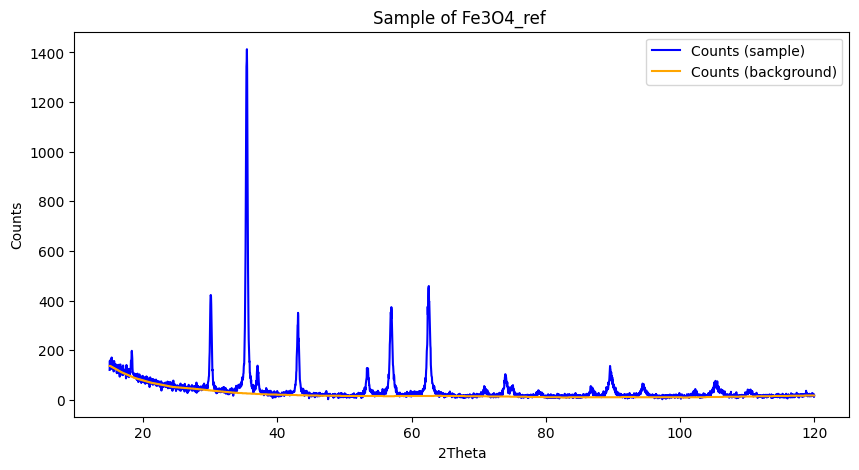

In [138]:
plot_sample__bac(f.counts,f.counts_bac,f.name,f.x,True)

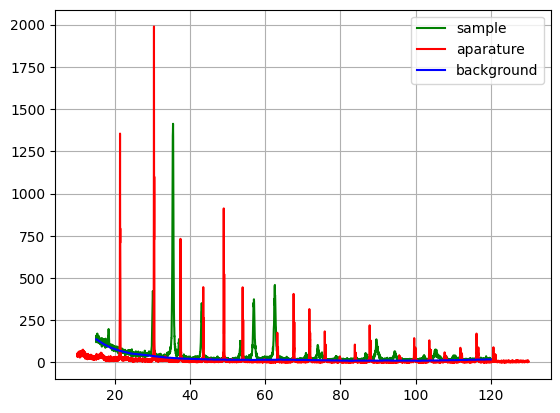

In [139]:
plt.plot(f.x,f.counts,color = "green",label = "sample")
plt.plot(ap.x,ap.counts,color = "red",label = 'aparature')
plt.plot(f.x,f.counts_bac,color = 'blue',label = "background")
plt.legend()
plt.grid(True)
plt.show()

Plot all counts


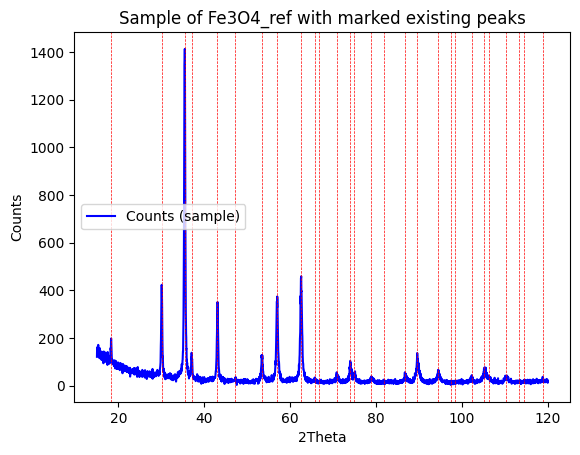

Plot without background counts


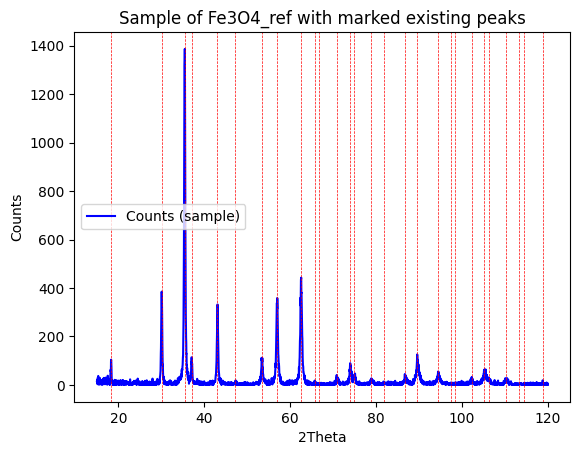

Plot without background and aparature counts


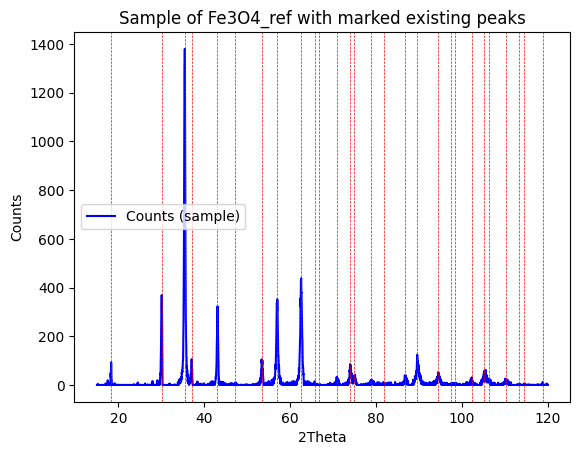

In [140]:
print("Plot all counts")
plot_with_theta_sample(f.counts,f.name,f.two_theta,f.x)
print("Plot without background counts")
plot_with_theta_sample(f.without_bac_counts,f.name,f.two_theta,f.x)
print("Plot without background and aparature counts")
plot_with_theta_sample(f.without_aparature_counts,f.name,f.two_theta,f.x)

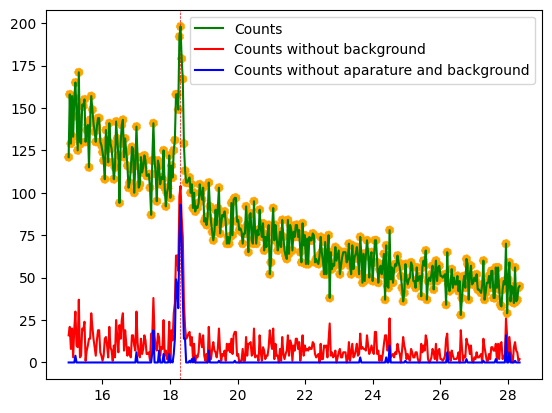

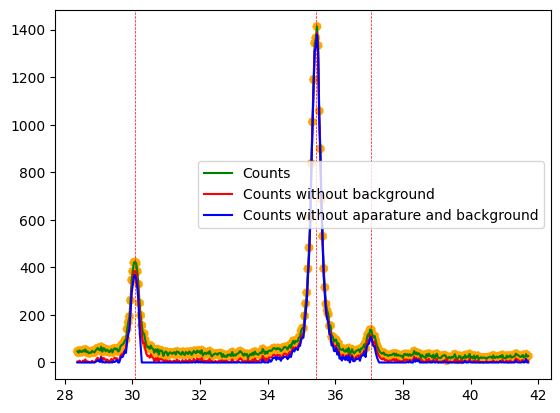

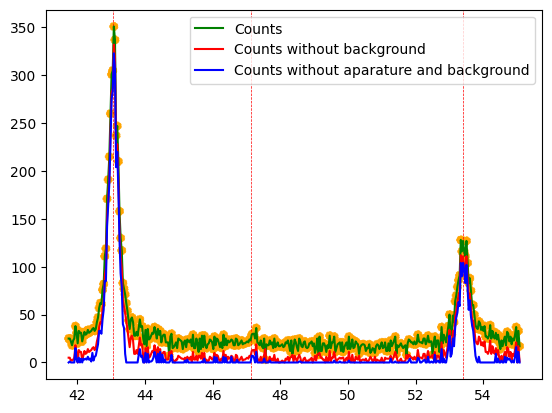

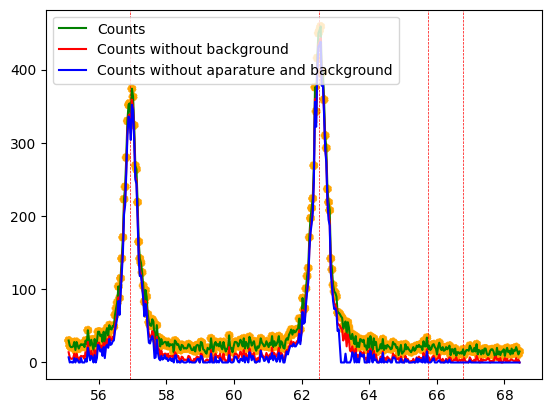

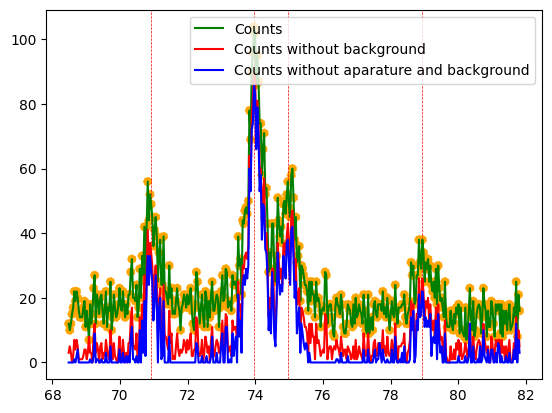

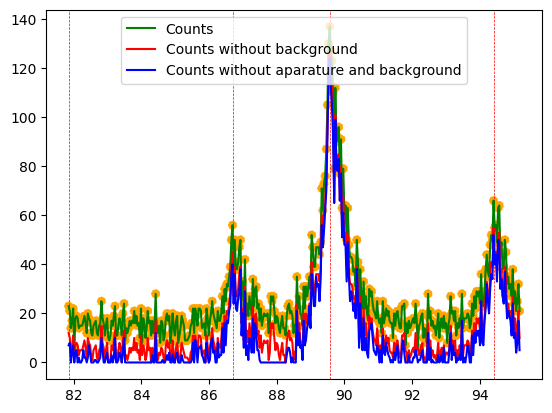

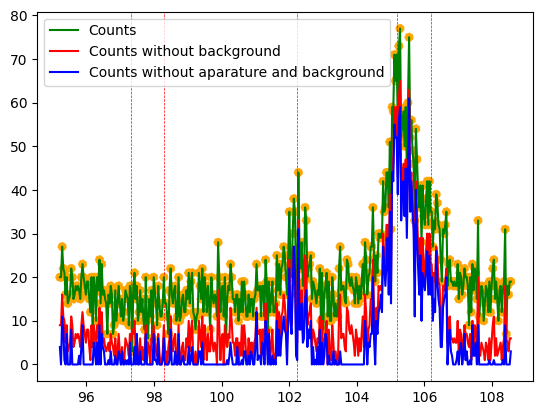

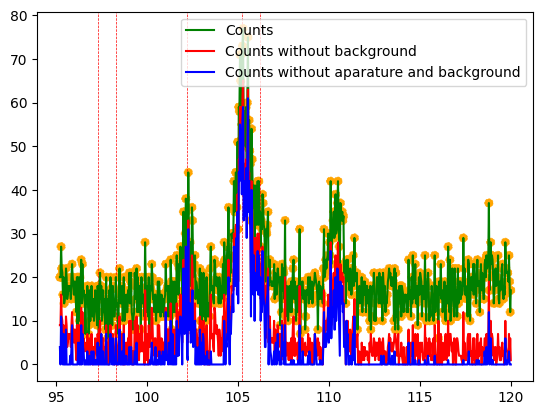

In [141]:
checking_part_of_plot(f.counts,f.without_bac_counts,f.without_aparature_counts,f.two_theta,f.x,400)


In [142]:
counts_in_peak  = counts_of_peak_in_index(f.counts,f.two_theta_in_counts)
print(min(counts_in_peak))
print(max(counts_in_peak ))
print((f.two_theta_in_counts))

16.0
1365.0
[  98  451  611  660  839  961 1149 1254 1422 1518 1549 1673 1764 1794
 1912 2000 2145 2232 2376 2463 2492 2609 2699 2728 2850 2943 2975 3104]


In [143]:
#parameters to calculate stain and size of cristalite
print(f.xy_and_u_fitted)

[0.42234, 0.00771505, 0.08509, 0.00285621]


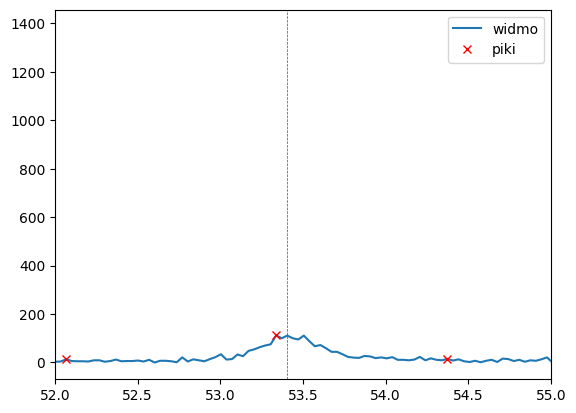

69
[np.float64(15.303914111575931), np.float64(17.008463547172873), np.float64(18.311942527335244), np.float64(19.448308817733206), np.float64(21.052590639471504), np.float64(22.72371753711557), np.float64(24.495112048618275), np.float64(25.564633263110473), np.float64(26.60073193964979), np.float64(27.937633457765045), np.float64(29.073999748163004), np.float64(30.07667588674944), np.float64(32.04860562596944), np.float64(33.184971916367395), np.float64(34.28791566881248), np.float64(35.45770449716333), np.float64(37.028563780948744), np.float64(38.33204276111111), np.float64(39.96974712080229), np.float64(41.941676860022284), np.float64(43.07804315042025), np.float64(44.281254516723976), np.float64(45.417620807121935), np.float64(47.28928293248328), np.float64(49.461747899420565), np.float64(52.0687058597453), np.float64(53.33876230195479), np.float64(54.374860978494105), np.float64(55.67833995865648), np.float64(56.98181893881885), np.float64(58.251875381028334), np.float64(59.85615

In [169]:
# wykrywanie pików

from scipy.signal import find_peaks
peaks, dict = find_peaks(f.without_bac_counts, height=10, distance=30)

for i in range(len(f.two_theta)):
        plt.axvline(f.two_theta[i], color='red', linestyle='--', linewidth=0.5)
plt.plot(f.x, f.without_bac_counts, label='widmo')
plt.plot(f.x[peaks], f.without_bac_counts[peaks], 'rx', label='piki')
plt.xlim(52,55)
plt.legend()
plt.show()

p,c=[],[]
print(len(peaks))
for i in peaks:
    p.append(f.x[i])
print(p)
print(f.two_theta)
print(len(f.two_theta))
print(dict)
# for i in two_theta:
#     c.append(f.without_bac_counts[])
# print(c)

In [145]:
def plot_gauss(correct_peaks,peaks,count,x,two_theta,segment_width = 15):
    x_min = np.min(x)
    x_max = np.max(x)
    # szerokość segmentu (np. 20° 2θ)
    num_segments = int(np.ceil((x_max - x_min) / segment_width))
    print(f"\nTworzę {num_segments} wykresów (co {segment_width}° 2θ)...")
    for seg in range(num_segments):
        seg_start = x_min + seg * segment_width
        seg_end = seg_start + segment_width
        mask = (x >= seg_start) & (x < seg_end)
        if not np.any(mask):
            continue
        x_seg = x[mask]
        y_seg = count[mask]
        plt.figure(figsize=(8, 5))
        plt.plot(x_seg, y_seg, label='Dane (po baseline)', alpha=0.6)
        local_peaks = [pk for pk in peaks if seg_start <= x[pk] < seg_end]
        plt.scatter(x[local_peaks], count[local_peaks], color='k', zorder=10, label='Piki')
        local_corr_peaks = [pk for pk in correct_peaks if seg_start <= x[pk] < seg_end]
        plt.scatter(x[local_corr_peaks], count[local_corr_peaks], color='red', zorder=10, label='Piki poprawne')
        for i in range(len(two_theta)):
            plt.axvline(two_theta[i], color='red', linestyle='--', linewidth=0.5)
        plt.xlim(seg_start, seg_end)
        plt.ylim(y_seg.min() * 0.9, y_seg.max() * 1.1)
        plt.title(f'Dopasowanie Gaussów: {seg_start:.1f}–{seg_end:.1f}° 2θ')
        plt.xlabel('2θ [°]')
        plt.ylabel('Intensywność')
        plt.legend(fontsize=8)
        plt.tight_layout()
        plt.show()


In [146]:
def checking_what_found(peaks,counts,correct_peaks,two_theta,x):
    plt.plot(two_theta,counts[two_theta])


In [147]:
def which_was_found(correct_peaks, x, counts, two_theta, two_theta_in_counts):
    plt.plot(x, counts, color="orange")
    plt.scatter(x[correct_peaks], counts[correct_peaks], color="red",label = "znalezione piki")
    plt.scatter(two_theta, counts[two_theta_in_counts],label = "piki, które powinny zostać znalezione")
    plt.legend()
    plt.show()

    eps = [0, 1, 2, 3, -1, -2, -3]
    find_peaks_theta = []
    not_find_peaks = []
    correct_peaks_set = set(correct_peaks)
    for idx in two_theta_in_counts:
        matched = any((idx + e) in correct_peaks_set for e in eps)
        if matched:
            find_peaks_theta.append(idx)
        else:
            not_find_peaks.append(idx)

    # plt.plot(x, counts, color="orange")
    plt.title("znalezione")
    plt.scatter(
        x[find_peaks_theta],
        counts[find_peaks_theta],
        label=fr"znaleziono: {len(find_peaks_theta)} spośród {len(two_theta)} z dokładnością do 3pkt",
        color = "red"
    )
    plt.legend()
    plt.show()
    # plt.title("nie znalezione")
    # plt.plot(x, counts, color="orange")
    plt.scatter(
        x[not_find_peaks],
        counts[not_find_peaks],
        label=fr"nie znaleziono: {len(not_find_peaks)} spośród {len(two_theta)} z dokładnością do 3pkt"
    )
    plt.legend()
    plt.show()


In [148]:
def peak_detect(counts, x, heigh, dist, prom, two_theta,theta_start, step, eps = 4, plotting=False,fitting = False,fit_range = 10):
    ''' If fitting = False - function return values:
    len(peaks),len(correct_peaks)/len(two_theta),heigh,dist,prom ;
    If fitting = True - function return values:
    peaks,correct_peaks,index_corrected,gauss_fit,_  '''
    peaks, _ = find_peaks(counts, height=heigh, distance=dist, prominence=prom)
    if len(peaks) == 0:
        print(" Nie znaleziono pików - spróbuj obniżyć progu 'height' lub 'prominence'.")
        return False
    fitted_params,r2_list,gauss_fit  = [],[],[]  # (A, x0, sigma) dla każdego dopasowanego piku
    for pk in peaks:
        # ogranicz dane do małego okna wokół piku
        left = max(0, pk - fit_range)
        right = min(len(x), pk + fit_range)
        x_fit = x[left:right]
        y_fit = counts[left:right]
        A_guess = counts[pk]
        x0_guess = x[pk]
        sigma_guess = 1.0
        try:
            popt, _ = curve_fit(
                gaussian, x_fit, y_fit,
                p0=[A_guess, x0_guess, sigma_guess],
                bounds=([0.0, x0_guess - 5.0, 0.01],
                        [np.max(counts) * 5, x0_guess + 5.0, 10.0])
            )
            fitted_params.append(popt)
            A_fit, x0_fit, sigma_fit = popt
            # oblicz R² lokalnie
            gauss_fit.append([A_fit, x0_fit, sigma_fit])
            r2_list.append(rr2(
                np.asarray(x_fit, dtype=np.float64),
                np.asarray(y_fit, dtype=np.float64),
                np.float64(A_fit),
                np.float64(x0_fit),
                np.float64(sigma_fit)
            ))
        except RuntimeError:
            fitted_params.append((np.nan, np.nan, np.nan))
            r2_list.append(np.nan)
    # --- Analiza poprawności względem two_theta ---
    correct_peaks,index_corrected = [],[]
    for i in range(len(two_theta)):
        for j in range(len(peaks)):
            if abs(peaks[j] - ((two_theta[i] - theta_start) / step)) < eps:
                correct_peaks.append(peaks[j])
                index_corrected.append(j)
    if plotting == True:
        plot_gauss(correct_peaks,peaks, counts, x, two_theta,30)
    if fitting == True:
        # which_was_found(peaks,x,counts,two_theta,f.two_theta_in_counts)
        # print("Wydajność wynosi: ",len(correct_peaks)/len(two_theta))
        # if len(correct_peaks)/len(two_theta)>1:
            # print(fr"Wydajność przewyższa 1, gdyż program znalazł więcej pików oddalonych o mniej niż {eps} od wartości oczekiwanych.")
        return peaks,correct_peaks,index_corrected,np.asarray(gauss_fit),_
    return len(peaks),len(correct_peaks)/len(two_theta),heigh,dist,prom



In [149]:
def gauss(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2*sigma**2))

In [150]:

def finding_fwhm(counts,index_corrected,x,gauss_fit,theta_start,step,plotting = False):
    '''in order - A, mu,sigma '''
    N = len(index_corrected)
    fwhm = np.zeros(N)
    t_fwhm = np.zeros(N)
    diff = np.zeros(N)
    for j in range(len(index_corrected)):
        max_index = int((gauss_fit[index_corrected[j]][1]-theta_start)/step )
        if max_index>len(counts):
            max_index = len(counts)
            
        if max_index - 20 <= 0:
            min = abs(counts[0]-(gauss_fit[index_corrected[j]][0]/2))
            l_ind = 0
            left_max_ind = 0
        else:
            min = abs(counts[max_index - 20]-(gauss_fit[index_corrected[j]][0]/2))
            l_ind = max_index - 20
            left_max_ind = max_index - 20
        if max_index == len(counts):
            min2 = abs(counts[-1]-(gauss_fit[index_corrected[j]][0]/2))
            r_ind = max_index
        else:
            min2 = abs(counts[max_index]-(gauss_fit[index_corrected[j]][0]/2))
            r_ind = max_index
    
        for i in range(left_max_ind,max_index):
            if abs(counts[i]-(gauss_fit[index_corrected[j]][0]/2))<min:
                min=abs(counts[i]-(gauss_fit[index_corrected[j]][0]/2))
                l_ind = i
        if max_index+20>=len(counts):
            right_max_ind = len(counts)
        else:
            right_max_ind = max_index+20
        for i in range(max_index,right_max_ind):
            if abs(counts[i]-(gauss_fit[index_corrected[j]][0]/2))<min2:
                min2=abs(counts[i]-(gauss_fit[index_corrected[j]][0]/2))
                r_ind = i
        diff[j] = (r_ind - l_ind) * step
        fwhm[j] = 2 * gauss_fit[index_corrected[j]][2] * math.sqrt(2 * math.log(2))
        t_fwhm[j] = gauss_fit[index_corrected[j]][1]
    return fwhm,t_fwhm,diff

In [151]:
def finding_fwhm_plot(counts,index_corrected,x,gauss_fit,theta_start,step,plotting = True):
    '''in order - A, mu,sigma '''
    N = len(index_corrected)
    fwhm = np.zeros(N)
    t_fwhm = np.zeros(N)
    diff = np.zeros(N)
    for j in range(len(index_corrected)):
        if plotting == True:
            plt.scatter(x, counts, s=10, label="dane")
            plt.plot(x, gauss(x, *gauss_fit[index_corrected[j]]), label="dopasowany Gauss", linewidth=2,color = 'red')
            plt.axvline(gauss_fit[index_corrected[j]][1])
            plt.legend()
            plt.xlim(gauss_fit[index_corrected[j]][1]-gauss_fit[index_corrected[j]][2]-1,gauss_fit[index_corrected[j]][1]+gauss_fit[index_corrected[j]][2]+1)
            plt.ylim(0,gauss_fit[index_corrected[j]][0]+100)
            plt.axhline(gauss_fit[index_corrected[j]][0]/2, color='r', linestyle='--', label='Pozioma linia')
        max_index = int((gauss_fit[index_corrected[j]][1]-theta_start)/step )
        if max_index>len(counts):
            max_index = len(counts)
            
        if max_index - 20 <= 0:
            min = abs(counts[0]-(gauss_fit[index_corrected[j]][0]/2))
            l_ind = 0
            left_max_ind = 0
        else:
            min = abs(counts[max_index - 20]-(gauss_fit[index_corrected[j]][0]/2))
            l_ind = max_index - 20
            left_max_ind = max_index - 20
        if max_index == len(counts):
            min2 = abs(counts[-1]-(gauss_fit[index_corrected[j]][0]/2))
            r_ind = max_index
        else:
            min2 = abs(counts[max_index]-(gauss_fit[index_corrected[j]][0]/2))
            r_ind = max_index
    
        for i in range(left_max_ind,max_index):
            if abs(counts[i]-(gauss_fit[index_corrected[j]][0]/2))<min:
                min=abs(counts[i]-(gauss_fit[index_corrected[j]][0]/2))
                l_ind = i
        if max_index+20>=len(counts):
            right_max_ind = len(counts)
        else:
            right_max_ind = max_index+20
        for i in range(max_index,right_max_ind):
            if abs(counts[i]-(gauss_fit[index_corrected[j]][0]/2))<min2:
                min2=abs(counts[i]-(gauss_fit[index_corrected[j]][0]/2))
                r_ind = i
        if plotting == True:
            dd = [x[l_ind],x[r_ind]]
            kk = [counts[l_ind],counts[r_ind]]
            plt.scatter(dd,kk,color ='green')
            plt.show()
        diff[j] = (r_ind - l_ind) * step
        fwhm[j] = 2 * gauss_fit[index_corrected[j]][2] * math.sqrt(2 * math.log(2))
        t_fwhm[j] = gauss_fit[index_corrected[j]][1]
    return fwhm,t_fwhm,diff

In [152]:
def line_regression(fwhm,t_fwhm,color):
    xx,yy = [],[]
    for i in range(len(fwhm)):
        xx.append(math.sin(t_fwhm[i]))
        yy.append(fwhm[i]*math.cos(t_fwhm[i]))
    a, b = np.polyfit(xx, yy, 1)
    y = []
    for i in range(len(xx)):
        y.append(a*xx[i]+b)
    plt.plot(xx,y,color = color)
    plt.scatter(xx,yy,color = color)

    xx,yy = [],[]
    for i in range(len(f.fwhm)):
        xx.append(math.sin(f.two_theta[i]))
        yy.append(f.fwhm[i]*math.cos(f.two_theta[i]))
    a_ref, b_ref = np.polyfit(xx, yy, 1)
    y = []
    for i in range(len(xx)):
        y.append(a*xx[i]+b)
    plt.plot(xx,y,color = "green")
    plt.scatter(xx,yy,color = "green")
    plt.xlabel("sin(theta)")
    plt.ylabel("fwhm*cos(theta)")
    plt.show()
    return a,b

    # print(color)
    # print("a =", a)
    # print("b =", b)
    
    

spróbować dopasować aparaturę ale tak żeby odejmować od pików wkład piku a nie po prostu 
sprawdzić możliwości find_peaks czy da się wprowadzić inny model do dopasowania i ewentualnie go dodać do naszych danych
sprawdzić jak można wprowadzić wkład lagranżowski do danych 
przygotować przezentacje - pare slajdów o otrzymanych danych, wykresach co moznaby ewentualnie dodać do pracy 


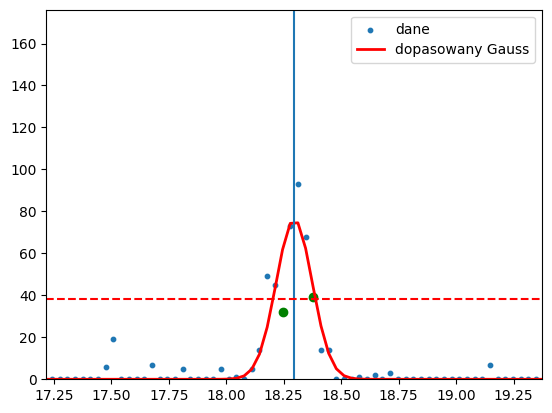

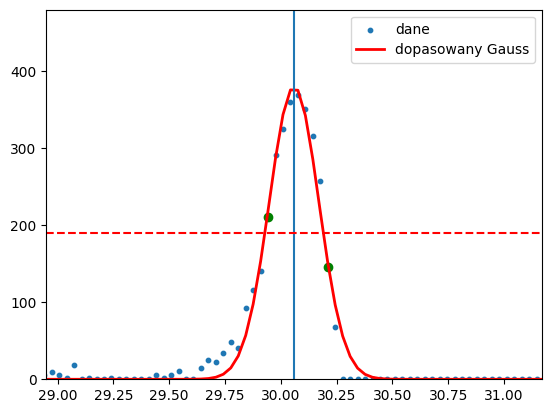

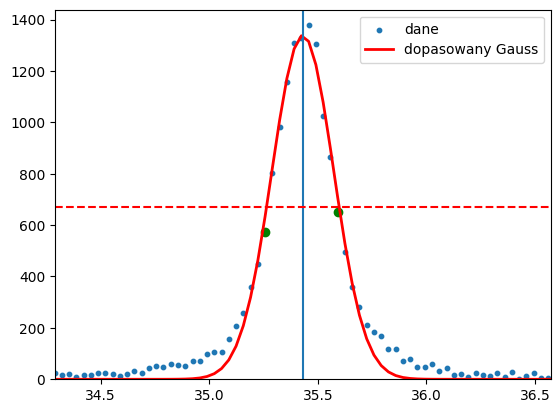

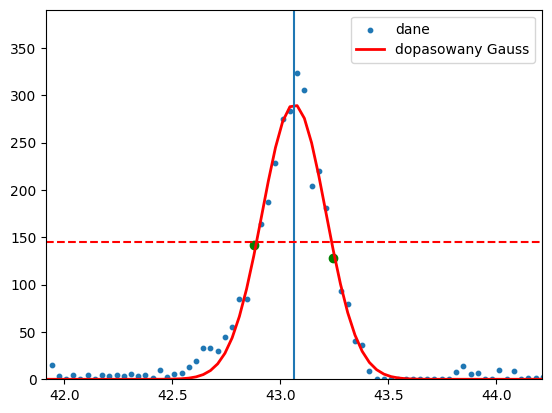

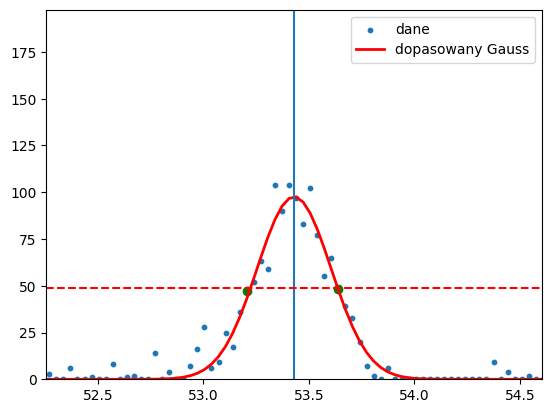

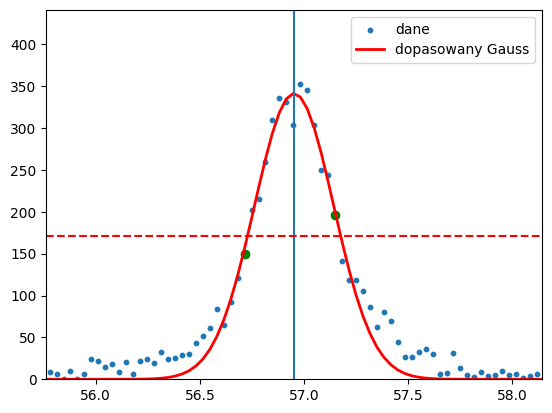

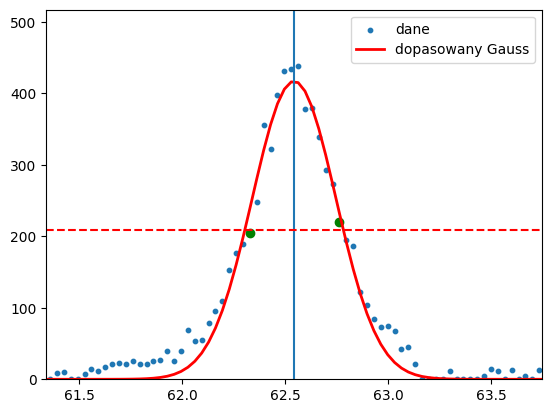

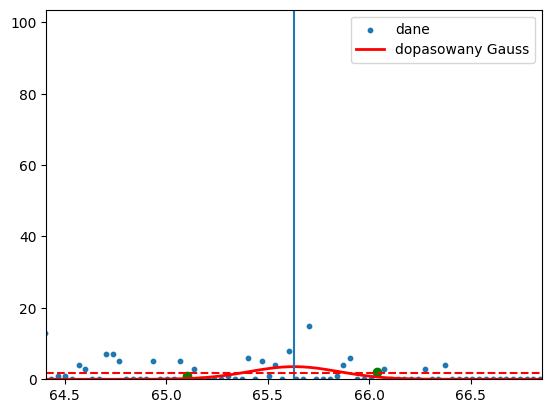

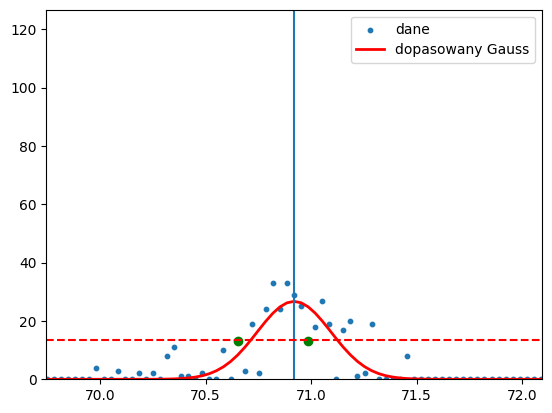

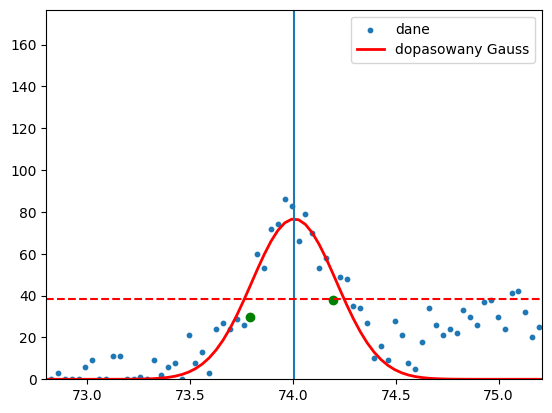

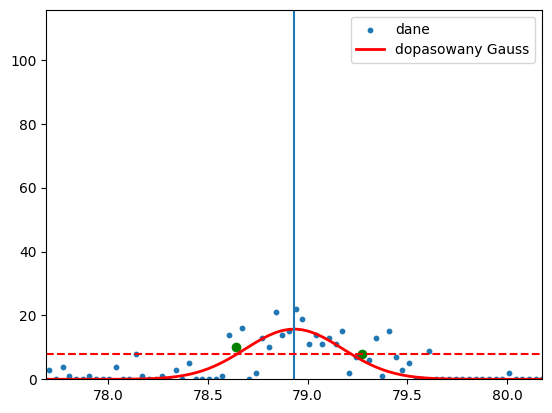

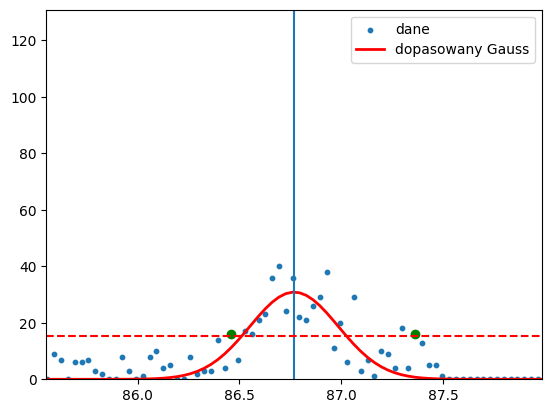

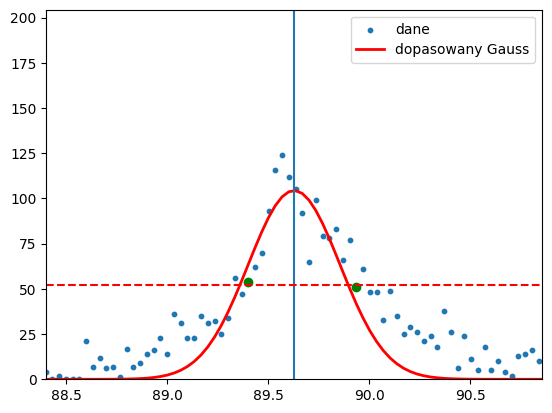

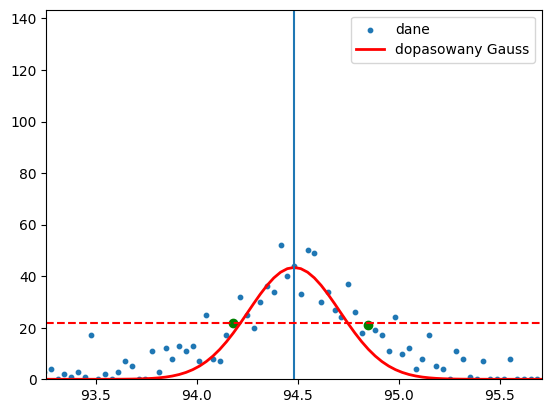

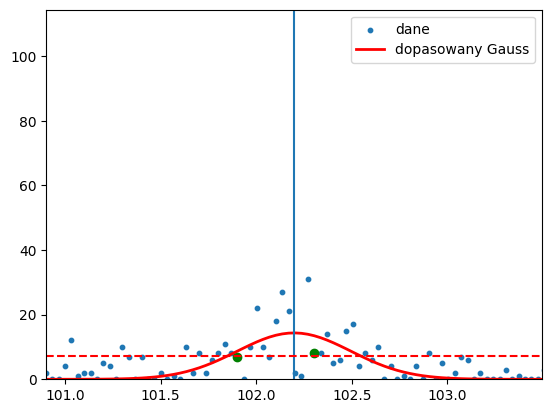

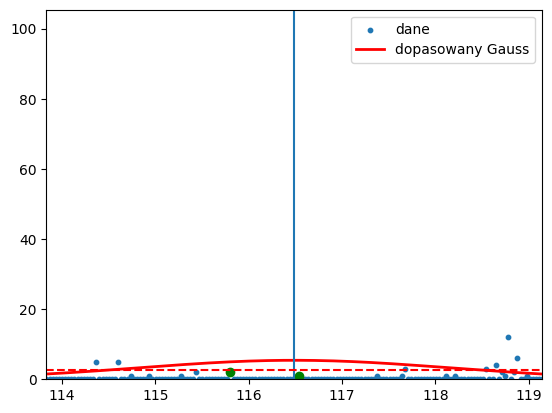

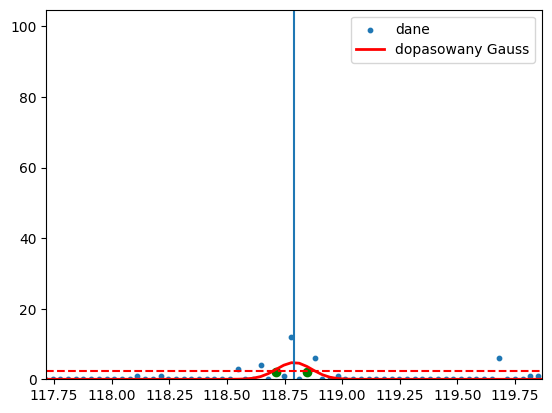

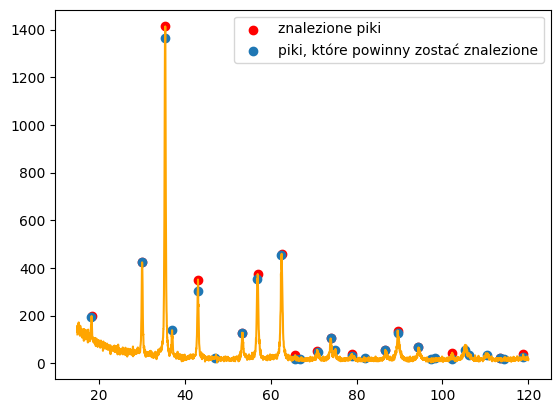

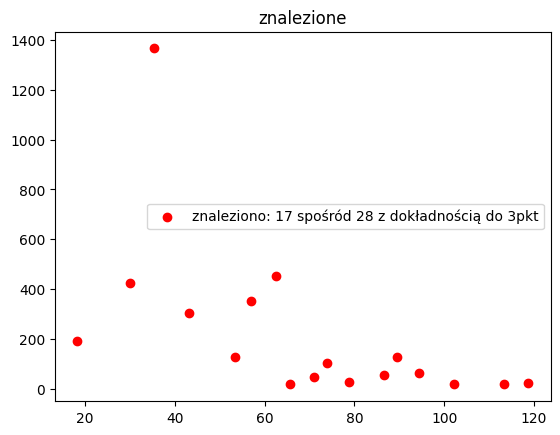

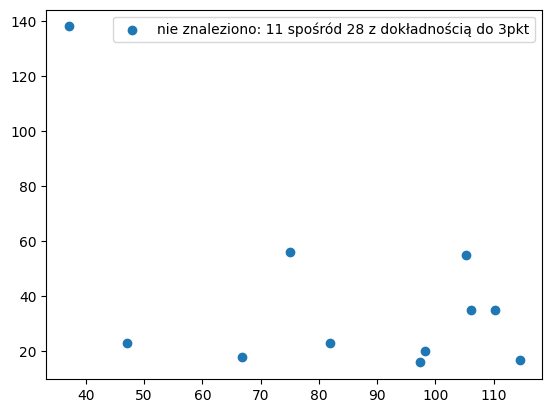

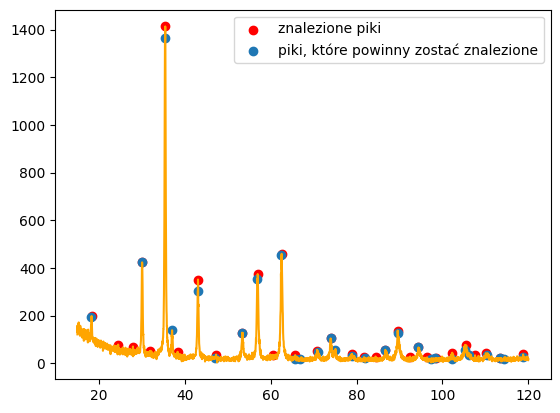

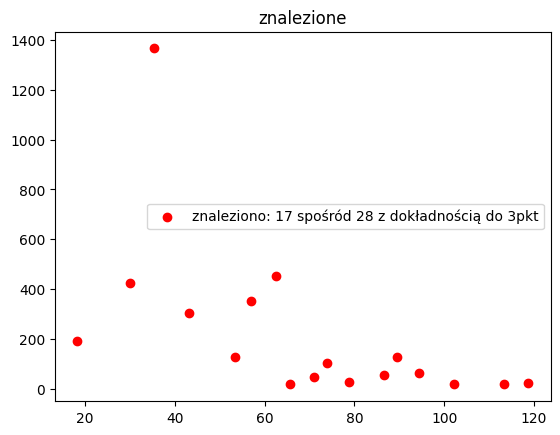

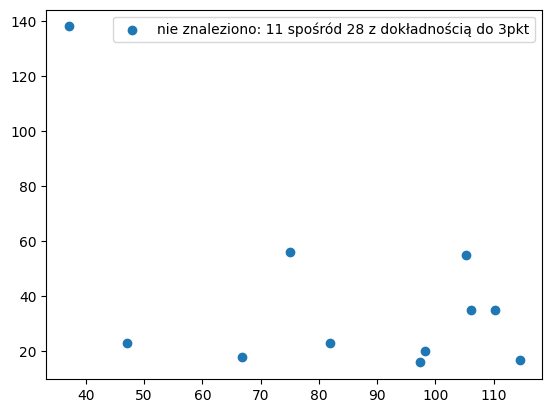

In [168]:
peaks,correct_peaks,index_corrected,gauss_fit,_ = peak_detect(f.without_aparature_counts,f.x,5, 55, 0.001,f.two_theta,f.theta_start,f.step,4,False,True)
fwhm,t_fwhm,diff = finding_fwhm_plot(f.without_aparature_counts,index_corrected,f.x,gauss_fit,f.theta_start,f.step,plotting = True)
# finding_fwhm(f.counts,correct_peaks,index_corrected,f.x,gauss_fit)

which_was_found(correct_peaks,f.x,f.counts,f.two_theta,f.two_theta_in_counts)
which_was_found(peaks,f.x,f.counts,f.two_theta,f.two_theta_in_counts)



In [154]:
print(f.fwhm)
print(f.two_theta)
print(f.two_theta_in_counts)
print(len(f.fwhm))
print(len(f.two_theta))

[0.20478 0.24475 0.2646  0.27089 0.29502 0.31244 0.3409  0.35789 0.38649
 0.40397 0.40987 0.43394 0.45259 0.45894 0.48508 0.50559 0.54188 0.56514
 0.60698 0.63426 0.64378 0.68427 0.71758 0.72933 0.78014 0.82297 0.83832
 0.90623]
[ 18.2835  30.0743  35.4233  37.0544  43.0505  47.1354  53.4069  56.9313
  62.5158  65.7311  66.7844  70.9205  73.9548  74.9556  78.9155  81.8496
  86.6961  89.5905  94.4157  97.3238  98.297  102.2171 105.1947 106.1962
 110.2575 113.3735 114.4282 118.7419]
[  98  451  611  660  839  961 1149 1254 1422 1518 1549 1673 1764 1794
 1912 2000 2145 2232 2376 2463 2492 2609 2699 2728 2850 2943 2975 3104]
28
28


a = 0.3500271997770141
b = 0.27758609178650073
a = 0.0019112784851563007
b = 0.05014201944153241


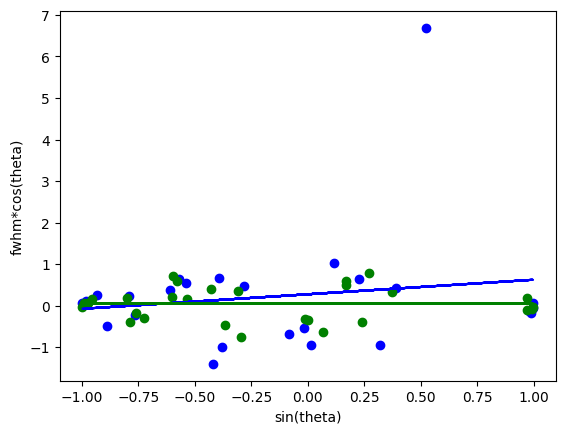

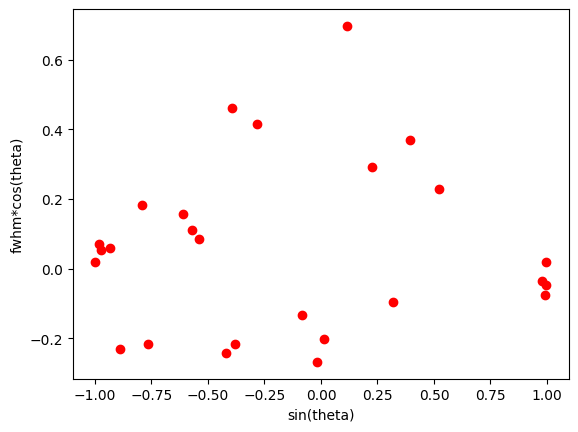

In [155]:
fwhm,t_fwhm,diff = finding_fwhm(f.without_aparature_counts,index_corrected,f.x,gauss_fit,f.theta_start,f.step)
xx,yy = [],[]
for i in range(len(fwhm)):
    xx.append(math.sin(t_fwhm[i]))
    yy.append(fwhm[i]*math.cos(t_fwhm[i]))
a, b = np.polyfit(xx, yy, 1)

print("a =", a)
print("b =", b)
y = []
for i in range(len(xx)):
    y.append(a*xx[i]+b)
plt.plot(xx,y,color = "blue")
plt.scatter(xx,yy,color = "blue")
xx,yy = [],[]
for i in range(len(f.fwhm)):
    xx.append(math.sin(f.two_theta[i]))
    yy.append(f.fwhm[i]*math.cos(f.two_theta[i]))
a, b = np.polyfit(xx, yy, 1)

print("a =", a)
print("b =", b)
y = []
for i in range(len(xx)):
    y.append(a*xx[i]+b)
plt.plot(xx,y,color = "green")
plt.scatter(xx,yy,color = "green")
plt.xlabel("sin(theta)")
plt.ylabel("fwhm*cos(theta)")
plt.show()
xx,yy = [],[]
for i in range(len(diff)):
    xx.append(math.sin(t_fwhm[i]))
    yy.append(diff[i]*math.cos(t_fwhm[i]))
plt.scatter(xx,yy,color = "red")
plt.xlabel("sin(theta)")
plt.ylabel("fwhm*cos(theta)")
plt.show()

a = -0.04062467085079834
b = -0.06412436137672914
a = 0.0019112784851563007
b = 0.05014201944153241


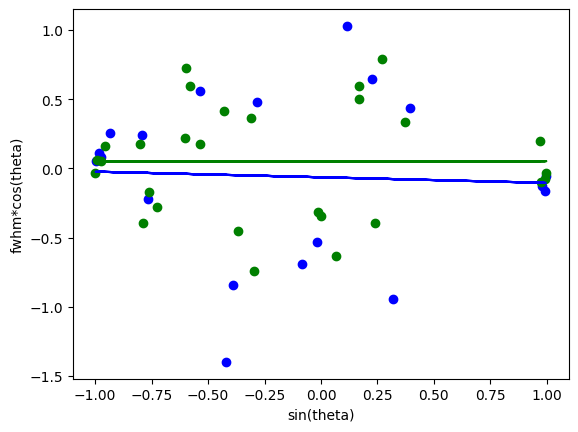

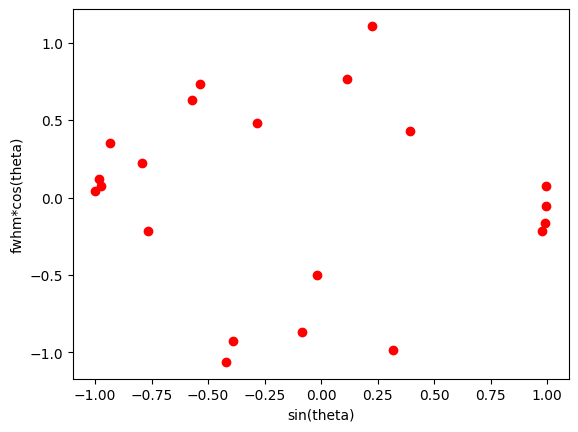

In [156]:
peaks,correct_peaks,index_corrected,gauss_fit,_ = peak_detect(f.counts,f.x,25, 55, 0.3,f.two_theta,f.theta_start,f.step,6,False,True)
fwhm,t_fwhm,diff = finding_fwhm(f.counts,index_corrected,f.x,gauss_fit,f.theta_start,f.step)
xx,yy = [],[]
for i in range(len(fwhm)-2):
    xx.append(math.sin(t_fwhm[i]))
    yy.append(fwhm[i]*math.cos(t_fwhm[i]))
a, b = np.polyfit(xx, yy, 1)

print("a =", a)
print("b =", b)
y = []
for i in range(len(xx)):
    y.append(a*xx[i]+b)
plt.plot(xx,y,color = "blue")
plt.scatter(xx,yy,color = "blue")
xx,yy = [],[]
for i in range(len(f.fwhm)):
    xx.append(math.sin(f.two_theta[i]))
    yy.append(f.fwhm[i]*math.cos(f.two_theta[i]))
a, b = np.polyfit(xx, yy, 1)

print("a =", a)
print("b =", b)
y = []
for i in range(len(xx)):
    y.append(a*xx[i]+b)
plt.plot(xx,y,color = "green")
plt.scatter(xx,yy,color = "green")
plt.xlabel("sin(theta)")
plt.ylabel("fwhm*cos(theta)")
plt.show()
xx,yy = [],[]
for i in range(len(diff)):
    xx.append(math.sin(t_fwhm[i]))
    yy.append(diff[i]*math.cos(t_fwhm[i]))
plt.scatter(xx,yy,color = "red")
plt.xlabel("sin(theta)")
plt.ylabel("fwhm*cos(theta)")
plt.show()

a = -0.04062467085079834
b = -0.06412436137672914
a = 0.0019112784851563007
b = 0.05014201944153241


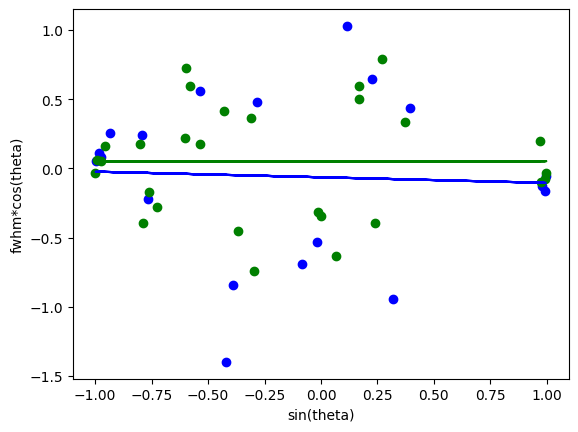

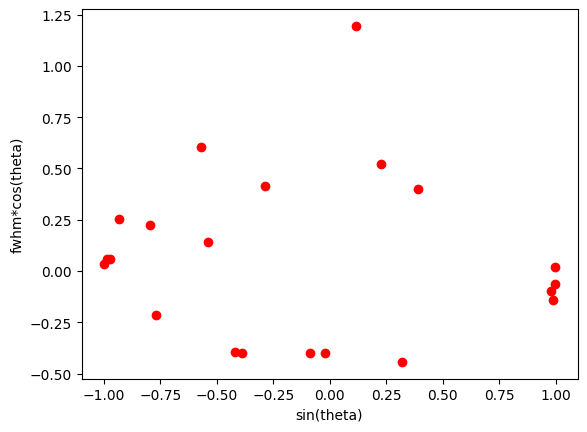

In [157]:
fwhm,t_fwhm,diff = finding_fwhm(f.without_bac_counts,index_corrected,f.x,gauss_fit,f.theta_start,f.step)
xx,yy = [],[]
for i in range(len(fwhm)-2):
    xx.append(math.sin(t_fwhm[i]))
    yy.append(fwhm[i]*math.cos(t_fwhm[i]))
a, b = np.polyfit(xx, yy, 1)

print("a =", a)
print("b =", b)
y = []
for i in range(len(xx)):
    y.append(a*xx[i]+b)
plt.plot(xx,y,color = "blue")
plt.scatter(xx,yy,color = "blue")
xx,yy = [],[]
for i in range(len(f.fwhm)):
    xx.append(math.sin(f.two_theta[i]))
    yy.append(f.fwhm[i]*math.cos(f.two_theta[i]))
a, b = np.polyfit(xx, yy, 1)

print("a =", a)
print("b =", b)
y = []
for i in range(len(xx)):
    y.append(a*xx[i]+b)
plt.plot(xx,y,color = "green")
plt.scatter(xx,yy,color = "green")
plt.xlabel("sin(theta)")
plt.ylabel("fwhm*cos(theta)")
plt.show()
xx,yy = [],[]
for i in range(len(diff)):
    xx.append(math.sin(t_fwhm[i]))
    yy.append(diff[i]*math.cos(t_fwhm[i]))
plt.scatter(xx,yy,color = "red")
plt.xlabel("sin(theta)")
plt.ylabel("fwhm*cos(theta)")
plt.show()

In [158]:
counts_above_40=[]
x_counts_above_40 = []
for i in range(len(f.counts)):
    if f.counts[i]>40:
        counts_above_40.append(f.counts[i])
        x_counts_above_40.append(f.x[i])
        
nr_of_step = len(counts_above_40)
# x_counts_above_40 = np.linspace(f.theta_start, f.theta_stop, nr_of_step)
if nr_of_step > 1:
    step = (f.theta_stop - f.theta_start) / (nr_of_step - 1)
else:
    step = 0.0
print(step)

0.11929567239772727


In [159]:
for i in range(1,7):
    peaks,correct_peaks,index_corrected,gauss_fit,_ = peak_detect(counts_above_40,x_counts_above_40,0, 10, 0.001,f.two_theta,f.theta_start,step,i,False,True)
    fwhm,t_fwhm,diff = finding_fwhm(counts_above_40,index_corrected,x_counts_above_40,gauss_fit,f.theta_start,step)
    print(fwhm)

[23.54819906 21.42869928]
[23.54819906 23.54820045 21.42869928]
[11.638665   23.54819906  1.07714549  6.67007966  8.17988519  0.39769642
  1.87118049 23.54820045 21.42869928]
[11.638665   23.15163261 23.54819906  1.07714549  0.36115001  6.67007966
  8.17988519  0.39769642  0.54067929  1.87118049  0.60605416 23.54820045
  3.42058665 21.42869928]
[11.638665   23.15163261 23.54819906  1.07714549  0.36115001  8.47846546
  6.67007966  8.17988519  0.39769642  0.54067929  0.47319725  1.87118049
  0.60605416  0.60605416 23.54820045  3.42058665  0.94587529 21.42869928]
[11.638665   23.15163261  2.44420335 23.54819906  1.07714549  0.36115001
  0.36115001  8.47846546  6.67007966  0.34615152  8.17988519  0.39769642
  0.54067929  0.47319725  1.87118049  0.60605416  0.60605416 23.54820045
  3.42058665  0.94587529 21.42869928]


a = -16.333746916828723
b = 14.837054034750118
a = -0.5379211174038361
b = 0.4858916826257263


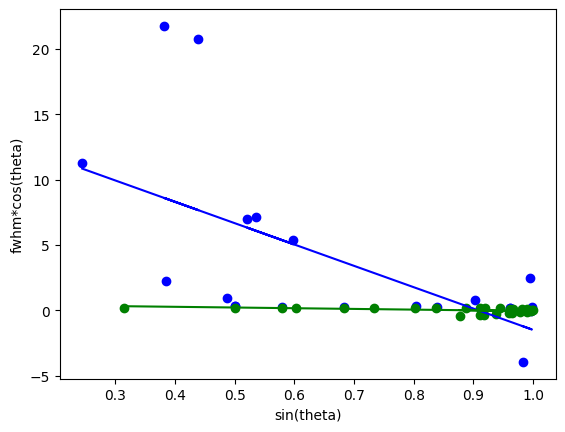

a = 1.386456282837247
b = 0.859379163976007
a = 0.0019112784851563007
b = 0.05014201944153241


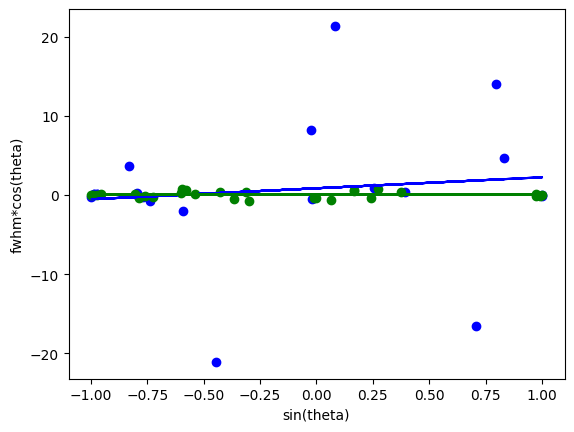

a = 0.5354607601690351
b = 0.5811063467027678
a = 0.0019112784851563007
b = 0.05014201944153241


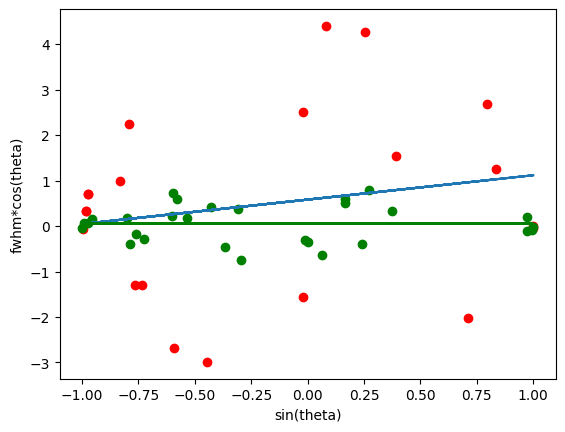

In [160]:
fwhm,t_fwhm,diff = finding_fwhm(counts_above_40,index_corrected,x_counts_above_40,gauss_fit,f.theta_start,step)
xx,yy = [],[]
for i in range(len(fwhm)):
    xx.append(math.sin(math.radians(t_fwhm[i])))
    yy.append(fwhm[i]*math.cos(math.radians(t_fwhm[i])))

a, b = np.polyfit(xx, yy, 1)

print("a =", a)
print("b =", b)
y = []
for i in range(len(xx)):
    y.append(a*xx[i]+b)
plt.plot(xx,y,color = "blue")
plt.scatter(xx,yy,color = "blue")
# plt.show() 
xx,yy = [],[]
for i in range(len(f.fwhm)):
    xx.append(math.sin(math.radians(f.two_theta[i])))
    yy.append(f.fwhm[i]*math.cos(math.radians(f.two_theta[i])))
a, b = np.polyfit(xx, yy, 1)

print("a =", a)
print("b =", b)
y = []
for i in range(len(xx)):
    y.append(a*xx[i]+b)
plt.plot(xx,y,color = "green")
plt.scatter(xx,yy,color = "green")
plt.xlabel("sin(theta)")
plt.ylabel("fwhm*cos(theta)")
plt.show()
# obliczenie współczynników
xx,yy = [],[]
for i in range(len(fwhm)):
    xx.append(math.sin(t_fwhm[i]))
    yy.append(fwhm[i]*math.cos(t_fwhm[i]))

a, b = np.polyfit(xx, yy, 1)

print("a =", a)
print("b =", b)
y = []
for i in range(len(xx)):
    y.append(a*xx[i]+b)
plt.plot(xx,y,color = "blue")
plt.scatter(xx,yy,color = "blue")
# plt.show() 
xx,yy = [],[]
for i in range(len(f.fwhm)):
    xx.append(math.sin(f.two_theta[i]))
    yy.append(f.fwhm[i]*math.cos(f.two_theta[i]))
a, b = np.polyfit(xx, yy, 1)

print("a =", a)
print("b =", b)
y = []
for i in range(len(xx)):
    y.append(a*xx[i]+b)
plt.plot(xx,y,color = "green")
plt.scatter(xx,yy,color = "green")
plt.xlabel("sin(theta)")
plt.ylabel("fwhm*cos(theta)")
plt.show()
# obliczenie współczynników



xx,yy = [],[]
for i in range(len(diff)):
    xx.append(math.sin(t_fwhm[i]))
    yy.append(diff[i]*math.cos(t_fwhm[i]))
a, b = np.polyfit(xx, yy, 1)

print("a =", a)
print("b =", b)
y = []
for i in range(len(xx)):
    y.append(a*xx[i]+b)
plt.plot(xx,y)
plt.scatter(xx,yy,color = "red")
xx,yy = [],[]
for i in range(len(f.fwhm)):
    xx.append(math.sin(f.two_theta[i]))
    yy.append(f.fwhm[i]*math.cos(f.two_theta[i]))
a, b = np.polyfit(xx, yy, 1)

print("a =", a)
print("b =", b)
y = []
for i in range(len(xx)):
    y.append(a*xx[i]+b)
plt.plot(xx,y,color = "green")
plt.scatter(xx,yy,color = "green")
plt.xlabel("sin(theta)")
plt.ylabel("fwhm*cos(theta)")
plt.show()



# # obliczenie współczynników
# a, b = np.polyfit(xx, yy, 1)

# print("a =", a)
# print("b =", b)
# print("Predykcja dla x=6:", a*6 + b)




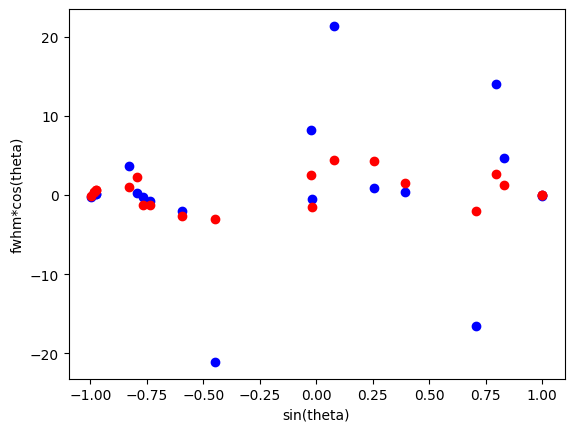

In [161]:
fwhm,t_fwhm,diff = finding_fwhm(counts_above_40,index_corrected,x_counts_above_40,gauss_fit,f.theta_start,step)
xx,yy = [],[]
for i in range(len(fwhm)):
    xx.append(math.sin(t_fwhm[i]))
    yy.append(fwhm[i]*math.cos(t_fwhm[i]))
plt.scatter(xx,yy,color = "blue")
xx,yy = [],[]
for i in range(len(diff)):
    xx.append(math.sin(t_fwhm[i]))
    yy.append(diff[i]*math.cos(t_fwhm[i]))
plt.scatter(xx,yy,color = "red")
plt.xlabel("sin(theta)")
plt.ylabel("fwhm*cos(theta)")
plt.show()

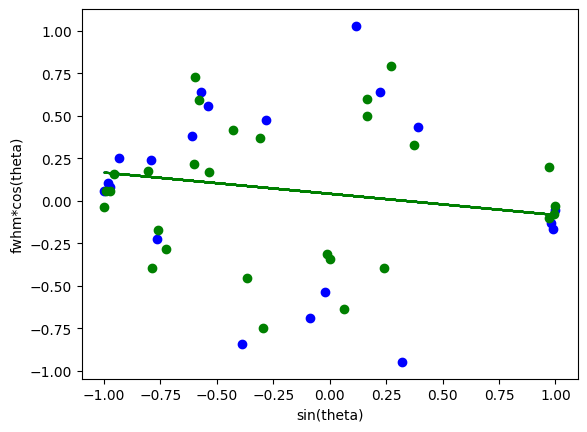

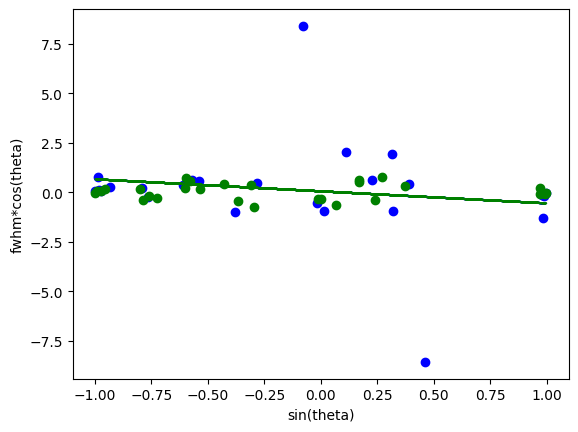

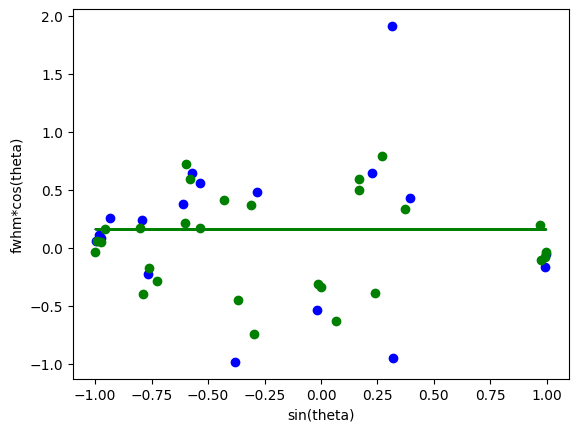

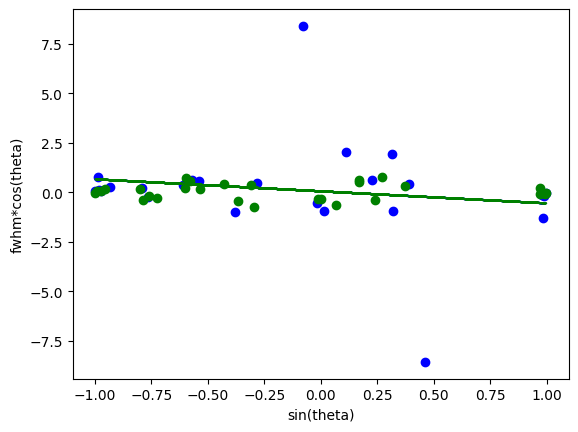

In [162]:
peaks,correct_peaks,index_corrected,gauss_fit,_ = peak_detect(f.counts,f.x,20, 40, 0.001,f.two_theta,f.theta_start,f.step,5,False,True)
fwhm,t_fwhm,_ = finding_fwhm(f.counts,index_corrected,f.x,gauss_fit,f.theta_start,f.step,plotting=False)
a_,b_ = line_regression(fwhm,t_fwhm,"blue")
peaks,correct_peaks,index_corrected,gauss_fit,_ = peak_detect(f.counts,f.x,15, 8, 0.001,f.two_theta,f.theta_start,f.step,4,False,True)
fwhm,t_fwhm,_ = finding_fwhm(f.counts,index_corrected,f.x,gauss_fit,f.theta_start,f.step,plotting=False)
a_,b_ = line_regression(fwhm,t_fwhm,"blue")
peaks,correct_peaks,index_corrected,gauss_fit,_ = peak_detect(f.counts,f.x,15, 35, 0.001,f.two_theta,f.theta_start,f.step,3,False,True)
fwhm,t_fwhm,_ = finding_fwhm(f.counts,index_corrected,f.x,gauss_fit,f.theta_start,f.step,plotting=False)
a_,b_ = line_regression(fwhm,t_fwhm,"blue")
peaks,correct_peaks,index_corrected,gauss_fit,_ = peak_detect(f.counts,f.x,15, 8, 0.001,f.two_theta,f.theta_start,f.step,4,False,True)
fwhm,t_fwhm,_ = finding_fwhm(f.counts,index_corrected,f.x,gauss_fit,f.theta_start,f.step,plotting=False)
a_,b_ = line_regression(fwhm,t_fwhm,"blue")

In [163]:
3100
[20, 40, 0.001, 5]
0.028965806860256488
0.4449219412051415
573
[15, 8, 0.001, 4]
-0.6090718829320593
0.05053676197246563
0.001911278485156279
0.05014201944153237
2588
[15, 35, 0.001, 3]
-0.0011797456898744456
0.16034710004072647
573
[15, 8, 0.001, 4]
-0.6090718829320593
0.05053676197246563
0.001911278485156279
0.05014201944153237


0.05014201944153237

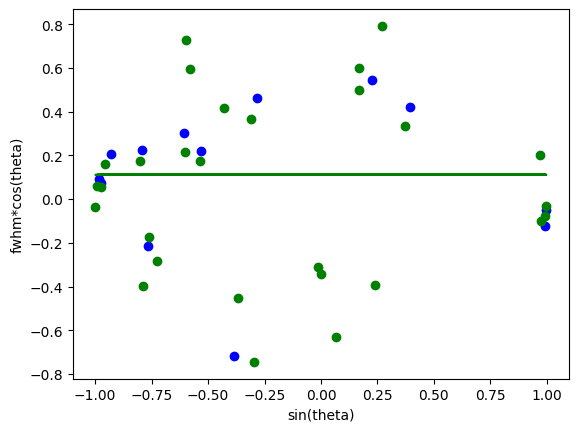

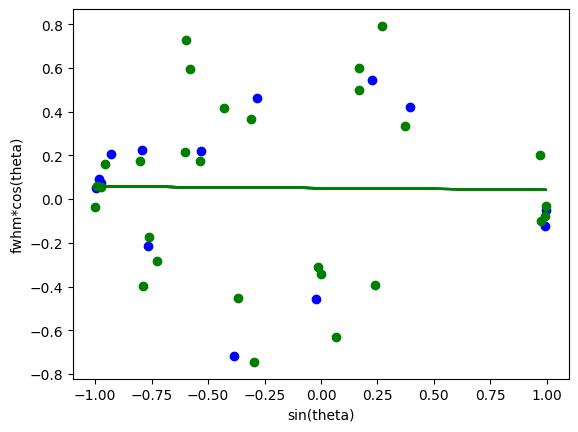

In [164]:
peaks,correct_peaks,index_corrected,gauss_fit,_ = peak_detect(f.without_bac_counts,f.x,25, 6, 0.001,f.two_theta,f.theta_start,f.step,2,False,True)
fwhm,t_fwhm,_ = finding_fwhm(f.without_bac_counts,index_corrected,f.x,gauss_fit,f.theta_start,f.step,plotting=False)
a_,b_ = line_regression(fwhm,t_fwhm,"blue")

peaks,correct_peaks,index_corrected,gauss_fit,_ = peak_detect(f.without_bac_counts,f.x,25, 50, 0.001,f.two_theta,f.theta_start,f.step,3,False,True)
fwhm,t_fwhm,_ = finding_fwhm(f.without_bac_counts,index_corrected,f.x,gauss_fit,f.theta_start,f.step,plotting=False)
a_,b_ = line_regression(fwhm,t_fwhm,"blue")


In [165]:
79
[25, 6, 0.001, 2]
0.000116257961624473
0.11087063284182784
4112
[25, 50, 0.001, 3]
-0.007517045252900849
0.05013503691245658
0.001911278485156279
0.05014201944153237
79
[25, 6, 0.001, 2]
0.000116257961624473
0.11087063284182784
4112
[25, 50, 0.001, 3]
-0.007517045252900849
0.05013503691245658
0.001911278485156279
0.05014201944153237

0.05014201944153237

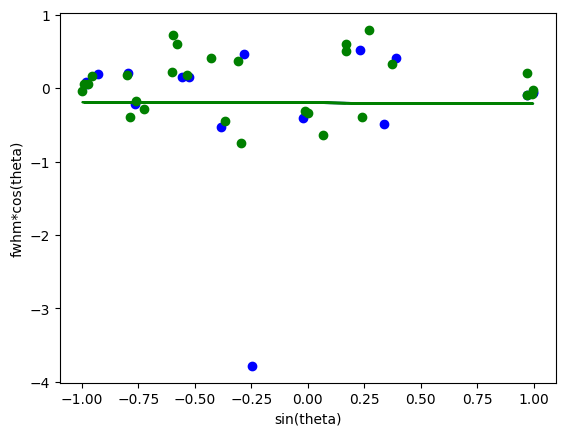

AttributeError: 'Data_file' object has no attribute 'without_aparature_without_aparature_counts'

In [166]:
peaks,correct_peaks,index_corrected,gauss_fit,_ = peak_detect(f.without_aparature_counts,f.x,5, 55, 0.001,f.two_theta,f.theta_start,f.step,4,False,True)
fwhm,t_fwhm,_ = finding_fwhm(f.without_aparature_counts,index_corrected,f.x,gauss_fit,f.theta_start,f.step,plotting=False)
a_,b_ = line_regression(fwhm,t_fwhm,"blue")
peaks,correct_peaks,index_corrected,gauss_fit,_ = peak_detect(f.without_aparature_without_aparature_counts,f.x,20, 50, 0.001,f.two_theta,f.theta_start,f.step,4,False,True)
fwhm,t_fwhm,_ = finding_fwhm(f.without_aparature_counts,index_corrected,f.x,gauss_fit,f.theta_start,f.step,plotting=False)
a_,b_ = line_regression(fwhm,t_fwhm,"blue")

In [ ]:
4569
[5, 55, 0.001, 4]
0.001886710525950163
-0.19840475526033174
4107
[20, 50, 0.001, 4]
-0.015290621808372847
0.05047158081871916
0.001911278485156279
0.05014201944153237
4569
[5, 55, 0.001, 4]
0.001886710525950163
-0.19840475526033174
4107
[20, 50, 0.001, 4]
-0.015290621808372847
0.05047158081871916
0.001911278485156279

In [ ]:
# min_ = None
# best_i = None
# min_ = abs(a2[0] - a_ref)
# for i in range(len(a2)):
#     diff = abs(a2[i] - a_ref)
#     if diff < min_:
#         min_ = diff
#         best_i = i
# print(best_i)
# print(parameters[best_i])
# print(a2[best_i])
# print(b2[best_i])
# min_ = abs(b2[0] - b_ref)
# best_i = 0
# for i in range(len(b2)):
#     diff = abs(b2[i] - b_ref)
#     if diff < min_:
#         min_ = diff
#         best_i = i
# print(best_i)
# print(parameters[best_i])
# print(a2[best_i])
# print(b2[best_i])

# print(a_ref)
# print(b_ref)


In [ ]:
# min_ = None
# best_i = None
# for i in range(len(a3)):
#     if a3[i] > 0:
#         min_ = abs(a3[i] - a_ref)
#         best_i = i
#         break
# for i in range(len(a3)):
#     if a3[i] > 0:
#         diff = abs(a3[i] - a_ref)
#         if diff < min_:
#             min_ = diff
#             best_i = i
# print(best_i)
# print(parameters[best_i])
# print(a3[best_i])
# print(b3[best_i])
# min_ = abs(b3[0] - b_ref)
# best_i = 0
# for i in range(len(b3)):
#     diff = abs(b3[i] - b_ref)
#     if diff < min_:
#         min_ = diff
#         best_i = i
# print(best_i)
# print(parameters[best_i])
# print(a3[best_i])
# print(b3[best_i])

# print(a_ref)
# print(b_ref)


In [ ]:
# nan = None
# a1 = [np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4267919619605114), np.float64(-1.3678290272500355), np.float64(-1.1617987868126258), np.float64(-0.8375744142764353), np.float64(-0.18832275660912537), np.float64(-0.11213503599933658), np.float64(-1.5055737976445758), np.float64(-0.6838898244420244), np.float64(-0.5420092396361946), np.float64(-0.41867170369786877), np.float64(0.19920292380152013), np.float64(0.24107755091326602), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.1618938859541467), np.float64(0.24559112185950238), np.float64(0.6221543867723964), np.float64(0.5581643900181269), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4267919619605114), np.float64(-1.3678290272500355), np.float64(-1.1617987868126258), np.float64(-0.8375744142764353), np.float64(-0.18832275660912537), np.float64(-0.11213503599933658), np.float64(-1.5055737976445758), np.float64(-0.6838898244420244), np.float64(-0.5420092396361946), np.float64(-0.41867170369786877), np.float64(0.19920292380152013), np.float64(0.24107755091326602), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.1618938859541467), np.float64(0.24559112185950238), np.float64(0.6221543867723964), np.float64(0.5581643900181269), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4267919619605114), np.float64(-1.3678290272500355), np.float64(-1.1617987868126258), np.float64(-0.8375744142764353), np.float64(-0.18832275660912537), np.float64(-0.11213503599933658), np.float64(-1.5055737976445758), np.float64(-0.6838898244420244), np.float64(-0.5420092396361946), np.float64(-0.41867170369786877), np.float64(0.19920292380152013), np.float64(0.24107755091326602), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.1618938859541467), np.float64(0.24559112185950238), np.float64(0.6221543867723964), np.float64(0.5581643900181269), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4267919619605114), np.float64(-1.3678290272500355), np.float64(-1.1617987868126258), np.float64(-0.8375744142764353), np.float64(-0.18832275660912537), np.float64(-0.11213503599933658), np.float64(-1.5055737976445758), np.float64(-0.6838898244420244), np.float64(-0.5420092396361946), np.float64(-0.41867170369786877), np.float64(0.19920292380152013), np.float64(0.24107755091326602), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.1618938859541467), np.float64(0.24559112185950238), np.float64(0.6221543867723964), np.float64(0.5581643900181269), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4267919619605114), np.float64(-1.3678290272500355), np.float64(-1.1617987868126258), np.float64(-0.8375744142764353), np.float64(-0.18832275660912537), np.float64(-0.11213503599933658), np.float64(-1.5055737976445758), np.float64(-0.6838898244420244), np.float64(-0.5420092396361946), np.float64(-0.41867170369786877), np.float64(0.19920292380152013), np.float64(0.24107755091326602), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.1618938859541467), np.float64(0.24559112185950238), np.float64(0.6221543867723964), np.float64(0.5581643900181269), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4240002776725826), np.float64(-1.3861506150258602), np.float64(-1.1551843783207565), np.float64(-0.4447682662590996), np.float64(0.16111028514883638), np.float64(0.18553008761454354), np.float64(-2.4267919619605114), np.float64(-1.3678290272500355), np.float64(-1.1617987868126258), np.float64(-0.8375744142764353), np.float64(-0.18832275660912537), np.float64(-0.11213503599933658), np.float64(-1.5055737976445758), np.float64(-0.6838898244420244), np.float64(-0.5420092396361946), np.float64(-0.41867170369786877), np.float64(0.19920292380152013), np.float64(0.24107755091326602), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.1618938859541467), np.float64(0.24559112185950238), np.float64(0.6221543867723964), np.float64(0.5581643900181269), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.5863003784708165), np.float64(-1.0210428296514986), np.float64(-0.8100420169269683), np.float64(-0.6090718829320593), np.float64(-0.5985371635955993), np.float64(-0.4574166555877494), np.float64(-0.21860267756851864), np.float64(-0.19776325105517673), np.float64(-0.09398926646976984), np.float64(-0.19628768989644335), np.float64(-0.18902575389165913), np.float64(-0.10464686383546624), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.15172016199000946), np.float64(0.3698346231469622), np.float64(0.7963283347867156), np.float64(0.6988851584267983), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.5863003784708165), np.float64(-1.0210428296514986), np.float64(-0.8100420169269683), np.float64(-0.6090718829320593), np.float64(-0.5985371635955993), np.float64(-0.4574166555877494), np.float64(-0.21860267756851864), np.float64(-0.19776325105517673), np.float64(-0.09398926646976984), np.float64(-0.19628768989644335), np.float64(-0.18902575389165913), np.float64(-0.10464686383546624), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.15172016199000946), np.float64(0.3698346231469622), np.float64(0.7963283347867156), np.float64(0.6988851584267983), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.5863003784708165), np.float64(-1.0210428296514986), np.float64(-0.8100420169269683), np.float64(-0.6090718829320593), np.float64(-0.5985371635955993), np.float64(-0.4574166555877494), np.float64(-0.21860267756851864), np.float64(-0.19776325105517673), np.float64(-0.09398926646976984), np.float64(-0.19628768989644335), np.float64(-0.18902575389165913), np.float64(-0.10464686383546624), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.15172016199000946), np.float64(0.3698346231469622), np.float64(0.7963283347867156), np.float64(0.6988851584267983), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.5863003784708165), np.float64(-1.0210428296514986), np.float64(-0.8100420169269683), np.float64(-0.6090718829320593), np.float64(-0.5985371635955993), np.float64(-0.4574166555877494), np.float64(-0.21860267756851864), np.float64(-0.19776325105517673), np.float64(-0.09398926646976984), np.float64(-0.19628768989644335), np.float64(-0.18902575389165913), np.float64(-0.10464686383546624), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.15172016199000946), np.float64(0.3698346231469622), np.float64(0.7963283347867156), np.float64(0.6988851584267983), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.5863003784708165), np.float64(-1.0210428296514986), np.float64(-0.8100420169269683), np.float64(-0.6090718829320593), np.float64(-0.5985371635955993), np.float64(-0.4574166555877494), np.float64(-0.21860267756851864), np.float64(-0.19776325105517673), np.float64(-0.09398926646976984), np.float64(-0.19628768989644335), np.float64(-0.18902575389165913), np.float64(-0.10464686383546624), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.15172016199000946), np.float64(0.3698346231469622), np.float64(0.7963283347867156), np.float64(0.6988851584267983), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.594180649738167), np.float64(-0.9956315171989377), np.float64(-0.7695993529618999), np.float64(-0.22967990645487849), np.float64(0.142042588285939), np.float64(0.26935265785067963), np.float64(-1.5863003784708165), np.float64(-1.0210428296514986), np.float64(-0.8100420169269683), np.float64(-0.6090718829320593), np.float64(-0.5985371635955993), np.float64(-0.4574166555877494), np.float64(-0.21860267756851864), np.float64(-0.19776325105517673), np.float64(-0.09398926646976984), np.float64(-0.19628768989644335), np.float64(-0.18902575389165913), np.float64(-0.10464686383546624), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.15172016199000946), np.float64(0.3698346231469622), np.float64(0.7963283347867156), np.float64(0.6988851584267983), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.21860267756851864), np.float64(-0.19776325105517673), np.float64(-0.09398926646976984), np.float64(-0.11219332201208854), np.float64(-0.10074367130287136), np.float64(-0.022857490807224462), np.float64(-0.21860267756851864), np.float64(-0.19776325105517673), np.float64(-0.24472583492473413), np.float64(-0.22528089345362098), np.float64(-0.20655313298841163), np.float64(-0.10998597050493598), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.15172016199000946), np.float64(0.3698346231469622), np.float64(0.3673033147286424), np.float64(0.33440279478049284), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.21860267756851864), np.float64(-0.19776325105517673), np.float64(-0.09398926646976984), np.float64(-0.11219332201208854), np.float64(-0.10074367130287136), np.float64(-0.022857490807224462), np.float64(-0.21860267756851864), np.float64(-0.19776325105517673), np.float64(-0.24472583492473413), np.float64(-0.22528089345362098), np.float64(-0.20655313298841163), np.float64(-0.10998597050493598), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.15172016199000946), np.float64(0.3698346231469622), np.float64(0.3673033147286424), np.float64(0.33440279478049284), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.21860267756851864), np.float64(-0.19776325105517673), np.float64(-0.09398926646976984), np.float64(-0.11219332201208854), np.float64(-0.10074367130287136), np.float64(-0.022857490807224462), np.float64(-0.21860267756851864), np.float64(-0.19776325105517673), np.float64(-0.24472583492473413), np.float64(-0.22528089345362098), np.float64(-0.20655313298841163), np.float64(-0.10998597050493598), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.15172016199000946), np.float64(0.3698346231469622), np.float64(0.3673033147286424), np.float64(0.33440279478049284), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.21860267756851864), np.float64(-0.19776325105517673), np.float64(-0.09398926646976984), np.float64(-0.11219332201208854), np.float64(-0.10074367130287136), np.float64(-0.022857490807224462), np.float64(-0.21860267756851864), np.float64(-0.19776325105517673), np.float64(-0.24472583492473413), np.float64(-0.22528089345362098), np.float64(-0.20655313298841163), np.float64(-0.10998597050493598), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.15172016199000946), np.float64(0.3698346231469622), np.float64(0.3673033147286424), np.float64(0.33440279478049284), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.21860267756851864), np.float64(-0.19776325105517673), np.float64(-0.09398926646976984), np.float64(-0.11219332201208854), np.float64(-0.10074367130287136), np.float64(-0.022857490807224462), np.float64(-0.21860267756851864), np.float64(-0.19776325105517673), np.float64(-0.24472583492473413), np.float64(-0.22528089345362098), np.float64(-0.20655313298841163), np.float64(-0.10998597050493598), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.15172016199000946), np.float64(0.3698346231469622), np.float64(0.3673033147286424), np.float64(0.33440279478049284), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.43935125661781277), np.float64(-0.21860267756851864), np.float64(-0.19776325105517673), np.float64(-0.09398926646976984), np.float64(-0.11219332201208854), np.float64(-0.10074367130287136), np.float64(-0.022857490807224462), np.float64(-0.21860267756851864), np.float64(-0.19776325105517673), np.float64(-0.24472583492473413), np.float64(-0.22528089345362098), np.float64(-0.20655313298841163), np.float64(-0.10998597050493598), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.15172016199000946), np.float64(0.3698346231469622), np.float64(0.3673033147286424), np.float64(0.33440279478049284), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.21860267756851864), np.float64(-0.19776325105517673), np.float64(-0.09398926646976984), np.float64(-0.11219332201208854), np.float64(-0.10074367130287136), np.float64(-0.022857490807224462), np.float64(-0.21860267756851864), np.float64(-0.19776325105517673), np.float64(-0.24472583492473413), np.float64(-0.22528089345362098), np.float64(-0.20655313298841163), np.float64(-0.13678581106295015), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.15172016199000946), np.float64(0.3698346231469622), np.float64(0.3673033147286424), np.float64(0.33440279478049284), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.21860267756851864), np.float64(-0.19776325105517673), np.float64(-0.09398926646976984), np.float64(-0.11219332201208854), np.float64(-0.10074367130287136), np.float64(-0.022857490807224462), np.float64(-0.21860267756851864), np.float64(-0.19776325105517673), np.float64(-0.24472583492473413), np.float64(-0.22528089345362098), np.float64(-0.20655313298841163), np.float64(-0.13678581106295015), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.15172016199000946), np.float64(0.3698346231469622), np.float64(0.3673033147286424), np.float64(0.33440279478049284), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.21860267756851864), np.float64(-0.19776325105517673), np.float64(-0.09398926646976984), np.float64(-0.11219332201208854), np.float64(-0.10074367130287136), np.float64(-0.022857490807224462), np.float64(-0.21860267756851864), np.float64(-0.19776325105517673), np.float64(-0.24472583492473413), np.float64(-0.22528089345362098), np.float64(-0.20655313298841163), np.float64(-0.13678581106295015), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.15172016199000946), np.float64(0.3698346231469622), np.float64(0.3673033147286424), np.float64(0.33440279478049284), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.21860267756851864), np.float64(-0.19776325105517673), np.float64(-0.09398926646976984), np.float64(-0.11219332201208854), np.float64(-0.10074367130287136), np.float64(-0.022857490807224462), np.float64(-0.21860267756851864), np.float64(-0.19776325105517673), np.float64(-0.24472583492473413), np.float64(-0.22528089345362098), np.float64(-0.20655313298841163), np.float64(-0.13678581106295015), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.15172016199000946), np.float64(0.3698346231469622), np.float64(0.3673033147286424), np.float64(0.33440279478049284), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.21860267756851864), np.float64(-0.19776325105517673), np.float64(-0.09398926646976984), np.float64(-0.11219332201208854), np.float64(-0.10074367130287136), np.float64(-0.022857490807224462), np.float64(-0.21860267756851864), np.float64(-0.19776325105517673), np.float64(-0.24472583492473413), np.float64(-0.22528089345362098), np.float64(-0.20655313298841163), np.float64(-0.13678581106295015), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.15172016199000946), np.float64(0.3698346231469622), np.float64(0.3673033147286424), np.float64(0.33440279478049284), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(0.40921684361431604), np.float64(0.4069057337119597), np.float64(0.4086510946422192), np.float64(-0.21860267756851864), np.float64(-0.19776325105517673), np.float64(-0.09398926646976984), np.float64(-0.11219332201208854), np.float64(-0.10074367130287136), np.float64(-0.022857490807224462), np.float64(-0.21860267756851864), np.float64(-0.19776325105517673), np.float64(-0.24472583492473413), np.float64(-0.22528089345362098), np.float64(-0.20655313298841163), np.float64(-0.13678581106295015), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.15172016199000946), np.float64(0.3698346231469622), np.float64(0.3673033147286424), np.float64(0.33440279478049284), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.038787018249085446), np.float64(-0.06259546676730005), np.float64(0.4428076993003069), np.float64(0.4410452449440978), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.18989984391146078), np.float64(-0.17503665630388615), np.float64(0.3760675470498873), np.float64(0.3453050170180573), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.15172016199000946), np.float64(-0.15068488660602045), np.float64(0.399825975954661), np.float64(0.441848162846787), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.038787018249085446), np.float64(-0.06259546676730005), np.float64(0.4428076993003069), np.float64(0.4410452449440978), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.18989984391146078), np.float64(-0.17503665630388615), np.float64(0.3760675470498873), np.float64(0.3453050170180573), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.15172016199000946), np.float64(-0.15068488660602045), np.float64(0.399825975954661), np.float64(0.441848162846787), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.038787018249085446), np.float64(-0.06259546676730005), np.float64(0.4428076993003069), np.float64(0.4410452449440978), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.18989984391146078), np.float64(-0.17503665630388615), np.float64(0.3760675470498873), np.float64(0.3453050170180573), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.15172016199000946), np.float64(-0.15068488660602045), np.float64(0.399825975954661), np.float64(0.441848162846787), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.038787018249085446), np.float64(-0.06259546676730005), np.float64(0.4428076993003069), np.float64(0.4410452449440978), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.18989984391146078), np.float64(-0.17503665630388615), np.float64(0.3760675470498873), np.float64(0.3453050170180573), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.15172016199000946), np.float64(-0.15068488660602045), np.float64(0.399825975954661), np.float64(0.441848162846787), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.038787018249085446), np.float64(-0.06259546676730005), np.float64(0.4428076993003069), np.float64(0.4410452449440978), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.18989984391146078), np.float64(-0.17503665630388615), np.float64(0.3760675470498873), np.float64(0.3453050170180573), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.15172016199000946), np.float64(-0.15068488660602045), np.float64(0.399825975954661), np.float64(0.441848162846787), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.04029297514604752), np.float64(-0.06483112069714746), np.float64(0.4401411906796247), np.float64(0.4386934503051979), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.038787018249085446), np.float64(-0.06259546676730005), np.float64(0.4428076993003069), np.float64(0.4410452449440978), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.18989984391146078), np.float64(-0.17503665630388615), np.float64(0.3760675470498873), np.float64(0.3453050170180573), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.15172016199000946), np.float64(-0.15068488660602045), np.float64(0.399825975954661), np.float64(0.441848162846787), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.0011797456898744456), np.float64(-0.03903903475302852), np.float64(-0.0484643965933013), np.float64(0.030908178826290163), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.0011797456898744456), np.float64(-0.03903903475302852), np.float64(-0.0484643965933013), np.float64(-0.0026274800851706754), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.15172016199000946), np.float64(-0.15068488660602045), np.float64(-0.1227649116111074), np.float64(-0.08634601451284163), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.0011797456898744456), np.float64(-0.03903903475302852), np.float64(-0.0484643965933013), np.float64(0.030908178826290163), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.0011797456898744456), np.float64(-0.03903903475302852), np.float64(-0.0484643965933013), np.float64(-0.0026274800851706754), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.15172016199000946), np.float64(-0.15068488660602045), np.float64(-0.1227649116111074), np.float64(-0.08634601451284163), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.0011797456898744456), np.float64(-0.03903903475302852), np.float64(-0.0484643965933013), np.float64(0.030908178826290163), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.0011797456898744456), np.float64(-0.03903903475302852), np.float64(-0.0484643965933013), np.float64(-0.0026274800851706754), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.15172016199000946), np.float64(-0.15068488660602045), np.float64(-0.1227649116111074), np.float64(-0.08634601451284163), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.0011797456898744456), np.float64(-0.03903903475302852), np.float64(-0.0484643965933013), np.float64(0.030908178826290163), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.0011797456898744456), np.float64(-0.03903903475302852), np.float64(-0.0484643965933013), np.float64(-0.0026274800851706754), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.15172016199000946), np.float64(-0.15068488660602045), np.float64(-0.1227649116111074), np.float64(-0.08634601451284163), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.0011797456898744456), np.float64(-0.03903903475302852), np.float64(-0.0484643965933013), np.float64(0.030908178826290163), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.0011797456898744456), np.float64(-0.03903903475302852), np.float64(-0.0484643965933013), np.float64(-0.0026274800851706754), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.15172016199000946), np.float64(-0.15068488660602045), np.float64(-0.1227649116111074), np.float64(-0.08634601451284163), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.002372474087683269), np.float64(-0.041077451673915986), np.float64(-0.02059495563859975), np.float64(0.054638091202569954), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.0011797456898744456), np.float64(-0.03903903475302852), np.float64(-0.0484643965933013), np.float64(0.030908178826290163), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.0011797456898744456), np.float64(-0.03903903475302852), np.float64(-0.0484643965933013), np.float64(-0.0026274800851706754), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.15172016199000946), np.float64(-0.15068488660602045), np.float64(-0.1227649116111074), np.float64(-0.08634601451284163), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.15172016199000946), np.float64(-0.15068488660602045), np.float64(-0.16125888164140917), np.float64(-0.06097495615845522), np.float64(-0.21860267756851864), np.float64(0.16150514092642843), np.float64(0.16436311017946573), np.float64(0.04513312038958775), np.float64(0.028965806860256488), np.float64(0.09454287544661912), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.15172016199000946), np.float64(-0.15068488660602045), np.float64(-0.1227649116111074), np.float64(-0.08634601451284163), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.15172016199000946), np.float64(-0.15068488660602045), np.float64(-0.16125888164140917), np.float64(-0.06097495615845522), np.float64(-0.21860267756851864), np.float64(0.16150514092642843), np.float64(0.16436311017946573), np.float64(0.04513312038958775), np.float64(0.028965806860256488), np.float64(0.09454287544661912), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.15172016199000946), np.float64(-0.15068488660602045), np.float64(-0.1227649116111074), np.float64(-0.08634601451284163), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.15172016199000946), np.float64(-0.15068488660602045), np.float64(-0.16125888164140917), np.float64(-0.06097495615845522), np.float64(-0.21860267756851864), np.float64(0.16150514092642843), np.float64(0.16436311017946573), np.float64(0.04513312038958775), np.float64(0.028965806860256488), np.float64(0.09454287544661912), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.15172016199000946), np.float64(-0.15068488660602045), np.float64(-0.1227649116111074), np.float64(-0.08634601451284163), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.15172016199000946), np.float64(-0.15068488660602045), np.float64(-0.16125888164140917), np.float64(-0.06097495615845522), np.float64(-0.21860267756851864), np.float64(0.16150514092642843), np.float64(0.16436311017946573), np.float64(0.04513312038958775), np.float64(0.028965806860256488), np.float64(0.09454287544661912), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.15172016199000946), np.float64(-0.15068488660602045), np.float64(-0.1227649116111074), np.float64(-0.08634601451284163), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.15172016199000946), np.float64(-0.15068488660602045), np.float64(-0.16125888164140917), np.float64(-0.06097495615845522), np.float64(-0.21860267756851864), np.float64(0.16150514092642843), np.float64(0.16436311017946573), np.float64(0.04513312038958775), np.float64(0.028965806860256488), np.float64(0.09454287544661912), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.15172016199000946), np.float64(-0.15068488660602045), np.float64(-0.1227649116111074), np.float64(-0.08634601451284163), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.031267468716929266), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.15172016199000946), np.float64(-0.15068488660602045), np.float64(-0.16125888164140917), np.float64(-0.06097495615845522), np.float64(-0.21860267756851864), np.float64(0.16150514092642843), np.float64(0.16436311017946573), np.float64(0.04513312038958775), np.float64(0.028965806860256488), np.float64(0.09454287544661912), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.15172016199000946), np.float64(-0.15068488660602045), np.float64(-0.1227649116111074), np.float64(-0.08634601451284163), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-1.5055737976445758), np.float64(-0.9041668386474463), np.float64(-0.8821129163649278), np.float64(-0.6998805910148653), np.float64(-0.7020563575164496), np.float64(-0.5240452329758549), np.float64(-1.5055737976445758), np.float64(-0.9041668386474463), np.float64(-0.8821129163649278), np.float64(-0.6998805910148653), np.float64(-0.7020563575164496), np.float64(-0.5554297196796328), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.15172016199000946), np.float64(-0.15068488660602045), np.float64(-0.1227649116111074), np.float64(-0.06465046188960764), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-1.5055737976445758), np.float64(-0.9041668386474463), np.float64(-0.8821129163649278), np.float64(-0.6998805910148653), np.float64(-0.7020563575164496), np.float64(-0.5240452329758549), np.float64(-1.5055737976445758), np.float64(-0.9041668386474463), np.float64(-0.8821129163649278), np.float64(-0.6998805910148653), np.float64(-0.7020563575164496), np.float64(-0.5554297196796328), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.15172016199000946), np.float64(-0.15068488660602045), np.float64(-0.1227649116111074), np.float64(-0.06465046188960764), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-1.5055737976445758), np.float64(-0.9041668386474463), np.float64(-0.8821129163649278), np.float64(-0.6998805910148653), np.float64(-0.7020563575164496), np.float64(-0.5240452329758549), np.float64(-1.5055737976445758), np.float64(-0.9041668386474463), np.float64(-0.8821129163649278), np.float64(-0.6998805910148653), np.float64(-0.7020563575164496), np.float64(-0.5554297196796328), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.15172016199000946), np.float64(-0.15068488660602045), np.float64(-0.1227649116111074), np.float64(-0.06465046188960764), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-1.5055737976445758), np.float64(-0.9041668386474463), np.float64(-0.8821129163649278), np.float64(-0.6998805910148653), np.float64(-0.7020563575164496), np.float64(-0.5240452329758549), np.float64(-1.5055737976445758), np.float64(-0.9041668386474463), np.float64(-0.8821129163649278), np.float64(-0.6998805910148653), np.float64(-0.7020563575164496), np.float64(-0.5554297196796328), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.15172016199000946), np.float64(-0.15068488660602045), np.float64(-0.1227649116111074), np.float64(-0.06465046188960764), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-1.5055737976445758), np.float64(-0.9041668386474463), np.float64(-0.8821129163649278), np.float64(-0.6998805910148653), np.float64(-0.7020563575164496), np.float64(-0.5240452329758549), np.float64(-1.5055737976445758), np.float64(-0.9041668386474463), np.float64(-0.8821129163649278), np.float64(-0.6998805910148653), np.float64(-0.7020563575164496), np.float64(-0.5554297196796328), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.15172016199000946), np.float64(-0.15068488660602045), np.float64(-0.1227649116111074), np.float64(-0.06465046188960764), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-0.2225092095941776), np.float64(-0.1654699605135702), np.float64(-0.15238840939514717), np.float64(-0.15238717922111045), np.float64(-0.12481789364048582), np.float64(-0.06709992109689228), np.float64(-1.5055737976445758), np.float64(-0.9041668386474463), np.float64(-0.8821129163649278), np.float64(-0.6998805910148653), np.float64(-0.7020563575164496), np.float64(-0.5240452329758549), np.float64(-1.5055737976445758), np.float64(-0.9041668386474463), np.float64(-0.8821129163649278), np.float64(-0.6998805910148653), np.float64(-0.7020563575164496), np.float64(-0.5554297196796328), np.float64(-0.21860267756851864), np.float64(-0.143540774614459), np.float64(-0.15172016199000946), np.float64(-0.15068488660602045), np.float64(-0.1227649116111074), np.float64(-0.06465046188960764), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.19808954283092933), np.float64(-0.12971936571252196), np.float64(-0.13823553430817798), np.float64(-0.14996448292218068), np.float64(-0.12202578581525972), np.float64(-0.032413290432804116), np.float64(-0.19808954283092933), np.float64(-0.12971936571252196), np.float64(-0.13823553430817798), np.float64(-0.14996448292218068), np.float64(-0.12202578581525972), np.float64(-0.1034984451637951), np.float64(-0.19808954283092933), np.float64(-0.12971936571252196), np.float64(-0.13823553430817798), np.float64(-0.14996448292218068), np.float64(-0.12202578581525972), np.float64(-0.06383646233767971), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.19808954283092933), np.float64(-0.12971936571252196), np.float64(-0.13823553430817798), np.float64(-0.14996448292218068), np.float64(-0.12202578581525972), np.float64(-0.032413290432804116), np.float64(-0.19808954283092933), np.float64(-0.12971936571252196), np.float64(-0.13823553430817798), np.float64(-0.14996448292218068), np.float64(-0.12202578581525972), np.float64(-0.1034984451637951), np.float64(-0.19808954283092933), np.float64(-0.12971936571252196), np.float64(-0.13823553430817798), np.float64(-0.14996448292218068), np.float64(-0.12202578581525972), np.float64(-0.06383646233767971), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.19808954283092933), np.float64(-0.12971936571252196), np.float64(-0.13823553430817798), np.float64(-0.14996448292218068), np.float64(-0.12202578581525972), np.float64(-0.032413290432804116), np.float64(-0.19808954283092933), np.float64(-0.12971936571252196), np.float64(-0.13823553430817798), np.float64(-0.14996448292218068), np.float64(-0.12202578581525972), np.float64(-0.1034984451637951), np.float64(-0.19808954283092933), np.float64(-0.12971936571252196), np.float64(-0.13823553430817798), np.float64(-0.14996448292218068), np.float64(-0.12202578581525972), np.float64(-0.06383646233767971), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.19808954283092933), np.float64(-0.12971936571252196), np.float64(-0.13823553430817798), np.float64(-0.14996448292218068), np.float64(-0.12202578581525972), np.float64(-0.032413290432804116), np.float64(-0.19808954283092933), np.float64(-0.12971936571252196), np.float64(-0.13823553430817798), np.float64(-0.14996448292218068), np.float64(-0.12202578581525972), np.float64(-0.1034984451637951), np.float64(-0.19808954283092933), np.float64(-0.12971936571252196), np.float64(-0.13823553430817798), np.float64(-0.14996448292218068), np.float64(-0.12202578581525972), np.float64(-0.06383646233767971), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.19808954283092933), np.float64(-0.12971936571252196), np.float64(-0.13823553430817798), np.float64(-0.14996448292218068), np.float64(-0.12202578581525972), np.float64(-0.032413290432804116), np.float64(-0.19808954283092933), np.float64(-0.12971936571252196), np.float64(-0.13823553430817798), np.float64(-0.14996448292218068), np.float64(-0.12202578581525972), np.float64(-0.1034984451637951), np.float64(-0.19808954283092933), np.float64(-0.12971936571252196), np.float64(-0.13823553430817798), np.float64(-0.14996448292218068), np.float64(-0.12202578581525972), np.float64(-0.06383646233767971), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.15168160420173343), np.float64(-0.12409280009256303), np.float64(-0.034540655443136885), np.float64(-0.19808954283092933), np.float64(-0.12971936571252196), np.float64(-0.13823553430817798), np.float64(-0.14996448292218068), np.float64(-0.12202578581525972), np.float64(-0.032413290432804116), np.float64(-0.19808954283092933), np.float64(-0.12971936571252196), np.float64(-0.13823553430817798), np.float64(-0.14996448292218068), np.float64(-0.12202578581525972), np.float64(-0.1034984451637951), np.float64(-0.19808954283092933), np.float64(-0.12971936571252196), np.float64(-0.13823553430817798), np.float64(-0.14996448292218068), np.float64(-0.12202578581525972), np.float64(-0.06383646233767971), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.19808954283092933), np.float64(-0.12971936571252196), np.float64(-0.13823553430817798), np.float64(-0.13715900872333936), np.float64(-0.10890123891621697), np.float64(-0.04731561719173442), np.float64(-0.19808954283092933), np.float64(-0.12971936571252196), np.float64(-0.13823553430817798), np.float64(-0.13715900872333936), np.float64(-0.10890123891621697), np.float64(-0.09050894439456006), np.float64(-0.19808954283092933), np.float64(-0.12971936571252196), np.float64(-0.13823553430817798), np.float64(-0.13715900872333936), np.float64(-0.10890123891621697), np.float64(-0.04731561719173442), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.19808954283092933), np.float64(-0.12971936571252196), np.float64(-0.13823553430817798), np.float64(-0.13715900872333936), np.float64(-0.10890123891621697), np.float64(-0.04731561719173442), np.float64(-0.19808954283092933), np.float64(-0.12971936571252196), np.float64(-0.13823553430817798), np.float64(-0.13715900872333936), np.float64(-0.10890123891621697), np.float64(-0.09050894439456006), np.float64(-0.19808954283092933), np.float64(-0.12971936571252196), np.float64(-0.13823553430817798), np.float64(-0.13715900872333936), np.float64(-0.10890123891621697), np.float64(-0.04731561719173442), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.19808954283092933), np.float64(-0.12971936571252196), np.float64(-0.13823553430817798), np.float64(-0.13715900872333936), np.float64(-0.10890123891621697), np.float64(-0.04731561719173442), np.float64(-0.19808954283092933), np.float64(-0.12971936571252196), np.float64(-0.13823553430817798), np.float64(-0.13715900872333936), np.float64(-0.10890123891621697), np.float64(-0.09050894439456006), np.float64(-0.19808954283092933), np.float64(-0.12971936571252196), np.float64(-0.13823553430817798), np.float64(-0.13715900872333936), np.float64(-0.10890123891621697), np.float64(-0.04731561719173442), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.19808954283092933), np.float64(-0.12971936571252196), np.float64(-0.13823553430817798), np.float64(-0.13715900872333936), np.float64(-0.10890123891621697), np.float64(-0.04731561719173442), np.float64(-0.19808954283092933), np.float64(-0.12971936571252196), np.float64(-0.13823553430817798), np.float64(-0.13715900872333936), np.float64(-0.10890123891621697), np.float64(-0.09050894439456006), np.float64(-0.19808954283092933), np.float64(-0.12971936571252196), np.float64(-0.13823553430817798), np.float64(-0.13715900872333936), np.float64(-0.10890123891621697), np.float64(-0.04731561719173442), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.19808954283092933), np.float64(-0.12971936571252196), np.float64(-0.13823553430817798), np.float64(-0.13715900872333936), np.float64(-0.10890123891621697), np.float64(-0.04731561719173442), np.float64(-0.19808954283092933), np.float64(-0.12971936571252196), np.float64(-0.13823553430817798), np.float64(-0.13715900872333936), np.float64(-0.10890123891621697), np.float64(-0.09050894439456006), np.float64(-0.19808954283092933), np.float64(-0.12971936571252196), np.float64(-0.13823553430817798), np.float64(-0.13715900872333936), np.float64(-0.10890123891621697), np.float64(-0.04731561719173442), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.20956586989904846), np.float64(-0.1564740695406104), np.float64(-0.13934564352545714), np.float64(-0.13930084337579504), np.float64(-0.11137967383464148), np.float64(-0.05015425896074222), np.float64(-0.19808954283092933), np.float64(-0.12971936571252196), np.float64(-0.13823553430817798), np.float64(-0.13715900872333936), np.float64(-0.10890123891621697), np.float64(-0.04731561719173442), np.float64(-0.19808954283092933), np.float64(-0.12971936571252196), np.float64(-0.13823553430817798), np.float64(-0.13715900872333936), np.float64(-0.10890123891621697), np.float64(-0.09050894439456006), np.float64(-0.19808954283092933), np.float64(-0.12971936571252196), np.float64(-0.13823553430817798), np.float64(-0.13715900872333936), np.float64(-0.10890123891621697), np.float64(-0.04731561719173442)]
# b1 = [np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-1.9968462173600998), np.float64(-0.6609256832474774), np.float64(-0.4801247530758138), np.float64(-0.24553930265049068), np.float64(-0.04412873857781311), np.float64(-0.11550552432867929), np.float64(-1.2250317850037709), np.float64(-0.11284064463437056), np.float64(-0.01979332877929921), np.float64(0.10384104842045448), np.float64(0.2712314664919224), np.float64(0.17181121711468808), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.06747111538349057), np.float64(0.4352004673554833), np.float64(0.6663545537478942), np.float64(0.512286154454666), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-1.9968462173600998), np.float64(-0.6609256832474774), np.float64(-0.4801247530758138), np.float64(-0.24553930265049068), np.float64(-0.04412873857781311), np.float64(-0.11550552432867929), np.float64(-1.2250317850037709), np.float64(-0.11284064463437056), np.float64(-0.01979332877929921), np.float64(0.10384104842045448), np.float64(0.2712314664919224), np.float64(0.17181121711468808), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.06747111538349057), np.float64(0.4352004673554833), np.float64(0.6663545537478942), np.float64(0.512286154454666), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-1.9968462173600998), np.float64(-0.6609256832474774), np.float64(-0.4801247530758138), np.float64(-0.24553930265049068), np.float64(-0.04412873857781311), np.float64(-0.11550552432867929), np.float64(-1.2250317850037709), np.float64(-0.11284064463437056), np.float64(-0.01979332877929921), np.float64(0.10384104842045448), np.float64(0.2712314664919224), np.float64(0.17181121711468808), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.06747111538349057), np.float64(0.4352004673554833), np.float64(0.6663545537478942), np.float64(0.512286154454666), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-1.9968462173600998), np.float64(-0.6609256832474774), np.float64(-0.4801247530758138), np.float64(-0.24553930265049068), np.float64(-0.04412873857781311), np.float64(-0.11550552432867929), np.float64(-1.2250317850037709), np.float64(-0.11284064463437056), np.float64(-0.01979332877929921), np.float64(0.10384104842045448), np.float64(0.2712314664919224), np.float64(0.17181121711468808), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.06747111538349057), np.float64(0.4352004673554833), np.float64(0.6663545537478942), np.float64(0.512286154454666), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-1.9968462173600998), np.float64(-0.6609256832474774), np.float64(-0.4801247530758138), np.float64(-0.24553930265049068), np.float64(-0.04412873857781311), np.float64(-0.11550552432867929), np.float64(-1.2250317850037709), np.float64(-0.11284064463437056), np.float64(-0.01979332877929921), np.float64(0.10384104842045448), np.float64(0.2712314664919224), np.float64(0.17181121711468808), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.06747111538349057), np.float64(0.4352004673554833), np.float64(0.6663545537478942), np.float64(0.512286154454666), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-2.004306082442593), np.float64(-0.6208085019307356), np.float64(-0.47735480470294495), np.float64(0.03872637343087076), np.float64(0.1747851360453141), np.float64(0.02704832058714549), np.float64(-1.9968462173600998), np.float64(-0.6609256832474774), np.float64(-0.4801247530758138), np.float64(-0.24553930265049068), np.float64(-0.04412873857781311), np.float64(-0.11550552432867929), np.float64(-1.2250317850037709), np.float64(-0.11284064463437056), np.float64(-0.01979332877929921), np.float64(0.10384104842045448), np.float64(0.2712314664919224), np.float64(0.17181121711468808), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.06747111538349057), np.float64(0.4352004673554833), np.float64(0.6663545537478942), np.float64(0.512286154454666), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.2160117215053905), np.float64(-0.6402354032687381), np.float64(-0.476798780520979), np.float64(0.05053676197246563), np.float64(0.07446167950625061), np.float64(-0.001849520280742713), np.float64(-0.05177715463891561), np.float64(0.07769081639369381), np.float64(0.1090105705585688), np.float64(0.11470445530398023), np.float64(0.13849268014825802), np.float64(0.048949508673958114), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.013471487507008644), np.float64(0.4633772695619669), np.float64(0.7256548089167056), np.float64(0.5409242581024053), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.2160117215053905), np.float64(-0.6402354032687381), np.float64(-0.476798780520979), np.float64(0.05053676197246563), np.float64(0.07446167950625061), np.float64(-0.001849520280742713), np.float64(-0.05177715463891561), np.float64(0.07769081639369381), np.float64(0.1090105705585688), np.float64(0.11470445530398023), np.float64(0.13849268014825802), np.float64(0.048949508673958114), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.013471487507008644), np.float64(0.4633772695619669), np.float64(0.7256548089167056), np.float64(0.5409242581024053), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.2160117215053905), np.float64(-0.6402354032687381), np.float64(-0.476798780520979), np.float64(0.05053676197246563), np.float64(0.07446167950625061), np.float64(-0.001849520280742713), np.float64(-0.05177715463891561), np.float64(0.07769081639369381), np.float64(0.1090105705585688), np.float64(0.11470445530398023), np.float64(0.13849268014825802), np.float64(0.048949508673958114), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.013471487507008644), np.float64(0.4633772695619669), np.float64(0.7256548089167056), np.float64(0.5409242581024053), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.2160117215053905), np.float64(-0.6402354032687381), np.float64(-0.476798780520979), np.float64(0.05053676197246563), np.float64(0.07446167950625061), np.float64(-0.001849520280742713), np.float64(-0.05177715463891561), np.float64(0.07769081639369381), np.float64(0.1090105705585688), np.float64(0.11470445530398023), np.float64(0.13849268014825802), np.float64(0.048949508673958114), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.013471487507008644), np.float64(0.4633772695619669), np.float64(0.7256548089167056), np.float64(0.5409242581024053), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.2160117215053905), np.float64(-0.6402354032687381), np.float64(-0.476798780520979), np.float64(0.05053676197246563), np.float64(0.07446167950625061), np.float64(-0.001849520280742713), np.float64(-0.05177715463891561), np.float64(0.07769081639369381), np.float64(0.1090105705585688), np.float64(0.11470445530398023), np.float64(0.13849268014825802), np.float64(0.048949508673958114), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.013471487507008644), np.float64(0.4633772695619669), np.float64(0.7256548089167056), np.float64(0.5409242581024053), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.1810892572738803), np.float64(-0.612364241279449), np.float64(-0.4834916996609528), np.float64(0.3546012373305017), np.float64(0.5563184693609764), np.float64(0.3438108730210994), np.float64(-1.2160117215053905), np.float64(-0.6402354032687381), np.float64(-0.476798780520979), np.float64(0.05053676197246563), np.float64(0.07446167950625061), np.float64(-0.001849520280742713), np.float64(-0.05177715463891561), np.float64(0.07769081639369381), np.float64(0.1090105705585688), np.float64(0.11470445530398023), np.float64(0.13849268014825802), np.float64(0.048949508673958114), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.013471487507008644), np.float64(0.4633772695619669), np.float64(0.7256548089167056), np.float64(0.5409242581024053), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(-0.05177715463891561), np.float64(0.07769081639369381), np.float64(0.1090105705585688), np.float64(0.09813320259559109), np.float64(0.12844443867337257), np.float64(0.06109134305447636), np.float64(-0.05177715463891561), np.float64(0.07769081639369381), np.float64(-0.034416535209975514), np.float64(-0.022317342028823725), np.float64(0.025068840713533), np.float64(-0.029253596154654546), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.013471487507008644), np.float64(0.4633772695619669), np.float64(0.451563560592649), np.float64(0.3456689474730841), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(-0.05177715463891561), np.float64(0.07769081639369381), np.float64(0.1090105705585688), np.float64(0.09813320259559109), np.float64(0.12844443867337257), np.float64(0.06109134305447636), np.float64(-0.05177715463891561), np.float64(0.07769081639369381), np.float64(-0.034416535209975514), np.float64(-0.022317342028823725), np.float64(0.025068840713533), np.float64(-0.029253596154654546), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.013471487507008644), np.float64(0.4633772695619669), np.float64(0.451563560592649), np.float64(0.3456689474730841), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(-0.05177715463891561), np.float64(0.07769081639369381), np.float64(0.1090105705585688), np.float64(0.09813320259559109), np.float64(0.12844443867337257), np.float64(0.06109134305447636), np.float64(-0.05177715463891561), np.float64(0.07769081639369381), np.float64(-0.034416535209975514), np.float64(-0.022317342028823725), np.float64(0.025068840713533), np.float64(-0.029253596154654546), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.013471487507008644), np.float64(0.4633772695619669), np.float64(0.451563560592649), np.float64(0.3456689474730841), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(-0.05177715463891561), np.float64(0.07769081639369381), np.float64(0.1090105705585688), np.float64(0.09813320259559109), np.float64(0.12844443867337257), np.float64(0.06109134305447636), np.float64(-0.05177715463891561), np.float64(0.07769081639369381), np.float64(-0.034416535209975514), np.float64(-0.022317342028823725), np.float64(0.025068840713533), np.float64(-0.029253596154654546), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.013471487507008644), np.float64(0.4633772695619669), np.float64(0.451563560592649), np.float64(0.3456689474730841), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(-0.05177715463891561), np.float64(0.07769081639369381), np.float64(0.1090105705585688), np.float64(0.09813320259559109), np.float64(0.12844443867337257), np.float64(0.06109134305447636), np.float64(-0.05177715463891561), np.float64(0.07769081639369381), np.float64(-0.034416535209975514), np.float64(-0.022317342028823725), np.float64(0.025068840713533), np.float64(-0.029253596154654546), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.013471487507008644), np.float64(0.4633772695619669), np.float64(0.451563560592649), np.float64(0.3456689474730841), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.32760117197885413), np.float64(-0.05177715463891561), np.float64(0.07769081639369381), np.float64(0.1090105705585688), np.float64(0.09813320259559109), np.float64(0.12844443867337257), np.float64(0.06109134305447636), np.float64(-0.05177715463891561), np.float64(0.07769081639369381), np.float64(-0.034416535209975514), np.float64(-0.022317342028823725), np.float64(0.025068840713533), np.float64(-0.029253596154654546), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.013471487507008644), np.float64(0.4633772695619669), np.float64(0.451563560592649), np.float64(0.3456689474730841), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(-0.05177715463891561), np.float64(0.07769081639369381), np.float64(0.1090105705585688), np.float64(0.09813320259559109), np.float64(0.12844443867337257), np.float64(0.06109134305447636), np.float64(-0.05177715463891561), np.float64(0.07769081639369381), np.float64(-0.034416535209975514), np.float64(-0.022317342028823725), np.float64(0.025068840713533), np.float64(0.021826634786394523), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.013471487507008644), np.float64(0.4633772695619669), np.float64(0.451563560592649), np.float64(0.3456689474730841), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(-0.05177715463891561), np.float64(0.07769081639369381), np.float64(0.1090105705585688), np.float64(0.09813320259559109), np.float64(0.12844443867337257), np.float64(0.06109134305447636), np.float64(-0.05177715463891561), np.float64(0.07769081639369381), np.float64(-0.034416535209975514), np.float64(-0.022317342028823725), np.float64(0.025068840713533), np.float64(0.021826634786394523), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.013471487507008644), np.float64(0.4633772695619669), np.float64(0.451563560592649), np.float64(0.3456689474730841), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(-0.05177715463891561), np.float64(0.07769081639369381), np.float64(0.1090105705585688), np.float64(0.09813320259559109), np.float64(0.12844443867337257), np.float64(0.06109134305447636), np.float64(-0.05177715463891561), np.float64(0.07769081639369381), np.float64(-0.034416535209975514), np.float64(-0.022317342028823725), np.float64(0.025068840713533), np.float64(0.021826634786394523), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.013471487507008644), np.float64(0.4633772695619669), np.float64(0.451563560592649), np.float64(0.3456689474730841), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(-0.05177715463891561), np.float64(0.07769081639369381), np.float64(0.1090105705585688), np.float64(0.09813320259559109), np.float64(0.12844443867337257), np.float64(0.06109134305447636), np.float64(-0.05177715463891561), np.float64(0.07769081639369381), np.float64(-0.034416535209975514), np.float64(-0.022317342028823725), np.float64(0.025068840713533), np.float64(0.021826634786394523), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.013471487507008644), np.float64(0.4633772695619669), np.float64(0.451563560592649), np.float64(0.3456689474730841), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(-0.05177715463891561), np.float64(0.07769081639369381), np.float64(0.1090105705585688), np.float64(0.09813320259559109), np.float64(0.12844443867337257), np.float64(0.06109134305447636), np.float64(-0.05177715463891561), np.float64(0.07769081639369381), np.float64(-0.034416535209975514), np.float64(-0.022317342028823725), np.float64(0.025068840713533), np.float64(0.021826634786394523), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.013471487507008644), np.float64(0.4633772695619669), np.float64(0.451563560592649), np.float64(0.3456689474730841), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.4724294324925952), np.float64(0.46112946499352914), np.float64(0.3477154142397089), np.float64(-0.05177715463891561), np.float64(0.07769081639369381), np.float64(0.1090105705585688), np.float64(0.09813320259559109), np.float64(0.12844443867337257), np.float64(0.06109134305447636), np.float64(-0.05177715463891561), np.float64(0.07769081639369381), np.float64(-0.034416535209975514), np.float64(-0.022317342028823725), np.float64(0.025068840713533), np.float64(0.021826634786394523), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.013471487507008644), np.float64(0.4633772695619669), np.float64(0.451563560592649), np.float64(0.3456689474730841), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.09312347641360236), np.float64(0.079678961891601), np.float64(0.4156877585373828), np.float64(0.30726219358635626), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(-0.05003729631526439), np.float64(-0.04125928189689413), np.float64(0.3462217994866984), np.float64(0.29607179425734426), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.013471487507008644), np.float64(0.014110882997195356), np.float64(0.408955432382386), np.float64(0.34500073499154404), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.09312347641360236), np.float64(0.079678961891601), np.float64(0.4156877585373828), np.float64(0.30726219358635626), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(-0.05003729631526439), np.float64(-0.04125928189689413), np.float64(0.3462217994866984), np.float64(0.29607179425734426), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.013471487507008644), np.float64(0.014110882997195356), np.float64(0.408955432382386), np.float64(0.34500073499154404), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.09312347641360236), np.float64(0.079678961891601), np.float64(0.4156877585373828), np.float64(0.30726219358635626), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(-0.05003729631526439), np.float64(-0.04125928189689413), np.float64(0.3462217994866984), np.float64(0.29607179425734426), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.013471487507008644), np.float64(0.014110882997195356), np.float64(0.408955432382386), np.float64(0.34500073499154404), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.09312347641360236), np.float64(0.079678961891601), np.float64(0.4156877585373828), np.float64(0.30726219358635626), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(-0.05003729631526439), np.float64(-0.04125928189689413), np.float64(0.3462217994866984), np.float64(0.29607179425734426), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.013471487507008644), np.float64(0.014110882997195356), np.float64(0.408955432382386), np.float64(0.34500073499154404), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.09312347641360236), np.float64(0.079678961891601), np.float64(0.4156877585373828), np.float64(0.30726219358635626), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(-0.05003729631526439), np.float64(-0.04125928189689413), np.float64(0.3462217994866984), np.float64(0.29607179425734426), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.013471487507008644), np.float64(0.014110882997195356), np.float64(0.408955432382386), np.float64(0.34500073499154404), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.10020083528598232), np.float64(0.08633324093668095), np.float64(0.4213936704439435), np.float64(0.3123442683103287), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.09312347641360236), np.float64(0.079678961891601), np.float64(0.4156877585373828), np.float64(0.30726219358635626), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(-0.05003729631526439), np.float64(-0.04125928189689413), np.float64(0.3462217994866984), np.float64(0.29607179425734426), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.013471487507008644), np.float64(0.014110882997195356), np.float64(0.408955432382386), np.float64(0.34500073499154404), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.16034710004072647), np.float64(0.13801820612655458), np.float64(0.09478250211033949), np.float64(0.016846853928359676), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.16034710004072647), np.float64(0.13801820612655458), np.float64(0.09478250211033949), np.float64(0.07509332710239158), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.013471487507008644), np.float64(0.014110882997195356), np.float64(0.03546551980975675), np.float64(-0.027763230219595873), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.16034710004072647), np.float64(0.13801820612655458), np.float64(0.09478250211033949), np.float64(0.016846853928359676), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.16034710004072647), np.float64(0.13801820612655458), np.float64(0.09478250211033949), np.float64(0.07509332710239158), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.013471487507008644), np.float64(0.014110882997195356), np.float64(0.03546551980975675), np.float64(-0.027763230219595873), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.16034710004072647), np.float64(0.13801820612655458), np.float64(0.09478250211033949), np.float64(0.016846853928359676), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.16034710004072647), np.float64(0.13801820612655458), np.float64(0.09478250211033949), np.float64(0.07509332710239158), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.013471487507008644), np.float64(0.014110882997195356), np.float64(0.03546551980975675), np.float64(-0.027763230219595873), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.16034710004072647), np.float64(0.13801820612655458), np.float64(0.09478250211033949), np.float64(0.016846853928359676), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.16034710004072647), np.float64(0.13801820612655458), np.float64(0.09478250211033949), np.float64(0.07509332710239158), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.013471487507008644), np.float64(0.014110882997195356), np.float64(0.03546551980975675), np.float64(-0.027763230219595873), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.16034710004072647), np.float64(0.13801820612655458), np.float64(0.09478250211033949), np.float64(0.016846853928359676), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.16034710004072647), np.float64(0.13801820612655458), np.float64(0.09478250211033949), np.float64(0.07509332710239158), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.013471487507008644), np.float64(0.014110882997195356), np.float64(0.03546551980975675), np.float64(-0.027763230219595873), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.1679153452373703), np.float64(0.14506991697824315), np.float64(0.15108685059650376), np.float64(0.06869306504367904), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.16034710004072647), np.float64(0.13801820612655458), np.float64(0.09478250211033949), np.float64(0.016846853928359676), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.16034710004072647), np.float64(0.13801820612655458), np.float64(0.09478250211033949), np.float64(0.07509332710239158), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.013471487507008644), np.float64(0.014110882997195356), np.float64(0.03546551980975675), np.float64(-0.027763230219595873), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.013471487507008644), np.float64(0.014110882997195356), np.float64(-0.025780159531214944), np.float64(-0.08715207555527495), np.float64(-0.05177715463891561), np.float64(0.6692330380149139), np.float64(0.5782742789581777), np.float64(0.5078074475433453), np.float64(0.4449219412051415), np.float64(0.4169527321231805), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.013471487507008644), np.float64(0.014110882997195356), np.float64(0.03546551980975675), np.float64(-0.027763230219595873), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.013471487507008644), np.float64(0.014110882997195356), np.float64(-0.025780159531214944), np.float64(-0.08715207555527495), np.float64(-0.05177715463891561), np.float64(0.6692330380149139), np.float64(0.5782742789581777), np.float64(0.5078074475433453), np.float64(0.4449219412051415), np.float64(0.4169527321231805), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.013471487507008644), np.float64(0.014110882997195356), np.float64(0.03546551980975675), np.float64(-0.027763230219595873), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.013471487507008644), np.float64(0.014110882997195356), np.float64(-0.025780159531214944), np.float64(-0.08715207555527495), np.float64(-0.05177715463891561), np.float64(0.6692330380149139), np.float64(0.5782742789581777), np.float64(0.5078074475433453), np.float64(0.4449219412051415), np.float64(0.4169527321231805), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.013471487507008644), np.float64(0.014110882997195356), np.float64(0.03546551980975675), np.float64(-0.027763230219595873), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.013471487507008644), np.float64(0.014110882997195356), np.float64(-0.025780159531214944), np.float64(-0.08715207555527495), np.float64(-0.05177715463891561), np.float64(0.6692330380149139), np.float64(0.5782742789581777), np.float64(0.5078074475433453), np.float64(0.4449219412051415), np.float64(0.4169527321231805), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.013471487507008644), np.float64(0.014110882997195356), np.float64(0.03546551980975675), np.float64(-0.027763230219595873), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.013471487507008644), np.float64(0.014110882997195356), np.float64(-0.025780159531214944), np.float64(-0.08715207555527495), np.float64(-0.05177715463891561), np.float64(0.6692330380149139), np.float64(0.5782742789581777), np.float64(0.5078074475433453), np.float64(0.4449219412051415), np.float64(0.4169527321231805), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.013471487507008644), np.float64(0.014110882997195356), np.float64(0.03546551980975675), np.float64(-0.027763230219595873), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.02667331633094027), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.013471487507008644), np.float64(0.014110882997195356), np.float64(-0.025780159531214944), np.float64(-0.08715207555527495), np.float64(-0.05177715463891561), np.float64(0.6692330380149139), np.float64(0.5782742789581777), np.float64(0.5078074475433453), np.float64(0.4449219412051415), np.float64(0.4169527321231805), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.013471487507008644), np.float64(0.014110882997195356), np.float64(0.03546551980975675), np.float64(-0.027763230219595873), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(-1.2250317850037709), np.float64(-0.6584657356639932), np.float64(-0.6573405360207266), np.float64(-0.5497266742565876), np.float64(-0.56003566789854), np.float64(-0.525822467242165), np.float64(-1.2250317850037709), np.float64(-0.6584657356639932), np.float64(-0.6573405360207266), np.float64(-0.5497266742565876), np.float64(-0.56003566789854), np.float64(-0.4777329256108057), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.013471487507008644), np.float64(0.014110882997195356), np.float64(0.03546551980975675), np.float64(-0.01576730082353355), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(-1.2250317850037709), np.float64(-0.6584657356639932), np.float64(-0.6573405360207266), np.float64(-0.5497266742565876), np.float64(-0.56003566789854), np.float64(-0.525822467242165), np.float64(-1.2250317850037709), np.float64(-0.6584657356639932), np.float64(-0.6573405360207266), np.float64(-0.5497266742565876), np.float64(-0.56003566789854), np.float64(-0.4777329256108057), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.013471487507008644), np.float64(0.014110882997195356), np.float64(0.03546551980975675), np.float64(-0.01576730082353355), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(-1.2250317850037709), np.float64(-0.6584657356639932), np.float64(-0.6573405360207266), np.float64(-0.5497266742565876), np.float64(-0.56003566789854), np.float64(-0.525822467242165), np.float64(-1.2250317850037709), np.float64(-0.6584657356639932), np.float64(-0.6573405360207266), np.float64(-0.5497266742565876), np.float64(-0.56003566789854), np.float64(-0.4777329256108057), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.013471487507008644), np.float64(0.014110882997195356), np.float64(0.03546551980975675), np.float64(-0.01576730082353355), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(-1.2250317850037709), np.float64(-0.6584657356639932), np.float64(-0.6573405360207266), np.float64(-0.5497266742565876), np.float64(-0.56003566789854), np.float64(-0.525822467242165), np.float64(-1.2250317850037709), np.float64(-0.6584657356639932), np.float64(-0.6573405360207266), np.float64(-0.5497266742565876), np.float64(-0.56003566789854), np.float64(-0.4777329256108057), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.013471487507008644), np.float64(0.014110882997195356), np.float64(0.03546551980975675), np.float64(-0.01576730082353355), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(-1.2250317850037709), np.float64(-0.6584657356639932), np.float64(-0.6573405360207266), np.float64(-0.5497266742565876), np.float64(-0.56003566789854), np.float64(-0.525822467242165), np.float64(-1.2250317850037709), np.float64(-0.6584657356639932), np.float64(-0.6573405360207266), np.float64(-0.5497266742565876), np.float64(-0.56003566789854), np.float64(-0.4777329256108057), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.013471487507008644), np.float64(0.014110882997195356), np.float64(0.03546551980975675), np.float64(-0.01576730082353355), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(0.05950059078534751), np.float64(0.13233780885718485), np.float64(0.02153714582924519), np.float64(0.02153790616371681), np.float64(0.04209588649731024), np.float64(-0.009723132147248889), np.float64(-1.2250317850037709), np.float64(-0.6584657356639932), np.float64(-0.6573405360207266), np.float64(-0.5497266742565876), np.float64(-0.56003566789854), np.float64(-0.525822467242165), np.float64(-1.2250317850037709), np.float64(-0.6584657356639932), np.float64(-0.6573405360207266), np.float64(-0.5497266742565876), np.float64(-0.56003566789854), np.float64(-0.4777329256108057), np.float64(-0.05177715463891561), np.float64(0.05950581504382188), np.float64(0.013471487507008644), np.float64(0.014110882997195356), np.float64(0.03546551980975675), np.float64(-0.01576730082353355), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(-0.07794762674781382), np.float64(0.0461204393827112), np.float64(-1.693890888099307e-05), np.float64(0.013900816281009693), np.float64(0.03526034352969387), np.float64(-0.038971317238334156), np.float64(-0.07794762674781382), np.float64(0.0461204393827112), np.float64(-1.693890888099307e-05), np.float64(0.013900816281009693), np.float64(0.03526034352969387), np.float64(0.045632512973925156), np.float64(-0.07794762674781382), np.float64(0.0461204393827112), np.float64(-1.693890888099307e-05), np.float64(0.013900816281009693), np.float64(0.03526034352969387), np.float64(-0.01599714722401014), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(-0.07794762674781382), np.float64(0.0461204393827112), np.float64(-1.693890888099307e-05), np.float64(0.013900816281009693), np.float64(0.03526034352969387), np.float64(-0.038971317238334156), np.float64(-0.07794762674781382), np.float64(0.0461204393827112), np.float64(-1.693890888099307e-05), np.float64(0.013900816281009693), np.float64(0.03526034352969387), np.float64(0.045632512973925156), np.float64(-0.07794762674781382), np.float64(0.0461204393827112), np.float64(-1.693890888099307e-05), np.float64(0.013900816281009693), np.float64(0.03526034352969387), np.float64(-0.01599714722401014), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(-0.07794762674781382), np.float64(0.0461204393827112), np.float64(-1.693890888099307e-05), np.float64(0.013900816281009693), np.float64(0.03526034352969387), np.float64(-0.038971317238334156), np.float64(-0.07794762674781382), np.float64(0.0461204393827112), np.float64(-1.693890888099307e-05), np.float64(0.013900816281009693), np.float64(0.03526034352969387), np.float64(0.045632512973925156), np.float64(-0.07794762674781382), np.float64(0.0461204393827112), np.float64(-1.693890888099307e-05), np.float64(0.013900816281009693), np.float64(0.03526034352969387), np.float64(-0.01599714722401014), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(-0.07794762674781382), np.float64(0.0461204393827112), np.float64(-1.693890888099307e-05), np.float64(0.013900816281009693), np.float64(0.03526034352969387), np.float64(-0.038971317238334156), np.float64(-0.07794762674781382), np.float64(0.0461204393827112), np.float64(-1.693890888099307e-05), np.float64(0.013900816281009693), np.float64(0.03526034352969387), np.float64(0.045632512973925156), np.float64(-0.07794762674781382), np.float64(0.0461204393827112), np.float64(-1.693890888099307e-05), np.float64(0.013900816281009693), np.float64(0.03526034352969387), np.float64(-0.01599714722401014), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(-0.07794762674781382), np.float64(0.0461204393827112), np.float64(-1.693890888099307e-05), np.float64(0.013900816281009693), np.float64(0.03526034352969387), np.float64(-0.038971317238334156), np.float64(-0.07794762674781382), np.float64(0.0461204393827112), np.float64(-1.693890888099307e-05), np.float64(0.013900816281009693), np.float64(0.03526034352969387), np.float64(0.045632512973925156), np.float64(-0.07794762674781382), np.float64(0.0461204393827112), np.float64(-1.693890888099307e-05), np.float64(0.013900816281009693), np.float64(0.03526034352969387), np.float64(-0.01599714722401014), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.02132620607359139), np.float64(0.04188966151262881), np.float64(-0.03319166843746668), np.float64(-0.07794762674781382), np.float64(0.0461204393827112), np.float64(-1.693890888099307e-05), np.float64(0.013900816281009693), np.float64(0.03526034352969387), np.float64(-0.038971317238334156), np.float64(-0.07794762674781382), np.float64(0.0461204393827112), np.float64(-1.693890888099307e-05), np.float64(0.013900816281009693), np.float64(0.03526034352969387), np.float64(0.045632512973925156), np.float64(-0.07794762674781382), np.float64(0.0461204393827112), np.float64(-1.693890888099307e-05), np.float64(0.013900816281009693), np.float64(0.03526034352969387), np.float64(-0.01599714722401014), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(-0.07794762674781382), np.float64(0.0461204393827112), np.float64(-1.693890888099307e-05), np.float64(0.0006484141750048271), np.float64(0.023681584073018028), np.float64(-0.03049099185485768), np.float64(-0.07794762674781382), np.float64(0.0461204393827112), np.float64(-1.693890888099307e-05), np.float64(0.0006484141750048271), np.float64(0.023681584073018028), np.float64(0.033926970287244076), np.float64(-0.07794762674781382), np.float64(0.0461204393827112), np.float64(-1.693890888099307e-05), np.float64(0.0006484141750048271), np.float64(0.023681584073018028), np.float64(-0.03049099185485768), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(-0.07794762674781382), np.float64(0.0461204393827112), np.float64(-1.693890888099307e-05), np.float64(0.0006484141750048271), np.float64(0.023681584073018028), np.float64(-0.03049099185485768), np.float64(-0.07794762674781382), np.float64(0.0461204393827112), np.float64(-1.693890888099307e-05), np.float64(0.0006484141750048271), np.float64(0.023681584073018028), np.float64(0.033926970287244076), np.float64(-0.07794762674781382), np.float64(0.0461204393827112), np.float64(-1.693890888099307e-05), np.float64(0.0006484141750048271), np.float64(0.023681584073018028), np.float64(-0.03049099185485768), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(-0.07794762674781382), np.float64(0.0461204393827112), np.float64(-1.693890888099307e-05), np.float64(0.0006484141750048271), np.float64(0.023681584073018028), np.float64(-0.03049099185485768), np.float64(-0.07794762674781382), np.float64(0.0461204393827112), np.float64(-1.693890888099307e-05), np.float64(0.0006484141750048271), np.float64(0.023681584073018028), np.float64(0.033926970287244076), np.float64(-0.07794762674781382), np.float64(0.0461204393827112), np.float64(-1.693890888099307e-05), np.float64(0.0006484141750048271), np.float64(0.023681584073018028), np.float64(-0.03049099185485768), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(-0.07794762674781382), np.float64(0.0461204393827112), np.float64(-1.693890888099307e-05), np.float64(0.0006484141750048271), np.float64(0.023681584073018028), np.float64(-0.03049099185485768), np.float64(-0.07794762674781382), np.float64(0.0461204393827112), np.float64(-1.693890888099307e-05), np.float64(0.0006484141750048271), np.float64(0.023681584073018028), np.float64(0.033926970287244076), np.float64(-0.07794762674781382), np.float64(0.0461204393827112), np.float64(-1.693890888099307e-05), np.float64(0.0006484141750048271), np.float64(0.023681584073018028), np.float64(-0.03049099185485768), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(-0.07794762674781382), np.float64(0.0461204393827112), np.float64(-1.693890888099307e-05), np.float64(0.0006484141750048271), np.float64(0.023681584073018028), np.float64(-0.03049099185485768), np.float64(-0.07794762674781382), np.float64(0.0461204393827112), np.float64(-1.693890888099307e-05), np.float64(0.0006484141750048271), np.float64(0.023681584073018028), np.float64(0.033926970287244076), np.float64(-0.07794762674781382), np.float64(0.0461204393827112), np.float64(-1.693890888099307e-05), np.float64(0.0006484141750048271), np.float64(0.023681584073018028), np.float64(-0.03049099185485768), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(0.04075441184076044), np.float64(0.12306968967487242), np.float64(0.008466381942013294), np.float64(0.008494093258151595), np.float64(0.03065923240931836), np.float64(-0.024131126775091386), np.float64(-0.07794762674781382), np.float64(0.0461204393827112), np.float64(-1.693890888099307e-05), np.float64(0.0006484141750048271), np.float64(0.023681584073018028), np.float64(-0.03049099185485768), np.float64(-0.07794762674781382), np.float64(0.0461204393827112), np.float64(-1.693890888099307e-05), np.float64(0.0006484141750048271), np.float64(0.023681584073018028), np.float64(0.033926970287244076), np.float64(-0.07794762674781382), np.float64(0.0461204393827112), np.float64(-1.693890888099307e-05), np.float64(0.0006484141750048271), np.float64(0.023681584073018028), np.float64(-0.03049099185485768)]
# a2 = [np.float64(-1.8525206790305015), np.float64(-0.8080196259107485), np.float64(-0.9696290140877547), np.float64(-0.38372110097956985), np.float64(-0.10033989186045629), np.float64(0.04290416170016197), np.float64(-1.8525206790305015), np.float64(-0.8080196259107485), np.float64(-0.9696290140877547), np.float64(-0.38372110097956985), np.float64(-0.10033989186045629), np.float64(0.04290416170016197), np.float64(-1.8525206790305015), np.float64(-0.8080196259107485), np.float64(-0.9696290140877547), np.float64(-0.38372110097956985), np.float64(-0.10033989186045629), np.float64(0.04290416170016197), np.float64(-1.849474523801002), np.float64(-0.9122098138960343), np.float64(-1.0294541319838701), np.float64(-0.7368351251815448), np.float64(-0.39966822347830244), np.float64(-0.1715226747510245), np.float64(-1.849474523801002), np.float64(-0.8179489177668667), np.float64(-0.9713740318776803), np.float64(-0.3861557874967065), np.float64(-0.1024511855054782), np.float64(0.0563378730504305), np.float64(-1.849474523801002), np.float64(-0.8179489177668667), np.float64(-0.9713740318776803), np.float64(-0.3861557874967065), np.float64(-0.1024511855054782), np.float64(0.0563378730504305), np.float64(-1.8525206790305015), np.float64(-0.8080196259107485), np.float64(-0.9696290140877547), np.float64(-0.38372110097956985), np.float64(-0.10033989186045629), np.float64(0.04290416170016197), np.float64(-1.8525206790305015), np.float64(-0.9024294928520189), np.float64(-1.0281256684837605), np.float64(-0.7349008597843781), np.float64(-0.3979419076169831), np.float64(-0.27686964453758367), np.float64(-1.849474523801002), np.float64(-0.9155495387057733), np.float64(-0.9020280682445692), np.float64(-0.6154262027282735), np.float64(-0.28916887315612416), np.float64(-0.21103737908351028), np.float64(-1.8525206790305015), np.float64(-1.0769614968414012), np.float64(-1.0561981729650194), np.float64(-0.2820326261730618), np.float64(0.032764676699853376), np.float64(0.06093618468128734), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.1192804879850084), np.float64(0.23241528986134774), np.float64(0.490722331931725), np.float64(0.518314575888059), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.17861651248081292), np.float64(-0.18545823251141352), np.float64(0.14896274186796296), np.float64(0.16754369090779123), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.026023738916583362), np.float64(0.27697241126728456), np.float64(0.550289704352937), np.float64(0.5843277711692182), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.025451127964227473), np.float64(0.2793631096219053), np.float64(0.5522222374979711), np.float64(0.5659806274615803), np.float64(-1.8525206790305015), np.float64(-0.8080196259107485), np.float64(-0.9696290140877547), np.float64(-0.38372110097956985), np.float64(-0.10033989186045629), np.float64(0.04290416170016197), np.float64(-1.8525206790305015), np.float64(-0.8080196259107485), np.float64(-0.9696290140877547), np.float64(-0.38372110097956985), np.float64(-0.10033989186045629), np.float64(0.04290416170016197), np.float64(-1.8525206790305015), np.float64(-0.8080196259107485), np.float64(-0.9696290140877547), np.float64(-0.38372110097956985), np.float64(-0.10033989186045629), np.float64(0.04290416170016197), np.float64(-1.849474523801002), np.float64(-0.9122098138960343), np.float64(-1.0294541319838701), np.float64(-0.7368351251815448), np.float64(-0.39966822347830244), np.float64(-0.1715226747510245), np.float64(-1.849474523801002), np.float64(-0.8179489177668667), np.float64(-0.9713740318776803), np.float64(-0.3861557874967065), np.float64(-0.1024511855054782), np.float64(0.0563378730504305), np.float64(-1.849474523801002), np.float64(-0.8179489177668667), np.float64(-0.9713740318776803), np.float64(-0.3861557874967065), np.float64(-0.1024511855054782), np.float64(0.0563378730504305), np.float64(-1.8525206790305015), np.float64(-0.8080196259107485), np.float64(-0.9696290140877547), np.float64(-0.38372110097956985), np.float64(-0.10033989186045629), np.float64(0.04290416170016197), np.float64(-1.8525206790305015), np.float64(-0.9024294928520189), np.float64(-1.0281256684837605), np.float64(-0.7349008597843781), np.float64(-0.3979419076169831), np.float64(-0.27686964453758367), np.float64(-1.849474523801002), np.float64(-0.9155495387057733), np.float64(-0.9020280682445692), np.float64(-0.6154262027282735), np.float64(-0.28916887315612416), np.float64(-0.21103737908351028), np.float64(-1.8525206790305015), np.float64(-1.0769614968414012), np.float64(-1.0561981729650194), np.float64(-0.2820326261730618), np.float64(0.032764676699853376), np.float64(0.06093618468128734), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.1192804879850084), np.float64(0.23241528986134774), np.float64(0.490722331931725), np.float64(0.518314575888059), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.17861651248081292), np.float64(-0.18545823251141352), np.float64(0.14896274186796296), np.float64(0.16754369090779123), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.026023738916583362), np.float64(0.27697241126728456), np.float64(0.550289704352937), np.float64(0.5843277711692182), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.025451127964227473), np.float64(0.2793631096219053), np.float64(0.5522222374979711), np.float64(0.5659806274615803), np.float64(-1.8525206790305015), np.float64(-0.8080196259107485), np.float64(-0.9696290140877547), np.float64(-0.38372110097956985), np.float64(-0.10033989186045629), np.float64(0.04290416170016197), np.float64(-1.8525206790305015), np.float64(-0.8080196259107485), np.float64(-0.9696290140877547), np.float64(-0.38372110097956985), np.float64(-0.10033989186045629), np.float64(0.04290416170016197), np.float64(-1.8525206790305015), np.float64(-0.8080196259107485), np.float64(-0.9696290140877547), np.float64(-0.38372110097956985), np.float64(-0.10033989186045629), np.float64(0.04290416170016197), np.float64(-1.849474523801002), np.float64(-0.9122098138960343), np.float64(-1.0294541319838701), np.float64(-0.7368351251815448), np.float64(-0.39966822347830244), np.float64(-0.1715226747510245), np.float64(-1.849474523801002), np.float64(-0.8179489177668667), np.float64(-0.9713740318776803), np.float64(-0.3861557874967065), np.float64(-0.1024511855054782), np.float64(0.0563378730504305), np.float64(-1.849474523801002), np.float64(-0.8179489177668667), np.float64(-0.9713740318776803), np.float64(-0.3861557874967065), np.float64(-0.1024511855054782), np.float64(0.0563378730504305), np.float64(-1.8525206790305015), np.float64(-0.8080196259107485), np.float64(-0.9696290140877547), np.float64(-0.38372110097956985), np.float64(-0.10033989186045629), np.float64(0.04290416170016197), np.float64(-1.8525206790305015), np.float64(-0.9024294928520189), np.float64(-1.0281256684837605), np.float64(-0.7349008597843781), np.float64(-0.3979419076169831), np.float64(-0.27686964453758367), np.float64(-1.849474523801002), np.float64(-0.9155495387057733), np.float64(-0.9020280682445692), np.float64(-0.6154262027282735), np.float64(-0.28916887315612416), np.float64(-0.21103737908351028), np.float64(-1.8525206790305015), np.float64(-1.0769614968414012), np.float64(-1.0561981729650194), np.float64(-0.2820326261730618), np.float64(0.032764676699853376), np.float64(0.06093618468128734), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.1192804879850084), np.float64(0.23241528986134774), np.float64(0.490722331931725), np.float64(0.518314575888059), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.17861651248081292), np.float64(-0.18545823251141352), np.float64(0.14896274186796296), np.float64(0.16754369090779123), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.026023738916583362), np.float64(0.27697241126728456), np.float64(0.550289704352937), np.float64(0.5843277711692182), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.025451127964227473), np.float64(0.2793631096219053), np.float64(0.5522222374979711), np.float64(0.5659806274615803), np.float64(-1.8525206790305015), np.float64(-0.8080196259107485), np.float64(-0.9696290140877547), np.float64(-0.38372110097956985), np.float64(-0.10033989186045629), np.float64(0.04290416170016197), np.float64(-1.8525206790305015), np.float64(-0.8080196259107485), np.float64(-0.9696290140877547), np.float64(-0.38372110097956985), np.float64(-0.10033989186045629), np.float64(0.04290416170016197), np.float64(-1.8525206790305015), np.float64(-0.8080196259107485), np.float64(-0.9696290140877547), np.float64(-0.38372110097956985), np.float64(-0.10033989186045629), np.float64(0.04290416170016197), np.float64(-1.849474523801002), np.float64(-0.9122098138960343), np.float64(-1.0294541319838701), np.float64(-0.7368351251815448), np.float64(-0.39966822347830244), np.float64(-0.1715226747510245), np.float64(-1.849474523801002), np.float64(-0.8179489177668667), np.float64(-0.9713740318776803), np.float64(-0.3861557874967065), np.float64(-0.1024511855054782), np.float64(0.0563378730504305), np.float64(-1.849474523801002), np.float64(-0.8179489177668667), np.float64(-0.9713740318776803), np.float64(-0.3861557874967065), np.float64(-0.1024511855054782), np.float64(0.0563378730504305), np.float64(-1.8525206790305015), np.float64(-0.8080196259107485), np.float64(-0.9696290140877547), np.float64(-0.38372110097956985), np.float64(-0.10033989186045629), np.float64(0.04290416170016197), np.float64(-1.8525206790305015), np.float64(-0.9024294928520189), np.float64(-1.0281256684837605), np.float64(-0.7349008597843781), np.float64(-0.3979419076169831), np.float64(-0.27686964453758367), np.float64(-1.849474523801002), np.float64(-0.9155495387057733), np.float64(-0.9020280682445692), np.float64(-0.6154262027282735), np.float64(-0.28916887315612416), np.float64(-0.21103737908351028), np.float64(-1.8525206790305015), np.float64(-1.0769614968414012), np.float64(-1.0561981729650194), np.float64(-0.2820326261730618), np.float64(0.032764676699853376), np.float64(0.06093618468128734), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.1192804879850084), np.float64(0.23241528986134774), np.float64(0.490722331931725), np.float64(0.518314575888059), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.17861651248081292), np.float64(-0.18545823251141352), np.float64(0.14896274186796296), np.float64(0.16754369090779123), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.026023738916583362), np.float64(0.27697241126728456), np.float64(0.550289704352937), np.float64(0.5843277711692182), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.025451127964227473), np.float64(0.2793631096219053), np.float64(0.5522222374979711), np.float64(0.5659806274615803), np.float64(-1.8525206790305015), np.float64(-0.8080196259107485), np.float64(-0.9696290140877547), np.float64(-0.38372110097956985), np.float64(-0.10033989186045629), np.float64(0.04290416170016197), np.float64(-1.8525206790305015), np.float64(-0.8080196259107485), np.float64(-0.9696290140877547), np.float64(-0.38372110097956985), np.float64(-0.10033989186045629), np.float64(0.04290416170016197), np.float64(-1.8525206790305015), np.float64(-0.8080196259107485), np.float64(-0.9696290140877547), np.float64(-0.38372110097956985), np.float64(-0.10033989186045629), np.float64(0.04290416170016197), np.float64(-1.849474523801002), np.float64(-0.9122098138960343), np.float64(-1.0294541319838701), np.float64(-0.7368351251815448), np.float64(-0.39966822347830244), np.float64(-0.1715226747510245), np.float64(-1.849474523801002), np.float64(-0.8179489177668667), np.float64(-0.9713740318776803), np.float64(-0.3861557874967065), np.float64(-0.1024511855054782), np.float64(0.0563378730504305), np.float64(-1.849474523801002), np.float64(-0.8179489177668667), np.float64(-0.9713740318776803), np.float64(-0.3861557874967065), np.float64(-0.1024511855054782), np.float64(0.0563378730504305), np.float64(-1.8525206790305015), np.float64(-0.8080196259107485), np.float64(-0.9696290140877547), np.float64(-0.38372110097956985), np.float64(-0.10033989186045629), np.float64(0.04290416170016197), np.float64(-1.8525206790305015), np.float64(-0.9024294928520189), np.float64(-1.0281256684837605), np.float64(-0.7349008597843781), np.float64(-0.3979419076169831), np.float64(-0.27686964453758367), np.float64(-1.849474523801002), np.float64(-0.9155495387057733), np.float64(-0.9020280682445692), np.float64(-0.6154262027282735), np.float64(-0.28916887315612416), np.float64(-0.21103737908351028), np.float64(-1.8525206790305015), np.float64(-1.0769614968414012), np.float64(-1.0561981729650194), np.float64(-0.2820326261730618), np.float64(0.032764676699853376), np.float64(0.06093618468128734), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.1192804879850084), np.float64(0.23241528986134774), np.float64(0.490722331931725), np.float64(0.518314575888059), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.17861651248081292), np.float64(-0.18545823251141352), np.float64(0.14896274186796296), np.float64(0.16754369090779123), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.026023738916583362), np.float64(0.27697241126728456), np.float64(0.550289704352937), np.float64(0.5843277711692182), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.025451127964227473), np.float64(0.2793631096219053), np.float64(0.5522222374979711), np.float64(0.5659806274615803), np.float64(-1.8525206790305015), np.float64(-0.8080196259107485), np.float64(-0.9696290140877547), np.float64(-0.38372110097956985), np.float64(-0.10033989186045629), np.float64(0.04290416170016197), np.float64(-1.8525206790305015), np.float64(-0.8080196259107485), np.float64(-0.9696290140877547), np.float64(-0.38372110097956985), np.float64(-0.10033989186045629), np.float64(0.04290416170016197), np.float64(-1.8525206790305015), np.float64(-0.8080196259107485), np.float64(-0.9696290140877547), np.float64(-0.38372110097956985), np.float64(-0.10033989186045629), np.float64(0.04290416170016197), np.float64(-1.849474523801002), np.float64(-0.9122098138960343), np.float64(-1.0294541319838701), np.float64(-0.7368351251815448), np.float64(-0.39966822347830244), np.float64(-0.1715226747510245), np.float64(-1.849474523801002), np.float64(-0.8179489177668667), np.float64(-0.9713740318776803), np.float64(-0.3861557874967065), np.float64(-0.1024511855054782), np.float64(0.0563378730504305), np.float64(-1.849474523801002), np.float64(-0.8179489177668667), np.float64(-0.9713740318776803), np.float64(-0.3861557874967065), np.float64(-0.1024511855054782), np.float64(0.0563378730504305), np.float64(-1.8525206790305015), np.float64(-0.8080196259107485), np.float64(-0.9696290140877547), np.float64(-0.38372110097956985), np.float64(-0.10033989186045629), np.float64(0.04290416170016197), np.float64(-1.8525206790305015), np.float64(-0.9024294928520189), np.float64(-1.0281256684837605), np.float64(-0.7349008597843781), np.float64(-0.3979419076169831), np.float64(-0.27686964453758367), np.float64(-1.849474523801002), np.float64(-0.9155495387057733), np.float64(-0.9020280682445692), np.float64(-0.6154262027282735), np.float64(-0.28916887315612416), np.float64(-0.21103737908351028), np.float64(-1.8525206790305015), np.float64(-1.0769614968414012), np.float64(-1.0561981729650194), np.float64(-0.2820326261730618), np.float64(0.032764676699853376), np.float64(0.06093618468128734), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.1192804879850084), np.float64(0.23241528986134774), np.float64(0.490722331931725), np.float64(0.518314575888059), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.17861651248081292), np.float64(-0.18545823251141352), np.float64(0.14896274186796296), np.float64(0.16754369090779123), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.026023738916583362), np.float64(0.27697241126728456), np.float64(0.550289704352937), np.float64(0.5843277711692182), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.025451127964227473), np.float64(0.2793631096219053), np.float64(0.5522222374979711), np.float64(0.5659806274615803), np.float64(-0.5209189605296634), np.float64(-0.3681100977230158), np.float64(-0.4988811626544027), np.float64(-0.14616664652360084), np.float64(0.1220408715511216), np.float64(0.09390987233242887), np.float64(-0.5209189605296634), np.float64(-0.3681100977230158), np.float64(-0.4988811626544027), np.float64(-0.14616664652360084), np.float64(0.1220408715511216), np.float64(0.09390987233242887), np.float64(-0.5209189605296634), np.float64(-0.3681100977230158), np.float64(-0.4988811626544027), np.float64(-0.14616664652360084), np.float64(0.1220408715511216), np.float64(0.09390987233242887), np.float64(-0.5132902014125458), np.float64(-0.4289620176176689), np.float64(-0.5378819924329126), np.float64(-0.5072534459408724), np.float64(-0.4543190004874815), np.float64(-0.3463134772160181), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.27421667028175095), np.float64(0.04952002535370778), np.float64(0.306001188232368), np.float64(0.34884873963010005), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.27421667028175095), np.float64(0.04952002535370778), np.float64(0.3110201198756262), np.float64(0.32018826107872406), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.1789377493770048), np.float64(0.46753025310134205), np.float64(0.44669089478734786), np.float64(-0.148921012079969), np.float64(-0.17044389418067557), np.float64(-0.33656942632730913), np.float64(-0.27311072166123906), np.float64(-0.26463294288174416), np.float64(-0.2050092759971375), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.19411529992496296), np.float64(-0.14231745678250202), np.float64(-0.1341494803155574), np.float64(-0.07376860731071169), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.33257785928823), np.float64(0.622634408126601), np.float64(0.5556026434883241), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.33257785928823), np.float64(0.622634408126601), np.float64(0.648862842051959), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.17386650300051448), np.float64(-0.17074559062381575), np.float64(-0.185309966870663), np.float64(-0.17448115006819015), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(0.3978110784077758), np.float64(0.7058892333642474), np.float64(0.7453271790166928), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(0.3998983675171934), np.float64(0.7082226062776029), np.float64(0.7235518544833733), np.float64(-0.5209189605296634), np.float64(-0.3681100977230158), np.float64(-0.4988811626544027), np.float64(-0.14616664652360084), np.float64(0.1220408715511216), np.float64(0.09390987233242887), np.float64(-0.5209189605296634), np.float64(-0.3681100977230158), np.float64(-0.4988811626544027), np.float64(-0.14616664652360084), np.float64(0.1220408715511216), np.float64(0.09390987233242887), np.float64(-0.5209189605296634), np.float64(-0.3681100977230158), np.float64(-0.4988811626544027), np.float64(-0.14616664652360084), np.float64(0.1220408715511216), np.float64(0.09390987233242887), np.float64(-0.5132902014125458), np.float64(-0.4289620176176689), np.float64(-0.5378819924329126), np.float64(-0.5072534459408724), np.float64(-0.4543190004874815), np.float64(-0.3463134772160181), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.27421667028175095), np.float64(0.04952002535370778), np.float64(0.306001188232368), np.float64(0.34884873963010005), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.27421667028175095), np.float64(0.04952002535370778), np.float64(0.3110201198756262), np.float64(0.32018826107872406), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.1789377493770048), np.float64(0.46753025310134205), np.float64(0.44669089478734786), np.float64(-0.148921012079969), np.float64(-0.17044389418067557), np.float64(-0.33656942632730913), np.float64(-0.27311072166123906), np.float64(-0.26463294288174416), np.float64(-0.2050092759971375), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.19411529992496296), np.float64(-0.14231745678250202), np.float64(-0.1341494803155574), np.float64(-0.07376860731071169), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.33257785928823), np.float64(0.622634408126601), np.float64(0.5556026434883241), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.33257785928823), np.float64(0.622634408126601), np.float64(0.648862842051959), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.17386650300051448), np.float64(-0.17074559062381575), np.float64(-0.185309966870663), np.float64(-0.17448115006819015), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(0.3978110784077758), np.float64(0.7058892333642474), np.float64(0.7453271790166928), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(0.3998983675171934), np.float64(0.7082226062776029), np.float64(0.7235518544833733), np.float64(-0.5209189605296634), np.float64(-0.3681100977230158), np.float64(-0.4988811626544027), np.float64(-0.14616664652360084), np.float64(0.1220408715511216), np.float64(0.09390987233242887), np.float64(-0.5209189605296634), np.float64(-0.3681100977230158), np.float64(-0.4988811626544027), np.float64(-0.14616664652360084), np.float64(0.1220408715511216), np.float64(0.09390987233242887), np.float64(-0.5209189605296634), np.float64(-0.3681100977230158), np.float64(-0.4988811626544027), np.float64(-0.14616664652360084), np.float64(0.1220408715511216), np.float64(0.09390987233242887), np.float64(-0.5132902014125458), np.float64(-0.4289620176176689), np.float64(-0.5378819924329126), np.float64(-0.5072534459408724), np.float64(-0.4543190004874815), np.float64(-0.3463134772160181), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.27421667028175095), np.float64(0.04952002535370778), np.float64(0.306001188232368), np.float64(0.34884873963010005), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.27421667028175095), np.float64(0.04952002535370778), np.float64(0.3110201198756262), np.float64(0.32018826107872406), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.1789377493770048), np.float64(0.46753025310134205), np.float64(0.44669089478734786), np.float64(-0.148921012079969), np.float64(-0.17044389418067557), np.float64(-0.33656942632730913), np.float64(-0.27311072166123906), np.float64(-0.26463294288174416), np.float64(-0.2050092759971375), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.19411529992496296), np.float64(-0.14231745678250202), np.float64(-0.1341494803155574), np.float64(-0.07376860731071169), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.33257785928823), np.float64(0.622634408126601), np.float64(0.5556026434883241), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.33257785928823), np.float64(0.622634408126601), np.float64(0.648862842051959), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.17386650300051448), np.float64(-0.17074559062381575), np.float64(-0.185309966870663), np.float64(-0.17448115006819015), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(0.3978110784077758), np.float64(0.7058892333642474), np.float64(0.7453271790166928), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(0.3998983675171934), np.float64(0.7082226062776029), np.float64(0.7235518544833733), np.float64(-0.5209189605296634), np.float64(-0.3681100977230158), np.float64(-0.4988811626544027), np.float64(-0.14616664652360084), np.float64(0.1220408715511216), np.float64(0.09390987233242887), np.float64(-0.5209189605296634), np.float64(-0.3681100977230158), np.float64(-0.4988811626544027), np.float64(-0.14616664652360084), np.float64(0.1220408715511216), np.float64(0.09390987233242887), np.float64(-0.5209189605296634), np.float64(-0.3681100977230158), np.float64(-0.4988811626544027), np.float64(-0.14616664652360084), np.float64(0.1220408715511216), np.float64(0.09390987233242887), np.float64(-0.5132902014125458), np.float64(-0.4289620176176689), np.float64(-0.5378819924329126), np.float64(-0.5072534459408724), np.float64(-0.4543190004874815), np.float64(-0.3463134772160181), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.27421667028175095), np.float64(0.04952002535370778), np.float64(0.306001188232368), np.float64(0.34884873963010005), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.27421667028175095), np.float64(0.04952002535370778), np.float64(0.3110201198756262), np.float64(0.32018826107872406), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.1789377493770048), np.float64(0.46753025310134205), np.float64(0.44669089478734786), np.float64(-0.148921012079969), np.float64(-0.17044389418067557), np.float64(-0.33656942632730913), np.float64(-0.27311072166123906), np.float64(-0.26463294288174416), np.float64(-0.2050092759971375), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.19411529992496296), np.float64(-0.14231745678250202), np.float64(-0.1341494803155574), np.float64(-0.07376860731071169), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.33257785928823), np.float64(0.622634408126601), np.float64(0.5556026434883241), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.33257785928823), np.float64(0.622634408126601), np.float64(0.648862842051959), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.17386650300051448), np.float64(-0.17074559062381575), np.float64(-0.185309966870663), np.float64(-0.17448115006819015), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(0.3978110784077758), np.float64(0.7058892333642474), np.float64(0.7453271790166928), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(0.3998983675171934), np.float64(0.7082226062776029), np.float64(0.7235518544833733), np.float64(-0.5209189605296634), np.float64(-0.3681100977230158), np.float64(-0.4988811626544027), np.float64(-0.14616664652360084), np.float64(0.1220408715511216), np.float64(0.09390987233242887), np.float64(-0.5209189605296634), np.float64(-0.3681100977230158), np.float64(-0.4988811626544027), np.float64(-0.14616664652360084), np.float64(0.1220408715511216), np.float64(0.09390987233242887), np.float64(-0.5209189605296634), np.float64(-0.3681100977230158), np.float64(-0.4988811626544027), np.float64(-0.14616664652360084), np.float64(0.1220408715511216), np.float64(0.09390987233242887), np.float64(-0.5132902014125458), np.float64(-0.4289620176176689), np.float64(-0.5378819924329126), np.float64(-0.5072534459408724), np.float64(-0.4543190004874815), np.float64(-0.3463134772160181), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.27421667028175095), np.float64(0.04952002535370778), np.float64(0.306001188232368), np.float64(0.34884873963010005), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.27421667028175095), np.float64(0.04952002535370778), np.float64(0.3110201198756262), np.float64(0.32018826107872406), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.1789377493770048), np.float64(0.46753025310134205), np.float64(0.44669089478734786), np.float64(-0.148921012079969), np.float64(-0.17044389418067557), np.float64(-0.33656942632730913), np.float64(-0.27311072166123906), np.float64(-0.26463294288174416), np.float64(-0.2050092759971375), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.19411529992496296), np.float64(-0.14231745678250202), np.float64(-0.1341494803155574), np.float64(-0.07376860731071169), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.33257785928823), np.float64(0.622634408126601), np.float64(0.5556026434883241), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.33257785928823), np.float64(0.622634408126601), np.float64(0.648862842051959), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.17386650300051448), np.float64(-0.17074559062381575), np.float64(-0.185309966870663), np.float64(-0.17448115006819015), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(0.3978110784077758), np.float64(0.7058892333642474), np.float64(0.7453271790166928), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(0.3998983675171934), np.float64(0.7082226062776029), np.float64(0.7235518544833733), np.float64(-0.5209189605296634), np.float64(-0.3681100977230158), np.float64(-0.4988811626544027), np.float64(-0.14616664652360084), np.float64(0.1220408715511216), np.float64(0.09390987233242887), np.float64(-0.5209189605296634), np.float64(-0.3681100977230158), np.float64(-0.4988811626544027), np.float64(-0.14616664652360084), np.float64(0.1220408715511216), np.float64(0.09390987233242887), np.float64(-0.5209189605296634), np.float64(-0.3681100977230158), np.float64(-0.4988811626544027), np.float64(-0.14616664652360084), np.float64(0.1220408715511216), np.float64(0.09390987233242887), np.float64(-0.5132902014125458), np.float64(-0.4289620176176689), np.float64(-0.5378819924329126), np.float64(-0.5072534459408724), np.float64(-0.4543190004874815), np.float64(-0.3463134772160181), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.27421667028175095), np.float64(0.04952002535370778), np.float64(0.306001188232368), np.float64(0.34884873963010005), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.27421667028175095), np.float64(0.04952002535370778), np.float64(0.3110201198756262), np.float64(0.32018826107872406), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.1789377493770048), np.float64(0.46753025310134205), np.float64(0.44669089478734786), np.float64(-0.148921012079969), np.float64(-0.17044389418067557), np.float64(-0.33656942632730913), np.float64(-0.27311072166123906), np.float64(-0.26463294288174416), np.float64(-0.2050092759971375), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.19411529992496296), np.float64(-0.14231745678250202), np.float64(-0.1341494803155574), np.float64(-0.07376860731071169), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.33257785928823), np.float64(0.622634408126601), np.float64(0.5556026434883241), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.33257785928823), np.float64(0.622634408126601), np.float64(0.648862842051959), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.17386650300051448), np.float64(-0.17074559062381575), np.float64(-0.185309966870663), np.float64(-0.17448115006819015), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(0.3978110784077758), np.float64(0.7058892333642474), np.float64(0.7453271790166928), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(0.3998983675171934), np.float64(0.7082226062776029), np.float64(0.7235518544833733), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.1960319119053976), np.float64(0.22070871452458102), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.1960319119053976), np.float64(0.22070871452458102), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.1960319119053976), np.float64(0.22070871452458102), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.33669877025994754), np.float64(-0.3155525897765772), np.float64(-0.22598355768133144), np.float64(-0.14042349376241958), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(0.30996888016159774), np.float64(0.3040209771468593), np.float64(0.31196070363329903), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.27421667028175095), np.float64(0.15778447306311752), np.float64(0.1516685430724526), np.float64(0.15401320972601484), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.31380228410754885), np.float64(-0.148921012079969), np.float64(-0.17044389418067557), np.float64(-0.33656942632730913), np.float64(-0.3146927117462985), np.float64(-0.3027633292074082), np.float64(-0.22649781720843082), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.19411529992496296), np.float64(-0.1841922411134576), np.float64(-0.17241381534601027), np.float64(-0.1105141783587805), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.2888710507182965), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.345028565453992), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.17386650300051448), np.float64(-0.17074559062381575), np.float64(-0.185309966870663), np.float64(-0.1710573403215365), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(0.3978110784077758), np.float64(0.3925838367039969), np.float64(0.41726515512642115), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(0.3998983675171934), np.float64(0.39449522997051173), np.float64(0.4190878020080416), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.1960319119053976), np.float64(0.22070871452458102), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.1960319119053976), np.float64(0.22070871452458102), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.1960319119053976), np.float64(0.22070871452458102), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.33669877025994754), np.float64(-0.3155525897765772), np.float64(-0.22598355768133144), np.float64(-0.14042349376241958), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(0.30996888016159774), np.float64(0.3040209771468593), np.float64(0.31196070363329903), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.27421667028175095), np.float64(0.15778447306311752), np.float64(0.1516685430724526), np.float64(0.15401320972601484), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.31380228410754885), np.float64(-0.148921012079969), np.float64(-0.17044389418067557), np.float64(-0.33656942632730913), np.float64(-0.3146927117462985), np.float64(-0.3027633292074082), np.float64(-0.22649781720843082), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.19411529992496296), np.float64(-0.1841922411134576), np.float64(-0.17241381534601027), np.float64(-0.1105141783587805), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.2888710507182965), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.345028565453992), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.17386650300051448), np.float64(-0.17074559062381575), np.float64(-0.185309966870663), np.float64(-0.1710573403215365), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(0.3978110784077758), np.float64(0.3925838367039969), np.float64(0.41726515512642115), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(0.3998983675171934), np.float64(0.39449522997051173), np.float64(0.4190878020080416), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.1960319119053976), np.float64(0.22070871452458102), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.1960319119053976), np.float64(0.22070871452458102), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.1960319119053976), np.float64(0.22070871452458102), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.33669877025994754), np.float64(-0.3155525897765772), np.float64(-0.22598355768133144), np.float64(-0.14042349376241958), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(0.30996888016159774), np.float64(0.3040209771468593), np.float64(0.31196070363329903), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.27421667028175095), np.float64(0.15778447306311752), np.float64(0.1516685430724526), np.float64(0.15401320972601484), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.31380228410754885), np.float64(-0.148921012079969), np.float64(-0.17044389418067557), np.float64(-0.33656942632730913), np.float64(-0.3146927117462985), np.float64(-0.3027633292074082), np.float64(-0.22649781720843082), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.19411529992496296), np.float64(-0.1841922411134576), np.float64(-0.17241381534601027), np.float64(-0.1105141783587805), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.2888710507182965), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.345028565453992), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.17386650300051448), np.float64(-0.17074559062381575), np.float64(-0.185309966870663), np.float64(-0.1710573403215365), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(0.3978110784077758), np.float64(0.3925838367039969), np.float64(0.41726515512642115), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(0.3998983675171934), np.float64(0.39449522997051173), np.float64(0.4190878020080416), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.1960319119053976), np.float64(0.22070871452458102), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.1960319119053976), np.float64(0.22070871452458102), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.1960319119053976), np.float64(0.22070871452458102), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.33669877025994754), np.float64(-0.3155525897765772), np.float64(-0.22598355768133144), np.float64(-0.14042349376241958), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(0.30996888016159774), np.float64(0.3040209771468593), np.float64(0.31196070363329903), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.27421667028175095), np.float64(0.15778447306311752), np.float64(0.1516685430724526), np.float64(0.15401320972601484), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.31380228410754885), np.float64(-0.148921012079969), np.float64(-0.17044389418067557), np.float64(-0.33656942632730913), np.float64(-0.3146927117462985), np.float64(-0.3027633292074082), np.float64(-0.22649781720843082), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.19411529992496296), np.float64(-0.1841922411134576), np.float64(-0.17241381534601027), np.float64(-0.1105141783587805), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.2888710507182965), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.345028565453992), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.17386650300051448), np.float64(-0.17074559062381575), np.float64(-0.185309966870663), np.float64(-0.1710573403215365), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(0.3978110784077758), np.float64(0.3925838367039969), np.float64(0.41726515512642115), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(0.3998983675171934), np.float64(0.39449522997051173), np.float64(0.4190878020080416), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.1960319119053976), np.float64(0.22070871452458102), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.1960319119053976), np.float64(0.22070871452458102), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.1960319119053976), np.float64(0.22070871452458102), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.33669877025994754), np.float64(-0.3155525897765772), np.float64(-0.22598355768133144), np.float64(-0.14042349376241958), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(0.30996888016159774), np.float64(0.3040209771468593), np.float64(0.31196070363329903), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.27421667028175095), np.float64(0.15778447306311752), np.float64(0.1516685430724526), np.float64(0.15401320972601484), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.31380228410754885), np.float64(-0.148921012079969), np.float64(-0.17044389418067557), np.float64(-0.33656942632730913), np.float64(-0.3146927117462985), np.float64(-0.3027633292074082), np.float64(-0.22649781720843082), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.19411529992496296), np.float64(-0.1841922411134576), np.float64(-0.17241381534601027), np.float64(-0.1105141783587805), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.2888710507182965), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.345028565453992), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.17386650300051448), np.float64(-0.17074559062381575), np.float64(-0.185309966870663), np.float64(-0.1710573403215365), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(0.3978110784077758), np.float64(0.3925838367039969), np.float64(0.41726515512642115), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(0.3998983675171934), np.float64(0.39449522997051173), np.float64(0.4190878020080416), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.1960319119053976), np.float64(0.22070871452458102), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.1960319119053976), np.float64(0.22070871452458102), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.1960319119053976), np.float64(0.22070871452458102), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.33669877025994754), np.float64(-0.3155525897765772), np.float64(-0.22598355768133144), np.float64(-0.14042349376241958), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(0.30996888016159774), np.float64(0.3040209771468593), np.float64(0.31196070363329903), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.27421667028175095), np.float64(0.15778447306311752), np.float64(0.1516685430724526), np.float64(0.15401320972601484), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.31380228410754885), np.float64(-0.148921012079969), np.float64(-0.17044389418067557), np.float64(-0.33656942632730913), np.float64(-0.3146927117462985), np.float64(-0.3027633292074082), np.float64(-0.22649781720843082), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.19411529992496296), np.float64(-0.1841922411134576), np.float64(-0.17241381534601027), np.float64(-0.1105141783587805), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.2888710507182965), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.345028565453992), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.17386650300051448), np.float64(-0.17074559062381575), np.float64(-0.185309966870663), np.float64(-0.1710573403215365), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(0.3978110784077758), np.float64(0.3925838367039969), np.float64(0.41726515512642115), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(0.3998983675171934), np.float64(0.39449522997051173), np.float64(0.4190878020080416), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.15340865472925297), np.float64(0.13466591319397203), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.15340865472925297), np.float64(0.13466591319397203), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.15340865472925297), np.float64(0.13466591319397203), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.19411529992496296), np.float64(-0.1841922411134576), np.float64(-0.17241381534601027), np.float64(-0.1105141783587805), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(0.30996888016159774), np.float64(0.3040209771468593), np.float64(0.2642119090943597), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(0.30996888016159774), np.float64(0.3040209771468593), np.float64(0.28684182497024363), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.2663193211443418), np.float64(-0.148921012079969), np.float64(-0.17044389418067557), np.float64(-0.19344403626965004), np.float64(-0.18282302366234196), np.float64(-0.17086458926543144), np.float64(-0.10904670256396551), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.19411529992496296), np.float64(-0.1841922411134576), np.float64(-0.17241381534601027), np.float64(-0.12653636868658832), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.2663193211443418), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.345028565453992), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.17386650300051448), np.float64(-0.17074559062381575), np.float64(-0.185309966870663), np.float64(-0.185309966870663), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(0.3978110784077758), np.float64(0.3925838367039969), np.float64(0.41726515512642115), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(0.3998983675171934), np.float64(0.39449522997051173), np.float64(0.39449522997051173), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.15340865472925297), np.float64(0.13466591319397203), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.15340865472925297), np.float64(0.13466591319397203), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.15340865472925297), np.float64(0.13466591319397203), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.19411529992496296), np.float64(-0.1841922411134576), np.float64(-0.17241381534601027), np.float64(-0.1105141783587805), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(0.30996888016159774), np.float64(0.3040209771468593), np.float64(0.2642119090943597), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(0.30996888016159774), np.float64(0.3040209771468593), np.float64(0.28684182497024363), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.2663193211443418), np.float64(-0.148921012079969), np.float64(-0.17044389418067557), np.float64(-0.19344403626965004), np.float64(-0.18282302366234196), np.float64(-0.17086458926543144), np.float64(-0.10904670256396551), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.19411529992496296), np.float64(-0.1841922411134576), np.float64(-0.17241381534601027), np.float64(-0.12653636868658832), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.2663193211443418), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.345028565453992), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.17386650300051448), np.float64(-0.17074559062381575), np.float64(-0.185309966870663), np.float64(-0.185309966870663), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(0.3978110784077758), np.float64(0.3925838367039969), np.float64(0.41726515512642115), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(0.3998983675171934), np.float64(0.39449522997051173), np.float64(0.39449522997051173), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.15340865472925297), np.float64(0.13466591319397203), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.15340865472925297), np.float64(0.13466591319397203), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.15340865472925297), np.float64(0.13466591319397203), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.19411529992496296), np.float64(-0.1841922411134576), np.float64(-0.17241381534601027), np.float64(-0.1105141783587805), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(0.30996888016159774), np.float64(0.3040209771468593), np.float64(0.2642119090943597), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(0.30996888016159774), np.float64(0.3040209771468593), np.float64(0.28684182497024363), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.2663193211443418), np.float64(-0.148921012079969), np.float64(-0.17044389418067557), np.float64(-0.19344403626965004), np.float64(-0.18282302366234196), np.float64(-0.17086458926543144), np.float64(-0.10904670256396551), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.19411529992496296), np.float64(-0.1841922411134576), np.float64(-0.17241381534601027), np.float64(-0.12653636868658832), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.2663193211443418), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.345028565453992), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.17386650300051448), np.float64(-0.17074559062381575), np.float64(-0.185309966870663), np.float64(-0.185309966870663), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(0.3978110784077758), np.float64(0.3925838367039969), np.float64(0.41726515512642115), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(0.3998983675171934), np.float64(0.39449522997051173), np.float64(0.39449522997051173), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.15340865472925297), np.float64(0.13466591319397203), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.15340865472925297), np.float64(0.13466591319397203), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.15340865472925297), np.float64(0.13466591319397203), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.19411529992496296), np.float64(-0.1841922411134576), np.float64(-0.17241381534601027), np.float64(-0.1105141783587805), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(0.30996888016159774), np.float64(0.3040209771468593), np.float64(0.2642119090943597), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(0.30996888016159774), np.float64(0.3040209771468593), np.float64(0.28684182497024363), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.2663193211443418), np.float64(-0.148921012079969), np.float64(-0.17044389418067557), np.float64(-0.19344403626965004), np.float64(-0.18282302366234196), np.float64(-0.17086458926543144), np.float64(-0.10904670256396551), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.19411529992496296), np.float64(-0.1841922411134576), np.float64(-0.17241381534601027), np.float64(-0.12653636868658832), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.2663193211443418), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.345028565453992), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.17386650300051448), np.float64(-0.17074559062381575), np.float64(-0.185309966870663), np.float64(-0.185309966870663), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(0.3978110784077758), np.float64(0.3925838367039969), np.float64(0.41726515512642115), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(0.3998983675171934), np.float64(0.39449522997051173), np.float64(0.39449522997051173), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.15340865472925297), np.float64(0.13466591319397203), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.15340865472925297), np.float64(0.13466591319397203), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.15340865472925297), np.float64(0.13466591319397203), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.19411529992496296), np.float64(-0.1841922411134576), np.float64(-0.17241381534601027), np.float64(-0.1105141783587805), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(0.30996888016159774), np.float64(0.3040209771468593), np.float64(0.2642119090943597), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(0.30996888016159774), np.float64(0.3040209771468593), np.float64(0.28684182497024363), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.2663193211443418), np.float64(-0.148921012079969), np.float64(-0.17044389418067557), np.float64(-0.19344403626965004), np.float64(-0.18282302366234196), np.float64(-0.17086458926543144), np.float64(-0.10904670256396551), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.19411529992496296), np.float64(-0.1841922411134576), np.float64(-0.17241381534601027), np.float64(-0.12653636868658832), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.2663193211443418), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.345028565453992), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.17386650300051448), np.float64(-0.17074559062381575), np.float64(-0.185309966870663), np.float64(-0.185309966870663), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(0.3978110784077758), np.float64(0.3925838367039969), np.float64(0.41726515512642115), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(0.3998983675171934), np.float64(0.39449522997051173), np.float64(0.39449522997051173), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.15340865472925297), np.float64(0.13466591319397203), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.15340865472925297), np.float64(0.13466591319397203), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.15340865472925297), np.float64(0.13466591319397203), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.19411529992496296), np.float64(-0.1841922411134576), np.float64(-0.17241381534601027), np.float64(-0.1105141783587805), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(0.30996888016159774), np.float64(0.3040209771468593), np.float64(0.2642119090943597), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(0.30996888016159774), np.float64(0.3040209771468593), np.float64(0.28684182497024363), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.2663193211443418), np.float64(-0.148921012079969), np.float64(-0.17044389418067557), np.float64(-0.19344403626965004), np.float64(-0.18282302366234196), np.float64(-0.17086458926543144), np.float64(-0.10904670256396551), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.19411529992496296), np.float64(-0.1841922411134576), np.float64(-0.17241381534601027), np.float64(-0.12653636868658832), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.2663193211443418), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.345028565453992), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.17386650300051448), np.float64(-0.17074559062381575), np.float64(-0.185309966870663), np.float64(-0.185309966870663), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(0.3978110784077758), np.float64(0.3925838367039969), np.float64(0.41726515512642115), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(0.3998983675171934), np.float64(0.39449522997051173), np.float64(0.39449522997051173), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(-0.25642666262830577), np.float64(0.13886272152636137), np.float64(0.12545272527037898), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(-0.25642666262830577), np.float64(0.13886272152636137), np.float64(0.12545272527037898), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(-0.25642666262830577), np.float64(0.13886272152636137), np.float64(0.12545272527037898), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(-0.10649006114259205), np.float64(0.28939493141014194), np.float64(0.2772543804900164), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(-0.10649006114259205), np.float64(0.28939493141014194), np.float64(0.25552043298671423), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.27421667028175095), np.float64(-0.25774507814128383), np.float64(0.1370531332048563), np.float64(0.14412004615535776), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(-0.10454853575652358), np.float64(0.2917679536795461), np.float64(0.25767907981660665), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(-0.10454853575652358), np.float64(0.2917679536795461), np.float64(0.2793318224882997), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(-0.10649006114259205), np.float64(0.28939493141014194), np.float64(0.25552043298671423), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(-0.10454853575652358), np.float64(0.2917679536795461), np.float64(0.25767907981660665), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(-0.10454853575652358), np.float64(0.2917679536795461), np.float64(0.3260663671531437), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(0.29382005990817833), np.float64(0.29382005990817833), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(-0.04016514988686123), np.float64(0.3662058094771724), np.float64(0.39002421469456394), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(-0.03846649412928401), np.float64(0.3682371458030392), np.float64(0.3682371458030392), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(-0.25642666262830577), np.float64(0.13886272152636137), np.float64(0.12545272527037898), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(-0.25642666262830577), np.float64(0.13886272152636137), np.float64(0.12545272527037898), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(-0.25642666262830577), np.float64(0.13886272152636137), np.float64(0.12545272527037898), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(-0.10649006114259205), np.float64(0.28939493141014194), np.float64(0.2772543804900164), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(-0.10649006114259205), np.float64(0.28939493141014194), np.float64(0.25552043298671423), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.27421667028175095), np.float64(-0.25774507814128383), np.float64(0.1370531332048563), np.float64(0.14412004615535776), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(-0.10454853575652358), np.float64(0.2917679536795461), np.float64(0.25767907981660665), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(-0.10454853575652358), np.float64(0.2917679536795461), np.float64(0.2793318224882997), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(-0.10649006114259205), np.float64(0.28939493141014194), np.float64(0.25552043298671423), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(-0.10454853575652358), np.float64(0.2917679536795461), np.float64(0.25767907981660665), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(-0.10454853575652358), np.float64(0.2917679536795461), np.float64(0.3260663671531437), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(0.29382005990817833), np.float64(0.29382005990817833), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(-0.04016514988686123), np.float64(0.3662058094771724), np.float64(0.39002421469456394), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(-0.03846649412928401), np.float64(0.3682371458030392), np.float64(0.3682371458030392), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(-0.25642666262830577), np.float64(0.13886272152636137), np.float64(0.12545272527037898), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(-0.25642666262830577), np.float64(0.13886272152636137), np.float64(0.12545272527037898), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(-0.25642666262830577), np.float64(0.13886272152636137), np.float64(0.12545272527037898), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(-0.10649006114259205), np.float64(0.28939493141014194), np.float64(0.2772543804900164), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(-0.10649006114259205), np.float64(0.28939493141014194), np.float64(0.25552043298671423), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.27421667028175095), np.float64(-0.25774507814128383), np.float64(0.1370531332048563), np.float64(0.14412004615535776), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(-0.10454853575652358), np.float64(0.2917679536795461), np.float64(0.25767907981660665), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(-0.10454853575652358), np.float64(0.2917679536795461), np.float64(0.2793318224882997), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(-0.10649006114259205), np.float64(0.28939493141014194), np.float64(0.25552043298671423), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(-0.10454853575652358), np.float64(0.2917679536795461), np.float64(0.25767907981660665), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(-0.10454853575652358), np.float64(0.2917679536795461), np.float64(0.3260663671531437), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(0.29382005990817833), np.float64(0.29382005990817833), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(-0.04016514988686123), np.float64(0.3662058094771724), np.float64(0.39002421469456394), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(-0.03846649412928401), np.float64(0.3682371458030392), np.float64(0.3682371458030392), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(-0.25642666262830577), np.float64(0.13886272152636137), np.float64(0.12545272527037898), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(-0.25642666262830577), np.float64(0.13886272152636137), np.float64(0.12545272527037898), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(-0.25642666262830577), np.float64(0.13886272152636137), np.float64(0.12545272527037898), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(-0.10649006114259205), np.float64(0.28939493141014194), np.float64(0.2772543804900164), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(-0.10649006114259205), np.float64(0.28939493141014194), np.float64(0.25552043298671423), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.27421667028175095), np.float64(-0.25774507814128383), np.float64(0.1370531332048563), np.float64(0.14412004615535776), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(-0.10454853575652358), np.float64(0.2917679536795461), np.float64(0.25767907981660665), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(-0.10454853575652358), np.float64(0.2917679536795461), np.float64(0.2793318224882997), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(-0.10649006114259205), np.float64(0.28939493141014194), np.float64(0.25552043298671423), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(-0.10454853575652358), np.float64(0.2917679536795461), np.float64(0.25767907981660665), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(-0.10454853575652358), np.float64(0.2917679536795461), np.float64(0.3260663671531437), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(0.29382005990817833), np.float64(0.29382005990817833), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(-0.04016514988686123), np.float64(0.3662058094771724), np.float64(0.39002421469456394), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(-0.03846649412928401), np.float64(0.3682371458030392), np.float64(0.3682371458030392), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(-0.25642666262830577), np.float64(0.13886272152636137), np.float64(0.12545272527037898), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(-0.25642666262830577), np.float64(0.13886272152636137), np.float64(0.12545272527037898), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(-0.25642666262830577), np.float64(0.13886272152636137), np.float64(0.12545272527037898), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(-0.10649006114259205), np.float64(0.28939493141014194), np.float64(0.2772543804900164), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(-0.10649006114259205), np.float64(0.28939493141014194), np.float64(0.25552043298671423), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.27421667028175095), np.float64(-0.25774507814128383), np.float64(0.1370531332048563), np.float64(0.14412004615535776), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(-0.10454853575652358), np.float64(0.2917679536795461), np.float64(0.25767907981660665), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(-0.10454853575652358), np.float64(0.2917679536795461), np.float64(0.2793318224882997), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(-0.10649006114259205), np.float64(0.28939493141014194), np.float64(0.25552043298671423), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(-0.10454853575652358), np.float64(0.2917679536795461), np.float64(0.25767907981660665), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(-0.10454853575652358), np.float64(0.2917679536795461), np.float64(0.3260663671531437), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(0.29382005990817833), np.float64(0.29382005990817833), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(-0.04016514988686123), np.float64(0.3662058094771724), np.float64(0.39002421469456394), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(-0.03846649412928401), np.float64(0.3682371458030392), np.float64(0.3682371458030392), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(-0.25642666262830577), np.float64(0.13886272152636137), np.float64(0.12545272527037898), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(-0.25642666262830577), np.float64(0.13886272152636137), np.float64(0.12545272527037898), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(-0.25642666262830577), np.float64(0.13886272152636137), np.float64(0.12545272527037898), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(-0.10649006114259205), np.float64(0.28939493141014194), np.float64(0.2772543804900164), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(-0.10649006114259205), np.float64(0.28939493141014194), np.float64(0.25552043298671423), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.27421667028175095), np.float64(-0.25774507814128383), np.float64(0.1370531332048563), np.float64(0.14412004615535776), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(-0.10454853575652358), np.float64(0.2917679536795461), np.float64(0.25767907981660665), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(-0.10454853575652358), np.float64(0.2917679536795461), np.float64(0.2793318224882997), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(-0.10649006114259205), np.float64(0.28939493141014194), np.float64(0.25552043298671423), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(-0.10454853575652358), np.float64(0.2917679536795461), np.float64(0.25767907981660665), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(-0.10454853575652358), np.float64(0.2917679536795461), np.float64(0.3260663671531437), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(0.29382005990817833), np.float64(0.29382005990817833), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(-0.04016514988686123), np.float64(0.3662058094771724), np.float64(0.39002421469456394), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(-0.03846649412928401), np.float64(0.3682371458030392), np.float64(0.3682371458030392), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2523247878782463), np.float64(-0.2421695764480547), np.float64(-0.2506764681561956), np.float64(-0.191263265713032), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2523247878782463), np.float64(-0.2421695764480547), np.float64(-0.2506764681561956), np.float64(-0.191263265713032), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2523247878782463), np.float64(-0.2421695764480547), np.float64(-0.2506764681561956), np.float64(-0.191263265713032), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.25265363314753425), np.float64(-0.24331211139094264), np.float64(-0.2519299273878301), np.float64(-0.17748598245299144), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.06135367080532631), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.25265363314753425), np.float64(-0.24331211139094264), np.float64(-0.2519299273878301), np.float64(-0.17748598245299144), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2523247878782463), np.float64(-0.2421695764480547), np.float64(-0.2506764681561956), np.float64(-0.17620732987866516), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.06135367080532631), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.06558703227295254), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.10098466637927993), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(-0.04016514988686123), np.float64(-0.04016514988686123), np.float64(-0.022820054630976652), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2523247878782463), np.float64(-0.2421695764480547), np.float64(-0.2506764681561956), np.float64(-0.191263265713032), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2523247878782463), np.float64(-0.2421695764480547), np.float64(-0.2506764681561956), np.float64(-0.191263265713032), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2523247878782463), np.float64(-0.2421695764480547), np.float64(-0.2506764681561956), np.float64(-0.191263265713032), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.25265363314753425), np.float64(-0.24331211139094264), np.float64(-0.2519299273878301), np.float64(-0.17748598245299144), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.06135367080532631), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.25265363314753425), np.float64(-0.24331211139094264), np.float64(-0.2519299273878301), np.float64(-0.17748598245299144), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2523247878782463), np.float64(-0.2421695764480547), np.float64(-0.2506764681561956), np.float64(-0.17620732987866516), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.06135367080532631), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.06558703227295254), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.10098466637927993), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(-0.04016514988686123), np.float64(-0.04016514988686123), np.float64(-0.022820054630976652), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2523247878782463), np.float64(-0.2421695764480547), np.float64(-0.2506764681561956), np.float64(-0.191263265713032), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2523247878782463), np.float64(-0.2421695764480547), np.float64(-0.2506764681561956), np.float64(-0.191263265713032), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2523247878782463), np.float64(-0.2421695764480547), np.float64(-0.2506764681561956), np.float64(-0.191263265713032), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.25265363314753425), np.float64(-0.24331211139094264), np.float64(-0.2519299273878301), np.float64(-0.17748598245299144), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.06135367080532631), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.25265363314753425), np.float64(-0.24331211139094264), np.float64(-0.2519299273878301), np.float64(-0.17748598245299144), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2523247878782463), np.float64(-0.2421695764480547), np.float64(-0.2506764681561956), np.float64(-0.17620732987866516), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.06135367080532631), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.06558703227295254), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.10098466637927993), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(-0.04016514988686123), np.float64(-0.04016514988686123), np.float64(-0.022820054630976652), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2523247878782463), np.float64(-0.2421695764480547), np.float64(-0.2506764681561956), np.float64(-0.191263265713032), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2523247878782463), np.float64(-0.2421695764480547), np.float64(-0.2506764681561956), np.float64(-0.191263265713032), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2523247878782463), np.float64(-0.2421695764480547), np.float64(-0.2506764681561956), np.float64(-0.191263265713032), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.25265363314753425), np.float64(-0.24331211139094264), np.float64(-0.2519299273878301), np.float64(-0.17748598245299144), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.06135367080532631), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.25265363314753425), np.float64(-0.24331211139094264), np.float64(-0.2519299273878301), np.float64(-0.17748598245299144), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2523247878782463), np.float64(-0.2421695764480547), np.float64(-0.2506764681561956), np.float64(-0.17620732987866516), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.06135367080532631), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.06558703227295254), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.10098466637927993), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(-0.04016514988686123), np.float64(-0.04016514988686123), np.float64(-0.022820054630976652), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2523247878782463), np.float64(-0.2421695764480547), np.float64(-0.2506764681561956), np.float64(-0.191263265713032), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2523247878782463), np.float64(-0.2421695764480547), np.float64(-0.2506764681561956), np.float64(-0.191263265713032), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2523247878782463), np.float64(-0.2421695764480547), np.float64(-0.2506764681561956), np.float64(-0.191263265713032), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.25265363314753425), np.float64(-0.24331211139094264), np.float64(-0.2519299273878301), np.float64(-0.17748598245299144), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.06135367080532631), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.25265363314753425), np.float64(-0.24331211139094264), np.float64(-0.2519299273878301), np.float64(-0.17748598245299144), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2523247878782463), np.float64(-0.2421695764480547), np.float64(-0.2506764681561956), np.float64(-0.17620732987866516), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.06135367080532631), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.06558703227295254), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.10098466637927993), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(-0.04016514988686123), np.float64(-0.04016514988686123), np.float64(-0.022820054630976652), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2523247878782463), np.float64(-0.2421695764480547), np.float64(-0.2506764681561956), np.float64(-0.191263265713032), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2523247878782463), np.float64(-0.2421695764480547), np.float64(-0.2506764681561956), np.float64(-0.191263265713032), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2523247878782463), np.float64(-0.2421695764480547), np.float64(-0.2506764681561956), np.float64(-0.191263265713032), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.25265363314753425), np.float64(-0.24331211139094264), np.float64(-0.2519299273878301), np.float64(-0.17748598245299144), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.06135367080532631), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.25265363314753425), np.float64(-0.24331211139094264), np.float64(-0.2519299273878301), np.float64(-0.17748598245299144), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2523247878782463), np.float64(-0.2421695764480547), np.float64(-0.2506764681561956), np.float64(-0.17620732987866516), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.06135367080532631), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.06558703227295254), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.10098466637927993), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(-0.04016514988686123), np.float64(-0.04016514988686123), np.float64(-0.022820054630976652), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.04471993843965245), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.06135367080532631), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.04471993843965245), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.042980377532391714), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.06135367080532631), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.06558703227295254), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.10098466637927993), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(-0.04016514988686123), np.float64(-0.04016514988686123), np.float64(-0.022820054630976652), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.04471993843965245), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.06135367080532631), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.04471993843965245), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.042980377532391714), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.06135367080532631), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.06558703227295254), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.10098466637927993), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(-0.04016514988686123), np.float64(-0.04016514988686123), np.float64(-0.022820054630976652), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.04471993843965245), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.06135367080532631), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.04471993843965245), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.042980377532391714), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.06135367080532631), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.06558703227295254), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.10098466637927993), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(-0.04016514988686123), np.float64(-0.04016514988686123), np.float64(-0.022820054630976652), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.04471993843965245), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.06135367080532631), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.04471993843965245), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.042980377532391714), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.06135367080532631), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.06558703227295254), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.10098466637927993), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(-0.04016514988686123), np.float64(-0.04016514988686123), np.float64(-0.022820054630976652), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.04471993843965245), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.06135367080532631), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.04471993843965245), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.042980377532391714), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.06135367080532631), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.06558703227295254), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.10098466637927993), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(-0.04016514988686123), np.float64(-0.04016514988686123), np.float64(-0.022820054630976652), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.04471993843965245), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.06135367080532631), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.04471993843965245), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.042980377532391714), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.06135367080532631), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.06558703227295254), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.10098466637927993), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(-0.04016514988686123), np.float64(-0.04016514988686123), np.float64(-0.022820054630976652), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.0780171406616162), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.0780171406616162), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.0780171406616162), np.float64(-0.15232623444123475), np.float64(-0.10630238256088242), np.float64(-0.08990135248987224), np.float64(-0.09295843302677535), np.float64(-0.09528148818470528), np.float64(-0.07436058627240129), np.float64(-1.849474523801002), np.float64(-0.8202662066240409), np.float64(-0.8057836029134215), np.float64(-0.6531103794420385), np.float64(-0.6527187027434656), np.float64(-0.6527187027434656), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.05933905573110046), np.float64(-1.8525206790305015), np.float64(-0.8111062425842752), np.float64(-0.8034605868765982), np.float64(-0.6504424667148244), np.float64(-0.6500400436551118), np.float64(-0.6500400436551118), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05713522243809792), np.float64(-1.849474523801002), np.float64(-1.0833776627953893), np.float64(-1.051631157370722), np.float64(-0.8160671990076608), np.float64(-0.8139516490196123), np.float64(-0.6386528473448291), np.float64(-1.8525206790305015), np.float64(-1.0769614968414012), np.float64(-1.049815811991019), np.float64(-0.8137459715865797), np.float64(-0.8115843941436611), np.float64(-0.8115843941436611), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.08130063682650468), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.10098466637927993), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(-0.04016514988686123), np.float64(-0.04016514988686123), np.float64(-0.022820054630976652), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.0780171406616162), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.0780171406616162), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.0780171406616162), np.float64(-0.15232623444123475), np.float64(-0.10630238256088242), np.float64(-0.08990135248987224), np.float64(-0.09295843302677535), np.float64(-0.09528148818470528), np.float64(-0.07436058627240129), np.float64(-1.849474523801002), np.float64(-0.8202662066240409), np.float64(-0.8057836029134215), np.float64(-0.6531103794420385), np.float64(-0.6527187027434656), np.float64(-0.6527187027434656), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.05933905573110046), np.float64(-1.8525206790305015), np.float64(-0.8111062425842752), np.float64(-0.8034605868765982), np.float64(-0.6504424667148244), np.float64(-0.6500400436551118), np.float64(-0.6500400436551118), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05713522243809792), np.float64(-1.849474523801002), np.float64(-1.0833776627953893), np.float64(-1.051631157370722), np.float64(-0.8160671990076608), np.float64(-0.8139516490196123), np.float64(-0.6386528473448291), np.float64(-1.8525206790305015), np.float64(-1.0769614968414012), np.float64(-1.049815811991019), np.float64(-0.8137459715865797), np.float64(-0.8115843941436611), np.float64(-0.8115843941436611), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.08130063682650468), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.10098466637927993), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(-0.04016514988686123), np.float64(-0.04016514988686123), np.float64(-0.022820054630976652), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.0780171406616162), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.0780171406616162), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.0780171406616162), np.float64(-0.15232623444123475), np.float64(-0.10630238256088242), np.float64(-0.08990135248987224), np.float64(-0.09295843302677535), np.float64(-0.09528148818470528), np.float64(-0.07436058627240129), np.float64(-1.849474523801002), np.float64(-0.8202662066240409), np.float64(-0.8057836029134215), np.float64(-0.6531103794420385), np.float64(-0.6527187027434656), np.float64(-0.6527187027434656), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.05933905573110046), np.float64(-1.8525206790305015), np.float64(-0.8111062425842752), np.float64(-0.8034605868765982), np.float64(-0.6504424667148244), np.float64(-0.6500400436551118), np.float64(-0.6500400436551118), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05713522243809792), np.float64(-1.849474523801002), np.float64(-1.0833776627953893), np.float64(-1.051631157370722), np.float64(-0.8160671990076608), np.float64(-0.8139516490196123), np.float64(-0.6386528473448291), np.float64(-1.8525206790305015), np.float64(-1.0769614968414012), np.float64(-1.049815811991019), np.float64(-0.8137459715865797), np.float64(-0.8115843941436611), np.float64(-0.8115843941436611), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.08130063682650468), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.10098466637927993), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(-0.04016514988686123), np.float64(-0.04016514988686123), np.float64(-0.022820054630976652), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.0780171406616162), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.0780171406616162), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.0780171406616162), np.float64(-0.15232623444123475), np.float64(-0.10630238256088242), np.float64(-0.08990135248987224), np.float64(-0.09295843302677535), np.float64(-0.09528148818470528), np.float64(-0.07436058627240129), np.float64(-1.849474523801002), np.float64(-0.8202662066240409), np.float64(-0.8057836029134215), np.float64(-0.6531103794420385), np.float64(-0.6527187027434656), np.float64(-0.6527187027434656), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.05933905573110046), np.float64(-1.8525206790305015), np.float64(-0.8111062425842752), np.float64(-0.8034605868765982), np.float64(-0.6504424667148244), np.float64(-0.6500400436551118), np.float64(-0.6500400436551118), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05713522243809792), np.float64(-1.849474523801002), np.float64(-1.0833776627953893), np.float64(-1.051631157370722), np.float64(-0.8160671990076608), np.float64(-0.8139516490196123), np.float64(-0.6386528473448291), np.float64(-1.8525206790305015), np.float64(-1.0769614968414012), np.float64(-1.049815811991019), np.float64(-0.8137459715865797), np.float64(-0.8115843941436611), np.float64(-0.8115843941436611), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.08130063682650468), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.10098466637927993), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(-0.04016514988686123), np.float64(-0.04016514988686123), np.float64(-0.022820054630976652), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.0780171406616162), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.0780171406616162), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.0780171406616162), np.float64(-0.15232623444123475), np.float64(-0.10630238256088242), np.float64(-0.08990135248987224), np.float64(-0.09295843302677535), np.float64(-0.09528148818470528), np.float64(-0.07436058627240129), np.float64(-1.849474523801002), np.float64(-0.8202662066240409), np.float64(-0.8057836029134215), np.float64(-0.6531103794420385), np.float64(-0.6527187027434656), np.float64(-0.6527187027434656), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.05933905573110046), np.float64(-1.8525206790305015), np.float64(-0.8111062425842752), np.float64(-0.8034605868765982), np.float64(-0.6504424667148244), np.float64(-0.6500400436551118), np.float64(-0.6500400436551118), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05713522243809792), np.float64(-1.849474523801002), np.float64(-1.0833776627953893), np.float64(-1.051631157370722), np.float64(-0.8160671990076608), np.float64(-0.8139516490196123), np.float64(-0.6386528473448291), np.float64(-1.8525206790305015), np.float64(-1.0769614968414012), np.float64(-1.049815811991019), np.float64(-0.8137459715865797), np.float64(-0.8115843941436611), np.float64(-0.8115843941436611), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.08130063682650468), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.10098466637927993), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(-0.04016514988686123), np.float64(-0.04016514988686123), np.float64(-0.022820054630976652), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.0780171406616162), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.0780171406616162), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.0780171406616162), np.float64(-0.15232623444123475), np.float64(-0.10630238256088242), np.float64(-0.08990135248987224), np.float64(-0.09295843302677535), np.float64(-0.09528148818470528), np.float64(-0.07436058627240129), np.float64(-1.849474523801002), np.float64(-0.8202662066240409), np.float64(-0.8057836029134215), np.float64(-0.6531103794420385), np.float64(-0.6527187027434656), np.float64(-0.6527187027434656), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.05933905573110046), np.float64(-1.8525206790305015), np.float64(-0.8111062425842752), np.float64(-0.8034605868765982), np.float64(-0.6504424667148244), np.float64(-0.6500400436551118), np.float64(-0.6500400436551118), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05713522243809792), np.float64(-1.849474523801002), np.float64(-1.0833776627953893), np.float64(-1.051631157370722), np.float64(-0.8160671990076608), np.float64(-0.8139516490196123), np.float64(-0.6386528473448291), np.float64(-1.8525206790305015), np.float64(-1.0769614968414012), np.float64(-1.049815811991019), np.float64(-0.8137459715865797), np.float64(-0.8115843941436611), np.float64(-0.8115843941436611), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.08130063682650468), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.10098466637927993), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(-0.04016514988686123), np.float64(-0.04016514988686123), np.float64(-0.022820054630976652), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.029802441103847457), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.029802441103847457), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.029802441103847457), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.07382379049491852), np.float64(-0.027564739490791322), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.07382379049491852), np.float64(-0.04478753002727056), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.07382379049491852), np.float64(-0.01227428323127187), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.0429560319263038), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.010164627181537038), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.07382379049491852), np.float64(-0.06059241744410789), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.07172776092205378), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.051578603293423536), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.10006811365890314), np.float64(-0.10006811365890314), np.float64(-0.003516728860328364), np.float64(-0.008266291909647573), np.float64(-0.008605588518074787), np.float64(-0.03923868273643213), np.float64(-0.03923868273643213), np.float64(-0.021861216421768352), np.float64(-0.013064024832386806), np.float64(0.011433106480797052), np.float64(-0.007517045252900849), np.float64(-0.03753264696723787), np.float64(-0.03753264696723787), np.float64(-0.03753264696723787), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.029802441103847457), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.029802441103847457), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.029802441103847457), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.07382379049491852), np.float64(-0.027564739490791322), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.07382379049491852), np.float64(-0.04478753002727056), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.07382379049491852), np.float64(-0.01227428323127187), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.0429560319263038), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.010164627181537038), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.07382379049491852), np.float64(-0.06059241744410789), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.07172776092205378), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.051578603293423536), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.10006811365890314), np.float64(-0.10006811365890314), np.float64(-0.003516728860328364), np.float64(-0.008266291909647573), np.float64(-0.008605588518074787), np.float64(-0.03923868273643213), np.float64(-0.03923868273643213), np.float64(-0.021861216421768352), np.float64(-0.013064024832386806), np.float64(0.011433106480797052), np.float64(-0.007517045252900849), np.float64(-0.03753264696723787), np.float64(-0.03753264696723787), np.float64(-0.03753264696723787), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.029802441103847457), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.029802441103847457), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.029802441103847457), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.07382379049491852), np.float64(-0.027564739490791322), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.07382379049491852), np.float64(-0.04478753002727056), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.07382379049491852), np.float64(-0.01227428323127187), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.0429560319263038), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.010164627181537038), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.07382379049491852), np.float64(-0.06059241744410789), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.07172776092205378), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.051578603293423536), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.10006811365890314), np.float64(-0.10006811365890314), np.float64(-0.003516728860328364), np.float64(-0.008266291909647573), np.float64(-0.008605588518074787), np.float64(-0.03923868273643213), np.float64(-0.03923868273643213), np.float64(-0.021861216421768352), np.float64(-0.013064024832386806), np.float64(0.011433106480797052), np.float64(-0.007517045252900849), np.float64(-0.03753264696723787), np.float64(-0.03753264696723787), np.float64(-0.03753264696723787), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.029802441103847457), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.029802441103847457), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.029802441103847457), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.07382379049491852), np.float64(-0.027564739490791322), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.07382379049491852), np.float64(-0.04478753002727056), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.07382379049491852), np.float64(-0.01227428323127187), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.0429560319263038), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.010164627181537038), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.07382379049491852), np.float64(-0.06059241744410789), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.07172776092205378), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.051578603293423536), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.10006811365890314), np.float64(-0.10006811365890314), np.float64(-0.003516728860328364), np.float64(-0.008266291909647573), np.float64(-0.008605588518074787), np.float64(-0.03923868273643213), np.float64(-0.03923868273643213), np.float64(-0.021861216421768352), np.float64(-0.013064024832386806), np.float64(0.011433106480797052), np.float64(-0.007517045252900849), np.float64(-0.03753264696723787), np.float64(-0.03753264696723787), np.float64(-0.03753264696723787), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.029802441103847457), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.029802441103847457), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.029802441103847457), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.07382379049491852), np.float64(-0.027564739490791322), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.07382379049491852), np.float64(-0.04478753002727056), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.07382379049491852), np.float64(-0.01227428323127187), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.0429560319263038), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.010164627181537038), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.07382379049491852), np.float64(-0.06059241744410789), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.07172776092205378), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.051578603293423536), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.10006811365890314), np.float64(-0.10006811365890314), np.float64(-0.003516728860328364), np.float64(-0.008266291909647573), np.float64(-0.008605588518074787), np.float64(-0.03923868273643213), np.float64(-0.03923868273643213), np.float64(-0.021861216421768352), np.float64(-0.013064024832386806), np.float64(0.011433106480797052), np.float64(-0.007517045252900849), np.float64(-0.03753264696723787), np.float64(-0.03753264696723787), np.float64(-0.03753264696723787), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.029802441103847457), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.029802441103847457), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.029802441103847457), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.07382379049491852), np.float64(-0.027564739490791322), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.07382379049491852), np.float64(-0.04478753002727056), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.07382379049491852), np.float64(-0.01227428323127187), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.0429560319263038), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.010164627181537038), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.07382379049491852), np.float64(-0.06059241744410789), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.07172776092205378), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.051578603293423536), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.10006811365890314), np.float64(-0.10006811365890314), np.float64(-0.003516728860328364), np.float64(-0.008266291909647573), np.float64(-0.008605588518074787), np.float64(-0.03923868273643213), np.float64(-0.03923868273643213), np.float64(-0.021861216421768352), np.float64(-0.013064024832386806), np.float64(0.011433106480797052), np.float64(-0.007517045252900849), np.float64(-0.03753264696723787), np.float64(-0.03753264696723787), np.float64(-0.03753264696723787), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.047482503708797065), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.047482503708797065), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.047482503708797065), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.06340150551788715), np.float64(-0.04079967786669994), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.06340150551788715), np.float64(-0.06340150551788715), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.06340150551788715), np.float64(-0.025184770812660164), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.060960811030043485), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.022513753050074647), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.06340150551788715), np.float64(-0.05028808194656209), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.060960811030043485), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.03847406111483021), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.0890364976023664), np.float64(-0.0890364976023664), np.float64(-0.003516728860328364), np.float64(-0.008266291909647573), np.float64(-0.008605588518074787), np.float64(-0.02920038361402413), np.float64(-0.02920038361402413), np.float64(-0.009060341062425986), np.float64(-0.013064024832386806), np.float64(0.011433106480797052), np.float64(-0.007517045252900849), np.float64(-0.02709315418496702), np.float64(-0.02709315418496702), np.float64(-0.02709315418496702), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.047482503708797065), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.047482503708797065), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.047482503708797065), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.06340150551788715), np.float64(-0.04079967786669994), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.06340150551788715), np.float64(-0.06340150551788715), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.06340150551788715), np.float64(-0.025184770812660164), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.060960811030043485), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.022513753050074647), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.06340150551788715), np.float64(-0.05028808194656209), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.060960811030043485), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.03847406111483021), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.0890364976023664), np.float64(-0.0890364976023664), np.float64(-0.003516728860328364), np.float64(-0.008266291909647573), np.float64(-0.008605588518074787), np.float64(-0.02920038361402413), np.float64(-0.02920038361402413), np.float64(-0.009060341062425986), np.float64(-0.013064024832386806), np.float64(0.011433106480797052), np.float64(-0.007517045252900849), np.float64(-0.02709315418496702), np.float64(-0.02709315418496702), np.float64(-0.02709315418496702), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.047482503708797065), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.047482503708797065), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.047482503708797065), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.06340150551788715), np.float64(-0.04079967786669994), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.06340150551788715), np.float64(-0.06340150551788715), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.06340150551788715), np.float64(-0.025184770812660164), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.060960811030043485), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.022513753050074647), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.06340150551788715), np.float64(-0.05028808194656209), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.060960811030043485), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.03847406111483021), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.0890364976023664), np.float64(-0.0890364976023664), np.float64(-0.003516728860328364), np.float64(-0.008266291909647573), np.float64(-0.008605588518074787), np.float64(-0.02920038361402413), np.float64(-0.02920038361402413), np.float64(-0.009060341062425986), np.float64(-0.013064024832386806), np.float64(0.011433106480797052), np.float64(-0.007517045252900849), np.float64(-0.02709315418496702), np.float64(-0.02709315418496702), np.float64(-0.02709315418496702), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.047482503708797065), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.047482503708797065), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.047482503708797065), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.06340150551788715), np.float64(-0.04079967786669994), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.06340150551788715), np.float64(-0.06340150551788715), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.06340150551788715), np.float64(-0.025184770812660164), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.060960811030043485), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.022513753050074647), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.06340150551788715), np.float64(-0.05028808194656209), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.060960811030043485), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.03847406111483021), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.0890364976023664), np.float64(-0.0890364976023664), np.float64(-0.003516728860328364), np.float64(-0.008266291909647573), np.float64(-0.008605588518074787), np.float64(-0.02920038361402413), np.float64(-0.02920038361402413), np.float64(-0.009060341062425986), np.float64(-0.013064024832386806), np.float64(0.011433106480797052), np.float64(-0.007517045252900849), np.float64(-0.02709315418496702), np.float64(-0.02709315418496702), np.float64(-0.02709315418496702), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.047482503708797065), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.047482503708797065), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.047482503708797065), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.06340150551788715), np.float64(-0.04079967786669994), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.06340150551788715), np.float64(-0.06340150551788715), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.06340150551788715), np.float64(-0.025184770812660164), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.060960811030043485), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.022513753050074647), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.06340150551788715), np.float64(-0.05028808194656209), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.060960811030043485), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.03847406111483021), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.0890364976023664), np.float64(-0.0890364976023664), np.float64(-0.003516728860328364), np.float64(-0.008266291909647573), np.float64(-0.008605588518074787), np.float64(-0.02920038361402413), np.float64(-0.02920038361402413), np.float64(-0.009060341062425986), np.float64(-0.013064024832386806), np.float64(0.011433106480797052), np.float64(-0.007517045252900849), np.float64(-0.02709315418496702), np.float64(-0.02709315418496702), np.float64(-0.02709315418496702), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.047482503708797065), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.047482503708797065), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.047482503708797065), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.06340150551788715), np.float64(-0.04079967786669994), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.06340150551788715), np.float64(-0.06340150551788715), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.06340150551788715), np.float64(-0.025184770812660164), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.060960811030043485), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.022513753050074647), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.06340150551788715), np.float64(-0.05028808194656209), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.060960811030043485), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.03847406111483021), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.0890364976023664), np.float64(-0.0890364976023664), np.float64(-0.003516728860328364), np.float64(-0.008266291909647573), np.float64(-0.008605588518074787), np.float64(-0.02920038361402413), np.float64(-0.02920038361402413), np.float64(-0.009060341062425986), np.float64(-0.013064024832386806), np.float64(0.011433106480797052), np.float64(-0.007517045252900849), np.float64(-0.02709315418496702), np.float64(-0.02709315418496702), np.float64(-0.02709315418496702)]
# b2 = [np.float64(-1.8525206790305015), np.float64(-0.8080196259107485), np.float64(-0.9696290140877547), np.float64(-0.38372110097956985), np.float64(-0.10033989186045629), np.float64(0.04290416170016197), np.float64(-1.8525206790305015), np.float64(-0.8080196259107485), np.float64(-0.9696290140877547), np.float64(-0.38372110097956985), np.float64(-0.10033989186045629), np.float64(0.04290416170016197), np.float64(-1.8525206790305015), np.float64(-0.8080196259107485), np.float64(-0.9696290140877547), np.float64(-0.38372110097956985), np.float64(-0.10033989186045629), np.float64(0.04290416170016197), np.float64(-1.849474523801002), np.float64(-0.9122098138960343), np.float64(-1.0294541319838701), np.float64(-0.7368351251815448), np.float64(-0.39966822347830244), np.float64(-0.1715226747510245), np.float64(-1.849474523801002), np.float64(-0.8179489177668667), np.float64(-0.9713740318776803), np.float64(-0.3861557874967065), np.float64(-0.1024511855054782), np.float64(0.0563378730504305), np.float64(-1.849474523801002), np.float64(-0.8179489177668667), np.float64(-0.9713740318776803), np.float64(-0.3861557874967065), np.float64(-0.1024511855054782), np.float64(0.0563378730504305), np.float64(-1.8525206790305015), np.float64(-0.8080196259107485), np.float64(-0.9696290140877547), np.float64(-0.38372110097956985), np.float64(-0.10033989186045629), np.float64(0.04290416170016197), np.float64(-1.8525206790305015), np.float64(-0.9024294928520189), np.float64(-1.0281256684837605), np.float64(-0.7349008597843781), np.float64(-0.3979419076169831), np.float64(-0.27686964453758367), np.float64(-1.849474523801002), np.float64(-0.9155495387057733), np.float64(-0.9020280682445692), np.float64(-0.6154262027282735), np.float64(-0.28916887315612416), np.float64(-0.21103737908351028), np.float64(-1.8525206790305015), np.float64(-1.0769614968414012), np.float64(-1.0561981729650194), np.float64(-0.2820326261730618), np.float64(0.032764676699853376), np.float64(0.06093618468128734), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.1192804879850084), np.float64(0.23241528986134774), np.float64(0.490722331931725), np.float64(0.518314575888059), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.17861651248081292), np.float64(-0.18545823251141352), np.float64(0.14896274186796296), np.float64(0.16754369090779123), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.026023738916583362), np.float64(0.27697241126728456), np.float64(0.550289704352937), np.float64(0.5843277711692182), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.025451127964227473), np.float64(0.2793631096219053), np.float64(0.5522222374979711), np.float64(0.5659806274615803), np.float64(-1.8525206790305015), np.float64(-0.8080196259107485), np.float64(-0.9696290140877547), np.float64(-0.38372110097956985), np.float64(-0.10033989186045629), np.float64(0.04290416170016197), np.float64(-1.8525206790305015), np.float64(-0.8080196259107485), np.float64(-0.9696290140877547), np.float64(-0.38372110097956985), np.float64(-0.10033989186045629), np.float64(0.04290416170016197), np.float64(-1.8525206790305015), np.float64(-0.8080196259107485), np.float64(-0.9696290140877547), np.float64(-0.38372110097956985), np.float64(-0.10033989186045629), np.float64(0.04290416170016197), np.float64(-1.849474523801002), np.float64(-0.9122098138960343), np.float64(-1.0294541319838701), np.float64(-0.7368351251815448), np.float64(-0.39966822347830244), np.float64(-0.1715226747510245), np.float64(-1.849474523801002), np.float64(-0.8179489177668667), np.float64(-0.9713740318776803), np.float64(-0.3861557874967065), np.float64(-0.1024511855054782), np.float64(0.0563378730504305), np.float64(-1.849474523801002), np.float64(-0.8179489177668667), np.float64(-0.9713740318776803), np.float64(-0.3861557874967065), np.float64(-0.1024511855054782), np.float64(0.0563378730504305), np.float64(-1.8525206790305015), np.float64(-0.8080196259107485), np.float64(-0.9696290140877547), np.float64(-0.38372110097956985), np.float64(-0.10033989186045629), np.float64(0.04290416170016197), np.float64(-1.8525206790305015), np.float64(-0.9024294928520189), np.float64(-1.0281256684837605), np.float64(-0.7349008597843781), np.float64(-0.3979419076169831), np.float64(-0.27686964453758367), np.float64(-1.849474523801002), np.float64(-0.9155495387057733), np.float64(-0.9020280682445692), np.float64(-0.6154262027282735), np.float64(-0.28916887315612416), np.float64(-0.21103737908351028), np.float64(-1.8525206790305015), np.float64(-1.0769614968414012), np.float64(-1.0561981729650194), np.float64(-0.2820326261730618), np.float64(0.032764676699853376), np.float64(0.06093618468128734), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.1192804879850084), np.float64(0.23241528986134774), np.float64(0.490722331931725), np.float64(0.518314575888059), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.17861651248081292), np.float64(-0.18545823251141352), np.float64(0.14896274186796296), np.float64(0.16754369090779123), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.026023738916583362), np.float64(0.27697241126728456), np.float64(0.550289704352937), np.float64(0.5843277711692182), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.025451127964227473), np.float64(0.2793631096219053), np.float64(0.5522222374979711), np.float64(0.5659806274615803), np.float64(-1.8525206790305015), np.float64(-0.8080196259107485), np.float64(-0.9696290140877547), np.float64(-0.38372110097956985), np.float64(-0.10033989186045629), np.float64(0.04290416170016197), np.float64(-1.8525206790305015), np.float64(-0.8080196259107485), np.float64(-0.9696290140877547), np.float64(-0.38372110097956985), np.float64(-0.10033989186045629), np.float64(0.04290416170016197), np.float64(-1.8525206790305015), np.float64(-0.8080196259107485), np.float64(-0.9696290140877547), np.float64(-0.38372110097956985), np.float64(-0.10033989186045629), np.float64(0.04290416170016197), np.float64(-1.849474523801002), np.float64(-0.9122098138960343), np.float64(-1.0294541319838701), np.float64(-0.7368351251815448), np.float64(-0.39966822347830244), np.float64(-0.1715226747510245), np.float64(-1.849474523801002), np.float64(-0.8179489177668667), np.float64(-0.9713740318776803), np.float64(-0.3861557874967065), np.float64(-0.1024511855054782), np.float64(0.0563378730504305), np.float64(-1.849474523801002), np.float64(-0.8179489177668667), np.float64(-0.9713740318776803), np.float64(-0.3861557874967065), np.float64(-0.1024511855054782), np.float64(0.0563378730504305), np.float64(-1.8525206790305015), np.float64(-0.8080196259107485), np.float64(-0.9696290140877547), np.float64(-0.38372110097956985), np.float64(-0.10033989186045629), np.float64(0.04290416170016197), np.float64(-1.8525206790305015), np.float64(-0.9024294928520189), np.float64(-1.0281256684837605), np.float64(-0.7349008597843781), np.float64(-0.3979419076169831), np.float64(-0.27686964453758367), np.float64(-1.849474523801002), np.float64(-0.9155495387057733), np.float64(-0.9020280682445692), np.float64(-0.6154262027282735), np.float64(-0.28916887315612416), np.float64(-0.21103737908351028), np.float64(-1.8525206790305015), np.float64(-1.0769614968414012), np.float64(-1.0561981729650194), np.float64(-0.2820326261730618), np.float64(0.032764676699853376), np.float64(0.06093618468128734), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.1192804879850084), np.float64(0.23241528986134774), np.float64(0.490722331931725), np.float64(0.518314575888059), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.17861651248081292), np.float64(-0.18545823251141352), np.float64(0.14896274186796296), np.float64(0.16754369090779123), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.026023738916583362), np.float64(0.27697241126728456), np.float64(0.550289704352937), np.float64(0.5843277711692182), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.025451127964227473), np.float64(0.2793631096219053), np.float64(0.5522222374979711), np.float64(0.5659806274615803), np.float64(-1.8525206790305015), np.float64(-0.8080196259107485), np.float64(-0.9696290140877547), np.float64(-0.38372110097956985), np.float64(-0.10033989186045629), np.float64(0.04290416170016197), np.float64(-1.8525206790305015), np.float64(-0.8080196259107485), np.float64(-0.9696290140877547), np.float64(-0.38372110097956985), np.float64(-0.10033989186045629), np.float64(0.04290416170016197), np.float64(-1.8525206790305015), np.float64(-0.8080196259107485), np.float64(-0.9696290140877547), np.float64(-0.38372110097956985), np.float64(-0.10033989186045629), np.float64(0.04290416170016197), np.float64(-1.849474523801002), np.float64(-0.9122098138960343), np.float64(-1.0294541319838701), np.float64(-0.7368351251815448), np.float64(-0.39966822347830244), np.float64(-0.1715226747510245), np.float64(-1.849474523801002), np.float64(-0.8179489177668667), np.float64(-0.9713740318776803), np.float64(-0.3861557874967065), np.float64(-0.1024511855054782), np.float64(0.0563378730504305), np.float64(-1.849474523801002), np.float64(-0.8179489177668667), np.float64(-0.9713740318776803), np.float64(-0.3861557874967065), np.float64(-0.1024511855054782), np.float64(0.0563378730504305), np.float64(-1.8525206790305015), np.float64(-0.8080196259107485), np.float64(-0.9696290140877547), np.float64(-0.38372110097956985), np.float64(-0.10033989186045629), np.float64(0.04290416170016197), np.float64(-1.8525206790305015), np.float64(-0.9024294928520189), np.float64(-1.0281256684837605), np.float64(-0.7349008597843781), np.float64(-0.3979419076169831), np.float64(-0.27686964453758367), np.float64(-1.849474523801002), np.float64(-0.9155495387057733), np.float64(-0.9020280682445692), np.float64(-0.6154262027282735), np.float64(-0.28916887315612416), np.float64(-0.21103737908351028), np.float64(-1.8525206790305015), np.float64(-1.0769614968414012), np.float64(-1.0561981729650194), np.float64(-0.2820326261730618), np.float64(0.032764676699853376), np.float64(0.06093618468128734), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.1192804879850084), np.float64(0.23241528986134774), np.float64(0.490722331931725), np.float64(0.518314575888059), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.17861651248081292), np.float64(-0.18545823251141352), np.float64(0.14896274186796296), np.float64(0.16754369090779123), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.026023738916583362), np.float64(0.27697241126728456), np.float64(0.550289704352937), np.float64(0.5843277711692182), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.025451127964227473), np.float64(0.2793631096219053), np.float64(0.5522222374979711), np.float64(0.5659806274615803), np.float64(-1.8525206790305015), np.float64(-0.8080196259107485), np.float64(-0.9696290140877547), np.float64(-0.38372110097956985), np.float64(-0.10033989186045629), np.float64(0.04290416170016197), np.float64(-1.8525206790305015), np.float64(-0.8080196259107485), np.float64(-0.9696290140877547), np.float64(-0.38372110097956985), np.float64(-0.10033989186045629), np.float64(0.04290416170016197), np.float64(-1.8525206790305015), np.float64(-0.8080196259107485), np.float64(-0.9696290140877547), np.float64(-0.38372110097956985), np.float64(-0.10033989186045629), np.float64(0.04290416170016197), np.float64(-1.849474523801002), np.float64(-0.9122098138960343), np.float64(-1.0294541319838701), np.float64(-0.7368351251815448), np.float64(-0.39966822347830244), np.float64(-0.1715226747510245), np.float64(-1.849474523801002), np.float64(-0.8179489177668667), np.float64(-0.9713740318776803), np.float64(-0.3861557874967065), np.float64(-0.1024511855054782), np.float64(0.0563378730504305), np.float64(-1.849474523801002), np.float64(-0.8179489177668667), np.float64(-0.9713740318776803), np.float64(-0.3861557874967065), np.float64(-0.1024511855054782), np.float64(0.0563378730504305), np.float64(-1.8525206790305015), np.float64(-0.8080196259107485), np.float64(-0.9696290140877547), np.float64(-0.38372110097956985), np.float64(-0.10033989186045629), np.float64(0.04290416170016197), np.float64(-1.8525206790305015), np.float64(-0.9024294928520189), np.float64(-1.0281256684837605), np.float64(-0.7349008597843781), np.float64(-0.3979419076169831), np.float64(-0.27686964453758367), np.float64(-1.849474523801002), np.float64(-0.9155495387057733), np.float64(-0.9020280682445692), np.float64(-0.6154262027282735), np.float64(-0.28916887315612416), np.float64(-0.21103737908351028), np.float64(-1.8525206790305015), np.float64(-1.0769614968414012), np.float64(-1.0561981729650194), np.float64(-0.2820326261730618), np.float64(0.032764676699853376), np.float64(0.06093618468128734), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.1192804879850084), np.float64(0.23241528986134774), np.float64(0.490722331931725), np.float64(0.518314575888059), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.17861651248081292), np.float64(-0.18545823251141352), np.float64(0.14896274186796296), np.float64(0.16754369090779123), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.026023738916583362), np.float64(0.27697241126728456), np.float64(0.550289704352937), np.float64(0.5843277711692182), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.025451127964227473), np.float64(0.2793631096219053), np.float64(0.5522222374979711), np.float64(0.5659806274615803), np.float64(-1.8525206790305015), np.float64(-0.8080196259107485), np.float64(-0.9696290140877547), np.float64(-0.38372110097956985), np.float64(-0.10033989186045629), np.float64(0.04290416170016197), np.float64(-1.8525206790305015), np.float64(-0.8080196259107485), np.float64(-0.9696290140877547), np.float64(-0.38372110097956985), np.float64(-0.10033989186045629), np.float64(0.04290416170016197), np.float64(-1.8525206790305015), np.float64(-0.8080196259107485), np.float64(-0.9696290140877547), np.float64(-0.38372110097956985), np.float64(-0.10033989186045629), np.float64(0.04290416170016197), np.float64(-1.849474523801002), np.float64(-0.9122098138960343), np.float64(-1.0294541319838701), np.float64(-0.7368351251815448), np.float64(-0.39966822347830244), np.float64(-0.1715226747510245), np.float64(-1.849474523801002), np.float64(-0.8179489177668667), np.float64(-0.9713740318776803), np.float64(-0.3861557874967065), np.float64(-0.1024511855054782), np.float64(0.0563378730504305), np.float64(-1.849474523801002), np.float64(-0.8179489177668667), np.float64(-0.9713740318776803), np.float64(-0.3861557874967065), np.float64(-0.1024511855054782), np.float64(0.0563378730504305), np.float64(-1.8525206790305015), np.float64(-0.8080196259107485), np.float64(-0.9696290140877547), np.float64(-0.38372110097956985), np.float64(-0.10033989186045629), np.float64(0.04290416170016197), np.float64(-1.8525206790305015), np.float64(-0.9024294928520189), np.float64(-1.0281256684837605), np.float64(-0.7349008597843781), np.float64(-0.3979419076169831), np.float64(-0.27686964453758367), np.float64(-1.849474523801002), np.float64(-0.9155495387057733), np.float64(-0.9020280682445692), np.float64(-0.6154262027282735), np.float64(-0.28916887315612416), np.float64(-0.21103737908351028), np.float64(-1.8525206790305015), np.float64(-1.0769614968414012), np.float64(-1.0561981729650194), np.float64(-0.2820326261730618), np.float64(0.032764676699853376), np.float64(0.06093618468128734), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.1192804879850084), np.float64(0.23241528986134774), np.float64(0.490722331931725), np.float64(0.518314575888059), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.17861651248081292), np.float64(-0.18545823251141352), np.float64(0.14896274186796296), np.float64(0.16754369090779123), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.026023738916583362), np.float64(0.27697241126728456), np.float64(0.550289704352937), np.float64(0.5843277711692182), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.025451127964227473), np.float64(0.2793631096219053), np.float64(0.5522222374979711), np.float64(0.5659806274615803), np.float64(-0.5209189605296634), np.float64(-0.3681100977230158), np.float64(-0.4988811626544027), np.float64(-0.14616664652360084), np.float64(0.1220408715511216), np.float64(0.09390987233242887), np.float64(-0.5209189605296634), np.float64(-0.3681100977230158), np.float64(-0.4988811626544027), np.float64(-0.14616664652360084), np.float64(0.1220408715511216), np.float64(0.09390987233242887), np.float64(-0.5209189605296634), np.float64(-0.3681100977230158), np.float64(-0.4988811626544027), np.float64(-0.14616664652360084), np.float64(0.1220408715511216), np.float64(0.09390987233242887), np.float64(-0.5132902014125458), np.float64(-0.4289620176176689), np.float64(-0.5378819924329126), np.float64(-0.5072534459408724), np.float64(-0.4543190004874815), np.float64(-0.3463134772160181), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.27421667028175095), np.float64(0.04952002535370778), np.float64(0.306001188232368), np.float64(0.34884873963010005), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.27421667028175095), np.float64(0.04952002535370778), np.float64(0.3110201198756262), np.float64(0.32018826107872406), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.1789377493770048), np.float64(0.46753025310134205), np.float64(0.44669089478734786), np.float64(-0.148921012079969), np.float64(-0.17044389418067557), np.float64(-0.33656942632730913), np.float64(-0.27311072166123906), np.float64(-0.26463294288174416), np.float64(-0.2050092759971375), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.19411529992496296), np.float64(-0.14231745678250202), np.float64(-0.1341494803155574), np.float64(-0.07376860731071169), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.33257785928823), np.float64(0.622634408126601), np.float64(0.5556026434883241), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.33257785928823), np.float64(0.622634408126601), np.float64(0.648862842051959), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.17386650300051448), np.float64(-0.17074559062381575), np.float64(-0.185309966870663), np.float64(-0.17448115006819015), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(0.3978110784077758), np.float64(0.7058892333642474), np.float64(0.7453271790166928), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(0.3998983675171934), np.float64(0.7082226062776029), np.float64(0.7235518544833733), np.float64(-0.5209189605296634), np.float64(-0.3681100977230158), np.float64(-0.4988811626544027), np.float64(-0.14616664652360084), np.float64(0.1220408715511216), np.float64(0.09390987233242887), np.float64(-0.5209189605296634), np.float64(-0.3681100977230158), np.float64(-0.4988811626544027), np.float64(-0.14616664652360084), np.float64(0.1220408715511216), np.float64(0.09390987233242887), np.float64(-0.5209189605296634), np.float64(-0.3681100977230158), np.float64(-0.4988811626544027), np.float64(-0.14616664652360084), np.float64(0.1220408715511216), np.float64(0.09390987233242887), np.float64(-0.5132902014125458), np.float64(-0.4289620176176689), np.float64(-0.5378819924329126), np.float64(-0.5072534459408724), np.float64(-0.4543190004874815), np.float64(-0.3463134772160181), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.27421667028175095), np.float64(0.04952002535370778), np.float64(0.306001188232368), np.float64(0.34884873963010005), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.27421667028175095), np.float64(0.04952002535370778), np.float64(0.3110201198756262), np.float64(0.32018826107872406), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.1789377493770048), np.float64(0.46753025310134205), np.float64(0.44669089478734786), np.float64(-0.148921012079969), np.float64(-0.17044389418067557), np.float64(-0.33656942632730913), np.float64(-0.27311072166123906), np.float64(-0.26463294288174416), np.float64(-0.2050092759971375), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.19411529992496296), np.float64(-0.14231745678250202), np.float64(-0.1341494803155574), np.float64(-0.07376860731071169), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.33257785928823), np.float64(0.622634408126601), np.float64(0.5556026434883241), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.33257785928823), np.float64(0.622634408126601), np.float64(0.648862842051959), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.17386650300051448), np.float64(-0.17074559062381575), np.float64(-0.185309966870663), np.float64(-0.17448115006819015), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(0.3978110784077758), np.float64(0.7058892333642474), np.float64(0.7453271790166928), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(0.3998983675171934), np.float64(0.7082226062776029), np.float64(0.7235518544833733), np.float64(-0.5209189605296634), np.float64(-0.3681100977230158), np.float64(-0.4988811626544027), np.float64(-0.14616664652360084), np.float64(0.1220408715511216), np.float64(0.09390987233242887), np.float64(-0.5209189605296634), np.float64(-0.3681100977230158), np.float64(-0.4988811626544027), np.float64(-0.14616664652360084), np.float64(0.1220408715511216), np.float64(0.09390987233242887), np.float64(-0.5209189605296634), np.float64(-0.3681100977230158), np.float64(-0.4988811626544027), np.float64(-0.14616664652360084), np.float64(0.1220408715511216), np.float64(0.09390987233242887), np.float64(-0.5132902014125458), np.float64(-0.4289620176176689), np.float64(-0.5378819924329126), np.float64(-0.5072534459408724), np.float64(-0.4543190004874815), np.float64(-0.3463134772160181), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.27421667028175095), np.float64(0.04952002535370778), np.float64(0.306001188232368), np.float64(0.34884873963010005), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.27421667028175095), np.float64(0.04952002535370778), np.float64(0.3110201198756262), np.float64(0.32018826107872406), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.1789377493770048), np.float64(0.46753025310134205), np.float64(0.44669089478734786), np.float64(-0.148921012079969), np.float64(-0.17044389418067557), np.float64(-0.33656942632730913), np.float64(-0.27311072166123906), np.float64(-0.26463294288174416), np.float64(-0.2050092759971375), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.19411529992496296), np.float64(-0.14231745678250202), np.float64(-0.1341494803155574), np.float64(-0.07376860731071169), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.33257785928823), np.float64(0.622634408126601), np.float64(0.5556026434883241), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.33257785928823), np.float64(0.622634408126601), np.float64(0.648862842051959), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.17386650300051448), np.float64(-0.17074559062381575), np.float64(-0.185309966870663), np.float64(-0.17448115006819015), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(0.3978110784077758), np.float64(0.7058892333642474), np.float64(0.7453271790166928), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(0.3998983675171934), np.float64(0.7082226062776029), np.float64(0.7235518544833733), np.float64(-0.5209189605296634), np.float64(-0.3681100977230158), np.float64(-0.4988811626544027), np.float64(-0.14616664652360084), np.float64(0.1220408715511216), np.float64(0.09390987233242887), np.float64(-0.5209189605296634), np.float64(-0.3681100977230158), np.float64(-0.4988811626544027), np.float64(-0.14616664652360084), np.float64(0.1220408715511216), np.float64(0.09390987233242887), np.float64(-0.5209189605296634), np.float64(-0.3681100977230158), np.float64(-0.4988811626544027), np.float64(-0.14616664652360084), np.float64(0.1220408715511216), np.float64(0.09390987233242887), np.float64(-0.5132902014125458), np.float64(-0.4289620176176689), np.float64(-0.5378819924329126), np.float64(-0.5072534459408724), np.float64(-0.4543190004874815), np.float64(-0.3463134772160181), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.27421667028175095), np.float64(0.04952002535370778), np.float64(0.306001188232368), np.float64(0.34884873963010005), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.27421667028175095), np.float64(0.04952002535370778), np.float64(0.3110201198756262), np.float64(0.32018826107872406), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.1789377493770048), np.float64(0.46753025310134205), np.float64(0.44669089478734786), np.float64(-0.148921012079969), np.float64(-0.17044389418067557), np.float64(-0.33656942632730913), np.float64(-0.27311072166123906), np.float64(-0.26463294288174416), np.float64(-0.2050092759971375), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.19411529992496296), np.float64(-0.14231745678250202), np.float64(-0.1341494803155574), np.float64(-0.07376860731071169), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.33257785928823), np.float64(0.622634408126601), np.float64(0.5556026434883241), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.33257785928823), np.float64(0.622634408126601), np.float64(0.648862842051959), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.17386650300051448), np.float64(-0.17074559062381575), np.float64(-0.185309966870663), np.float64(-0.17448115006819015), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(0.3978110784077758), np.float64(0.7058892333642474), np.float64(0.7453271790166928), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(0.3998983675171934), np.float64(0.7082226062776029), np.float64(0.7235518544833733), np.float64(-0.5209189605296634), np.float64(-0.3681100977230158), np.float64(-0.4988811626544027), np.float64(-0.14616664652360084), np.float64(0.1220408715511216), np.float64(0.09390987233242887), np.float64(-0.5209189605296634), np.float64(-0.3681100977230158), np.float64(-0.4988811626544027), np.float64(-0.14616664652360084), np.float64(0.1220408715511216), np.float64(0.09390987233242887), np.float64(-0.5209189605296634), np.float64(-0.3681100977230158), np.float64(-0.4988811626544027), np.float64(-0.14616664652360084), np.float64(0.1220408715511216), np.float64(0.09390987233242887), np.float64(-0.5132902014125458), np.float64(-0.4289620176176689), np.float64(-0.5378819924329126), np.float64(-0.5072534459408724), np.float64(-0.4543190004874815), np.float64(-0.3463134772160181), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.27421667028175095), np.float64(0.04952002535370778), np.float64(0.306001188232368), np.float64(0.34884873963010005), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.27421667028175095), np.float64(0.04952002535370778), np.float64(0.3110201198756262), np.float64(0.32018826107872406), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.1789377493770048), np.float64(0.46753025310134205), np.float64(0.44669089478734786), np.float64(-0.148921012079969), np.float64(-0.17044389418067557), np.float64(-0.33656942632730913), np.float64(-0.27311072166123906), np.float64(-0.26463294288174416), np.float64(-0.2050092759971375), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.19411529992496296), np.float64(-0.14231745678250202), np.float64(-0.1341494803155574), np.float64(-0.07376860731071169), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.33257785928823), np.float64(0.622634408126601), np.float64(0.5556026434883241), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.33257785928823), np.float64(0.622634408126601), np.float64(0.648862842051959), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.17386650300051448), np.float64(-0.17074559062381575), np.float64(-0.185309966870663), np.float64(-0.17448115006819015), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(0.3978110784077758), np.float64(0.7058892333642474), np.float64(0.7453271790166928), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(0.3998983675171934), np.float64(0.7082226062776029), np.float64(0.7235518544833733), np.float64(-0.5209189605296634), np.float64(-0.3681100977230158), np.float64(-0.4988811626544027), np.float64(-0.14616664652360084), np.float64(0.1220408715511216), np.float64(0.09390987233242887), np.float64(-0.5209189605296634), np.float64(-0.3681100977230158), np.float64(-0.4988811626544027), np.float64(-0.14616664652360084), np.float64(0.1220408715511216), np.float64(0.09390987233242887), np.float64(-0.5209189605296634), np.float64(-0.3681100977230158), np.float64(-0.4988811626544027), np.float64(-0.14616664652360084), np.float64(0.1220408715511216), np.float64(0.09390987233242887), np.float64(-0.5132902014125458), np.float64(-0.4289620176176689), np.float64(-0.5378819924329126), np.float64(-0.5072534459408724), np.float64(-0.4543190004874815), np.float64(-0.3463134772160181), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.27421667028175095), np.float64(0.04952002535370778), np.float64(0.306001188232368), np.float64(0.34884873963010005), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.27421667028175095), np.float64(0.04952002535370778), np.float64(0.3110201198756262), np.float64(0.32018826107872406), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.1789377493770048), np.float64(0.46753025310134205), np.float64(0.44669089478734786), np.float64(-0.148921012079969), np.float64(-0.17044389418067557), np.float64(-0.33656942632730913), np.float64(-0.27311072166123906), np.float64(-0.26463294288174416), np.float64(-0.2050092759971375), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.19411529992496296), np.float64(-0.14231745678250202), np.float64(-0.1341494803155574), np.float64(-0.07376860731071169), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.33257785928823), np.float64(0.622634408126601), np.float64(0.5556026434883241), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.33257785928823), np.float64(0.622634408126601), np.float64(0.648862842051959), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.17386650300051448), np.float64(-0.17074559062381575), np.float64(-0.185309966870663), np.float64(-0.17448115006819015), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(0.3978110784077758), np.float64(0.7058892333642474), np.float64(0.7453271790166928), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(0.3998983675171934), np.float64(0.7082226062776029), np.float64(0.7235518544833733), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.1960319119053976), np.float64(0.22070871452458102), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.1960319119053976), np.float64(0.22070871452458102), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.1960319119053976), np.float64(0.22070871452458102), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.33669877025994754), np.float64(-0.3155525897765772), np.float64(-0.22598355768133144), np.float64(-0.14042349376241958), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(0.30996888016159774), np.float64(0.3040209771468593), np.float64(0.31196070363329903), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.27421667028175095), np.float64(0.15778447306311752), np.float64(0.1516685430724526), np.float64(0.15401320972601484), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.31380228410754885), np.float64(-0.148921012079969), np.float64(-0.17044389418067557), np.float64(-0.33656942632730913), np.float64(-0.3146927117462985), np.float64(-0.3027633292074082), np.float64(-0.22649781720843082), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.19411529992496296), np.float64(-0.1841922411134576), np.float64(-0.17241381534601027), np.float64(-0.1105141783587805), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.2888710507182965), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.345028565453992), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.17386650300051448), np.float64(-0.17074559062381575), np.float64(-0.185309966870663), np.float64(-0.1710573403215365), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(0.3978110784077758), np.float64(0.3925838367039969), np.float64(0.41726515512642115), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(0.3998983675171934), np.float64(0.39449522997051173), np.float64(0.4190878020080416), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.1960319119053976), np.float64(0.22070871452458102), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.1960319119053976), np.float64(0.22070871452458102), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.1960319119053976), np.float64(0.22070871452458102), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.33669877025994754), np.float64(-0.3155525897765772), np.float64(-0.22598355768133144), np.float64(-0.14042349376241958), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(0.30996888016159774), np.float64(0.3040209771468593), np.float64(0.31196070363329903), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.27421667028175095), np.float64(0.15778447306311752), np.float64(0.1516685430724526), np.float64(0.15401320972601484), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.31380228410754885), np.float64(-0.148921012079969), np.float64(-0.17044389418067557), np.float64(-0.33656942632730913), np.float64(-0.3146927117462985), np.float64(-0.3027633292074082), np.float64(-0.22649781720843082), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.19411529992496296), np.float64(-0.1841922411134576), np.float64(-0.17241381534601027), np.float64(-0.1105141783587805), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.2888710507182965), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.345028565453992), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.17386650300051448), np.float64(-0.17074559062381575), np.float64(-0.185309966870663), np.float64(-0.1710573403215365), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(0.3978110784077758), np.float64(0.3925838367039969), np.float64(0.41726515512642115), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(0.3998983675171934), np.float64(0.39449522997051173), np.float64(0.4190878020080416), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.1960319119053976), np.float64(0.22070871452458102), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.1960319119053976), np.float64(0.22070871452458102), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.1960319119053976), np.float64(0.22070871452458102), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.33669877025994754), np.float64(-0.3155525897765772), np.float64(-0.22598355768133144), np.float64(-0.14042349376241958), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(0.30996888016159774), np.float64(0.3040209771468593), np.float64(0.31196070363329903), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.27421667028175095), np.float64(0.15778447306311752), np.float64(0.1516685430724526), np.float64(0.15401320972601484), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.31380228410754885), np.float64(-0.148921012079969), np.float64(-0.17044389418067557), np.float64(-0.33656942632730913), np.float64(-0.3146927117462985), np.float64(-0.3027633292074082), np.float64(-0.22649781720843082), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.19411529992496296), np.float64(-0.1841922411134576), np.float64(-0.17241381534601027), np.float64(-0.1105141783587805), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.2888710507182965), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.345028565453992), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.17386650300051448), np.float64(-0.17074559062381575), np.float64(-0.185309966870663), np.float64(-0.1710573403215365), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(0.3978110784077758), np.float64(0.3925838367039969), np.float64(0.41726515512642115), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(0.3998983675171934), np.float64(0.39449522997051173), np.float64(0.4190878020080416), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.1960319119053976), np.float64(0.22070871452458102), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.1960319119053976), np.float64(0.22070871452458102), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.1960319119053976), np.float64(0.22070871452458102), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.33669877025994754), np.float64(-0.3155525897765772), np.float64(-0.22598355768133144), np.float64(-0.14042349376241958), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(0.30996888016159774), np.float64(0.3040209771468593), np.float64(0.31196070363329903), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.27421667028175095), np.float64(0.15778447306311752), np.float64(0.1516685430724526), np.float64(0.15401320972601484), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.31380228410754885), np.float64(-0.148921012079969), np.float64(-0.17044389418067557), np.float64(-0.33656942632730913), np.float64(-0.3146927117462985), np.float64(-0.3027633292074082), np.float64(-0.22649781720843082), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.19411529992496296), np.float64(-0.1841922411134576), np.float64(-0.17241381534601027), np.float64(-0.1105141783587805), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.2888710507182965), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.345028565453992), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.17386650300051448), np.float64(-0.17074559062381575), np.float64(-0.185309966870663), np.float64(-0.1710573403215365), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(0.3978110784077758), np.float64(0.3925838367039969), np.float64(0.41726515512642115), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(0.3998983675171934), np.float64(0.39449522997051173), np.float64(0.4190878020080416), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.1960319119053976), np.float64(0.22070871452458102), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.1960319119053976), np.float64(0.22070871452458102), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.1960319119053976), np.float64(0.22070871452458102), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.33669877025994754), np.float64(-0.3155525897765772), np.float64(-0.22598355768133144), np.float64(-0.14042349376241958), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(0.30996888016159774), np.float64(0.3040209771468593), np.float64(0.31196070363329903), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.27421667028175095), np.float64(0.15778447306311752), np.float64(0.1516685430724526), np.float64(0.15401320972601484), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.31380228410754885), np.float64(-0.148921012079969), np.float64(-0.17044389418067557), np.float64(-0.33656942632730913), np.float64(-0.3146927117462985), np.float64(-0.3027633292074082), np.float64(-0.22649781720843082), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.19411529992496296), np.float64(-0.1841922411134576), np.float64(-0.17241381534601027), np.float64(-0.1105141783587805), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.2888710507182965), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.345028565453992), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.17386650300051448), np.float64(-0.17074559062381575), np.float64(-0.185309966870663), np.float64(-0.1710573403215365), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(0.3978110784077758), np.float64(0.3925838367039969), np.float64(0.41726515512642115), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(0.3998983675171934), np.float64(0.39449522997051173), np.float64(0.4190878020080416), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.1960319119053976), np.float64(0.22070871452458102), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.1960319119053976), np.float64(0.22070871452458102), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.1960319119053976), np.float64(0.22070871452458102), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.33669877025994754), np.float64(-0.3155525897765772), np.float64(-0.22598355768133144), np.float64(-0.14042349376241958), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(0.30996888016159774), np.float64(0.3040209771468593), np.float64(0.31196070363329903), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.27421667028175095), np.float64(0.15778447306311752), np.float64(0.1516685430724526), np.float64(0.15401320972601484), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.31380228410754885), np.float64(-0.148921012079969), np.float64(-0.17044389418067557), np.float64(-0.33656942632730913), np.float64(-0.3146927117462985), np.float64(-0.3027633292074082), np.float64(-0.22649781720843082), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.19411529992496296), np.float64(-0.1841922411134576), np.float64(-0.17241381534601027), np.float64(-0.1105141783587805), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.2888710507182965), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.345028565453992), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.17386650300051448), np.float64(-0.17074559062381575), np.float64(-0.185309966870663), np.float64(-0.1710573403215365), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(0.3978110784077758), np.float64(0.3925838367039969), np.float64(0.41726515512642115), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(0.3998983675171934), np.float64(0.39449522997051173), np.float64(0.4190878020080416), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.15340865472925297), np.float64(0.13466591319397203), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.15340865472925297), np.float64(0.13466591319397203), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.15340865472925297), np.float64(0.13466591319397203), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.19411529992496296), np.float64(-0.1841922411134576), np.float64(-0.17241381534601027), np.float64(-0.1105141783587805), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(0.30996888016159774), np.float64(0.3040209771468593), np.float64(0.2642119090943597), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(0.30996888016159774), np.float64(0.3040209771468593), np.float64(0.28684182497024363), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.2663193211443418), np.float64(-0.148921012079969), np.float64(-0.17044389418067557), np.float64(-0.19344403626965004), np.float64(-0.18282302366234196), np.float64(-0.17086458926543144), np.float64(-0.10904670256396551), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.19411529992496296), np.float64(-0.1841922411134576), np.float64(-0.17241381534601027), np.float64(-0.12653636868658832), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.2663193211443418), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.345028565453992), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.17386650300051448), np.float64(-0.17074559062381575), np.float64(-0.185309966870663), np.float64(-0.185309966870663), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(0.3978110784077758), np.float64(0.3925838367039969), np.float64(0.41726515512642115), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(0.3998983675171934), np.float64(0.39449522997051173), np.float64(0.39449522997051173), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.15340865472925297), np.float64(0.13466591319397203), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.15340865472925297), np.float64(0.13466591319397203), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.15340865472925297), np.float64(0.13466591319397203), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.19411529992496296), np.float64(-0.1841922411134576), np.float64(-0.17241381534601027), np.float64(-0.1105141783587805), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(0.30996888016159774), np.float64(0.3040209771468593), np.float64(0.2642119090943597), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(0.30996888016159774), np.float64(0.3040209771468593), np.float64(0.28684182497024363), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.2663193211443418), np.float64(-0.148921012079969), np.float64(-0.17044389418067557), np.float64(-0.19344403626965004), np.float64(-0.18282302366234196), np.float64(-0.17086458926543144), np.float64(-0.10904670256396551), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.19411529992496296), np.float64(-0.1841922411134576), np.float64(-0.17241381534601027), np.float64(-0.12653636868658832), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.2663193211443418), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.345028565453992), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.17386650300051448), np.float64(-0.17074559062381575), np.float64(-0.185309966870663), np.float64(-0.185309966870663), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(0.3978110784077758), np.float64(0.3925838367039969), np.float64(0.41726515512642115), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(0.3998983675171934), np.float64(0.39449522997051173), np.float64(0.39449522997051173), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.15340865472925297), np.float64(0.13466591319397203), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.15340865472925297), np.float64(0.13466591319397203), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.15340865472925297), np.float64(0.13466591319397203), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.19411529992496296), np.float64(-0.1841922411134576), np.float64(-0.17241381534601027), np.float64(-0.1105141783587805), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(0.30996888016159774), np.float64(0.3040209771468593), np.float64(0.2642119090943597), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(0.30996888016159774), np.float64(0.3040209771468593), np.float64(0.28684182497024363), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.2663193211443418), np.float64(-0.148921012079969), np.float64(-0.17044389418067557), np.float64(-0.19344403626965004), np.float64(-0.18282302366234196), np.float64(-0.17086458926543144), np.float64(-0.10904670256396551), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.19411529992496296), np.float64(-0.1841922411134576), np.float64(-0.17241381534601027), np.float64(-0.12653636868658832), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.2663193211443418), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.345028565453992), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.17386650300051448), np.float64(-0.17074559062381575), np.float64(-0.185309966870663), np.float64(-0.185309966870663), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(0.3978110784077758), np.float64(0.3925838367039969), np.float64(0.41726515512642115), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(0.3998983675171934), np.float64(0.39449522997051173), np.float64(0.39449522997051173), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.15340865472925297), np.float64(0.13466591319397203), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.15340865472925297), np.float64(0.13466591319397203), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.15340865472925297), np.float64(0.13466591319397203), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.19411529992496296), np.float64(-0.1841922411134576), np.float64(-0.17241381534601027), np.float64(-0.1105141783587805), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(0.30996888016159774), np.float64(0.3040209771468593), np.float64(0.2642119090943597), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(0.30996888016159774), np.float64(0.3040209771468593), np.float64(0.28684182497024363), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.2663193211443418), np.float64(-0.148921012079969), np.float64(-0.17044389418067557), np.float64(-0.19344403626965004), np.float64(-0.18282302366234196), np.float64(-0.17086458926543144), np.float64(-0.10904670256396551), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.19411529992496296), np.float64(-0.1841922411134576), np.float64(-0.17241381534601027), np.float64(-0.12653636868658832), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.2663193211443418), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.345028565453992), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.17386650300051448), np.float64(-0.17074559062381575), np.float64(-0.185309966870663), np.float64(-0.185309966870663), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(0.3978110784077758), np.float64(0.3925838367039969), np.float64(0.41726515512642115), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(0.3998983675171934), np.float64(0.39449522997051173), np.float64(0.39449522997051173), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.15340865472925297), np.float64(0.13466591319397203), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.15340865472925297), np.float64(0.13466591319397203), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.15340865472925297), np.float64(0.13466591319397203), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.19411529992496296), np.float64(-0.1841922411134576), np.float64(-0.17241381534601027), np.float64(-0.1105141783587805), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(0.30996888016159774), np.float64(0.3040209771468593), np.float64(0.2642119090943597), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(0.30996888016159774), np.float64(0.3040209771468593), np.float64(0.28684182497024363), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.2663193211443418), np.float64(-0.148921012079969), np.float64(-0.17044389418067557), np.float64(-0.19344403626965004), np.float64(-0.18282302366234196), np.float64(-0.17086458926543144), np.float64(-0.10904670256396551), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.19411529992496296), np.float64(-0.1841922411134576), np.float64(-0.17241381534601027), np.float64(-0.12653636868658832), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.2663193211443418), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.345028565453992), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.17386650300051448), np.float64(-0.17074559062381575), np.float64(-0.185309966870663), np.float64(-0.185309966870663), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(0.3978110784077758), np.float64(0.3925838367039969), np.float64(0.41726515512642115), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(0.3998983675171934), np.float64(0.39449522997051173), np.float64(0.39449522997051173), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.15340865472925297), np.float64(0.13466591319397203), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.15340865472925297), np.float64(0.13466591319397203), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(0.15939232086289198), np.float64(0.15340865472925297), np.float64(0.13466591319397203), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.19411529992496296), np.float64(-0.1841922411134576), np.float64(-0.17241381534601027), np.float64(-0.1105141783587805), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(0.30996888016159774), np.float64(0.3040209771468593), np.float64(0.2642119090943597), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(0.30996888016159774), np.float64(0.3040209771468593), np.float64(0.28684182497024363), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.2663193211443418), np.float64(-0.148921012079969), np.float64(-0.17044389418067557), np.float64(-0.19344403626965004), np.float64(-0.18282302366234196), np.float64(-0.17086458926543144), np.float64(-0.10904670256396551), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.19411529992496296), np.float64(-0.1841922411134576), np.float64(-0.17241381534601027), np.float64(-0.12653636868658832), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.2663193211443418), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(0.31220336533608006), np.float64(0.30633062679078915), np.float64(0.345028565453992), np.float64(-0.15232623444123475), np.float64(-0.18222497506288457), np.float64(-0.17386650300051448), np.float64(-0.17074559062381575), np.float64(-0.185309966870663), np.float64(-0.185309966870663), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(0.3978110784077758), np.float64(0.3925838367039969), np.float64(0.41726515512642115), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(0.3998983675171934), np.float64(0.39449522997051173), np.float64(0.39449522997051173), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(-0.25642666262830577), np.float64(0.13886272152636137), np.float64(0.12545272527037898), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(-0.25642666262830577), np.float64(0.13886272152636137), np.float64(0.12545272527037898), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(-0.25642666262830577), np.float64(0.13886272152636137), np.float64(0.12545272527037898), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(-0.10649006114259205), np.float64(0.28939493141014194), np.float64(0.2772543804900164), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(-0.10649006114259205), np.float64(0.28939493141014194), np.float64(0.25552043298671423), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.27421667028175095), np.float64(-0.25774507814128383), np.float64(0.1370531332048563), np.float64(0.14412004615535776), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(-0.10454853575652358), np.float64(0.2917679536795461), np.float64(0.25767907981660665), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(-0.10454853575652358), np.float64(0.2917679536795461), np.float64(0.2793318224882997), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(-0.10649006114259205), np.float64(0.28939493141014194), np.float64(0.25552043298671423), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(-0.10454853575652358), np.float64(0.2917679536795461), np.float64(0.25767907981660665), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(-0.10454853575652358), np.float64(0.2917679536795461), np.float64(0.3260663671531437), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(0.29382005990817833), np.float64(0.29382005990817833), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(-0.04016514988686123), np.float64(0.3662058094771724), np.float64(0.39002421469456394), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(-0.03846649412928401), np.float64(0.3682371458030392), np.float64(0.3682371458030392), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(-0.25642666262830577), np.float64(0.13886272152636137), np.float64(0.12545272527037898), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(-0.25642666262830577), np.float64(0.13886272152636137), np.float64(0.12545272527037898), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(-0.25642666262830577), np.float64(0.13886272152636137), np.float64(0.12545272527037898), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(-0.10649006114259205), np.float64(0.28939493141014194), np.float64(0.2772543804900164), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(-0.10649006114259205), np.float64(0.28939493141014194), np.float64(0.25552043298671423), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.27421667028175095), np.float64(-0.25774507814128383), np.float64(0.1370531332048563), np.float64(0.14412004615535776), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(-0.10454853575652358), np.float64(0.2917679536795461), np.float64(0.25767907981660665), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(-0.10454853575652358), np.float64(0.2917679536795461), np.float64(0.2793318224882997), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(-0.10649006114259205), np.float64(0.28939493141014194), np.float64(0.25552043298671423), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(-0.10454853575652358), np.float64(0.2917679536795461), np.float64(0.25767907981660665), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(-0.10454853575652358), np.float64(0.2917679536795461), np.float64(0.3260663671531437), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(0.29382005990817833), np.float64(0.29382005990817833), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(-0.04016514988686123), np.float64(0.3662058094771724), np.float64(0.39002421469456394), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(-0.03846649412928401), np.float64(0.3682371458030392), np.float64(0.3682371458030392), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(-0.25642666262830577), np.float64(0.13886272152636137), np.float64(0.12545272527037898), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(-0.25642666262830577), np.float64(0.13886272152636137), np.float64(0.12545272527037898), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(-0.25642666262830577), np.float64(0.13886272152636137), np.float64(0.12545272527037898), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(-0.10649006114259205), np.float64(0.28939493141014194), np.float64(0.2772543804900164), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(-0.10649006114259205), np.float64(0.28939493141014194), np.float64(0.25552043298671423), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.27421667028175095), np.float64(-0.25774507814128383), np.float64(0.1370531332048563), np.float64(0.14412004615535776), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(-0.10454853575652358), np.float64(0.2917679536795461), np.float64(0.25767907981660665), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(-0.10454853575652358), np.float64(0.2917679536795461), np.float64(0.2793318224882997), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(-0.10649006114259205), np.float64(0.28939493141014194), np.float64(0.25552043298671423), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(-0.10454853575652358), np.float64(0.2917679536795461), np.float64(0.25767907981660665), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(-0.10454853575652358), np.float64(0.2917679536795461), np.float64(0.3260663671531437), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(0.29382005990817833), np.float64(0.29382005990817833), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(-0.04016514988686123), np.float64(0.3662058094771724), np.float64(0.39002421469456394), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(-0.03846649412928401), np.float64(0.3682371458030392), np.float64(0.3682371458030392), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(-0.25642666262830577), np.float64(0.13886272152636137), np.float64(0.12545272527037898), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(-0.25642666262830577), np.float64(0.13886272152636137), np.float64(0.12545272527037898), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(-0.25642666262830577), np.float64(0.13886272152636137), np.float64(0.12545272527037898), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(-0.10649006114259205), np.float64(0.28939493141014194), np.float64(0.2772543804900164), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(-0.10649006114259205), np.float64(0.28939493141014194), np.float64(0.25552043298671423), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.27421667028175095), np.float64(-0.25774507814128383), np.float64(0.1370531332048563), np.float64(0.14412004615535776), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(-0.10454853575652358), np.float64(0.2917679536795461), np.float64(0.25767907981660665), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(-0.10454853575652358), np.float64(0.2917679536795461), np.float64(0.2793318224882997), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(-0.10649006114259205), np.float64(0.28939493141014194), np.float64(0.25552043298671423), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(-0.10454853575652358), np.float64(0.2917679536795461), np.float64(0.25767907981660665), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(-0.10454853575652358), np.float64(0.2917679536795461), np.float64(0.3260663671531437), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(0.29382005990817833), np.float64(0.29382005990817833), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(-0.04016514988686123), np.float64(0.3662058094771724), np.float64(0.39002421469456394), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(-0.03846649412928401), np.float64(0.3682371458030392), np.float64(0.3682371458030392), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(-0.25642666262830577), np.float64(0.13886272152636137), np.float64(0.12545272527037898), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(-0.25642666262830577), np.float64(0.13886272152636137), np.float64(0.12545272527037898), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(-0.25642666262830577), np.float64(0.13886272152636137), np.float64(0.12545272527037898), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(-0.10649006114259205), np.float64(0.28939493141014194), np.float64(0.2772543804900164), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(-0.10649006114259205), np.float64(0.28939493141014194), np.float64(0.25552043298671423), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.27421667028175095), np.float64(-0.25774507814128383), np.float64(0.1370531332048563), np.float64(0.14412004615535776), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(-0.10454853575652358), np.float64(0.2917679536795461), np.float64(0.25767907981660665), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(-0.10454853575652358), np.float64(0.2917679536795461), np.float64(0.2793318224882997), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(-0.10649006114259205), np.float64(0.28939493141014194), np.float64(0.25552043298671423), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(-0.10454853575652358), np.float64(0.2917679536795461), np.float64(0.25767907981660665), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(-0.10454853575652358), np.float64(0.2917679536795461), np.float64(0.3260663671531437), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(0.29382005990817833), np.float64(0.29382005990817833), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(-0.04016514988686123), np.float64(0.3662058094771724), np.float64(0.39002421469456394), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(-0.03846649412928401), np.float64(0.3682371458030392), np.float64(0.3682371458030392), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(-0.25642666262830577), np.float64(0.13886272152636137), np.float64(0.12545272527037898), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(-0.25642666262830577), np.float64(0.13886272152636137), np.float64(0.12545272527037898), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2736020593170607), np.float64(-0.25642666262830577), np.float64(0.13886272152636137), np.float64(0.12545272527037898), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(-0.10649006114259205), np.float64(0.28939493141014194), np.float64(0.2772543804900164), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(-0.10649006114259205), np.float64(0.28939493141014194), np.float64(0.25552043298671423), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.27421667028175095), np.float64(-0.25774507814128383), np.float64(0.1370531332048563), np.float64(0.14412004615535776), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(-0.10454853575652358), np.float64(0.2917679536795461), np.float64(0.25767907981660665), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(-0.10454853575652358), np.float64(0.2917679536795461), np.float64(0.2793318224882997), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.10964978681478178), np.float64(-0.10649006114259205), np.float64(0.28939493141014194), np.float64(0.25552043298671423), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(-0.10454853575652358), np.float64(0.2917679536795461), np.float64(0.25767907981660665), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.10836927498235717), np.float64(-0.10454853575652358), np.float64(0.2917679536795461), np.float64(0.3260663671531437), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(0.29382005990817833), np.float64(0.29382005990817833), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(-0.04016514988686123), np.float64(0.3662058094771724), np.float64(0.39002421469456394), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(-0.03846649412928401), np.float64(0.3682371458030392), np.float64(0.3682371458030392), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2523247878782463), np.float64(-0.2421695764480547), np.float64(-0.2506764681561956), np.float64(-0.191263265713032), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2523247878782463), np.float64(-0.2421695764480547), np.float64(-0.2506764681561956), np.float64(-0.191263265713032), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2523247878782463), np.float64(-0.2421695764480547), np.float64(-0.2506764681561956), np.float64(-0.191263265713032), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.25265363314753425), np.float64(-0.24331211139094264), np.float64(-0.2519299273878301), np.float64(-0.17748598245299144), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.06135367080532631), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.25265363314753425), np.float64(-0.24331211139094264), np.float64(-0.2519299273878301), np.float64(-0.17748598245299144), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2523247878782463), np.float64(-0.2421695764480547), np.float64(-0.2506764681561956), np.float64(-0.17620732987866516), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.06135367080532631), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.06558703227295254), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.10098466637927993), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(-0.04016514988686123), np.float64(-0.04016514988686123), np.float64(-0.022820054630976652), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2523247878782463), np.float64(-0.2421695764480547), np.float64(-0.2506764681561956), np.float64(-0.191263265713032), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2523247878782463), np.float64(-0.2421695764480547), np.float64(-0.2506764681561956), np.float64(-0.191263265713032), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2523247878782463), np.float64(-0.2421695764480547), np.float64(-0.2506764681561956), np.float64(-0.191263265713032), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.25265363314753425), np.float64(-0.24331211139094264), np.float64(-0.2519299273878301), np.float64(-0.17748598245299144), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.06135367080532631), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.25265363314753425), np.float64(-0.24331211139094264), np.float64(-0.2519299273878301), np.float64(-0.17748598245299144), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2523247878782463), np.float64(-0.2421695764480547), np.float64(-0.2506764681561956), np.float64(-0.17620732987866516), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.06135367080532631), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.06558703227295254), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.10098466637927993), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(-0.04016514988686123), np.float64(-0.04016514988686123), np.float64(-0.022820054630976652), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2523247878782463), np.float64(-0.2421695764480547), np.float64(-0.2506764681561956), np.float64(-0.191263265713032), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2523247878782463), np.float64(-0.2421695764480547), np.float64(-0.2506764681561956), np.float64(-0.191263265713032), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2523247878782463), np.float64(-0.2421695764480547), np.float64(-0.2506764681561956), np.float64(-0.191263265713032), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.25265363314753425), np.float64(-0.24331211139094264), np.float64(-0.2519299273878301), np.float64(-0.17748598245299144), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.06135367080532631), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.25265363314753425), np.float64(-0.24331211139094264), np.float64(-0.2519299273878301), np.float64(-0.17748598245299144), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2523247878782463), np.float64(-0.2421695764480547), np.float64(-0.2506764681561956), np.float64(-0.17620732987866516), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.06135367080532631), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.06558703227295254), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.10098466637927993), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(-0.04016514988686123), np.float64(-0.04016514988686123), np.float64(-0.022820054630976652), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2523247878782463), np.float64(-0.2421695764480547), np.float64(-0.2506764681561956), np.float64(-0.191263265713032), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2523247878782463), np.float64(-0.2421695764480547), np.float64(-0.2506764681561956), np.float64(-0.191263265713032), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2523247878782463), np.float64(-0.2421695764480547), np.float64(-0.2506764681561956), np.float64(-0.191263265713032), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.25265363314753425), np.float64(-0.24331211139094264), np.float64(-0.2519299273878301), np.float64(-0.17748598245299144), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.06135367080532631), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.25265363314753425), np.float64(-0.24331211139094264), np.float64(-0.2519299273878301), np.float64(-0.17748598245299144), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2523247878782463), np.float64(-0.2421695764480547), np.float64(-0.2506764681561956), np.float64(-0.17620732987866516), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.06135367080532631), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.06558703227295254), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.10098466637927993), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(-0.04016514988686123), np.float64(-0.04016514988686123), np.float64(-0.022820054630976652), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2523247878782463), np.float64(-0.2421695764480547), np.float64(-0.2506764681561956), np.float64(-0.191263265713032), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2523247878782463), np.float64(-0.2421695764480547), np.float64(-0.2506764681561956), np.float64(-0.191263265713032), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2523247878782463), np.float64(-0.2421695764480547), np.float64(-0.2506764681561956), np.float64(-0.191263265713032), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.25265363314753425), np.float64(-0.24331211139094264), np.float64(-0.2519299273878301), np.float64(-0.17748598245299144), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.06135367080532631), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.25265363314753425), np.float64(-0.24331211139094264), np.float64(-0.2519299273878301), np.float64(-0.17748598245299144), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2523247878782463), np.float64(-0.2421695764480547), np.float64(-0.2506764681561956), np.float64(-0.17620732987866516), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.06135367080532631), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.06558703227295254), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.10098466637927993), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(-0.04016514988686123), np.float64(-0.04016514988686123), np.float64(-0.022820054630976652), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2523247878782463), np.float64(-0.2421695764480547), np.float64(-0.2506764681561956), np.float64(-0.191263265713032), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2523247878782463), np.float64(-0.2421695764480547), np.float64(-0.2506764681561956), np.float64(-0.191263265713032), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2523247878782463), np.float64(-0.2421695764480547), np.float64(-0.2506764681561956), np.float64(-0.191263265713032), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.25265363314753425), np.float64(-0.24331211139094264), np.float64(-0.2519299273878301), np.float64(-0.17748598245299144), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.06135367080532631), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.25265363314753425), np.float64(-0.24331211139094264), np.float64(-0.2519299273878301), np.float64(-0.17748598245299144), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.2523247878782463), np.float64(-0.2421695764480547), np.float64(-0.2506764681561956), np.float64(-0.17620732987866516), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.06135367080532631), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.06558703227295254), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.10098466637927993), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(-0.04016514988686123), np.float64(-0.04016514988686123), np.float64(-0.022820054630976652), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.04471993843965245), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.06135367080532631), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.04471993843965245), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.042980377532391714), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.06135367080532631), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.06558703227295254), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.10098466637927993), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(-0.04016514988686123), np.float64(-0.04016514988686123), np.float64(-0.022820054630976652), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.04471993843965245), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.06135367080532631), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.04471993843965245), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.042980377532391714), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.06135367080532631), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.06558703227295254), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.10098466637927993), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(-0.04016514988686123), np.float64(-0.04016514988686123), np.float64(-0.022820054630976652), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.04471993843965245), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.06135367080532631), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.04471993843965245), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.042980377532391714), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.06135367080532631), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.06558703227295254), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.10098466637927993), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(-0.04016514988686123), np.float64(-0.04016514988686123), np.float64(-0.022820054630976652), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.04471993843965245), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.06135367080532631), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.04471993843965245), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.042980377532391714), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.06135367080532631), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.06558703227295254), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.10098466637927993), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(-0.04016514988686123), np.float64(-0.04016514988686123), np.float64(-0.022820054630976652), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.04471993843965245), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.06135367080532631), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.04471993843965245), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.042980377532391714), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.06135367080532631), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.06558703227295254), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.10098466637927993), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(-0.04016514988686123), np.float64(-0.04016514988686123), np.float64(-0.022820054630976652), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.04471993843965245), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.06135367080532631), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.04471993843965245), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.042980377532391714), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.06135367080532631), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05953811825226486), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.06558703227295254), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.10098466637927993), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(-0.04016514988686123), np.float64(-0.04016514988686123), np.float64(-0.022820054630976652), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.0780171406616162), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.0780171406616162), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.0780171406616162), np.float64(-0.15232623444123475), np.float64(-0.10630238256088242), np.float64(-0.08990135248987224), np.float64(-0.09295843302677535), np.float64(-0.09528148818470528), np.float64(-0.07436058627240129), np.float64(-1.849474523801002), np.float64(-0.8202662066240409), np.float64(-0.8057836029134215), np.float64(-0.6531103794420385), np.float64(-0.6527187027434656), np.float64(-0.6527187027434656), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.05933905573110046), np.float64(-1.8525206790305015), np.float64(-0.8111062425842752), np.float64(-0.8034605868765982), np.float64(-0.6504424667148244), np.float64(-0.6500400436551118), np.float64(-0.6500400436551118), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05713522243809792), np.float64(-1.849474523801002), np.float64(-1.0833776627953893), np.float64(-1.051631157370722), np.float64(-0.8160671990076608), np.float64(-0.8139516490196123), np.float64(-0.6386528473448291), np.float64(-1.8525206790305015), np.float64(-1.0769614968414012), np.float64(-1.049815811991019), np.float64(-0.8137459715865797), np.float64(-0.8115843941436611), np.float64(-0.8115843941436611), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.08130063682650468), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.10098466637927993), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(-0.04016514988686123), np.float64(-0.04016514988686123), np.float64(-0.022820054630976652), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.0780171406616162), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.0780171406616162), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.0780171406616162), np.float64(-0.15232623444123475), np.float64(-0.10630238256088242), np.float64(-0.08990135248987224), np.float64(-0.09295843302677535), np.float64(-0.09528148818470528), np.float64(-0.07436058627240129), np.float64(-1.849474523801002), np.float64(-0.8202662066240409), np.float64(-0.8057836029134215), np.float64(-0.6531103794420385), np.float64(-0.6527187027434656), np.float64(-0.6527187027434656), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.05933905573110046), np.float64(-1.8525206790305015), np.float64(-0.8111062425842752), np.float64(-0.8034605868765982), np.float64(-0.6504424667148244), np.float64(-0.6500400436551118), np.float64(-0.6500400436551118), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05713522243809792), np.float64(-1.849474523801002), np.float64(-1.0833776627953893), np.float64(-1.051631157370722), np.float64(-0.8160671990076608), np.float64(-0.8139516490196123), np.float64(-0.6386528473448291), np.float64(-1.8525206790305015), np.float64(-1.0769614968414012), np.float64(-1.049815811991019), np.float64(-0.8137459715865797), np.float64(-0.8115843941436611), np.float64(-0.8115843941436611), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.08130063682650468), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.10098466637927993), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(-0.04016514988686123), np.float64(-0.04016514988686123), np.float64(-0.022820054630976652), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.0780171406616162), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.0780171406616162), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.0780171406616162), np.float64(-0.15232623444123475), np.float64(-0.10630238256088242), np.float64(-0.08990135248987224), np.float64(-0.09295843302677535), np.float64(-0.09528148818470528), np.float64(-0.07436058627240129), np.float64(-1.849474523801002), np.float64(-0.8202662066240409), np.float64(-0.8057836029134215), np.float64(-0.6531103794420385), np.float64(-0.6527187027434656), np.float64(-0.6527187027434656), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.05933905573110046), np.float64(-1.8525206790305015), np.float64(-0.8111062425842752), np.float64(-0.8034605868765982), np.float64(-0.6504424667148244), np.float64(-0.6500400436551118), np.float64(-0.6500400436551118), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05713522243809792), np.float64(-1.849474523801002), np.float64(-1.0833776627953893), np.float64(-1.051631157370722), np.float64(-0.8160671990076608), np.float64(-0.8139516490196123), np.float64(-0.6386528473448291), np.float64(-1.8525206790305015), np.float64(-1.0769614968414012), np.float64(-1.049815811991019), np.float64(-0.8137459715865797), np.float64(-0.8115843941436611), np.float64(-0.8115843941436611), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.08130063682650468), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.10098466637927993), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(-0.04016514988686123), np.float64(-0.04016514988686123), np.float64(-0.022820054630976652), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.0780171406616162), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.0780171406616162), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.0780171406616162), np.float64(-0.15232623444123475), np.float64(-0.10630238256088242), np.float64(-0.08990135248987224), np.float64(-0.09295843302677535), np.float64(-0.09528148818470528), np.float64(-0.07436058627240129), np.float64(-1.849474523801002), np.float64(-0.8202662066240409), np.float64(-0.8057836029134215), np.float64(-0.6531103794420385), np.float64(-0.6527187027434656), np.float64(-0.6527187027434656), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.05933905573110046), np.float64(-1.8525206790305015), np.float64(-0.8111062425842752), np.float64(-0.8034605868765982), np.float64(-0.6504424667148244), np.float64(-0.6500400436551118), np.float64(-0.6500400436551118), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05713522243809792), np.float64(-1.849474523801002), np.float64(-1.0833776627953893), np.float64(-1.051631157370722), np.float64(-0.8160671990076608), np.float64(-0.8139516490196123), np.float64(-0.6386528473448291), np.float64(-1.8525206790305015), np.float64(-1.0769614968414012), np.float64(-1.049815811991019), np.float64(-0.8137459715865797), np.float64(-0.8115843941436611), np.float64(-0.8115843941436611), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.08130063682650468), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.10098466637927993), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(-0.04016514988686123), np.float64(-0.04016514988686123), np.float64(-0.022820054630976652), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.0780171406616162), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.0780171406616162), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.0780171406616162), np.float64(-0.15232623444123475), np.float64(-0.10630238256088242), np.float64(-0.08990135248987224), np.float64(-0.09295843302677535), np.float64(-0.09528148818470528), np.float64(-0.07436058627240129), np.float64(-1.849474523801002), np.float64(-0.8202662066240409), np.float64(-0.8057836029134215), np.float64(-0.6531103794420385), np.float64(-0.6527187027434656), np.float64(-0.6527187027434656), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.05933905573110046), np.float64(-1.8525206790305015), np.float64(-0.8111062425842752), np.float64(-0.8034605868765982), np.float64(-0.6504424667148244), np.float64(-0.6500400436551118), np.float64(-0.6500400436551118), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05713522243809792), np.float64(-1.849474523801002), np.float64(-1.0833776627953893), np.float64(-1.051631157370722), np.float64(-0.8160671990076608), np.float64(-0.8139516490196123), np.float64(-0.6386528473448291), np.float64(-1.8525206790305015), np.float64(-1.0769614968414012), np.float64(-1.049815811991019), np.float64(-0.8137459715865797), np.float64(-0.8115843941436611), np.float64(-0.8115843941436611), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.08130063682650468), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.10098466637927993), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(-0.04016514988686123), np.float64(-0.04016514988686123), np.float64(-0.022820054630976652), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.0780171406616162), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.0780171406616162), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.0780171406616162), np.float64(-0.15232623444123475), np.float64(-0.10630238256088242), np.float64(-0.08990135248987224), np.float64(-0.09295843302677535), np.float64(-0.09528148818470528), np.float64(-0.07436058627240129), np.float64(-1.849474523801002), np.float64(-0.8202662066240409), np.float64(-0.8057836029134215), np.float64(-0.6531103794420385), np.float64(-0.6527187027434656), np.float64(-0.6527187027434656), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.05933905573110046), np.float64(-1.8525206790305015), np.float64(-0.8111062425842752), np.float64(-0.8034605868765982), np.float64(-0.6504424667148244), np.float64(-0.6500400436551118), np.float64(-0.6500400436551118), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.05713522243809792), np.float64(-1.849474523801002), np.float64(-1.0833776627953893), np.float64(-1.051631157370722), np.float64(-0.8160671990076608), np.float64(-0.8139516490196123), np.float64(-0.6386528473448291), np.float64(-1.8525206790305015), np.float64(-1.0769614968414012), np.float64(-1.049815811991019), np.float64(-0.8137459715865797), np.float64(-0.8115843941436611), np.float64(-0.8115843941436611), np.float64(-0.148921012079969), np.float64(-0.07975715636431971), np.float64(-0.0908422513220008), np.float64(-0.09339902088489117), np.float64(-0.09911481280775189), np.float64(-0.08130063682650468), np.float64(-0.15232623444123475), np.float64(-0.09638367736869466), np.float64(-0.09184359639783593), np.float64(-0.09517268624878011), np.float64(-0.10098466637927993), np.float64(-0.10098466637927993), np.float64(-0.008570604897361615), np.float64(-0.01540526358313265), np.float64(-0.01921226382601674), np.float64(-0.04016514988686123), np.float64(-0.04016514988686123), np.float64(-0.022820054630976652), np.float64(-0.023598143648778755), np.float64(0.000116257961624473), np.float64(-0.01852605178444439), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.03846649412928401), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.029802441103847457), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.029802441103847457), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.029802441103847457), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.07382379049491852), np.float64(-0.027564739490791322), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.07382379049491852), np.float64(-0.04478753002727056), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.07382379049491852), np.float64(-0.01227428323127187), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.0429560319263038), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.010164627181537038), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.07382379049491852), np.float64(-0.06059241744410789), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.07172776092205378), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.051578603293423536), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.10006811365890314), np.float64(-0.10006811365890314), np.float64(-0.003516728860328364), np.float64(-0.008266291909647573), np.float64(-0.008605588518074787), np.float64(-0.03923868273643213), np.float64(-0.03923868273643213), np.float64(-0.021861216421768352), np.float64(-0.013064024832386806), np.float64(0.011433106480797052), np.float64(-0.007517045252900849), np.float64(-0.03753264696723787), np.float64(-0.03753264696723787), np.float64(-0.03753264696723787), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.029802441103847457), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.029802441103847457), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.029802441103847457), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.07382379049491852), np.float64(-0.027564739490791322), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.07382379049491852), np.float64(-0.04478753002727056), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.07382379049491852), np.float64(-0.01227428323127187), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.0429560319263038), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.010164627181537038), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.07382379049491852), np.float64(-0.06059241744410789), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.07172776092205378), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.051578603293423536), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.10006811365890314), np.float64(-0.10006811365890314), np.float64(-0.003516728860328364), np.float64(-0.008266291909647573), np.float64(-0.008605588518074787), np.float64(-0.03923868273643213), np.float64(-0.03923868273643213), np.float64(-0.021861216421768352), np.float64(-0.013064024832386806), np.float64(0.011433106480797052), np.float64(-0.007517045252900849), np.float64(-0.03753264696723787), np.float64(-0.03753264696723787), np.float64(-0.03753264696723787), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.029802441103847457), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.029802441103847457), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.029802441103847457), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.07382379049491852), np.float64(-0.027564739490791322), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.07382379049491852), np.float64(-0.04478753002727056), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.07382379049491852), np.float64(-0.01227428323127187), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.0429560319263038), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.010164627181537038), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.07382379049491852), np.float64(-0.06059241744410789), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.07172776092205378), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.051578603293423536), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.10006811365890314), np.float64(-0.10006811365890314), np.float64(-0.003516728860328364), np.float64(-0.008266291909647573), np.float64(-0.008605588518074787), np.float64(-0.03923868273643213), np.float64(-0.03923868273643213), np.float64(-0.021861216421768352), np.float64(-0.013064024832386806), np.float64(0.011433106480797052), np.float64(-0.007517045252900849), np.float64(-0.03753264696723787), np.float64(-0.03753264696723787), np.float64(-0.03753264696723787), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.029802441103847457), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.029802441103847457), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.029802441103847457), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.07382379049491852), np.float64(-0.027564739490791322), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.07382379049491852), np.float64(-0.04478753002727056), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.07382379049491852), np.float64(-0.01227428323127187), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.0429560319263038), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.010164627181537038), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.07382379049491852), np.float64(-0.06059241744410789), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.07172776092205378), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.051578603293423536), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.10006811365890314), np.float64(-0.10006811365890314), np.float64(-0.003516728860328364), np.float64(-0.008266291909647573), np.float64(-0.008605588518074787), np.float64(-0.03923868273643213), np.float64(-0.03923868273643213), np.float64(-0.021861216421768352), np.float64(-0.013064024832386806), np.float64(0.011433106480797052), np.float64(-0.007517045252900849), np.float64(-0.03753264696723787), np.float64(-0.03753264696723787), np.float64(-0.03753264696723787), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.029802441103847457), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.029802441103847457), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.029802441103847457), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.07382379049491852), np.float64(-0.027564739490791322), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.07382379049491852), np.float64(-0.04478753002727056), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.07382379049491852), np.float64(-0.01227428323127187), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.0429560319263038), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.010164627181537038), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.07382379049491852), np.float64(-0.06059241744410789), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.07172776092205378), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.051578603293423536), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.10006811365890314), np.float64(-0.10006811365890314), np.float64(-0.003516728860328364), np.float64(-0.008266291909647573), np.float64(-0.008605588518074787), np.float64(-0.03923868273643213), np.float64(-0.03923868273643213), np.float64(-0.021861216421768352), np.float64(-0.013064024832386806), np.float64(0.011433106480797052), np.float64(-0.007517045252900849), np.float64(-0.03753264696723787), np.float64(-0.03753264696723787), np.float64(-0.03753264696723787), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.029802441103847457), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.029802441103847457), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.029802441103847457), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.07382379049491852), np.float64(-0.027564739490791322), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.07382379049491852), np.float64(-0.04478753002727056), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.07382379049491852), np.float64(-0.01227428323127187), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.0429560319263038), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.010164627181537038), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.07382379049491852), np.float64(-0.06059241744410789), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.07172776092205378), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.09250003619097341), np.float64(-0.07172776092205378), np.float64(-0.051578603293423536), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.09428014058842954), np.float64(-0.10006811365890314), np.float64(-0.10006811365890314), np.float64(-0.003516728860328364), np.float64(-0.008266291909647573), np.float64(-0.008605588518074787), np.float64(-0.03923868273643213), np.float64(-0.03923868273643213), np.float64(-0.021861216421768352), np.float64(-0.013064024832386806), np.float64(0.011433106480797052), np.float64(-0.007517045252900849), np.float64(-0.03753264696723787), np.float64(-0.03753264696723787), np.float64(-0.03753264696723787), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.047482503708797065), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.047482503708797065), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.047482503708797065), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.06340150551788715), np.float64(-0.04079967786669994), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.06340150551788715), np.float64(-0.06340150551788715), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.06340150551788715), np.float64(-0.025184770812660164), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.060960811030043485), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.022513753050074647), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.06340150551788715), np.float64(-0.05028808194656209), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.060960811030043485), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.03847406111483021), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.0890364976023664), np.float64(-0.0890364976023664), np.float64(-0.003516728860328364), np.float64(-0.008266291909647573), np.float64(-0.008605588518074787), np.float64(-0.02920038361402413), np.float64(-0.02920038361402413), np.float64(-0.009060341062425986), np.float64(-0.013064024832386806), np.float64(0.011433106480797052), np.float64(-0.007517045252900849), np.float64(-0.02709315418496702), np.float64(-0.02709315418496702), np.float64(-0.02709315418496702), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.047482503708797065), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.047482503708797065), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.047482503708797065), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.06340150551788715), np.float64(-0.04079967786669994), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.06340150551788715), np.float64(-0.06340150551788715), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.06340150551788715), np.float64(-0.025184770812660164), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.060960811030043485), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.022513753050074647), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.06340150551788715), np.float64(-0.05028808194656209), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.060960811030043485), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.03847406111483021), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.0890364976023664), np.float64(-0.0890364976023664), np.float64(-0.003516728860328364), np.float64(-0.008266291909647573), np.float64(-0.008605588518074787), np.float64(-0.02920038361402413), np.float64(-0.02920038361402413), np.float64(-0.009060341062425986), np.float64(-0.013064024832386806), np.float64(0.011433106480797052), np.float64(-0.007517045252900849), np.float64(-0.02709315418496702), np.float64(-0.02709315418496702), np.float64(-0.02709315418496702), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.047482503708797065), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.047482503708797065), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.047482503708797065), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.06340150551788715), np.float64(-0.04079967786669994), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.06340150551788715), np.float64(-0.06340150551788715), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.06340150551788715), np.float64(-0.025184770812660164), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.060960811030043485), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.022513753050074647), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.06340150551788715), np.float64(-0.05028808194656209), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.060960811030043485), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.03847406111483021), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.0890364976023664), np.float64(-0.0890364976023664), np.float64(-0.003516728860328364), np.float64(-0.008266291909647573), np.float64(-0.008605588518074787), np.float64(-0.02920038361402413), np.float64(-0.02920038361402413), np.float64(-0.009060341062425986), np.float64(-0.013064024832386806), np.float64(0.011433106480797052), np.float64(-0.007517045252900849), np.float64(-0.02709315418496702), np.float64(-0.02709315418496702), np.float64(-0.02709315418496702), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.047482503708797065), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.047482503708797065), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.047482503708797065), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.06340150551788715), np.float64(-0.04079967786669994), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.06340150551788715), np.float64(-0.06340150551788715), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.06340150551788715), np.float64(-0.025184770812660164), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.060960811030043485), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.022513753050074647), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.06340150551788715), np.float64(-0.05028808194656209), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.060960811030043485), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.03847406111483021), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.0890364976023664), np.float64(-0.0890364976023664), np.float64(-0.003516728860328364), np.float64(-0.008266291909647573), np.float64(-0.008605588518074787), np.float64(-0.02920038361402413), np.float64(-0.02920038361402413), np.float64(-0.009060341062425986), np.float64(-0.013064024832386806), np.float64(0.011433106480797052), np.float64(-0.007517045252900849), np.float64(-0.02709315418496702), np.float64(-0.02709315418496702), np.float64(-0.02709315418496702), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.047482503708797065), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.047482503708797065), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.047482503708797065), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.06340150551788715), np.float64(-0.04079967786669994), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.06340150551788715), np.float64(-0.06340150551788715), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.06340150551788715), np.float64(-0.025184770812660164), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.060960811030043485), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.022513753050074647), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.06340150551788715), np.float64(-0.05028808194656209), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.060960811030043485), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.03847406111483021), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.0890364976023664), np.float64(-0.0890364976023664), np.float64(-0.003516728860328364), np.float64(-0.008266291909647573), np.float64(-0.008605588518074787), np.float64(-0.02920038361402413), np.float64(-0.02920038361402413), np.float64(-0.009060341062425986), np.float64(-0.013064024832386806), np.float64(0.011433106480797052), np.float64(-0.007517045252900849), np.float64(-0.02709315418496702), np.float64(-0.02709315418496702), np.float64(-0.02709315418496702), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.047482503708797065), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.047482503708797065), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.047482503708797065), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.06340150551788715), np.float64(-0.04079967786669994), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.06340150551788715), np.float64(-0.06340150551788715), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.06340150551788715), np.float64(-0.025184770812660164), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.060960811030043485), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.022513753050074647), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.06340150551788715), np.float64(-0.05028808194656209), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.060960811030043485), np.float64(-0.1325608735564962), np.float64(-0.06824227274934153), np.float64(-0.07975180180627463), np.float64(-0.08225494683816406), np.float64(-0.060960811030043485), np.float64(-0.03847406111483021), np.float64(-0.14137672703736168), np.float64(-0.08832051471356368), np.float64(-0.0811132385331418), np.float64(-0.0843880873408518), np.float64(-0.0890364976023664), np.float64(-0.0890364976023664), np.float64(-0.003516728860328364), np.float64(-0.008266291909647573), np.float64(-0.008605588518074787), np.float64(-0.02920038361402413), np.float64(-0.02920038361402413), np.float64(-0.009060341062425986), np.float64(-0.013064024832386806), np.float64(0.011433106480797052), np.float64(-0.007517045252900849), np.float64(-0.02709315418496702), np.float64(-0.02709315418496702), np.float64(-0.02709315418496702)]
# a3 = [np.float64(-0.16213520350852997), np.float64(-0.11573250800919678), np.float64(-0.125672372378865), np.float64(0.16391268735878106), np.float64(0.14783865799409157), np.float64(0.12789119623204054), np.float64(-0.16213520350852997), np.float64(-0.11573250800919678), np.float64(-0.125672372378865), np.float64(0.16391268735878106), np.float64(0.14783865799409157), np.float64(0.12789119623204054), np.float64(-0.10915540946698146), np.float64(-0.085347931089973), np.float64(-0.10702565284303672), np.float64(0.1082789001589471), np.float64(0.09560259038392323), np.float64(0.09814614315049432), np.float64(-0.10915540946698146), np.float64(-0.0996427412955905), np.float64(-0.11568127502774686), np.float64(0.15664340552951875), np.float64(0.14085438542545822), np.float64(0.1620000582918743), np.float64(-0.16213520350852997), np.float64(-0.1056258694266085), np.float64(-0.08941594268471573), np.float64(0.14632842004647156), np.float64(0.12698879387818746), np.float64(0.14504420416995287), np.float64(-0.16213520350852997), np.float64(-0.09614920714136953), np.float64(-0.08049977243726979), np.float64(0.10582606349512529), np.float64(0.18153548112753498), np.float64(0.24408951318599245), np.float64(-0.10915540946698146), np.float64(-0.07730412210144015), np.float64(-0.07760969981861991), np.float64(0.14938314285466653), np.float64(0.19930932166406312), np.float64(0.21239635083795144), np.float64(-0.14625652204410391), np.float64(-0.14864737627043095), np.float64(0.41501176935927847), np.float64(0.21708932215078713), np.float64(0.9740102433794954), np.float64(0.7480257134564254), np.float64(-0.08038295802398593), np.float64(-0.13545932622117857), np.float64(-0.1208631035738323), np.float64(0.24946037970611007), np.float64(0.32903033901931683), np.float64(0.32514366959809926), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.0630271336147267), np.float64(0.310219363416764), np.float64(0.577881943089292), np.float64(0.6026947473799552), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.0531370486596966), np.float64(0.23312692929044462), np.float64(0.47176223823318586), np.float64(0.5039247579475962), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.0492801243551984), np.float64(0.23236668545029332), np.float64(0.47535849718103396), np.float64(0.5110171723984291), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0008566044207813922), np.float64(0.27205203439152403), np.float64(0.5219022444471514), np.float64(0.5553873683593616), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.037326025919816035), np.float64(0.34610578482807985), np.float64(0.6343262816251145), np.float64(0.6270265821681485), np.float64(-0.16213520350852997), np.float64(-0.11573250800919678), np.float64(-0.125672372378865), np.float64(0.16391268735878106), np.float64(0.14783865799409157), np.float64(0.12789119623204054), np.float64(-0.16213520350852997), np.float64(-0.11573250800919678), np.float64(-0.125672372378865), np.float64(0.16391268735878106), np.float64(0.14783865799409157), np.float64(0.12789119623204054), np.float64(-0.10915540946698146), np.float64(-0.085347931089973), np.float64(-0.10702565284303672), np.float64(0.1082789001589471), np.float64(0.09560259038392323), np.float64(0.09814614315049432), np.float64(-0.10915540946698146), np.float64(-0.0996427412955905), np.float64(-0.11568127502774686), np.float64(0.15664340552951875), np.float64(0.14085438542545822), np.float64(0.1620000582918743), np.float64(-0.16213520350852997), np.float64(-0.1056258694266085), np.float64(-0.08941594268471573), np.float64(0.14632842004647156), np.float64(0.12698879387818746), np.float64(0.14504420416995287), np.float64(-0.16213520350852997), np.float64(-0.09614920714136953), np.float64(-0.08049977243726979), np.float64(0.10582606349512529), np.float64(0.18153548112753498), np.float64(0.24408951318599245), np.float64(-0.10915540946698146), np.float64(-0.07730412210144015), np.float64(-0.07760969981861991), np.float64(0.14938314285466653), np.float64(0.19930932166406312), np.float64(0.21239635083795144), np.float64(-0.14625652204410391), np.float64(-0.14864737627043095), np.float64(-0.1208631035738323), np.float64(0.21708932215078713), np.float64(0.47307681731589885), np.float64(0.4352249069700057), np.float64(-0.08038295802398593), np.float64(-0.13545932622117857), np.float64(-0.1208631035738323), np.float64(0.24946037970611007), np.float64(0.32903033901931683), np.float64(0.32514366959809926), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.0630271336147267), np.float64(0.310219363416764), np.float64(0.577881943089292), np.float64(0.6026947473799552), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.0531370486596966), np.float64(0.23312692929044462), np.float64(0.47176223823318586), np.float64(0.5039247579475962), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.0492801243551984), np.float64(0.23236668545029332), np.float64(0.47535849718103396), np.float64(0.5110171723984291), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0008566044207813922), np.float64(0.27205203439152403), np.float64(0.5219022444471514), np.float64(0.5553873683593616), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.037326025919816035), np.float64(0.34610578482807985), np.float64(0.6343262816251145), np.float64(0.6270265821681485), np.float64(-0.16213520350852997), np.float64(-0.11573250800919678), np.float64(-0.125672372378865), np.float64(0.16391268735878106), np.float64(0.14783865799409157), np.float64(0.12789119623204054), np.float64(-0.16213520350852997), np.float64(-0.11573250800919678), np.float64(-0.125672372378865), np.float64(0.16391268735878106), np.float64(0.14783865799409157), np.float64(0.12789119623204054), np.float64(-0.10915540946698146), np.float64(-0.085347931089973), np.float64(-0.10702565284303672), np.float64(0.1082789001589471), np.float64(0.09560259038392323), np.float64(0.09814614315049432), np.float64(-0.10915540946698146), np.float64(-0.0996427412955905), np.float64(-0.11568127502774686), np.float64(0.15664340552951875), np.float64(0.14085438542545822), np.float64(0.1620000582918743), np.float64(-0.16213520350852997), np.float64(-0.1056258694266085), np.float64(-0.08941594268471573), np.float64(0.14632842004647156), np.float64(0.12698879387818746), np.float64(0.14504420416995287), np.float64(-0.16213520350852997), np.float64(-0.09614920714136953), np.float64(-0.08049977243726979), np.float64(0.10582606349512529), np.float64(0.18153548112753498), np.float64(0.24408951318599245), np.float64(-0.10915540946698146), np.float64(-0.07730412210144015), np.float64(-0.07760969981861991), np.float64(0.14938314285466653), np.float64(0.19930932166406312), np.float64(0.21239635083795144), np.float64(-0.14625652204410391), np.float64(-0.14864737627043095), np.float64(-0.1208631035738323), np.float64(0.21708932215078713), np.float64(0.35375199856909584), np.float64(0.4352249069700057), np.float64(-0.08038295802398593), np.float64(-0.13545932622117857), np.float64(-0.1208631035738323), np.float64(0.24946037970611007), np.float64(0.32903033901931683), np.float64(0.32514366959809926), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.0630271336147267), np.float64(0.310219363416764), np.float64(0.577881943089292), np.float64(0.6026947473799552), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.0531370486596966), np.float64(0.23312692929044462), np.float64(0.47176223823318586), np.float64(0.5039247579475962), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.0492801243551984), np.float64(0.23236668545029332), np.float64(0.47535849718103396), np.float64(0.5110171723984291), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0008566044207813922), np.float64(0.27205203439152403), np.float64(0.5219022444471514), np.float64(0.5553873683593616), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.037326025919816035), np.float64(0.34610578482807985), np.float64(0.6343262816251145), np.float64(0.6270265821681485), np.float64(-0.16213520350852997), np.float64(-0.11573250800919678), np.float64(-0.125672372378865), np.float64(0.16391268735878106), np.float64(0.14783865799409157), np.float64(0.12789119623204054), np.float64(-0.16213520350852997), np.float64(-0.11573250800919678), np.float64(-0.125672372378865), np.float64(0.16391268735878106), np.float64(0.14783865799409157), np.float64(0.12789119623204054), np.float64(-0.10915540946698146), np.float64(-0.085347931089973), np.float64(-0.10702565284303672), np.float64(0.1082789001589471), np.float64(0.09560259038392323), np.float64(0.09814614315049432), np.float64(-0.10915540946698146), np.float64(-0.0996427412955905), np.float64(-0.11568127502774686), np.float64(0.15664340552951875), np.float64(0.14085438542545822), np.float64(0.1620000582918743), np.float64(-0.16213520350852997), np.float64(-0.1056258694266085), np.float64(-0.08941594268471573), np.float64(0.14632842004647156), np.float64(0.12698879387818746), np.float64(0.14504420416995287), np.float64(-0.16213520350852997), np.float64(-0.09614920714136953), np.float64(-0.08049977243726979), np.float64(0.10582606349512529), np.float64(0.18153548112753498), np.float64(0.24408951318599245), np.float64(-0.10915540946698146), np.float64(-0.07730412210144015), np.float64(-0.07760969981861991), np.float64(0.14938314285466653), np.float64(0.19930932166406312), np.float64(0.21239635083795144), np.float64(-0.14625652204410391), np.float64(-0.14864737627043095), np.float64(0.41501176935927847), np.float64(0.21708932215078713), np.float64(0.35375199856909584), np.float64(0.4352249069700057), np.float64(-0.08038295802398593), np.float64(-0.13545932622117857), np.float64(-0.1208631035738323), np.float64(0.24946037970611007), np.float64(0.32903033901931683), np.float64(0.32514366959809926), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.0630271336147267), np.float64(0.310219363416764), np.float64(0.577881943089292), np.float64(0.6026947473799552), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.0531370486596966), np.float64(0.23312692929044462), np.float64(0.47176223823318586), np.float64(0.5039247579475962), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.0492801243551984), np.float64(0.23236668545029332), np.float64(0.47535849718103396), np.float64(0.5110171723984291), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0008566044207813922), np.float64(0.27205203439152403), np.float64(0.5219022444471514), np.float64(0.5553873683593616), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.037326025919816035), np.float64(0.34610578482807985), np.float64(0.6343262816251145), np.float64(0.6270265821681485), np.float64(-0.16213520350852997), np.float64(-0.11573250800919678), np.float64(-0.125672372378865), np.float64(0.16391268735878106), np.float64(0.14783865799409157), np.float64(0.12789119623204054), np.float64(-0.16213520350852997), np.float64(-0.11573250800919678), np.float64(-0.125672372378865), np.float64(0.16391268735878106), np.float64(0.14783865799409157), np.float64(0.12789119623204054), np.float64(-0.10915540946698146), np.float64(-0.085347931089973), np.float64(-0.10702565284303672), np.float64(0.1082789001589471), np.float64(0.09560259038392323), np.float64(0.09814614315049432), np.float64(-0.10915540946698146), np.float64(-0.0996427412955905), np.float64(-0.11568127502774686), np.float64(0.15664340552951875), np.float64(0.14085438542545822), np.float64(0.1620000582918743), np.float64(-0.16213520350852997), np.float64(-0.1056258694266085), np.float64(-0.08941594268471573), np.float64(0.14632842004647156), np.float64(0.12698879387818746), np.float64(0.14504420416995287), np.float64(-0.16213520350852997), np.float64(-0.09614920714136953), np.float64(-0.08049977243726979), np.float64(0.10582606349512529), np.float64(0.18153548112753498), np.float64(0.24408951318599245), np.float64(-0.10915540946698146), np.float64(-0.07730412210144015), np.float64(-0.07760969981861991), np.float64(0.14938314285466653), np.float64(0.19930932166406312), np.float64(0.21239635083795144), np.float64(-0.14625652204410391), np.float64(-0.14864737627043095), np.float64(-0.1208631035738323), np.float64(0.21708932215078713), np.float64(0.35375199856909584), np.float64(0.7480257134564254), np.float64(-0.08038295802398593), np.float64(-0.13545932622117857), np.float64(-0.1208631035738323), np.float64(0.24946037970611007), np.float64(0.32903033901931683), np.float64(0.32514366959809926), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.0630271336147267), np.float64(0.310219363416764), np.float64(0.577881943089292), np.float64(0.6026947473799552), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.0531370486596966), np.float64(0.23312692929044462), np.float64(0.47176223823318586), np.float64(0.5039247579475962), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.0492801243551984), np.float64(0.23236668545029332), np.float64(0.47535849718103396), np.float64(0.5110171723984291), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0008566044207813922), np.float64(0.27205203439152403), np.float64(0.5219022444471514), np.float64(0.5553873683593616), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.037326025919816035), np.float64(0.34610578482807985), np.float64(0.6343262816251145), np.float64(0.6270265821681485), np.float64(-0.16213520350852997), np.float64(-0.11573250800919678), np.float64(-0.125672372378865), np.float64(0.16391268735878106), np.float64(0.14783865799409157), np.float64(0.12789119623204054), np.float64(-0.16213520350852997), np.float64(-0.11573250800919678), np.float64(-0.125672372378865), np.float64(0.16391268735878106), np.float64(0.14783865799409157), np.float64(0.12789119623204054), np.float64(-0.10915540946698146), np.float64(-0.085347931089973), np.float64(-0.10702565284303672), np.float64(0.1082789001589471), np.float64(0.09560259038392323), np.float64(0.09814614315049432), np.float64(-0.10915540946698146), np.float64(-0.0996427412955905), np.float64(-0.11568127502774686), np.float64(0.15664340552951875), np.float64(0.14085438542545822), np.float64(0.1620000582918743), np.float64(-0.16213520350852997), np.float64(-0.1056258694266085), np.float64(-0.08941594268471573), np.float64(0.14632842004647156), np.float64(0.12698879387818746), np.float64(0.14504420416995287), np.float64(-0.16213520350852997), np.float64(-0.09614920714136953), np.float64(-0.08049977243726979), np.float64(0.10582606349512529), np.float64(0.18153548112753498), np.float64(0.24408951318599245), np.float64(-0.10915540946698146), np.float64(-0.07730412210144015), np.float64(-0.07760969981861991), np.float64(0.14938314285466653), np.float64(0.19930932166406312), np.float64(0.21239635083795144), np.float64(-0.14625652204410391), np.float64(-0.14864737627043095), np.float64(-0.1208631035738323), np.float64(0.21708932215078713), np.float64(0.47307681731589885), np.float64(0.4352249069700057), np.float64(-0.08038295802398593), np.float64(-0.13545932622117857), np.float64(-0.1208631035738323), np.float64(0.24946037970611007), np.float64(0.32903033901931683), np.float64(0.32514366959809926), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.0630271336147267), np.float64(0.310219363416764), np.float64(0.577881943089292), np.float64(0.6026947473799552), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.0531370486596966), np.float64(0.23312692929044462), np.float64(0.47176223823318586), np.float64(0.5039247579475962), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.0492801243551984), np.float64(0.23236668545029332), np.float64(0.47535849718103396), np.float64(0.5110171723984291), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0008566044207813922), np.float64(0.27205203439152403), np.float64(0.5219022444471514), np.float64(0.5553873683593616), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.037326025919816035), np.float64(0.34610578482807985), np.float64(0.6343262816251145), np.float64(0.6270265821681485), np.float64(-1.5268744762837076), np.float64(-0.6389173558707273), np.float64(-0.6332303972842573), np.float64(-0.2890573074963671), np.float64(-0.2998375913244254), np.float64(-0.2331638250123629), np.float64(-1.5268744762837076), np.float64(-0.6389173558707273), np.float64(-0.6332303972842573), np.float64(-0.2890573074963671), np.float64(-0.2998375913244254), np.float64(-0.2331638250123629), np.float64(-1.5414348807819436), np.float64(-0.9202233323817705), np.float64(-0.8951618863011459), np.float64(-0.3208896011698761), np.float64(-0.32756717902320936), np.float64(-0.24830430386104083), np.float64(-1.5414348807819436), np.float64(-0.7556604550604842), np.float64(-0.7432565492227466), np.float64(-0.3208896011698761), np.float64(-0.46490136401019216), np.float64(-0.4117545240602218), np.float64(-0.017165938888663187), np.float64(-0.044200318021171615), np.float64(-0.04026311550050518), np.float64(0.24073032159802188), np.float64(0.0021721256986447605), np.float64(0.12776747214888085), np.float64(0.10268920915602915), np.float64(0.07872008946890616), np.float64(0.05462579495223325), np.float64(0.3042955458139652), np.float64(0.19810524316812278), np.float64(0.2644661043671249), np.float64(0.13169086385254683), np.float64(0.0880597053018275), np.float64(0.07261939736467662), np.float64(0.3621612977197432), np.float64(0.45825104361859964), np.float64(0.44332090119480444), np.float64(0.14080104044198433), np.float64(0.03625473986045396), np.float64(0.03994376862121025), np.float64(0.38086263248459074), np.float64(0.4839774815923321), np.float64(0.4558171296657461), np.float64(0.13169086385254683), np.float64(0.025909243860335603), np.float64(2.297954890630379), np.float64(0.40149672355752036), np.float64(1.185595904455958), np.float64(0.42525559389136297), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.0630271336147267), np.float64(0.310219363416764), np.float64(0.5825468745576956), np.float64(0.6382184859558252), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.0531370486596966), np.float64(0.31247139736459867), np.float64(0.5841063473363362), np.float64(0.6298648629139524), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.0492801243551984), np.float64(0.31163760358590015), np.float64(0.5916005736808386), np.float64(0.651491225787906), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0008566044207813922), np.float64(0.3679692288352128), np.float64(0.6548044754309219), np.float64(0.6996190733369334), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.037326025919816035), np.float64(0.34610578482807985), np.float64(0.6293079051501815), np.float64(0.635716546813505), np.float64(-1.5268744762837076), np.float64(-0.6389173558707273), np.float64(-0.6332303972842573), np.float64(-0.2890573074963671), np.float64(-0.2998375913244254), np.float64(-0.2331638250123629), np.float64(-1.5268744762837076), np.float64(-0.6389173558707273), np.float64(-0.6332303972842573), np.float64(-0.2890573074963671), np.float64(-0.2998375913244254), np.float64(-0.2331638250123629), np.float64(-1.5414348807819436), np.float64(-0.9202233323817705), np.float64(-0.8951618863011459), np.float64(-0.3208896011698761), np.float64(-0.32756717902320936), np.float64(-0.24830430386104083), np.float64(-1.5414348807819436), np.float64(-0.7556604550604842), np.float64(-0.7432565492227466), np.float64(-0.3208896011698761), np.float64(-0.46490136401019216), np.float64(-0.4117545240602218), np.float64(-0.017165938888663187), np.float64(-0.044200318021171615), np.float64(-0.04026311550050518), np.float64(0.24073032159802188), np.float64(0.0021721256986447605), np.float64(0.12776747214888085), np.float64(0.10268920915602915), np.float64(0.07872008946890616), np.float64(0.05462579495223325), np.float64(0.3042955458139652), np.float64(0.19810524316812278), np.float64(0.2644661043671249), np.float64(0.13169086385254683), np.float64(0.0880597053018275), np.float64(0.07261939736467662), np.float64(0.3621612977197432), np.float64(0.45825104361859964), np.float64(0.44332090119480444), np.float64(0.14080104044198433), np.float64(0.03625473986045396), np.float64(0.03994376862121025), np.float64(0.38086263248459074), np.float64(0.4839774815923321), np.float64(0.4558171296657461), np.float64(0.13169086385254683), np.float64(2.058479842698193), np.float64(0.01931094036704325), np.float64(1.9708286447868892), np.float64(0.455032194214042), np.float64(1.6863560202050225), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.0630271336147267), np.float64(0.310219363416764), np.float64(0.5825468745576956), np.float64(0.6382184859558252), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.0531370486596966), np.float64(0.31247139736459867), np.float64(0.5841063473363362), np.float64(0.6298648629139524), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.0492801243551984), np.float64(0.31163760358590015), np.float64(0.5916005736808386), np.float64(0.651491225787906), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0008566044207813922), np.float64(0.3679692288352128), np.float64(0.6548044754309219), np.float64(0.6996190733369334), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.037326025919816035), np.float64(0.34610578482807985), np.float64(0.6293079051501815), np.float64(0.635716546813505), np.float64(-1.5268744762837076), np.float64(-0.6389173558707273), np.float64(-0.6332303972842573), np.float64(-0.2890573074963671), np.float64(-0.2998375913244254), np.float64(-0.2331638250123629), np.float64(-1.5268744762837076), np.float64(-0.6389173558707273), np.float64(-0.6332303972842573), np.float64(-0.2890573074963671), np.float64(-0.2998375913244254), np.float64(-0.2331638250123629), np.float64(-1.5414348807819436), np.float64(-0.9202233323817705), np.float64(-0.8951618863011459), np.float64(-0.3208896011698761), np.float64(-0.32756717902320936), np.float64(-0.24830430386104083), np.float64(-1.5414348807819436), np.float64(-0.7556604550604842), np.float64(-0.7432565492227466), np.float64(-0.3208896011698761), np.float64(-0.46490136401019216), np.float64(-0.4117545240602218), np.float64(-0.017165938888663187), np.float64(-0.044200318021171615), np.float64(-0.04026311550050518), np.float64(0.24073032159802188), np.float64(0.0021721256986447605), np.float64(0.12776747214888085), np.float64(0.10268920915602915), np.float64(0.07872008946890616), np.float64(0.05462579495223325), np.float64(0.3042955458139652), np.float64(0.19810524316812278), np.float64(0.2644661043671249), np.float64(0.13169086385254683), np.float64(0.0880597053018275), np.float64(0.07261939736467662), np.float64(0.3621612977197432), np.float64(0.45825104361859964), np.float64(0.44332090119480444), np.float64(0.14080104044198433), np.float64(0.03625473986045396), np.float64(0.03994376862121025), np.float64(0.38086263248459074), np.float64(0.4839774815923321), np.float64(0.4558171296657461), np.float64(0.13169086385254683), np.float64(0.025909243860335603), np.float64(2.297954890630379), np.float64(0.40149672355752036), np.float64(1.185595904455958), np.float64(0.42525559389136297), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.0630271336147267), np.float64(0.310219363416764), np.float64(0.5825468745576956), np.float64(0.6382184859558252), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.0531370486596966), np.float64(0.31247139736459867), np.float64(0.5841063473363362), np.float64(0.6298648629139524), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.0492801243551984), np.float64(0.31163760358590015), np.float64(0.5916005736808386), np.float64(0.651491225787906), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0008566044207813922), np.float64(0.3679692288352128), np.float64(0.6548044754309219), np.float64(0.6996190733369334), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.037326025919816035), np.float64(0.34610578482807985), np.float64(0.6293079051501815), np.float64(0.635716546813505), np.float64(-1.5268744762837076), np.float64(-0.6389173558707273), np.float64(-0.6332303972842573), np.float64(-0.2890573074963671), np.float64(-0.2998375913244254), np.float64(-0.2331638250123629), np.float64(-1.5268744762837076), np.float64(-0.6389173558707273), np.float64(-0.6332303972842573), np.float64(-0.2890573074963671), np.float64(-0.2998375913244254), np.float64(-0.2331638250123629), np.float64(-1.5414348807819436), np.float64(-0.9202233323817705), np.float64(-0.8951618863011459), np.float64(-0.3208896011698761), np.float64(-0.32756717902320936), np.float64(-0.24830430386104083), np.float64(-1.5414348807819436), np.float64(-0.7556604550604842), np.float64(-0.7432565492227466), np.float64(-0.3208896011698761), np.float64(-0.46490136401019216), np.float64(-0.4117545240602218), np.float64(-0.017165938888663187), np.float64(-0.044200318021171615), np.float64(-0.04026311550050518), np.float64(0.24073032159802188), np.float64(0.0021721256986447605), np.float64(0.12776747214888085), np.float64(0.10268920915602915), np.float64(0.07872008946890616), np.float64(0.05462579495223325), np.float64(0.3042955458139652), np.float64(0.19810524316812278), np.float64(0.2644661043671249), np.float64(0.13169086385254683), np.float64(0.0880597053018275), np.float64(0.07261939736467662), np.float64(0.3621612977197432), np.float64(0.45825104361859964), np.float64(0.44332090119480444), np.float64(0.14080104044198433), np.float64(0.03625473986045396), np.float64(0.03994376862121025), np.float64(0.38086263248459074), np.float64(0.4839774815923321), np.float64(0.4558171296657461), np.float64(0.13169086385254683), np.float64(2.058479842698193), np.float64(0.01931094036704325), np.float64(1.9708286447868892), np.float64(0.455032194214042), np.float64(1.6863560202050225), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.0630271336147267), np.float64(0.310219363416764), np.float64(0.5825468745576956), np.float64(0.6382184859558252), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.0531370486596966), np.float64(0.31247139736459867), np.float64(0.5841063473363362), np.float64(0.6298648629139524), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.0492801243551984), np.float64(0.31163760358590015), np.float64(0.5916005736808386), np.float64(0.651491225787906), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0008566044207813922), np.float64(0.3679692288352128), np.float64(0.6548044754309219), np.float64(0.6996190733369334), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.037326025919816035), np.float64(0.34610578482807985), np.float64(0.6293079051501815), np.float64(0.635716546813505), np.float64(-1.5268744762837076), np.float64(-0.6389173558707273), np.float64(-0.6332303972842573), np.float64(-0.2890573074963671), np.float64(-0.2998375913244254), np.float64(-0.2331638250123629), np.float64(-1.5268744762837076), np.float64(-0.6389173558707273), np.float64(-0.6332303972842573), np.float64(-0.2890573074963671), np.float64(-0.2998375913244254), np.float64(-0.2331638250123629), np.float64(-1.5414348807819436), np.float64(-0.9202233323817705), np.float64(-0.8951618863011459), np.float64(-0.3208896011698761), np.float64(-0.32756717902320936), np.float64(-0.24830430386104083), np.float64(-1.5414348807819436), np.float64(-0.7556604550604842), np.float64(-0.7432565492227466), np.float64(-0.3208896011698761), np.float64(-0.46490136401019216), np.float64(-0.4117545240602218), np.float64(-0.017165938888663187), np.float64(-0.044200318021171615), np.float64(-0.04026311550050518), np.float64(0.24073032159802188), np.float64(0.0021721256986447605), np.float64(0.12776747214888085), np.float64(0.10268920915602915), np.float64(0.07872008946890616), np.float64(0.05462579495223325), np.float64(0.3042955458139652), np.float64(0.19810524316812278), np.float64(0.2644661043671249), np.float64(0.13169086385254683), np.float64(0.0880597053018275), np.float64(0.07261939736467662), np.float64(0.3621612977197432), np.float64(0.45825104361859964), np.float64(0.44332090119480444), np.float64(0.14080104044198433), np.float64(0.03625473986045396), np.float64(0.03994376862121025), np.float64(0.38086263248459074), np.float64(0.4839774815923321), np.float64(0.4558171296657461), np.float64(0.13169086385254683), np.float64(0.025909243860335603), np.float64(2.297954890630379), np.float64(0.40149672355752036), np.float64(1.185595904455958), np.float64(0.42525559389136297), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.0630271336147267), np.float64(0.310219363416764), np.float64(0.5825468745576956), np.float64(0.6382184859558252), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.0531370486596966), np.float64(0.31247139736459867), np.float64(0.5841063473363362), np.float64(0.6298648629139524), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.0492801243551984), np.float64(0.31163760358590015), np.float64(0.5916005736808386), np.float64(0.651491225787906), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0008566044207813922), np.float64(0.3679692288352128), np.float64(0.6548044754309219), np.float64(0.6996190733369334), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.037326025919816035), np.float64(0.34610578482807985), np.float64(0.6293079051501815), np.float64(0.635716546813505), np.float64(-1.5268744762837076), np.float64(-0.6389173558707273), np.float64(-0.6332303972842573), np.float64(-0.2890573074963671), np.float64(-0.2998375913244254), np.float64(-0.2331638250123629), np.float64(-1.5268744762837076), np.float64(-0.6389173558707273), np.float64(-0.6332303972842573), np.float64(-0.2890573074963671), np.float64(-0.2998375913244254), np.float64(-0.2331638250123629), np.float64(-1.5414348807819436), np.float64(-0.9202233323817705), np.float64(-0.8951618863011459), np.float64(-0.3208896011698761), np.float64(-0.32756717902320936), np.float64(-0.24830430386104083), np.float64(-1.5414348807819436), np.float64(-0.7556604550604842), np.float64(-0.7432565492227466), np.float64(-0.3208896011698761), np.float64(-0.46490136401019216), np.float64(-0.4117545240602218), np.float64(-0.017165938888663187), np.float64(-0.044200318021171615), np.float64(-0.04026311550050518), np.float64(0.24073032159802188), np.float64(0.0021721256986447605), np.float64(0.12776747214888085), np.float64(0.10268920915602915), np.float64(0.07872008946890616), np.float64(0.05462579495223325), np.float64(0.3042955458139652), np.float64(0.19810524316812278), np.float64(0.2644661043671249), np.float64(0.13169086385254683), np.float64(0.0880597053018275), np.float64(0.07261939736467662), np.float64(0.3621612977197432), np.float64(0.45825104361859964), np.float64(0.44332090119480444), np.float64(0.14080104044198433), np.float64(0.03625473986045396), np.float64(0.03994376862121025), np.float64(0.38086263248459074), np.float64(0.4839774815923321), np.float64(0.4558171296657461), np.float64(0.13169086385254683), np.float64(2.058479842698193), np.float64(0.01931094036704325), np.float64(1.9708286447868892), np.float64(0.455032194214042), np.float64(1.6863560202050225), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.0630271336147267), np.float64(0.310219363416764), np.float64(0.5825468745576956), np.float64(0.6382184859558252), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.0531370486596966), np.float64(0.31247139736459867), np.float64(0.5841063473363362), np.float64(0.6298648629139524), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.0492801243551984), np.float64(0.31163760358590015), np.float64(0.5916005736808386), np.float64(0.651491225787906), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0008566044207813922), np.float64(0.3679692288352128), np.float64(0.6548044754309219), np.float64(0.6996190733369334), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.037326025919816035), np.float64(0.34610578482807985), np.float64(0.6293079051501815), np.float64(0.635716546813505), np.float64(0.8131277221850003), np.float64(0.11643531284837969), np.float64(0.09139327482610884), np.float64(0.07921369149759964), np.float64(0.07914695769945855), np.float64(0.14460289783267036), np.float64(0.8131277221850003), np.float64(0.11643531284837969), np.float64(0.09139327482610884), np.float64(0.07921369149759964), np.float64(0.07914695769945855), np.float64(0.14460289783267036), np.float64(0.9090361562346205), np.float64(0.34665527065422935), np.float64(0.2270326433498836), np.float64(0.145705791924141), np.float64(-0.12834069242395035), np.float64(-0.08950279807724117), np.float64(0.9090361562346205), np.float64(0.208639054175428), np.float64(0.15283693481327182), np.float64(0.13876573651450191), np.float64(-0.12753710848125274), np.float64(-0.08253165920204099), np.float64(0.8131277221850003), np.float64(0.19476425762182634), np.float64(0.1451507882622149), np.float64(0.13207740156122597), np.float64(-0.13256524898291686), np.float64(-0.10026417852150808), np.float64(0.986987933870969), np.float64(0.4178452089016162), np.float64(0.2947271718217191), np.float64(0.20657558295505776), np.float64(0.11691108244866155), np.float64(0.15218735043718956), np.float64(1.0404910441581205), np.float64(0.4422756947083666), np.float64(0.39459966108516054), np.float64(0.2812404196976052), np.float64(0.18017544468002308), np.float64(0.11271696940743149), np.float64(0.9812515654432201), np.float64(0.2875847011907332), np.float64(0.2699238553972442), np.float64(0.2554526958774014), np.float64(0.14316034424175902), np.float64(0.0756602017725157), np.float64(1.0404910441581205), np.float64(0.29406591363281626), np.float64(0.2699238553972442), np.float64(0.2699238553972442), np.float64(0.39063167493345524), np.float64(0.32268576404933386), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.056363597744666226), np.float64(-0.056363597744666226), np.float64(0.30195627539024494), np.float64(0.3495484172634367), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.04578944883179531), np.float64(-0.05316419629034218), np.float64(0.30411422313727227), np.float64(0.3517217710312504), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.04168036230544328), np.float64(-0.04891724049468197), np.float64(0.3084956587191324), np.float64(0.3579064056280446), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(0.006740173273006504), np.float64(0.3747353908934834), np.float64(0.36970174545514495), np.float64(0.41853185142504007), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.03032026337775704), np.float64(0.3530273176786434), np.float64(0.34903495352659447), np.float64(0.3607488764383832), np.float64(0.8131277221850003), np.float64(0.11643531284837969), np.float64(0.09139327482610884), np.float64(0.07921369149759964), np.float64(0.07914695769945855), np.float64(0.14460289783267036), np.float64(0.8131277221850003), np.float64(0.11643531284837969), np.float64(0.09139327482610884), np.float64(0.07921369149759964), np.float64(0.07914695769945855), np.float64(0.14460289783267036), np.float64(0.9090361562346205), np.float64(0.34665527065422935), np.float64(0.2270326433498836), np.float64(0.145705791924141), np.float64(-0.12834069242395035), np.float64(-0.08950279807724117), np.float64(0.9090361562346205), np.float64(0.208639054175428), np.float64(0.15283693481327182), np.float64(0.13876573651450191), np.float64(-0.12753710848125274), np.float64(-0.08253165920204099), np.float64(0.8131277221850003), np.float64(0.19476425762182634), np.float64(0.1451507882622149), np.float64(0.13207740156122597), np.float64(-0.13256524898291686), np.float64(-0.10026417852150808), np.float64(0.986987933870969), np.float64(0.4178452089016162), np.float64(0.2947271718217191), np.float64(0.20657558295505776), np.float64(0.11691108244866155), np.float64(0.15218735043718956), np.float64(1.0404910441581205), np.float64(0.4422756947083666), np.float64(0.39459966108516054), np.float64(0.2812404196976052), np.float64(0.18017544468002308), np.float64(0.11271696940743149), np.float64(0.9812515654432201), np.float64(0.2875847011907332), np.float64(0.2699238553972442), np.float64(0.2554526958774014), np.float64(0.14316034424175902), np.float64(0.0756602017725157), np.float64(1.0404910441581205), np.float64(0.29406591363281626), np.float64(0.2699238553972442), np.float64(0.2699238553972442), np.float64(0.39063167493345524), np.float64(0.32268576404933386), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.056363597744666226), np.float64(-0.056363597744666226), np.float64(0.30195627539024494), np.float64(0.3495484172634367), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.04578944883179531), np.float64(-0.05316419629034218), np.float64(0.30411422313727227), np.float64(0.3517217710312504), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.04168036230544328), np.float64(-0.04891724049468197), np.float64(0.3084956587191324), np.float64(0.3579064056280446), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(0.006740173273006504), np.float64(0.3747353908934834), np.float64(0.36970174545514495), np.float64(0.41853185142504007), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.03032026337775704), np.float64(0.3530273176786434), np.float64(0.34903495352659447), np.float64(0.3607488764383832), np.float64(0.8131277221850003), np.float64(0.11643531284837969), np.float64(0.09139327482610884), np.float64(0.07921369149759964), np.float64(0.07914695769945855), np.float64(0.14460289783267036), np.float64(0.8131277221850003), np.float64(0.11643531284837969), np.float64(0.09139327482610884), np.float64(0.07921369149759964), np.float64(0.07914695769945855), np.float64(0.14460289783267036), np.float64(0.9090361562346205), np.float64(0.34665527065422935), np.float64(0.2270326433498836), np.float64(0.145705791924141), np.float64(-0.12834069242395035), np.float64(-0.08950279807724117), np.float64(0.9090361562346205), np.float64(0.208639054175428), np.float64(0.15283693481327182), np.float64(0.13876573651450191), np.float64(-0.12753710848125274), np.float64(-0.08253165920204099), np.float64(0.8131277221850003), np.float64(0.19476425762182634), np.float64(0.1451507882622149), np.float64(0.13207740156122597), np.float64(-0.13256524898291686), np.float64(-0.10026417852150808), np.float64(0.986987933870969), np.float64(0.4178452089016162), np.float64(0.2947271718217191), np.float64(0.20657558295505776), np.float64(0.11691108244866155), np.float64(0.15218735043718956), np.float64(1.0404910441581205), np.float64(0.4422756947083666), np.float64(0.39459966108516054), np.float64(0.2812404196976052), np.float64(0.18017544468002308), np.float64(0.11271696940743149), np.float64(0.9812515654432201), np.float64(0.2875847011907332), np.float64(0.2699238553972442), np.float64(0.2554526958774014), np.float64(0.14316034424175902), np.float64(0.0756602017725157), np.float64(1.0404910441581205), np.float64(0.29406591363281626), np.float64(0.2699238553972442), np.float64(0.2699238553972442), np.float64(0.39063167493345524), np.float64(0.32268576404933386), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.056363597744666226), np.float64(-0.056363597744666226), np.float64(0.30195627539024494), np.float64(0.3495484172634367), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.04578944883179531), np.float64(-0.05316419629034218), np.float64(0.30411422313727227), np.float64(0.3517217710312504), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.04168036230544328), np.float64(-0.04891724049468197), np.float64(0.3084956587191324), np.float64(0.3579064056280446), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(0.006740173273006504), np.float64(0.3747353908934834), np.float64(0.36970174545514495), np.float64(0.41853185142504007), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.03032026337775704), np.float64(0.3530273176786434), np.float64(0.34903495352659447), np.float64(0.3607488764383832), np.float64(0.8131277221850003), np.float64(0.11643531284837969), np.float64(0.09139327482610884), np.float64(0.07921369149759964), np.float64(0.07914695769945855), np.float64(0.14460289783267036), np.float64(0.8131277221850003), np.float64(0.11643531284837969), np.float64(0.09139327482610884), np.float64(0.07921369149759964), np.float64(0.07914695769945855), np.float64(0.14460289783267036), np.float64(0.9090361562346205), np.float64(0.34665527065422935), np.float64(0.2270326433498836), np.float64(0.145705791924141), np.float64(-0.12834069242395035), np.float64(-0.08950279807724117), np.float64(0.9090361562346205), np.float64(0.208639054175428), np.float64(0.15283693481327182), np.float64(0.13876573651450191), np.float64(-0.12753710848125274), np.float64(-0.08253165920204099), np.float64(0.8131277221850003), np.float64(0.19476425762182634), np.float64(0.1451507882622149), np.float64(0.13207740156122597), np.float64(-0.13256524898291686), np.float64(-0.10026417852150808), np.float64(0.986987933870969), np.float64(0.4178452089016162), np.float64(0.2947271718217191), np.float64(0.20657558295505776), np.float64(0.11691108244866155), np.float64(0.15218735043718956), np.float64(1.0404910441581205), np.float64(0.4422756947083666), np.float64(0.39459966108516054), np.float64(0.2812404196976052), np.float64(0.18017544468002308), np.float64(0.11271696940743149), np.float64(0.9812515654432201), np.float64(0.2875847011907332), np.float64(0.2699238553972442), np.float64(0.2554526958774014), np.float64(0.14316034424175902), np.float64(0.0756602017725157), np.float64(1.0404910441581205), np.float64(0.29406591363281626), np.float64(0.2699238553972442), np.float64(0.2699238553972442), np.float64(0.39063167493345524), np.float64(0.32268576404933386), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.056363597744666226), np.float64(-0.056363597744666226), np.float64(0.30195627539024494), np.float64(0.3495484172634367), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.04578944883179531), np.float64(-0.05316419629034218), np.float64(0.30411422313727227), np.float64(0.3517217710312504), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.04168036230544328), np.float64(-0.04891724049468197), np.float64(0.3084956587191324), np.float64(0.3579064056280446), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(0.006740173273006504), np.float64(0.3747353908934834), np.float64(0.36970174545514495), np.float64(0.41853185142504007), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.03032026337775704), np.float64(0.3530273176786434), np.float64(0.34903495352659447), np.float64(0.3607488764383832), np.float64(0.8131277221850003), np.float64(0.11643531284837969), np.float64(0.09139327482610884), np.float64(0.07921369149759964), np.float64(0.07914695769945855), np.float64(0.14460289783267036), np.float64(0.8131277221850003), np.float64(0.11643531284837969), np.float64(0.09139327482610884), np.float64(0.07921369149759964), np.float64(0.07914695769945855), np.float64(0.14460289783267036), np.float64(0.9090361562346205), np.float64(0.34665527065422935), np.float64(0.2270326433498836), np.float64(0.145705791924141), np.float64(-0.12834069242395035), np.float64(-0.08950279807724117), np.float64(0.9090361562346205), np.float64(0.208639054175428), np.float64(0.15283693481327182), np.float64(0.13876573651450191), np.float64(-0.12753710848125274), np.float64(-0.08253165920204099), np.float64(0.8131277221850003), np.float64(0.19476425762182634), np.float64(0.1451507882622149), np.float64(0.13207740156122597), np.float64(-0.13256524898291686), np.float64(-0.10026417852150808), np.float64(0.986987933870969), np.float64(0.4178452089016162), np.float64(0.2947271718217191), np.float64(0.20657558295505776), np.float64(0.11691108244866155), np.float64(0.15218735043718956), np.float64(1.0404910441581205), np.float64(0.4422756947083666), np.float64(0.39459966108516054), np.float64(0.2812404196976052), np.float64(0.18017544468002308), np.float64(0.11271696940743149), np.float64(0.9812515654432201), np.float64(0.2875847011907332), np.float64(0.2699238553972442), np.float64(0.2554526958774014), np.float64(0.14316034424175902), np.float64(0.0756602017725157), np.float64(1.0404910441581205), np.float64(0.29406591363281626), np.float64(0.2699238553972442), np.float64(0.2699238553972442), np.float64(0.39063167493345524), np.float64(0.32268576404933386), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.056363597744666226), np.float64(-0.056363597744666226), np.float64(0.30195627539024494), np.float64(0.3495484172634367), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.04578944883179531), np.float64(-0.05316419629034218), np.float64(0.30411422313727227), np.float64(0.3517217710312504), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.04168036230544328), np.float64(-0.04891724049468197), np.float64(0.3084956587191324), np.float64(0.3579064056280446), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(0.006740173273006504), np.float64(0.3747353908934834), np.float64(0.36970174545514495), np.float64(0.41853185142504007), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.03032026337775704), np.float64(0.3530273176786434), np.float64(0.34903495352659447), np.float64(0.3607488764383832), np.float64(0.8131277221850003), np.float64(0.11643531284837969), np.float64(0.09139327482610884), np.float64(0.07921369149759964), np.float64(0.07914695769945855), np.float64(0.14460289783267036), np.float64(0.8131277221850003), np.float64(0.11643531284837969), np.float64(0.09139327482610884), np.float64(0.07921369149759964), np.float64(0.07914695769945855), np.float64(0.14460289783267036), np.float64(0.9090361562346205), np.float64(0.34665527065422935), np.float64(0.2270326433498836), np.float64(0.145705791924141), np.float64(-0.12834069242395035), np.float64(-0.08950279807724117), np.float64(0.9090361562346205), np.float64(0.208639054175428), np.float64(0.15283693481327182), np.float64(0.13876573651450191), np.float64(-0.12753710848125274), np.float64(-0.08253165920204099), np.float64(0.8131277221850003), np.float64(0.19476425762182634), np.float64(0.1451507882622149), np.float64(0.13207740156122597), np.float64(-0.13256524898291686), np.float64(-0.10026417852150808), np.float64(0.986987933870969), np.float64(0.4178452089016162), np.float64(0.2947271718217191), np.float64(0.20657558295505776), np.float64(0.11691108244866155), np.float64(0.15218735043718956), np.float64(1.0404910441581205), np.float64(0.4422756947083666), np.float64(0.39459966108516054), np.float64(0.2812404196976052), np.float64(0.18017544468002308), np.float64(0.11271696940743149), np.float64(0.9812515654432201), np.float64(0.2875847011907332), np.float64(0.2699238553972442), np.float64(0.2554526958774014), np.float64(0.14316034424175902), np.float64(0.0756602017725157), np.float64(1.0404910441581205), np.float64(0.29406591363281626), np.float64(0.2699238553972442), np.float64(0.2699238553972442), np.float64(0.39063167493345524), np.float64(0.32268576404933386), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.056363597744666226), np.float64(-0.056363597744666226), np.float64(0.30195627539024494), np.float64(0.3495484172634367), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.04578944883179531), np.float64(-0.05316419629034218), np.float64(0.30411422313727227), np.float64(0.3517217710312504), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.04168036230544328), np.float64(-0.04891724049468197), np.float64(0.3084956587191324), np.float64(0.3579064056280446), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(0.006740173273006504), np.float64(0.3747353908934834), np.float64(0.36970174545514495), np.float64(0.41853185142504007), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.03032026337775704), np.float64(0.3530273176786434), np.float64(0.34903495352659447), np.float64(0.3607488764383832), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.3183229987393138), np.float64(0.33288745825685384), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.3183229987393138), np.float64(0.33288745825685384), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.045630846296300064), np.float64(-0.021666136437208414), np.float64(0.3729328122151784), np.float64(0.34631646880546296), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.025233483773243547), np.float64(-0.025233483773243547), np.float64(0.37041451572109946), np.float64(0.34421138217572544), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.3183229987393138), np.float64(0.33288745825685384), np.float64(-0.1440011355253933), np.float64(-0.044826529693863804), np.float64(-0.0031616129989484125), np.float64(0.00867723817960659), np.float64(0.32046585901739777), np.float64(0.33497683188937233), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(0.31481515403906707), np.float64(0.3413126157114043), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(0.3125346798079795), np.float64(0.33909114330535167), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(0.30190759426864533), np.float64(0.3343733895387057), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(0.3021282857921649), np.float64(0.31860980174415077), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(0.30437013596144946), np.float64(0.320877482135728), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(0.30709772174486444), np.float64(0.32519248165120285), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(0.35761023881507426), np.float64(0.37405514671950946), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(0.3316056004368968), np.float64(0.35072222757679816), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.3183229987393138), np.float64(0.33288745825685384), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.3183229987393138), np.float64(0.33288745825685384), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.045630846296300064), np.float64(-0.021666136437208414), np.float64(0.3729328122151784), np.float64(0.34631646880546296), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.025233483773243547), np.float64(-0.025233483773243547), np.float64(0.37041451572109946), np.float64(0.34421138217572544), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.3183229987393138), np.float64(0.33288745825685384), np.float64(-0.1440011355253933), np.float64(-0.044826529693863804), np.float64(-0.0031616129989484125), np.float64(0.00867723817960659), np.float64(0.32046585901739777), np.float64(0.33497683188937233), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(0.31481515403906707), np.float64(0.3413126157114043), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(0.3125346798079795), np.float64(0.33909114330535167), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(0.30190759426864533), np.float64(0.3343733895387057), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(0.3021282857921649), np.float64(0.31860980174415077), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(0.30437013596144946), np.float64(0.320877482135728), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(0.30709772174486444), np.float64(0.32519248165120285), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(0.35761023881507426), np.float64(0.37405514671950946), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(0.3316056004368968), np.float64(0.35072222757679816), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.3183229987393138), np.float64(0.33288745825685384), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.3183229987393138), np.float64(0.33288745825685384), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.045630846296300064), np.float64(-0.021666136437208414), np.float64(0.3729328122151784), np.float64(0.34631646880546296), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.025233483773243547), np.float64(-0.025233483773243547), np.float64(0.37041451572109946), np.float64(0.34421138217572544), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.3183229987393138), np.float64(0.33288745825685384), np.float64(-0.1440011355253933), np.float64(-0.044826529693863804), np.float64(-0.0031616129989484125), np.float64(0.00867723817960659), np.float64(0.32046585901739777), np.float64(0.33497683188937233), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(0.31481515403906707), np.float64(0.3413126157114043), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(0.3125346798079795), np.float64(0.33909114330535167), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(0.30190759426864533), np.float64(0.3343733895387057), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(0.3021282857921649), np.float64(0.31860980174415077), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(0.30437013596144946), np.float64(0.320877482135728), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(0.30709772174486444), np.float64(0.32519248165120285), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(0.35761023881507426), np.float64(0.37405514671950946), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(0.3316056004368968), np.float64(0.35072222757679816), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.3183229987393138), np.float64(0.33288745825685384), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.3183229987393138), np.float64(0.33288745825685384), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.045630846296300064), np.float64(-0.021666136437208414), np.float64(0.3729328122151784), np.float64(0.34631646880546296), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.025233483773243547), np.float64(-0.025233483773243547), np.float64(0.37041451572109946), np.float64(0.34421138217572544), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.3183229987393138), np.float64(0.33288745825685384), np.float64(-0.1440011355253933), np.float64(-0.044826529693863804), np.float64(-0.0031616129989484125), np.float64(0.00867723817960659), np.float64(0.32046585901739777), np.float64(0.33497683188937233), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(0.31481515403906707), np.float64(0.3413126157114043), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(0.3125346798079795), np.float64(0.33909114330535167), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(0.30190759426864533), np.float64(0.3343733895387057), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(0.3021282857921649), np.float64(0.31860980174415077), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(0.30437013596144946), np.float64(0.320877482135728), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(0.30709772174486444), np.float64(0.32519248165120285), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(0.35761023881507426), np.float64(0.37405514671950946), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(0.3316056004368968), np.float64(0.35072222757679816), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.3183229987393138), np.float64(0.33288745825685384), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.3183229987393138), np.float64(0.33288745825685384), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.045630846296300064), np.float64(-0.021666136437208414), np.float64(0.3729328122151784), np.float64(0.34631646880546296), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.025233483773243547), np.float64(-0.025233483773243547), np.float64(0.37041451572109946), np.float64(0.34421138217572544), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.3183229987393138), np.float64(0.33288745825685384), np.float64(-0.1440011355253933), np.float64(-0.044826529693863804), np.float64(-0.0031616129989484125), np.float64(0.00867723817960659), np.float64(0.32046585901739777), np.float64(0.33497683188937233), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(0.31481515403906707), np.float64(0.3413126157114043), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(0.3125346798079795), np.float64(0.33909114330535167), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(0.30190759426864533), np.float64(0.3343733895387057), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(0.3021282857921649), np.float64(0.31860980174415077), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(0.30437013596144946), np.float64(0.320877482135728), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(0.30709772174486444), np.float64(0.32519248165120285), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(0.35761023881507426), np.float64(0.37405514671950946), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(0.3316056004368968), np.float64(0.35072222757679816), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.3183229987393138), np.float64(0.33288745825685384), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.3183229987393138), np.float64(0.33288745825685384), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.045630846296300064), np.float64(-0.021666136437208414), np.float64(0.3729328122151784), np.float64(0.34631646880546296), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.025233483773243547), np.float64(-0.025233483773243547), np.float64(0.37041451572109946), np.float64(0.34421138217572544), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.3183229987393138), np.float64(0.33288745825685384), np.float64(-0.1440011355253933), np.float64(-0.044826529693863804), np.float64(-0.0031616129989484125), np.float64(0.00867723817960659), np.float64(0.32046585901739777), np.float64(0.33497683188937233), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(0.31481515403906707), np.float64(0.3413126157114043), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(0.3125346798079795), np.float64(0.33909114330535167), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(0.30190759426864533), np.float64(0.3343733895387057), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(0.3021282857921649), np.float64(0.31860980174415077), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(0.30437013596144946), np.float64(0.320877482135728), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(0.30709772174486444), np.float64(0.32519248165120285), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(0.35761023881507426), np.float64(0.37405514671950946), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(0.3316056004368968), np.float64(0.35072222757679816), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.007076432481618134), np.float64(0.010724426931253118), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.007076432481618134), np.float64(0.010724426931253118), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.045630846296300064), np.float64(-0.021666136437208414), np.float64(-0.017491575491448526), np.float64(0.01713420172283269), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.025233483773243547), np.float64(-0.025233483773243547), np.float64(-0.0209556924644986), np.float64(0.014445180089054982), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.007076432481618134), np.float64(0.022015888551661048), np.float64(-0.1440011355253933), np.float64(-0.044826529693863804), np.float64(-0.0031616129989484125), np.float64(0.00867723817960659), np.float64(0.009899354908915943), np.float64(0.024749991876202818), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.060844871484288965), np.float64(-0.027547204382655725), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06411251532868784), np.float64(-0.030703679734360917), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(-0.06900761441381667), np.float64(-0.030732842509473477), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06884685654180184), np.float64(-0.057255417525020745), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.06562132846672342), np.float64(-0.05400033960278264), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(-0.07152676895508633), np.float64(-0.05961683459422336), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(-0.03612697127691558), np.float64(-0.02659444004232265), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.05652932680409079), np.float64(-0.04515372575850453), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.007076432481618134), np.float64(0.010724426931253118), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.007076432481618134), np.float64(0.010724426931253118), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.045630846296300064), np.float64(-0.021666136437208414), np.float64(-0.017491575491448526), np.float64(0.01713420172283269), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.025233483773243547), np.float64(-0.025233483773243547), np.float64(-0.0209556924644986), np.float64(0.014445180089054982), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.007076432481618134), np.float64(0.022015888551661048), np.float64(-0.1440011355253933), np.float64(-0.044826529693863804), np.float64(-0.0031616129989484125), np.float64(0.00867723817960659), np.float64(0.009899354908915943), np.float64(0.024749991876202818), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.060844871484288965), np.float64(-0.027547204382655725), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06411251532868784), np.float64(-0.030703679734360917), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(-0.06900761441381667), np.float64(-0.030732842509473477), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06884685654180184), np.float64(-0.057255417525020745), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.06562132846672342), np.float64(-0.05400033960278264), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(-0.07152676895508633), np.float64(-0.05961683459422336), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(-0.03612697127691558), np.float64(-0.02659444004232265), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.05652932680409079), np.float64(-0.04515372575850453), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.007076432481618134), np.float64(0.010724426931253118), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.007076432481618134), np.float64(0.010724426931253118), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.045630846296300064), np.float64(-0.021666136437208414), np.float64(-0.017491575491448526), np.float64(0.01713420172283269), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.025233483773243547), np.float64(-0.025233483773243547), np.float64(-0.0209556924644986), np.float64(0.014445180089054982), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.007076432481618134), np.float64(0.022015888551661048), np.float64(-0.1440011355253933), np.float64(-0.044826529693863804), np.float64(-0.0031616129989484125), np.float64(0.00867723817960659), np.float64(0.009899354908915943), np.float64(0.024749991876202818), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.060844871484288965), np.float64(-0.027547204382655725), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06411251532868784), np.float64(-0.030703679734360917), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(-0.06900761441381667), np.float64(-0.030732842509473477), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06884685654180184), np.float64(-0.057255417525020745), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.06562132846672342), np.float64(-0.05400033960278264), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(-0.07152676895508633), np.float64(-0.05961683459422336), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(-0.03612697127691558), np.float64(-0.02659444004232265), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.05652932680409079), np.float64(-0.04515372575850453), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.007076432481618134), np.float64(0.010724426931253118), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.007076432481618134), np.float64(0.010724426931253118), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.045630846296300064), np.float64(-0.021666136437208414), np.float64(-0.017491575491448526), np.float64(0.01713420172283269), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.025233483773243547), np.float64(-0.025233483773243547), np.float64(-0.0209556924644986), np.float64(0.014445180089054982), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.007076432481618134), np.float64(0.022015888551661048), np.float64(-0.1440011355253933), np.float64(-0.044826529693863804), np.float64(-0.0031616129989484125), np.float64(0.00867723817960659), np.float64(0.009899354908915943), np.float64(0.024749991876202818), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.060844871484288965), np.float64(-0.027547204382655725), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06411251532868784), np.float64(-0.030703679734360917), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(-0.06900761441381667), np.float64(-0.030732842509473477), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06884685654180184), np.float64(-0.057255417525020745), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.06562132846672342), np.float64(-0.05400033960278264), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(-0.07152676895508633), np.float64(-0.05961683459422336), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(-0.03612697127691558), np.float64(-0.02659444004232265), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.05652932680409079), np.float64(-0.04515372575850453), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.007076432481618134), np.float64(0.010724426931253118), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.007076432481618134), np.float64(0.010724426931253118), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.045630846296300064), np.float64(-0.021666136437208414), np.float64(-0.017491575491448526), np.float64(0.01713420172283269), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.025233483773243547), np.float64(-0.025233483773243547), np.float64(-0.0209556924644986), np.float64(0.014445180089054982), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.007076432481618134), np.float64(0.022015888551661048), np.float64(-0.1440011355253933), np.float64(-0.044826529693863804), np.float64(-0.0031616129989484125), np.float64(0.00867723817960659), np.float64(0.009899354908915943), np.float64(0.024749991876202818), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.060844871484288965), np.float64(-0.027547204382655725), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06411251532868784), np.float64(-0.030703679734360917), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(-0.06900761441381667), np.float64(-0.030732842509473477), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06884685654180184), np.float64(-0.057255417525020745), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.06562132846672342), np.float64(-0.05400033960278264), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(-0.07152676895508633), np.float64(-0.05961683459422336), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(-0.03612697127691558), np.float64(-0.02659444004232265), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.05652932680409079), np.float64(-0.04515372575850453), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.007076432481618134), np.float64(0.010724426931253118), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.007076432481618134), np.float64(0.010724426931253118), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.045630846296300064), np.float64(-0.021666136437208414), np.float64(-0.017491575491448526), np.float64(0.01713420172283269), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.025233483773243547), np.float64(-0.025233483773243547), np.float64(-0.0209556924644986), np.float64(0.014445180089054982), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.007076432481618134), np.float64(0.022015888551661048), np.float64(-0.1440011355253933), np.float64(-0.044826529693863804), np.float64(-0.0031616129989484125), np.float64(0.00867723817960659), np.float64(0.009899354908915943), np.float64(0.024749991876202818), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.060844871484288965), np.float64(-0.027547204382655725), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06411251532868784), np.float64(-0.030703679734360917), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(-0.06900761441381667), np.float64(-0.030732842509473477), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06884685654180184), np.float64(-0.057255417525020745), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.06562132846672342), np.float64(-0.05400033960278264), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(-0.07152676895508633), np.float64(-0.05961683459422336), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(-0.03612697127691558), np.float64(-0.02659444004232265), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.05652932680409079), np.float64(-0.04515372575850453), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.008900016393888713), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.008900016393888713), np.float64(-0.11323623358891315), np.float64(-0.18988212016411093), np.float64(-0.15622627517756785), np.float64(-0.1165685839692595), np.float64(-0.10157924863067645), np.float64(-0.053316605421818083), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.025233483773243547), np.float64(-0.025233483773243547), np.float64(-0.0062999126288233), np.float64(0.026540793731118173), np.float64(-0.1440011355253933), np.float64(-0.15230970027975818), np.float64(-0.15230970027975818), np.float64(-0.15230970027975818), np.float64(-0.14495187262643067), np.float64(-0.10386074123939483), np.float64(-0.1440011355253933), np.float64(-0.05626293663584817), np.float64(-0.04552037141664822), np.float64(-0.021575161817219014), np.float64(-0.002776102986587148), np.float64(0.04113098869284766), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.01637129962390701), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.019484590246029485), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(-0.05657364571697205), np.float64(-0.019620207172917643), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.043923555529750455), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.04067854773654659), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(-0.058338445143779644), np.float64(-0.04536755485308403), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(-0.024930730076487013), np.float64(-0.014276747335024764), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.03321014098164288), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.008900016393888713), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.008900016393888713), np.float64(-0.11323623358891315), np.float64(-0.18988212016411093), np.float64(-0.15622627517756785), np.float64(-0.1165685839692595), np.float64(-0.10157924863067645), np.float64(-0.053316605421818083), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.025233483773243547), np.float64(-0.025233483773243547), np.float64(-0.0062999126288233), np.float64(0.026540793731118173), np.float64(-0.1440011355253933), np.float64(-0.15230970027975818), np.float64(-0.15230970027975818), np.float64(-0.15230970027975818), np.float64(-0.14495187262643067), np.float64(-0.10386074123939483), np.float64(-0.1440011355253933), np.float64(-0.05626293663584817), np.float64(-0.04552037141664822), np.float64(-0.021575161817219014), np.float64(-0.002776102986587148), np.float64(0.04113098869284766), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.01637129962390701), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.019484590246029485), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(-0.05657364571697205), np.float64(-0.019620207172917643), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.043923555529750455), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.04067854773654659), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(-0.058338445143779644), np.float64(-0.04536755485308403), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(-0.024930730076487013), np.float64(-0.014276747335024764), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.03321014098164288), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.008900016393888713), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.008900016393888713), np.float64(-0.11323623358891315), np.float64(-0.18988212016411093), np.float64(-0.15622627517756785), np.float64(-0.1165685839692595), np.float64(-0.10157924863067645), np.float64(-0.053316605421818083), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.025233483773243547), np.float64(-0.025233483773243547), np.float64(-0.0062999126288233), np.float64(0.026540793731118173), np.float64(-0.1440011355253933), np.float64(-0.15230970027975818), np.float64(-0.15230970027975818), np.float64(-0.15230970027975818), np.float64(-0.14495187262643067), np.float64(-0.10386074123939483), np.float64(-0.1440011355253933), np.float64(-0.05626293663584817), np.float64(-0.04552037141664822), np.float64(-0.021575161817219014), np.float64(-0.002776102986587148), np.float64(0.04113098869284766), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.01637129962390701), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.019484590246029485), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(-0.05657364571697205), np.float64(-0.019620207172917643), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.043923555529750455), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.04067854773654659), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(-0.058338445143779644), np.float64(-0.04536755485308403), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(-0.024930730076487013), np.float64(-0.014276747335024764), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.03321014098164288), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.008900016393888713), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.008900016393888713), np.float64(-0.11323623358891315), np.float64(-0.18988212016411093), np.float64(-0.15622627517756785), np.float64(-0.1165685839692595), np.float64(-0.10157924863067645), np.float64(-0.053316605421818083), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.025233483773243547), np.float64(-0.025233483773243547), np.float64(-0.0062999126288233), np.float64(0.026540793731118173), np.float64(-0.1440011355253933), np.float64(-0.15230970027975818), np.float64(-0.15230970027975818), np.float64(-0.15230970027975818), np.float64(-0.14495187262643067), np.float64(-0.10386074123939483), np.float64(-0.1440011355253933), np.float64(-0.05626293663584817), np.float64(-0.04552037141664822), np.float64(-0.021575161817219014), np.float64(-0.002776102986587148), np.float64(0.04113098869284766), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.01637129962390701), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.019484590246029485), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(-0.05657364571697205), np.float64(-0.019620207172917643), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.043923555529750455), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.04067854773654659), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(-0.058338445143779644), np.float64(-0.04536755485308403), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(-0.024930730076487013), np.float64(-0.014276747335024764), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.03321014098164288), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.008900016393888713), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.008900016393888713), np.float64(-0.11323623358891315), np.float64(-0.18988212016411093), np.float64(-0.15622627517756785), np.float64(-0.1165685839692595), np.float64(-0.10157924863067645), np.float64(-0.053316605421818083), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.025233483773243547), np.float64(-0.025233483773243547), np.float64(-0.0062999126288233), np.float64(0.026540793731118173), np.float64(-0.1440011355253933), np.float64(-0.15230970027975818), np.float64(-0.15230970027975818), np.float64(-0.15230970027975818), np.float64(-0.14495187262643067), np.float64(-0.10386074123939483), np.float64(-0.1440011355253933), np.float64(-0.05626293663584817), np.float64(-0.04552037141664822), np.float64(-0.021575161817219014), np.float64(-0.002776102986587148), np.float64(0.04113098869284766), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.01637129962390701), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.019484590246029485), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(-0.05657364571697205), np.float64(-0.019620207172917643), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.043923555529750455), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.04067854773654659), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(-0.058338445143779644), np.float64(-0.04536755485308403), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(-0.024930730076487013), np.float64(-0.014276747335024764), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.03321014098164288), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.008900016393888713), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.008900016393888713), np.float64(-0.11323623358891315), np.float64(-0.18988212016411093), np.float64(-0.15622627517756785), np.float64(-0.1165685839692595), np.float64(-0.10157924863067645), np.float64(-0.053316605421818083), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.025233483773243547), np.float64(-0.025233483773243547), np.float64(-0.0062999126288233), np.float64(0.026540793731118173), np.float64(-0.1440011355253933), np.float64(-0.15230970027975818), np.float64(-0.15230970027975818), np.float64(-0.15230970027975818), np.float64(-0.14495187262643067), np.float64(-0.10386074123939483), np.float64(-0.1440011355253933), np.float64(-0.05626293663584817), np.float64(-0.04552037141664822), np.float64(-0.021575161817219014), np.float64(-0.002776102986587148), np.float64(0.04113098869284766), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.01637129962390701), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.019484590246029485), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(-0.05657364571697205), np.float64(-0.019620207172917643), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.043923555529750455), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.04067854773654659), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(-0.058338445143779644), np.float64(-0.04536755485308403), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(-0.024930730076487013), np.float64(-0.014276747335024764), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.03321014098164288), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.009639096051024714), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.009639096051024714), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.0031045877830732887), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(-0.05657364571697205), np.float64(-0.005775492471005759), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.009639096051024714), np.float64(-0.1440011355253933), np.float64(-0.05626293663584817), np.float64(-0.04552037141664822), np.float64(-0.021575161817219014), np.float64(-0.002776102986587148), np.float64(0.012258730513015497), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.01637129962390701), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.019484590246029485), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(-0.05657364571697205), np.float64(-0.019620207172917643), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.043923555529750455), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.04067854773654659), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(-0.058338445143779644), np.float64(-0.04536755485308403), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(-0.024930730076487013), np.float64(-0.014276747335024764), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.03321014098164288), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.009639096051024714), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.009639096051024714), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.0031045877830732887), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(-0.05657364571697205), np.float64(-0.005775492471005759), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.009639096051024714), np.float64(-0.1440011355253933), np.float64(-0.05626293663584817), np.float64(-0.04552037141664822), np.float64(-0.021575161817219014), np.float64(-0.002776102986587148), np.float64(0.012258730513015497), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.01637129962390701), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.019484590246029485), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(-0.05657364571697205), np.float64(-0.019620207172917643), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.043923555529750455), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.04067854773654659), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(-0.058338445143779644), np.float64(-0.04536755485308403), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(-0.024930730076487013), np.float64(-0.014276747335024764), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.03321014098164288), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.009639096051024714), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.009639096051024714), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.0031045877830732887), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(-0.05657364571697205), np.float64(-0.005775492471005759), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.009639096051024714), np.float64(-0.1440011355253933), np.float64(-0.05626293663584817), np.float64(-0.04552037141664822), np.float64(-0.021575161817219014), np.float64(-0.002776102986587148), np.float64(0.012258730513015497), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.01637129962390701), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.019484590246029485), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(-0.05657364571697205), np.float64(-0.019620207172917643), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.043923555529750455), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.04067854773654659), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(-0.058338445143779644), np.float64(-0.04536755485308403), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(-0.024930730076487013), np.float64(-0.014276747335024764), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.03321014098164288), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.009639096051024714), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.009639096051024714), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.0031045877830732887), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(-0.05657364571697205), np.float64(-0.005775492471005759), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.009639096051024714), np.float64(-0.1440011355253933), np.float64(-0.05626293663584817), np.float64(-0.04552037141664822), np.float64(-0.021575161817219014), np.float64(-0.002776102986587148), np.float64(0.012258730513015497), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.01637129962390701), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.019484590246029485), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(-0.05657364571697205), np.float64(-0.019620207172917643), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.043923555529750455), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.04067854773654659), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(-0.058338445143779644), np.float64(-0.04536755485308403), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(-0.024930730076487013), np.float64(-0.014276747335024764), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.03321014098164288), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.009639096051024714), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.009639096051024714), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.0031045877830732887), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(-0.05657364571697205), np.float64(-0.005775492471005759), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.009639096051024714), np.float64(-0.1440011355253933), np.float64(-0.05626293663584817), np.float64(-0.04552037141664822), np.float64(-0.021575161817219014), np.float64(-0.002776102986587148), np.float64(0.012258730513015497), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.01637129962390701), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.019484590246029485), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(-0.05657364571697205), np.float64(-0.019620207172917643), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.043923555529750455), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.04067854773654659), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(-0.058338445143779644), np.float64(-0.04536755485308403), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(-0.024930730076487013), np.float64(-0.014276747335024764), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.03321014098164288), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.009639096051024714), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.009639096051024714), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.0031045877830732887), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(-0.05657364571697205), np.float64(-0.005775492471005759), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.009639096051024714), np.float64(-0.1440011355253933), np.float64(-0.05626293663584817), np.float64(-0.04552037141664822), np.float64(-0.021575161817219014), np.float64(-0.002776102986587148), np.float64(0.012258730513015497), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.01637129962390701), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.019484590246029485), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(-0.05657364571697205), np.float64(-0.019620207172917643), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.043923555529750455), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.04067854773654659), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(-0.058338445143779644), np.float64(-0.04536755485308403), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(-0.024930730076487013), np.float64(-0.014276747335024764), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.03321014098164288), np.float64(-0.08887888189595586), np.float64(0.12904466597316958), np.float64(0.12904466597316958), np.float64(0.12904466597316958), np.float64(0.10454356941853948), np.float64(0.1046889800919478), np.float64(-0.08887888189595586), np.float64(0.12904466597316958), np.float64(0.12904466597316958), np.float64(0.12904466597316958), np.float64(0.10454356941853948), np.float64(0.1046889800919478), np.float64(-0.12948684901365376), np.float64(0.11206254535903448), np.float64(0.12551798699417124), np.float64(0.12937270230208736), np.float64(0.10974570576625794), np.float64(0.09888894443814718), np.float64(-0.12948684901365376), np.float64(0.11713083920154957), np.float64(0.12856217995883287), np.float64(0.12856217995883287), np.float64(0.07097450674304054), np.float64(0.05350133543075943), np.float64(-0.08887888189595586), np.float64(0.12923596923000935), np.float64(0.12923596923000935), np.float64(0.12923596923000935), np.float64(0.07129477579689052), np.float64(0.04954164034493426), np.float64(-0.08887888189595586), np.float64(0.12551798699417124), np.float64(7.332496680315183), np.float64(0.12923596923000935), np.float64(6.807740292854706), np.float64(0.06847177571447048), np.float64(-0.12948684901365376), np.float64(0.11206254535903448), np.float64(0.12551798699417124), np.float64(0.12856217995883287), np.float64(0.08403152557970331), np.float64(0.04427050869789517), np.float64(-0.03921283339822066), np.float64(0.14815291579303344), np.float64(0.14815291579303344), np.float64(0.14815291579303344), np.float64(0.11076427971820496), np.float64(0.07202565858111452), np.float64(-0.054928853897575014), np.float64(0.14412311181548143), np.float64(0.14815291579303344), np.float64(0.14815291579303344), np.float64(0.11057113234827969), np.float64(0.07187476560078734), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.043923555529750455), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.04067854773654659), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(-0.058338445143779644), np.float64(-0.04536755485308403), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(-0.024930730076487013), np.float64(-0.014276747335024764), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.03321014098164288), np.float64(-0.08887888189595586), np.float64(0.12904466597316958), np.float64(0.12904466597316958), np.float64(0.12904466597316958), np.float64(0.10454356941853948), np.float64(0.1046889800919478), np.float64(-0.08887888189595586), np.float64(0.12904466597316958), np.float64(0.12904466597316958), np.float64(0.12904466597316958), np.float64(0.10454356941853948), np.float64(0.1046889800919478), np.float64(-0.12948684901365376), np.float64(0.11206254535903448), np.float64(0.12551798699417124), np.float64(0.12937270230208736), np.float64(0.10974570576625794), np.float64(0.09888894443814718), np.float64(-0.12948684901365376), np.float64(0.11713083920154957), np.float64(0.12856217995883287), np.float64(0.12856217995883287), np.float64(0.07097450674304054), np.float64(0.05350133543075943), np.float64(-0.08887888189595586), np.float64(0.12923596923000935), np.float64(0.12923596923000935), np.float64(0.12923596923000935), np.float64(0.07129477579689052), np.float64(0.04954164034493426), np.float64(-0.08887888189595586), np.float64(2.871526003487999e+136), np.float64(0.1264481221552498), np.float64(3.171153348190216e+136), np.float64(0.08389137213909745), np.float64(2.476788271619178e+136), np.float64(-0.12948684901365376), np.float64(0.11206254535903448), np.float64(0.12551798699417124), np.float64(0.12856217995883287), np.float64(0.08403152557970331), np.float64(0.04427050869789517), np.float64(-0.03921283339822066), np.float64(0.14815291579303344), np.float64(0.14815291579303344), np.float64(0.14815291579303344), np.float64(0.11076427971820496), np.float64(0.07202565858111452), np.float64(-0.054928853897575014), np.float64(0.14412311181548143), np.float64(0.14815291579303344), np.float64(0.14815291579303344), np.float64(0.11057113234827969), np.float64(0.07187476560078734), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.043923555529750455), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.04067854773654659), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(-0.058338445143779644), np.float64(-0.04536755485308403), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(-0.024930730076487013), np.float64(-0.014276747335024764), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.03321014098164288), np.float64(-0.08887888189595586), np.float64(0.12904466597316958), np.float64(0.12904466597316958), np.float64(0.12904466597316958), np.float64(0.10454356941853948), np.float64(0.1046889800919478), np.float64(-0.08887888189595586), np.float64(0.12904466597316958), np.float64(0.12904466597316958), np.float64(0.12904466597316958), np.float64(0.10454356941853948), np.float64(0.1046889800919478), np.float64(-0.12948684901365376), np.float64(0.11206254535903448), np.float64(0.12551798699417124), np.float64(0.12937270230208736), np.float64(0.10974570576625794), np.float64(0.09888894443814718), np.float64(-0.12948684901365376), np.float64(0.11713083920154957), np.float64(0.12856217995883287), np.float64(0.12856217995883287), np.float64(0.07097450674304054), np.float64(0.05350133543075943), np.float64(-0.08887888189595586), np.float64(10.613997061960875), np.float64(0.12923596923000935), np.float64(0.12923596923000935), np.float64(0.07129477579689052), np.float64(0.04954164034493426), np.float64(-0.08887888189595586), np.float64(0.12551798699417124), np.float64(7.332496680315183), np.float64(0.12923596923000935), np.float64(6.807740292854706), np.float64(0.06847177571447048), np.float64(-0.12948684901365376), np.float64(0.11206254535903448), np.float64(0.12551798699417124), np.float64(0.12856217995883287), np.float64(0.08403152557970331), np.float64(0.04427050869789517), np.float64(-0.03921283339822066), np.float64(0.14815291579303344), np.float64(0.14815291579303344), np.float64(0.14815291579303344), np.float64(0.11076427971820496), np.float64(0.07202565858111452), np.float64(-0.054928853897575014), np.float64(0.14412311181548143), np.float64(0.14815291579303344), np.float64(0.14815291579303344), np.float64(0.11057113234827969), np.float64(0.07187476560078734), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.043923555529750455), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.04067854773654659), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(-0.058338445143779644), np.float64(-0.04536755485308403), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(-0.024930730076487013), np.float64(-0.014276747335024764), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.03321014098164288), np.float64(-0.08887888189595586), np.float64(0.12904466597316958), np.float64(0.12904466597316958), np.float64(0.12904466597316958), np.float64(0.10454356941853948), np.float64(0.1046889800919478), np.float64(-0.08887888189595586), np.float64(0.12904466597316958), np.float64(0.12904466597316958), np.float64(0.12904466597316958), np.float64(0.10454356941853948), np.float64(0.1046889800919478), np.float64(-0.12948684901365376), np.float64(0.11206254535903448), np.float64(0.12551798699417124), np.float64(0.12937270230208736), np.float64(0.10974570576625794), np.float64(0.09888894443814718), np.float64(-0.12948684901365376), np.float64(0.11713083920154957), np.float64(0.12856217995883287), np.float64(0.12856217995883287), np.float64(0.07097450674304054), np.float64(0.05350133543075943), np.float64(-0.08887888189595586), np.float64(0.12923596923000935), np.float64(0.12923596923000935), np.float64(0.12923596923000935), np.float64(0.07129477579689052), np.float64(0.04954164034493426), np.float64(-0.08887888189595586), np.float64(2.871526003487999e+136), np.float64(0.1264481221552498), np.float64(3.171153348190216e+136), np.float64(0.08389137213909745), np.float64(2.476788271619178e+136), np.float64(-0.12948684901365376), np.float64(0.11206254535903448), np.float64(0.12551798699417124), np.float64(0.12856217995883287), np.float64(0.08403152557970331), np.float64(0.04427050869789517), np.float64(-0.03921283339822066), np.float64(0.14815291579303344), np.float64(0.14815291579303344), np.float64(0.14815291579303344), np.float64(0.11076427971820496), np.float64(0.07202565858111452), np.float64(-0.054928853897575014), np.float64(0.14412311181548143), np.float64(0.14815291579303344), np.float64(0.14815291579303344), np.float64(0.11057113234827969), np.float64(0.07187476560078734), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.043923555529750455), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.04067854773654659), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(-0.058338445143779644), np.float64(-0.04536755485308403), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(-0.024930730076487013), np.float64(-0.014276747335024764), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.03321014098164288), np.float64(-0.08887888189595586), np.float64(0.12904466597316958), np.float64(0.12904466597316958), np.float64(0.12904466597316958), np.float64(0.10454356941853948), np.float64(0.1046889800919478), np.float64(-0.08887888189595586), np.float64(0.12904466597316958), np.float64(0.12904466597316958), np.float64(0.12904466597316958), np.float64(0.10454356941853948), np.float64(0.1046889800919478), np.float64(-0.12948684901365376), np.float64(0.11206254535903448), np.float64(0.12551798699417124), np.float64(0.12937270230208736), np.float64(0.10974570576625794), np.float64(0.09888894443814718), np.float64(-0.12948684901365376), np.float64(0.11713083920154957), np.float64(0.12856217995883287), np.float64(0.12856217995883287), np.float64(0.07097450674304054), np.float64(0.05350133543075943), np.float64(-0.08887888189595586), np.float64(0.12923596923000935), np.float64(0.12923596923000935), np.float64(0.12923596923000935), np.float64(0.07129477579689052), np.float64(0.04954164034493426), np.float64(-0.08887888189595586), np.float64(0.12551798699417124), np.float64(7.332496680315183), np.float64(0.12923596923000935), np.float64(6.807740292854706), np.float64(0.06847177571447048), np.float64(-0.12948684901365376), np.float64(0.11206254535903448), np.float64(0.12551798699417124), np.float64(0.12856217995883287), np.float64(0.08403152557970331), np.float64(0.04427050869789517), np.float64(-0.03921283339822066), np.float64(0.14815291579303344), np.float64(0.14815291579303344), np.float64(0.14815291579303344), np.float64(0.11076427971820496), np.float64(0.07202565858111452), np.float64(-0.054928853897575014), np.float64(0.14412311181548143), np.float64(0.14815291579303344), np.float64(0.14815291579303344), np.float64(0.11057113234827969), np.float64(0.07187476560078734), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.043923555529750455), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.04067854773654659), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(-0.058338445143779644), np.float64(-0.04536755485308403), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(-0.024930730076487013), np.float64(-0.014276747335024764), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.03321014098164288), np.float64(-0.08887888189595586), np.float64(0.12904466597316958), np.float64(0.12904466597316958), np.float64(0.12904466597316958), np.float64(0.10454356941853948), np.float64(0.1046889800919478), np.float64(-0.08887888189595586), np.float64(0.12904466597316958), np.float64(0.12904466597316958), np.float64(0.12904466597316958), np.float64(0.10454356941853948), np.float64(0.1046889800919478), np.float64(-0.12948684901365376), np.float64(0.11206254535903448), np.float64(0.12551798699417124), np.float64(0.12937270230208736), np.float64(0.10974570576625794), np.float64(0.09888894443814718), np.float64(-0.12948684901365376), np.float64(0.11713083920154957), np.float64(0.12856217995883287), np.float64(0.12856217995883287), np.float64(0.07097450674304054), np.float64(0.05350133543075943), np.float64(-0.08887888189595586), np.float64(0.12923596923000935), np.float64(0.12923596923000935), np.float64(0.12923596923000935), np.float64(0.07129477579689052), np.float64(0.04954164034493426), np.float64(-0.08887888189595586), np.float64(2.871526003487999e+136), np.float64(0.1264481221552498), np.float64(3.171153348190216e+136), np.float64(0.08389137213909745), np.float64(2.476788271619178e+136), np.float64(-0.12948684901365376), np.float64(0.11206254535903448), np.float64(0.12551798699417124), np.float64(0.12856217995883287), np.float64(0.08403152557970331), np.float64(0.04427050869789517), np.float64(-0.03921283339822066), np.float64(0.14815291579303344), np.float64(0.14815291579303344), np.float64(0.14815291579303344), np.float64(0.11076427971820496), np.float64(0.07202565858111452), np.float64(-0.054928853897575014), np.float64(0.14412311181548143), np.float64(0.14815291579303344), np.float64(0.14815291579303344), np.float64(0.11057113234827969), np.float64(0.07187476560078734), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.043923555529750455), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.04067854773654659), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(-0.058338445143779644), np.float64(-0.04536755485308403), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(-0.024930730076487013), np.float64(-0.014276747335024764), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.03321014098164288), np.float64(-0.0657719004018219), np.float64(0.09997003497394785), np.float64(0.09997003497394785), np.float64(0.09997003497394785), np.float64(0.09136676371171651), np.float64(0.07803259282023195), np.float64(-0.0657719004018219), np.float64(0.09997003497394785), np.float64(0.09997003497394785), np.float64(0.09997003497394785), np.float64(0.09136676371171651), np.float64(0.07803259282023195), np.float64(-0.08968545769587974), np.float64(0.10608811881468444), np.float64(0.10598053068670762), np.float64(0.09865693621095466), np.float64(0.09017540456728042), np.float64(0.08706494621706673), np.float64(-0.08968545769587974), np.float64(0.09757634217509864), np.float64(0.09865693621095466), np.float64(0.09865693621095466), np.float64(0.07431858116104913), np.float64(0.06374842211501958), np.float64(-0.0657719004018219), np.float64(0.09512576928563854), np.float64(0.09512576928563854), np.float64(0.09512576928563854), np.float64(0.07012620651741681), np.float64(0.06035213148015683), np.float64(-0.03946429066563629), np.float64(0.12379462200508501), np.float64(nan), np.float64(0.10698000560154677), np.float64(nan), np.float64(0.12858222304626454), np.float64(-0.04878120982731806), np.float64(0.13024608562486), np.float64(0.12379239564980712), np.float64(0.11198809682985553), np.float64(0.09798783580756254), np.float64(0.07053552637007304), np.float64(-0.04391739349827948), np.float64(0.10917447903764296), np.float64(0.10917447903764296), np.float64(0.10917447903764296), np.float64(0.09547188557614934), np.float64(0.06839482812275273), np.float64(-0.05351643162306341), np.float64(0.11266500029891531), np.float64(0.10917254325735902), np.float64(0.10917254325735902), np.float64(0.09533283344258199), np.float64(0.06827870175062666), np.float64(-0.1295435666212645), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.046358135596248705), np.float64(-0.031309013827629885), np.float64(-0.10196446210655795), np.float64(-0.03188931460578063), np.float64(-0.046402311597204024), np.float64(-0.05320949561952761), np.float64(-0.043134532950649375), np.float64(-0.028053052759572036), np.float64(-0.1295435666212645), np.float64(-0.04035373876072868), np.float64(-0.04035373876072868), np.float64(-0.047134896923428385), np.float64(-0.047134896923428385), np.float64(-0.03112734687789094), np.float64(-0.006528444392547123), np.float64(0.025044163915525254), np.float64(0.006339605370472257), np.float64(-0.015290621808372847), np.float64(-0.015290621808372847), np.float64(-0.001443487637354208), np.float64(0.0011931397349028501), np.float64(-0.030913636997401184), np.float64(-0.039230579875963824), np.float64(-0.039230579875963824), np.float64(-0.039230579875963824), np.float64(-0.02261825696123082), np.float64(-0.0657719004018219), np.float64(0.09997003497394785), np.float64(0.09997003497394785), np.float64(0.09997003497394785), np.float64(0.09136676371171651), np.float64(0.07803259282023195), np.float64(-0.0657719004018219), np.float64(0.09997003497394785), np.float64(0.09997003497394785), np.float64(0.09997003497394785), np.float64(0.09136676371171651), np.float64(0.07803259282023195), np.float64(-0.08968545769587974), np.float64(0.10608811881468444), np.float64(0.10598053068670762), np.float64(0.09865693621095466), np.float64(0.09017540456728042), np.float64(0.08706494621706673), np.float64(-0.08968545769587974), np.float64(0.09757634217509864), np.float64(0.09865693621095466), np.float64(0.09865693621095466), np.float64(0.07431858116104913), np.float64(0.06374842211501958), np.float64(-0.0657719004018219), np.float64(0.09512576928563854), np.float64(0.09512576928563854), np.float64(0.09512576928563854), np.float64(0.07012620651741681), np.float64(0.06035213148015683), np.float64(-0.03946429066563629), np.float64(nan), np.float64(0.11705992252138057), np.float64(nan), np.float64(0.09153827674776505), np.float64(nan), np.float64(-0.04878120982731806), np.float64(0.13024608562486), np.float64(0.12379239564980712), np.float64(0.11198809682985553), np.float64(0.09798783580756254), np.float64(0.07053552637007304), np.float64(-0.04391739349827948), np.float64(0.10917447903764296), np.float64(0.10917447903764296), np.float64(0.10917447903764296), np.float64(0.09547188557614934), np.float64(0.06839482812275273), np.float64(-0.05351643162306341), np.float64(0.11266500029891531), np.float64(0.10917254325735902), np.float64(0.10917254325735902), np.float64(0.09533283344258199), np.float64(0.06827870175062666), np.float64(-0.1295435666212645), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.046358135596248705), np.float64(-0.031309013827629885), np.float64(-0.10196446210655795), np.float64(-0.03188931460578063), np.float64(-0.046402311597204024), np.float64(-0.05320949561952761), np.float64(-0.043134532950649375), np.float64(-0.028053052759572036), np.float64(-0.1295435666212645), np.float64(-0.04035373876072868), np.float64(-0.04035373876072868), np.float64(-0.047134896923428385), np.float64(-0.047134896923428385), np.float64(-0.03112734687789094), np.float64(-0.006528444392547123), np.float64(0.025044163915525254), np.float64(0.006339605370472257), np.float64(-0.015290621808372847), np.float64(-0.015290621808372847), np.float64(-0.001443487637354208), np.float64(0.0011931397349028501), np.float64(-0.030913636997401184), np.float64(-0.039230579875963824), np.float64(-0.039230579875963824), np.float64(-0.039230579875963824), np.float64(-0.02261825696123082), np.float64(-0.0657719004018219), np.float64(0.09997003497394785), np.float64(0.09997003497394785), np.float64(0.09997003497394785), np.float64(0.09136676371171651), np.float64(0.07803259282023195), np.float64(-0.0657719004018219), np.float64(0.09997003497394785), np.float64(0.09997003497394785), np.float64(0.09997003497394785), np.float64(0.09136676371171651), np.float64(0.07803259282023195), np.float64(-0.08968545769587974), np.float64(0.10608811881468444), np.float64(0.10598053068670762), np.float64(0.09865693621095466), np.float64(0.09017540456728042), np.float64(0.08706494621706673), np.float64(-0.08968545769587974), np.float64(0.09757634217509864), np.float64(0.09865693621095466), np.float64(0.09865693621095466), np.float64(0.07431858116104913), np.float64(0.06374842211501958), np.float64(-0.0657719004018219), np.float64(0.09512576928563854), np.float64(0.09512576928563854), np.float64(0.09512576928563854), np.float64(0.07012620651741681), np.float64(0.06035213148015683), np.float64(-0.03946429066563629), np.float64(0.12379462200508501), np.float64(nan), np.float64(0.10698000560154677), np.float64(nan), np.float64(0.12858222304626454), np.float64(-0.04878120982731806), np.float64(0.13024608562486), np.float64(0.12379239564980712), np.float64(0.11198809682985553), np.float64(0.09798783580756254), np.float64(0.07053552637007304), np.float64(-0.04391739349827948), np.float64(0.10917447903764296), np.float64(0.10917447903764296), np.float64(0.10917447903764296), np.float64(0.09547188557614934), np.float64(0.06839482812275273), np.float64(-0.05351643162306341), np.float64(0.11266500029891531), np.float64(0.10917254325735902), np.float64(0.10917254325735902), np.float64(0.09533283344258199), np.float64(0.06827870175062666), np.float64(-0.1295435666212645), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.046358135596248705), np.float64(-0.031309013827629885), np.float64(-0.10196446210655795), np.float64(-0.03188931460578063), np.float64(-0.046402311597204024), np.float64(-0.05320949561952761), np.float64(-0.043134532950649375), np.float64(-0.028053052759572036), np.float64(-0.1295435666212645), np.float64(-0.04035373876072868), np.float64(-0.04035373876072868), np.float64(-0.047134896923428385), np.float64(-0.047134896923428385), np.float64(-0.03112734687789094), np.float64(-0.006528444392547123), np.float64(0.025044163915525254), np.float64(0.006339605370472257), np.float64(-0.015290621808372847), np.float64(-0.015290621808372847), np.float64(-0.001443487637354208), np.float64(0.0011931397349028501), np.float64(-0.030913636997401184), np.float64(-0.039230579875963824), np.float64(-0.039230579875963824), np.float64(-0.039230579875963824), np.float64(-0.02261825696123082), np.float64(-0.0657719004018219), np.float64(0.09997003497394785), np.float64(0.09997003497394785), np.float64(0.09997003497394785), np.float64(0.09136676371171651), np.float64(0.07803259282023195), np.float64(-0.0657719004018219), np.float64(0.09997003497394785), np.float64(0.09997003497394785), np.float64(0.09997003497394785), np.float64(0.09136676371171651), np.float64(0.07803259282023195), np.float64(-0.08968545769587974), np.float64(0.10608811881468444), np.float64(0.10598053068670762), np.float64(0.09865693621095466), np.float64(0.09017540456728042), np.float64(0.08706494621706673), np.float64(-0.08968545769587974), np.float64(0.09757634217509864), np.float64(0.09865693621095466), np.float64(0.09865693621095466), np.float64(0.07431858116104913), np.float64(0.06374842211501958), np.float64(-0.0657719004018219), np.float64(0.09512576928563854), np.float64(0.09512576928563854), np.float64(0.09512576928563854), np.float64(0.07012620651741681), np.float64(0.06035213148015683), np.float64(-0.03946429066563629), np.float64(nan), np.float64(0.11705992252138057), np.float64(nan), np.float64(0.09153827674776505), np.float64(nan), np.float64(-0.04878120982731806), np.float64(0.13024608562486), np.float64(0.12379239564980712), np.float64(0.11198809682985553), np.float64(0.09798783580756254), np.float64(0.07053552637007304), np.float64(-0.04391739349827948), np.float64(0.10917447903764296), np.float64(0.10917447903764296), np.float64(0.10917447903764296), np.float64(0.09547188557614934), np.float64(0.06839482812275273), np.float64(-0.05351643162306341), np.float64(0.11266500029891531), np.float64(0.10917254325735902), np.float64(0.10917254325735902), np.float64(0.09533283344258199), np.float64(0.06827870175062666), np.float64(-0.1295435666212645), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.046358135596248705), np.float64(-0.031309013827629885), np.float64(-0.10196446210655795), np.float64(-0.03188931460578063), np.float64(-0.046402311597204024), np.float64(-0.05320949561952761), np.float64(-0.043134532950649375), np.float64(-0.028053052759572036), np.float64(-0.1295435666212645), np.float64(-0.04035373876072868), np.float64(-0.04035373876072868), np.float64(-0.047134896923428385), np.float64(-0.047134896923428385), np.float64(-0.03112734687789094), np.float64(-0.006528444392547123), np.float64(0.025044163915525254), np.float64(0.006339605370472257), np.float64(-0.015290621808372847), np.float64(-0.015290621808372847), np.float64(-0.001443487637354208), np.float64(0.0011931397349028501), np.float64(-0.030913636997401184), np.float64(-0.039230579875963824), np.float64(-0.039230579875963824), np.float64(-0.039230579875963824), np.float64(-0.02261825696123082), np.float64(-0.0657719004018219), np.float64(0.09997003497394785), np.float64(0.09997003497394785), np.float64(0.09997003497394785), np.float64(0.09136676371171651), np.float64(0.07803259282023195), np.float64(-0.0657719004018219), np.float64(0.09997003497394785), np.float64(0.09997003497394785), np.float64(0.09997003497394785), np.float64(0.09136676371171651), np.float64(0.07803259282023195), np.float64(-0.08968545769587974), np.float64(0.10608811881468444), np.float64(0.10598053068670762), np.float64(0.09865693621095466), np.float64(0.09017540456728042), np.float64(0.08706494621706673), np.float64(-0.08968545769587974), np.float64(0.09757634217509864), np.float64(0.09865693621095466), np.float64(0.09865693621095466), np.float64(0.07431858116104913), np.float64(0.06374842211501958), np.float64(-0.0657719004018219), np.float64(0.09512576928563854), np.float64(0.09512576928563854), np.float64(0.09512576928563854), np.float64(0.07012620651741681), np.float64(0.06035213148015683), np.float64(-0.03946429066563629), np.float64(0.12379462200508501), np.float64(nan), np.float64(0.10698000560154677), np.float64(nan), np.float64(0.12858222304626454), np.float64(-0.04878120982731806), np.float64(0.13024608562486), np.float64(0.12379239564980712), np.float64(0.11198809682985553), np.float64(0.09798783580756254), np.float64(0.07053552637007304), np.float64(-0.04391739349827948), np.float64(0.10917447903764296), np.float64(0.10917447903764296), np.float64(0.10917447903764296), np.float64(0.09547188557614934), np.float64(0.06839482812275273), np.float64(-0.05351643162306341), np.float64(0.11266500029891531), np.float64(0.10917254325735902), np.float64(0.10917254325735902), np.float64(0.09533283344258199), np.float64(0.06827870175062666), np.float64(-0.1295435666212645), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.046358135596248705), np.float64(-0.031309013827629885), np.float64(-0.10196446210655795), np.float64(-0.03188931460578063), np.float64(-0.046402311597204024), np.float64(-0.05320949561952761), np.float64(-0.043134532950649375), np.float64(-0.028053052759572036), np.float64(-0.1295435666212645), np.float64(-0.04035373876072868), np.float64(-0.04035373876072868), np.float64(-0.047134896923428385), np.float64(-0.047134896923428385), np.float64(-0.03112734687789094), np.float64(-0.006528444392547123), np.float64(0.025044163915525254), np.float64(0.006339605370472257), np.float64(-0.015290621808372847), np.float64(-0.015290621808372847), np.float64(-0.001443487637354208), np.float64(0.0011931397349028501), np.float64(-0.030913636997401184), np.float64(-0.039230579875963824), np.float64(-0.039230579875963824), np.float64(-0.039230579875963824), np.float64(-0.02261825696123082), np.float64(-0.0657719004018219), np.float64(0.09997003497394785), np.float64(0.09997003497394785), np.float64(0.09997003497394785), np.float64(0.09136676371171651), np.float64(0.07803259282023195), np.float64(-0.0657719004018219), np.float64(0.09997003497394785), np.float64(0.09997003497394785), np.float64(0.09997003497394785), np.float64(0.09136676371171651), np.float64(0.07803259282023195), np.float64(-0.08968545769587974), np.float64(0.10608811881468444), np.float64(0.10598053068670762), np.float64(0.09865693621095466), np.float64(0.09017540456728042), np.float64(0.08706494621706673), np.float64(-0.08968545769587974), np.float64(0.09757634217509864), np.float64(0.09865693621095466), np.float64(0.09865693621095466), np.float64(0.07431858116104913), np.float64(0.06374842211501958), np.float64(-0.0657719004018219), np.float64(0.09512576928563854), np.float64(0.09512576928563854), np.float64(0.09512576928563854), np.float64(0.07012620651741681), np.float64(0.06035213148015683), np.float64(-0.03946429066563629), np.float64(nan), np.float64(0.11705992252138057), np.float64(nan), np.float64(0.09153827674776505), np.float64(nan), np.float64(-0.04878120982731806), np.float64(0.13024608562486), np.float64(0.12379239564980712), np.float64(0.11198809682985553), np.float64(0.09798783580756254), np.float64(0.07053552637007304), np.float64(-0.04391739349827948), np.float64(0.10917447903764296), np.float64(0.10917447903764296), np.float64(0.10917447903764296), np.float64(0.09547188557614934), np.float64(0.06839482812275273), np.float64(-0.05351643162306341), np.float64(0.11266500029891531), np.float64(0.10917254325735902), np.float64(0.10917254325735902), np.float64(0.09533283344258199), np.float64(0.06827870175062666), np.float64(-0.1295435666212645), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.046358135596248705), np.float64(-0.031309013827629885), np.float64(-0.10196446210655795), np.float64(-0.03188931460578063), np.float64(-0.046402311597204024), np.float64(-0.05320949561952761), np.float64(-0.043134532950649375), np.float64(-0.028053052759572036), np.float64(-0.1295435666212645), np.float64(-0.04035373876072868), np.float64(-0.04035373876072868), np.float64(-0.047134896923428385), np.float64(-0.047134896923428385), np.float64(-0.03112734687789094), np.float64(-0.006528444392547123), np.float64(0.025044163915525254), np.float64(0.006339605370472257), np.float64(-0.015290621808372847), np.float64(-0.015290621808372847), np.float64(-0.001443487637354208), np.float64(0.0011931397349028501), np.float64(-0.030913636997401184), np.float64(-0.039230579875963824), np.float64(-0.039230579875963824), np.float64(-0.039230579875963824), np.float64(-0.02261825696123082), np.float64(-0.1295435666212645), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.03757875927052281), np.float64(0.002127890059521363), np.float64(-0.1295435666212645), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.03757875927052281), np.float64(0.002127890059521363), np.float64(-0.10196446210655795), np.float64(-0.03188931460578063), np.float64(-0.046402311597204024), np.float64(-0.05320949561952761), np.float64(-0.043134532950649375), np.float64(0.008696886693481254), np.float64(-0.10196446210655795), np.float64(-0.04935893693803037), np.float64(-0.056696780918569084), np.float64(-0.056696780918569084), np.float64(-0.04651367098447169), np.float64(0.006024373480486526), np.float64(-0.1295435666212645), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.03757875927052281), np.float64(0.002127890059521363), np.float64(-0.1295435666212645), np.float64(-0.046204658787001654), np.float64(-0.02151202524272324), np.float64(0.001886710525950163), np.float64(0.020276457443010917), np.float64(0.033618592792626856), np.float64(-0.10196446210655795), np.float64(-0.03188931460578063), np.float64(-0.046402311597204024), np.float64(-0.05320949561952761), np.float64(-0.043134532950649375), np.float64(-0.00434785464909381), np.float64(-0.1295435666212645), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.046358135596248705), np.float64(-0.007464746068319313), np.float64(-0.10196446210655795), np.float64(-0.04935893693803037), np.float64(-0.056696780918569084), np.float64(-0.056696780918569084), np.float64(-0.04651367098447169), np.float64(-0.007599143160730669), np.float64(-0.1295435666212645), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.046358135596248705), np.float64(-0.031309013827629885), np.float64(-0.10196446210655795), np.float64(-0.03188931460578063), np.float64(-0.046402311597204024), np.float64(-0.05320949561952761), np.float64(-0.043134532950649375), np.float64(-0.028053052759572036), np.float64(-0.1295435666212645), np.float64(-0.04035373876072868), np.float64(-0.04035373876072868), np.float64(-0.047134896923428385), np.float64(-0.047134896923428385), np.float64(-0.03112734687789094), np.float64(-0.006528444392547123), np.float64(0.025044163915525254), np.float64(0.006339605370472257), np.float64(-0.015290621808372847), np.float64(-0.015290621808372847), np.float64(-0.001443487637354208), np.float64(0.0011931397349028501), np.float64(-0.030913636997401184), np.float64(-0.039230579875963824), np.float64(-0.039230579875963824), np.float64(-0.039230579875963824), np.float64(-0.02261825696123082), np.float64(-0.1295435666212645), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.03757875927052281), np.float64(0.002127890059521363), np.float64(-0.1295435666212645), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.03757875927052281), np.float64(0.002127890059521363), np.float64(-0.10196446210655795), np.float64(-0.03188931460578063), np.float64(-0.046402311597204024), np.float64(-0.05320949561952761), np.float64(-0.043134532950649375), np.float64(0.008696886693481254), np.float64(-0.10196446210655795), np.float64(-0.04935893693803037), np.float64(-0.056696780918569084), np.float64(-0.056696780918569084), np.float64(-0.04651367098447169), np.float64(0.006024373480486526), np.float64(-0.1295435666212645), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.03757875927052281), np.float64(0.002127890059521363), np.float64(-0.1295435666212645), np.float64(-0.046204658787001654), np.float64(-0.02151202524272324), np.float64(0.001886710525950163), np.float64(0.020276457443010917), np.float64(0.033618592792626856), np.float64(-0.10196446210655795), np.float64(-0.03188931460578063), np.float64(-0.046402311597204024), np.float64(-0.05320949561952761), np.float64(-0.043134532950649375), np.float64(-0.00434785464909381), np.float64(-0.1295435666212645), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.046358135596248705), np.float64(-0.007464746068319313), np.float64(-0.10196446210655795), np.float64(-0.04935893693803037), np.float64(-0.056696780918569084), np.float64(-0.056696780918569084), np.float64(-0.04651367098447169), np.float64(-0.007599143160730669), np.float64(-0.1295435666212645), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.046358135596248705), np.float64(-0.031309013827629885), np.float64(-0.10196446210655795), np.float64(-0.03188931460578063), np.float64(-0.046402311597204024), np.float64(-0.05320949561952761), np.float64(-0.043134532950649375), np.float64(-0.028053052759572036), np.float64(-0.1295435666212645), np.float64(-0.04035373876072868), np.float64(-0.04035373876072868), np.float64(-0.047134896923428385), np.float64(-0.047134896923428385), np.float64(-0.03112734687789094), np.float64(-0.006528444392547123), np.float64(0.025044163915525254), np.float64(0.006339605370472257), np.float64(-0.015290621808372847), np.float64(-0.015290621808372847), np.float64(-0.001443487637354208), np.float64(0.0011931397349028501), np.float64(-0.030913636997401184), np.float64(-0.039230579875963824), np.float64(-0.039230579875963824), np.float64(-0.039230579875963824), np.float64(-0.02261825696123082), np.float64(-0.1295435666212645), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.03757875927052281), np.float64(0.002127890059521363), np.float64(-0.1295435666212645), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.03757875927052281), np.float64(0.002127890059521363), np.float64(-0.10196446210655795), np.float64(-0.03188931460578063), np.float64(-0.046402311597204024), np.float64(-0.05320949561952761), np.float64(-0.043134532950649375), np.float64(0.008696886693481254), np.float64(-0.10196446210655795), np.float64(-0.04935893693803037), np.float64(-0.056696780918569084), np.float64(-0.056696780918569084), np.float64(-0.04651367098447169), np.float64(0.006024373480486526), np.float64(-0.1295435666212645), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.03757875927052281), np.float64(0.002127890059521363), np.float64(-0.1295435666212645), np.float64(-0.046204658787001654), np.float64(-0.02151202524272324), np.float64(0.001886710525950163), np.float64(0.020276457443010917), np.float64(0.033618592792626856), np.float64(-0.10196446210655795), np.float64(-0.03188931460578063), np.float64(-0.046402311597204024), np.float64(-0.05320949561952761), np.float64(-0.043134532950649375), np.float64(-0.00434785464909381), np.float64(-0.1295435666212645), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.046358135596248705), np.float64(-0.007464746068319313), np.float64(-0.10196446210655795), np.float64(-0.04935893693803037), np.float64(-0.056696780918569084), np.float64(-0.056696780918569084), np.float64(-0.04651367098447169), np.float64(-0.007599143160730669), np.float64(-0.1295435666212645), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.046358135596248705), np.float64(-0.031309013827629885), np.float64(-0.10196446210655795), np.float64(-0.03188931460578063), np.float64(-0.046402311597204024), np.float64(-0.05320949561952761), np.float64(-0.043134532950649375), np.float64(-0.028053052759572036), np.float64(-0.1295435666212645), np.float64(-0.04035373876072868), np.float64(-0.04035373876072868), np.float64(-0.047134896923428385), np.float64(-0.047134896923428385), np.float64(-0.03112734687789094), np.float64(-0.006528444392547123), np.float64(0.025044163915525254), np.float64(0.006339605370472257), np.float64(-0.015290621808372847), np.float64(-0.015290621808372847), np.float64(-0.001443487637354208), np.float64(0.0011931397349028501), np.float64(-0.030913636997401184), np.float64(-0.039230579875963824), np.float64(-0.039230579875963824), np.float64(-0.039230579875963824), np.float64(-0.02261825696123082), np.float64(-0.1295435666212645), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.03757875927052281), np.float64(0.002127890059521363), np.float64(-0.1295435666212645), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.03757875927052281), np.float64(0.002127890059521363), np.float64(-0.10196446210655795), np.float64(-0.03188931460578063), np.float64(-0.046402311597204024), np.float64(-0.05320949561952761), np.float64(-0.043134532950649375), np.float64(0.008696886693481254), np.float64(-0.10196446210655795), np.float64(-0.04935893693803037), np.float64(-0.056696780918569084), np.float64(-0.056696780918569084), np.float64(-0.04651367098447169), np.float64(0.006024373480486526), np.float64(-0.1295435666212645), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.03757875927052281), np.float64(0.002127890059521363), np.float64(-0.1295435666212645), np.float64(-0.046204658787001654), np.float64(-0.02151202524272324), np.float64(0.001886710525950163), np.float64(0.020276457443010917), np.float64(0.033618592792626856), np.float64(-0.10196446210655795), np.float64(-0.03188931460578063), np.float64(-0.046402311597204024), np.float64(-0.05320949561952761), np.float64(-0.043134532950649375), np.float64(-0.00434785464909381), np.float64(-0.1295435666212645), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.046358135596248705), np.float64(-0.007464746068319313), np.float64(-0.10196446210655795), np.float64(-0.04935893693803037), np.float64(-0.056696780918569084), np.float64(-0.056696780918569084), np.float64(-0.04651367098447169), np.float64(-0.007599143160730669), np.float64(-0.1295435666212645), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.046358135596248705), np.float64(-0.031309013827629885), np.float64(-0.10196446210655795), np.float64(-0.03188931460578063), np.float64(-0.046402311597204024), np.float64(-0.05320949561952761), np.float64(-0.043134532950649375), np.float64(-0.028053052759572036), np.float64(-0.1295435666212645), np.float64(-0.04035373876072868), np.float64(-0.04035373876072868), np.float64(-0.047134896923428385), np.float64(-0.047134896923428385), np.float64(-0.03112734687789094), np.float64(-0.006528444392547123), np.float64(0.025044163915525254), np.float64(0.006339605370472257), np.float64(-0.015290621808372847), np.float64(-0.015290621808372847), np.float64(-0.001443487637354208), np.float64(0.0011931397349028501), np.float64(-0.030913636997401184), np.float64(-0.039230579875963824), np.float64(-0.039230579875963824), np.float64(-0.039230579875963824), np.float64(-0.02261825696123082), np.float64(-0.1295435666212645), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.03757875927052281), np.float64(0.002127890059521363), np.float64(-0.1295435666212645), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.03757875927052281), np.float64(0.002127890059521363), np.float64(-0.10196446210655795), np.float64(-0.03188931460578063), np.float64(-0.046402311597204024), np.float64(-0.05320949561952761), np.float64(-0.043134532950649375), np.float64(0.008696886693481254), np.float64(-0.10196446210655795), np.float64(-0.04935893693803037), np.float64(-0.056696780918569084), np.float64(-0.056696780918569084), np.float64(-0.04651367098447169), np.float64(0.006024373480486526), np.float64(-0.1295435666212645), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.03757875927052281), np.float64(0.002127890059521363), np.float64(-0.1295435666212645), np.float64(-0.046204658787001654), np.float64(-0.02151202524272324), np.float64(0.001886710525950163), np.float64(0.020276457443010917), np.float64(0.033618592792626856), np.float64(-0.10196446210655795), np.float64(-0.03188931460578063), np.float64(-0.046402311597204024), np.float64(-0.05320949561952761), np.float64(-0.043134532950649375), np.float64(-0.00434785464909381), np.float64(-0.1295435666212645), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.046358135596248705), np.float64(-0.007464746068319313), np.float64(-0.10196446210655795), np.float64(-0.04935893693803037), np.float64(-0.056696780918569084), np.float64(-0.056696780918569084), np.float64(-0.04651367098447169), np.float64(-0.007599143160730669), np.float64(-0.1295435666212645), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.046358135596248705), np.float64(-0.031309013827629885), np.float64(-0.10196446210655795), np.float64(-0.03188931460578063), np.float64(-0.046402311597204024), np.float64(-0.05320949561952761), np.float64(-0.043134532950649375), np.float64(-0.028053052759572036), np.float64(-0.1295435666212645), np.float64(-0.04035373876072868), np.float64(-0.04035373876072868), np.float64(-0.047134896923428385), np.float64(-0.047134896923428385), np.float64(-0.03112734687789094), np.float64(-0.006528444392547123), np.float64(0.025044163915525254), np.float64(0.006339605370472257), np.float64(-0.015290621808372847), np.float64(-0.015290621808372847), np.float64(-0.001443487637354208), np.float64(0.0011931397349028501), np.float64(-0.030913636997401184), np.float64(-0.039230579875963824), np.float64(-0.039230579875963824), np.float64(-0.039230579875963824), np.float64(-0.02261825696123082), np.float64(-0.1295435666212645), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.03757875927052281), np.float64(0.002127890059521363), np.float64(-0.1295435666212645), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.03757875927052281), np.float64(0.002127890059521363), np.float64(-0.10196446210655795), np.float64(-0.03188931460578063), np.float64(-0.046402311597204024), np.float64(-0.05320949561952761), np.float64(-0.043134532950649375), np.float64(0.008696886693481254), np.float64(-0.10196446210655795), np.float64(-0.04935893693803037), np.float64(-0.056696780918569084), np.float64(-0.056696780918569084), np.float64(-0.04651367098447169), np.float64(0.006024373480486526), np.float64(-0.1295435666212645), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.03757875927052281), np.float64(0.002127890059521363), np.float64(-0.1295435666212645), np.float64(-0.046204658787001654), np.float64(-0.02151202524272324), np.float64(0.001886710525950163), np.float64(0.020276457443010917), np.float64(0.033618592792626856), np.float64(-0.10196446210655795), np.float64(-0.03188931460578063), np.float64(-0.046402311597204024), np.float64(-0.05320949561952761), np.float64(-0.043134532950649375), np.float64(-0.00434785464909381), np.float64(-0.1295435666212645), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.046358135596248705), np.float64(-0.007464746068319313), np.float64(-0.10196446210655795), np.float64(-0.04935893693803037), np.float64(-0.056696780918569084), np.float64(-0.056696780918569084), np.float64(-0.04651367098447169), np.float64(-0.007599143160730669), np.float64(-0.1295435666212645), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.046358135596248705), np.float64(-0.031309013827629885), np.float64(-0.10196446210655795), np.float64(-0.03188931460578063), np.float64(-0.046402311597204024), np.float64(-0.05320949561952761), np.float64(-0.043134532950649375), np.float64(-0.028053052759572036), np.float64(-0.1295435666212645), np.float64(-0.04035373876072868), np.float64(-0.04035373876072868), np.float64(-0.047134896923428385), np.float64(-0.047134896923428385), np.float64(-0.03112734687789094), np.float64(-0.006528444392547123), np.float64(0.025044163915525254), np.float64(0.006339605370472257), np.float64(-0.015290621808372847), np.float64(-0.015290621808372847), np.float64(-0.001443487637354208), np.float64(0.0011931397349028501), np.float64(-0.030913636997401184), np.float64(-0.039230579875963824), np.float64(-0.039230579875963824), np.float64(-0.039230579875963824), np.float64(-0.02261825696123082)]
# b3 = [np.float64(-0.16213520350852997), np.float64(-0.11573250800919678), np.float64(-0.125672372378865), np.float64(0.16391268735878106), np.float64(0.14783865799409157), np.float64(0.12789119623204054), np.float64(-0.16213520350852997), np.float64(-0.11573250800919678), np.float64(-0.125672372378865), np.float64(0.16391268735878106), np.float64(0.14783865799409157), np.float64(0.12789119623204054), np.float64(-0.10915540946698146), np.float64(-0.085347931089973), np.float64(-0.10702565284303672), np.float64(0.1082789001589471), np.float64(0.09560259038392323), np.float64(0.09814614315049432), np.float64(-0.10915540946698146), np.float64(-0.0996427412955905), np.float64(-0.11568127502774686), np.float64(0.15664340552951875), np.float64(0.14085438542545822), np.float64(0.1620000582918743), np.float64(-0.16213520350852997), np.float64(-0.1056258694266085), np.float64(-0.08941594268471573), np.float64(0.14632842004647156), np.float64(0.12698879387818746), np.float64(0.14504420416995287), np.float64(-0.16213520350852997), np.float64(-0.09614920714136953), np.float64(-0.08049977243726979), np.float64(0.10582606349512529), np.float64(0.18153548112753498), np.float64(0.24408951318599245), np.float64(-0.10915540946698146), np.float64(-0.07730412210144015), np.float64(-0.07760969981861991), np.float64(0.14938314285466653), np.float64(0.19930932166406312), np.float64(0.21239635083795144), np.float64(-0.14625652204410391), np.float64(-0.14864737627043095), np.float64(0.41501176935927847), np.float64(0.21708932215078713), np.float64(0.9740102433794954), np.float64(0.7480257134564254), np.float64(-0.08038295802398593), np.float64(-0.13545932622117857), np.float64(-0.1208631035738323), np.float64(0.24946037970611007), np.float64(0.32903033901931683), np.float64(0.32514366959809926), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.0630271336147267), np.float64(0.310219363416764), np.float64(0.577881943089292), np.float64(0.6026947473799552), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.0531370486596966), np.float64(0.23312692929044462), np.float64(0.47176223823318586), np.float64(0.5039247579475962), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.0492801243551984), np.float64(0.23236668545029332), np.float64(0.47535849718103396), np.float64(0.5110171723984291), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0008566044207813922), np.float64(0.27205203439152403), np.float64(0.5219022444471514), np.float64(0.5553873683593616), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.037326025919816035), np.float64(0.34610578482807985), np.float64(0.6343262816251145), np.float64(0.6270265821681485), np.float64(-0.16213520350852997), np.float64(-0.11573250800919678), np.float64(-0.125672372378865), np.float64(0.16391268735878106), np.float64(0.14783865799409157), np.float64(0.12789119623204054), np.float64(-0.16213520350852997), np.float64(-0.11573250800919678), np.float64(-0.125672372378865), np.float64(0.16391268735878106), np.float64(0.14783865799409157), np.float64(0.12789119623204054), np.float64(-0.10915540946698146), np.float64(-0.085347931089973), np.float64(-0.10702565284303672), np.float64(0.1082789001589471), np.float64(0.09560259038392323), np.float64(0.09814614315049432), np.float64(-0.10915540946698146), np.float64(-0.0996427412955905), np.float64(-0.11568127502774686), np.float64(0.15664340552951875), np.float64(0.14085438542545822), np.float64(0.1620000582918743), np.float64(-0.16213520350852997), np.float64(-0.1056258694266085), np.float64(-0.08941594268471573), np.float64(0.14632842004647156), np.float64(0.12698879387818746), np.float64(0.14504420416995287), np.float64(-0.16213520350852997), np.float64(-0.09614920714136953), np.float64(-0.08049977243726979), np.float64(0.10582606349512529), np.float64(0.18153548112753498), np.float64(0.24408951318599245), np.float64(-0.10915540946698146), np.float64(-0.07730412210144015), np.float64(-0.07760969981861991), np.float64(0.14938314285466653), np.float64(0.19930932166406312), np.float64(0.21239635083795144), np.float64(-0.14625652204410391), np.float64(-0.14864737627043095), np.float64(-0.1208631035738323), np.float64(0.21708932215078713), np.float64(0.47307681731589885), np.float64(0.4352249069700057), np.float64(-0.08038295802398593), np.float64(-0.13545932622117857), np.float64(-0.1208631035738323), np.float64(0.24946037970611007), np.float64(0.32903033901931683), np.float64(0.32514366959809926), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.0630271336147267), np.float64(0.310219363416764), np.float64(0.577881943089292), np.float64(0.6026947473799552), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.0531370486596966), np.float64(0.23312692929044462), np.float64(0.47176223823318586), np.float64(0.5039247579475962), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.0492801243551984), np.float64(0.23236668545029332), np.float64(0.47535849718103396), np.float64(0.5110171723984291), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0008566044207813922), np.float64(0.27205203439152403), np.float64(0.5219022444471514), np.float64(0.5553873683593616), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.037326025919816035), np.float64(0.34610578482807985), np.float64(0.6343262816251145), np.float64(0.6270265821681485), np.float64(-0.16213520350852997), np.float64(-0.11573250800919678), np.float64(-0.125672372378865), np.float64(0.16391268735878106), np.float64(0.14783865799409157), np.float64(0.12789119623204054), np.float64(-0.16213520350852997), np.float64(-0.11573250800919678), np.float64(-0.125672372378865), np.float64(0.16391268735878106), np.float64(0.14783865799409157), np.float64(0.12789119623204054), np.float64(-0.10915540946698146), np.float64(-0.085347931089973), np.float64(-0.10702565284303672), np.float64(0.1082789001589471), np.float64(0.09560259038392323), np.float64(0.09814614315049432), np.float64(-0.10915540946698146), np.float64(-0.0996427412955905), np.float64(-0.11568127502774686), np.float64(0.15664340552951875), np.float64(0.14085438542545822), np.float64(0.1620000582918743), np.float64(-0.16213520350852997), np.float64(-0.1056258694266085), np.float64(-0.08941594268471573), np.float64(0.14632842004647156), np.float64(0.12698879387818746), np.float64(0.14504420416995287), np.float64(-0.16213520350852997), np.float64(-0.09614920714136953), np.float64(-0.08049977243726979), np.float64(0.10582606349512529), np.float64(0.18153548112753498), np.float64(0.24408951318599245), np.float64(-0.10915540946698146), np.float64(-0.07730412210144015), np.float64(-0.07760969981861991), np.float64(0.14938314285466653), np.float64(0.19930932166406312), np.float64(0.21239635083795144), np.float64(-0.14625652204410391), np.float64(-0.14864737627043095), np.float64(-0.1208631035738323), np.float64(0.21708932215078713), np.float64(0.35375199856909584), np.float64(0.4352249069700057), np.float64(-0.08038295802398593), np.float64(-0.13545932622117857), np.float64(-0.1208631035738323), np.float64(0.24946037970611007), np.float64(0.32903033901931683), np.float64(0.32514366959809926), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.0630271336147267), np.float64(0.310219363416764), np.float64(0.577881943089292), np.float64(0.6026947473799552), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.0531370486596966), np.float64(0.23312692929044462), np.float64(0.47176223823318586), np.float64(0.5039247579475962), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.0492801243551984), np.float64(0.23236668545029332), np.float64(0.47535849718103396), np.float64(0.5110171723984291), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0008566044207813922), np.float64(0.27205203439152403), np.float64(0.5219022444471514), np.float64(0.5553873683593616), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.037326025919816035), np.float64(0.34610578482807985), np.float64(0.6343262816251145), np.float64(0.6270265821681485), np.float64(-0.16213520350852997), np.float64(-0.11573250800919678), np.float64(-0.125672372378865), np.float64(0.16391268735878106), np.float64(0.14783865799409157), np.float64(0.12789119623204054), np.float64(-0.16213520350852997), np.float64(-0.11573250800919678), np.float64(-0.125672372378865), np.float64(0.16391268735878106), np.float64(0.14783865799409157), np.float64(0.12789119623204054), np.float64(-0.10915540946698146), np.float64(-0.085347931089973), np.float64(-0.10702565284303672), np.float64(0.1082789001589471), np.float64(0.09560259038392323), np.float64(0.09814614315049432), np.float64(-0.10915540946698146), np.float64(-0.0996427412955905), np.float64(-0.11568127502774686), np.float64(0.15664340552951875), np.float64(0.14085438542545822), np.float64(0.1620000582918743), np.float64(-0.16213520350852997), np.float64(-0.1056258694266085), np.float64(-0.08941594268471573), np.float64(0.14632842004647156), np.float64(0.12698879387818746), np.float64(0.14504420416995287), np.float64(-0.16213520350852997), np.float64(-0.09614920714136953), np.float64(-0.08049977243726979), np.float64(0.10582606349512529), np.float64(0.18153548112753498), np.float64(0.24408951318599245), np.float64(-0.10915540946698146), np.float64(-0.07730412210144015), np.float64(-0.07760969981861991), np.float64(0.14938314285466653), np.float64(0.19930932166406312), np.float64(0.21239635083795144), np.float64(-0.14625652204410391), np.float64(-0.14864737627043095), np.float64(0.41501176935927847), np.float64(0.21708932215078713), np.float64(0.35375199856909584), np.float64(0.4352249069700057), np.float64(-0.08038295802398593), np.float64(-0.13545932622117857), np.float64(-0.1208631035738323), np.float64(0.24946037970611007), np.float64(0.32903033901931683), np.float64(0.32514366959809926), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.0630271336147267), np.float64(0.310219363416764), np.float64(0.577881943089292), np.float64(0.6026947473799552), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.0531370486596966), np.float64(0.23312692929044462), np.float64(0.47176223823318586), np.float64(0.5039247579475962), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.0492801243551984), np.float64(0.23236668545029332), np.float64(0.47535849718103396), np.float64(0.5110171723984291), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0008566044207813922), np.float64(0.27205203439152403), np.float64(0.5219022444471514), np.float64(0.5553873683593616), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.037326025919816035), np.float64(0.34610578482807985), np.float64(0.6343262816251145), np.float64(0.6270265821681485), np.float64(-0.16213520350852997), np.float64(-0.11573250800919678), np.float64(-0.125672372378865), np.float64(0.16391268735878106), np.float64(0.14783865799409157), np.float64(0.12789119623204054), np.float64(-0.16213520350852997), np.float64(-0.11573250800919678), np.float64(-0.125672372378865), np.float64(0.16391268735878106), np.float64(0.14783865799409157), np.float64(0.12789119623204054), np.float64(-0.10915540946698146), np.float64(-0.085347931089973), np.float64(-0.10702565284303672), np.float64(0.1082789001589471), np.float64(0.09560259038392323), np.float64(0.09814614315049432), np.float64(-0.10915540946698146), np.float64(-0.0996427412955905), np.float64(-0.11568127502774686), np.float64(0.15664340552951875), np.float64(0.14085438542545822), np.float64(0.1620000582918743), np.float64(-0.16213520350852997), np.float64(-0.1056258694266085), np.float64(-0.08941594268471573), np.float64(0.14632842004647156), np.float64(0.12698879387818746), np.float64(0.14504420416995287), np.float64(-0.16213520350852997), np.float64(-0.09614920714136953), np.float64(-0.08049977243726979), np.float64(0.10582606349512529), np.float64(0.18153548112753498), np.float64(0.24408951318599245), np.float64(-0.10915540946698146), np.float64(-0.07730412210144015), np.float64(-0.07760969981861991), np.float64(0.14938314285466653), np.float64(0.19930932166406312), np.float64(0.21239635083795144), np.float64(-0.14625652204410391), np.float64(-0.14864737627043095), np.float64(-0.1208631035738323), np.float64(0.21708932215078713), np.float64(0.35375199856909584), np.float64(0.7480257134564254), np.float64(-0.08038295802398593), np.float64(-0.13545932622117857), np.float64(-0.1208631035738323), np.float64(0.24946037970611007), np.float64(0.32903033901931683), np.float64(0.32514366959809926), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.0630271336147267), np.float64(0.310219363416764), np.float64(0.577881943089292), np.float64(0.6026947473799552), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.0531370486596966), np.float64(0.23312692929044462), np.float64(0.47176223823318586), np.float64(0.5039247579475962), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.0492801243551984), np.float64(0.23236668545029332), np.float64(0.47535849718103396), np.float64(0.5110171723984291), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0008566044207813922), np.float64(0.27205203439152403), np.float64(0.5219022444471514), np.float64(0.5553873683593616), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.037326025919816035), np.float64(0.34610578482807985), np.float64(0.6343262816251145), np.float64(0.6270265821681485), np.float64(-0.16213520350852997), np.float64(-0.11573250800919678), np.float64(-0.125672372378865), np.float64(0.16391268735878106), np.float64(0.14783865799409157), np.float64(0.12789119623204054), np.float64(-0.16213520350852997), np.float64(-0.11573250800919678), np.float64(-0.125672372378865), np.float64(0.16391268735878106), np.float64(0.14783865799409157), np.float64(0.12789119623204054), np.float64(-0.10915540946698146), np.float64(-0.085347931089973), np.float64(-0.10702565284303672), np.float64(0.1082789001589471), np.float64(0.09560259038392323), np.float64(0.09814614315049432), np.float64(-0.10915540946698146), np.float64(-0.0996427412955905), np.float64(-0.11568127502774686), np.float64(0.15664340552951875), np.float64(0.14085438542545822), np.float64(0.1620000582918743), np.float64(-0.16213520350852997), np.float64(-0.1056258694266085), np.float64(-0.08941594268471573), np.float64(0.14632842004647156), np.float64(0.12698879387818746), np.float64(0.14504420416995287), np.float64(-0.16213520350852997), np.float64(-0.09614920714136953), np.float64(-0.08049977243726979), np.float64(0.10582606349512529), np.float64(0.18153548112753498), np.float64(0.24408951318599245), np.float64(-0.10915540946698146), np.float64(-0.07730412210144015), np.float64(-0.07760969981861991), np.float64(0.14938314285466653), np.float64(0.19930932166406312), np.float64(0.21239635083795144), np.float64(-0.14625652204410391), np.float64(-0.14864737627043095), np.float64(-0.1208631035738323), np.float64(0.21708932215078713), np.float64(0.47307681731589885), np.float64(0.4352249069700057), np.float64(-0.08038295802398593), np.float64(-0.13545932622117857), np.float64(-0.1208631035738323), np.float64(0.24946037970611007), np.float64(0.32903033901931683), np.float64(0.32514366959809926), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.0630271336147267), np.float64(0.310219363416764), np.float64(0.577881943089292), np.float64(0.6026947473799552), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.0531370486596966), np.float64(0.23312692929044462), np.float64(0.47176223823318586), np.float64(0.5039247579475962), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.0492801243551984), np.float64(0.23236668545029332), np.float64(0.47535849718103396), np.float64(0.5110171723984291), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0008566044207813922), np.float64(0.27205203439152403), np.float64(0.5219022444471514), np.float64(0.5553873683593616), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.037326025919816035), np.float64(0.34610578482807985), np.float64(0.6343262816251145), np.float64(0.6270265821681485), np.float64(-1.5268744762837076), np.float64(-0.6389173558707273), np.float64(-0.6332303972842573), np.float64(-0.2890573074963671), np.float64(-0.2998375913244254), np.float64(-0.2331638250123629), np.float64(-1.5268744762837076), np.float64(-0.6389173558707273), np.float64(-0.6332303972842573), np.float64(-0.2890573074963671), np.float64(-0.2998375913244254), np.float64(-0.2331638250123629), np.float64(-1.5414348807819436), np.float64(-0.9202233323817705), np.float64(-0.8951618863011459), np.float64(-0.3208896011698761), np.float64(-0.32756717902320936), np.float64(-0.24830430386104083), np.float64(-1.5414348807819436), np.float64(-0.7556604550604842), np.float64(-0.7432565492227466), np.float64(-0.3208896011698761), np.float64(-0.46490136401019216), np.float64(-0.4117545240602218), np.float64(-0.017165938888663187), np.float64(-0.044200318021171615), np.float64(-0.04026311550050518), np.float64(0.24073032159802188), np.float64(0.0021721256986447605), np.float64(0.12776747214888085), np.float64(0.10268920915602915), np.float64(0.07872008946890616), np.float64(0.05462579495223325), np.float64(0.3042955458139652), np.float64(0.19810524316812278), np.float64(0.2644661043671249), np.float64(0.13169086385254683), np.float64(0.0880597053018275), np.float64(0.07261939736467662), np.float64(0.3621612977197432), np.float64(0.45825104361859964), np.float64(0.44332090119480444), np.float64(0.14080104044198433), np.float64(0.03625473986045396), np.float64(0.03994376862121025), np.float64(0.38086263248459074), np.float64(0.4839774815923321), np.float64(0.4558171296657461), np.float64(0.13169086385254683), np.float64(0.025909243860335603), np.float64(2.297954890630379), np.float64(0.40149672355752036), np.float64(1.185595904455958), np.float64(0.42525559389136297), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.0630271336147267), np.float64(0.310219363416764), np.float64(0.5825468745576956), np.float64(0.6382184859558252), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.0531370486596966), np.float64(0.31247139736459867), np.float64(0.5841063473363362), np.float64(0.6298648629139524), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.0492801243551984), np.float64(0.31163760358590015), np.float64(0.5916005736808386), np.float64(0.651491225787906), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0008566044207813922), np.float64(0.3679692288352128), np.float64(0.6548044754309219), np.float64(0.6996190733369334), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.037326025919816035), np.float64(0.34610578482807985), np.float64(0.6293079051501815), np.float64(0.635716546813505), np.float64(-1.5268744762837076), np.float64(-0.6389173558707273), np.float64(-0.6332303972842573), np.float64(-0.2890573074963671), np.float64(-0.2998375913244254), np.float64(-0.2331638250123629), np.float64(-1.5268744762837076), np.float64(-0.6389173558707273), np.float64(-0.6332303972842573), np.float64(-0.2890573074963671), np.float64(-0.2998375913244254), np.float64(-0.2331638250123629), np.float64(-1.5414348807819436), np.float64(-0.9202233323817705), np.float64(-0.8951618863011459), np.float64(-0.3208896011698761), np.float64(-0.32756717902320936), np.float64(-0.24830430386104083), np.float64(-1.5414348807819436), np.float64(-0.7556604550604842), np.float64(-0.7432565492227466), np.float64(-0.3208896011698761), np.float64(-0.46490136401019216), np.float64(-0.4117545240602218), np.float64(-0.017165938888663187), np.float64(-0.044200318021171615), np.float64(-0.04026311550050518), np.float64(0.24073032159802188), np.float64(0.0021721256986447605), np.float64(0.12776747214888085), np.float64(0.10268920915602915), np.float64(0.07872008946890616), np.float64(0.05462579495223325), np.float64(0.3042955458139652), np.float64(0.19810524316812278), np.float64(0.2644661043671249), np.float64(0.13169086385254683), np.float64(0.0880597053018275), np.float64(0.07261939736467662), np.float64(0.3621612977197432), np.float64(0.45825104361859964), np.float64(0.44332090119480444), np.float64(0.14080104044198433), np.float64(0.03625473986045396), np.float64(0.03994376862121025), np.float64(0.38086263248459074), np.float64(0.4839774815923321), np.float64(0.4558171296657461), np.float64(0.13169086385254683), np.float64(2.058479842698193), np.float64(0.01931094036704325), np.float64(1.9708286447868892), np.float64(0.455032194214042), np.float64(1.6863560202050225), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.0630271336147267), np.float64(0.310219363416764), np.float64(0.5825468745576956), np.float64(0.6382184859558252), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.0531370486596966), np.float64(0.31247139736459867), np.float64(0.5841063473363362), np.float64(0.6298648629139524), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.0492801243551984), np.float64(0.31163760358590015), np.float64(0.5916005736808386), np.float64(0.651491225787906), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0008566044207813922), np.float64(0.3679692288352128), np.float64(0.6548044754309219), np.float64(0.6996190733369334), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.037326025919816035), np.float64(0.34610578482807985), np.float64(0.6293079051501815), np.float64(0.635716546813505), np.float64(-1.5268744762837076), np.float64(-0.6389173558707273), np.float64(-0.6332303972842573), np.float64(-0.2890573074963671), np.float64(-0.2998375913244254), np.float64(-0.2331638250123629), np.float64(-1.5268744762837076), np.float64(-0.6389173558707273), np.float64(-0.6332303972842573), np.float64(-0.2890573074963671), np.float64(-0.2998375913244254), np.float64(-0.2331638250123629), np.float64(-1.5414348807819436), np.float64(-0.9202233323817705), np.float64(-0.8951618863011459), np.float64(-0.3208896011698761), np.float64(-0.32756717902320936), np.float64(-0.24830430386104083), np.float64(-1.5414348807819436), np.float64(-0.7556604550604842), np.float64(-0.7432565492227466), np.float64(-0.3208896011698761), np.float64(-0.46490136401019216), np.float64(-0.4117545240602218), np.float64(-0.017165938888663187), np.float64(-0.044200318021171615), np.float64(-0.04026311550050518), np.float64(0.24073032159802188), np.float64(0.0021721256986447605), np.float64(0.12776747214888085), np.float64(0.10268920915602915), np.float64(0.07872008946890616), np.float64(0.05462579495223325), np.float64(0.3042955458139652), np.float64(0.19810524316812278), np.float64(0.2644661043671249), np.float64(0.13169086385254683), np.float64(0.0880597053018275), np.float64(0.07261939736467662), np.float64(0.3621612977197432), np.float64(0.45825104361859964), np.float64(0.44332090119480444), np.float64(0.14080104044198433), np.float64(0.03625473986045396), np.float64(0.03994376862121025), np.float64(0.38086263248459074), np.float64(0.4839774815923321), np.float64(0.4558171296657461), np.float64(0.13169086385254683), np.float64(0.025909243860335603), np.float64(2.297954890630379), np.float64(0.40149672355752036), np.float64(1.185595904455958), np.float64(0.42525559389136297), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.0630271336147267), np.float64(0.310219363416764), np.float64(0.5825468745576956), np.float64(0.6382184859558252), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.0531370486596966), np.float64(0.31247139736459867), np.float64(0.5841063473363362), np.float64(0.6298648629139524), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.0492801243551984), np.float64(0.31163760358590015), np.float64(0.5916005736808386), np.float64(0.651491225787906), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0008566044207813922), np.float64(0.3679692288352128), np.float64(0.6548044754309219), np.float64(0.6996190733369334), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.037326025919816035), np.float64(0.34610578482807985), np.float64(0.6293079051501815), np.float64(0.635716546813505), np.float64(-1.5268744762837076), np.float64(-0.6389173558707273), np.float64(-0.6332303972842573), np.float64(-0.2890573074963671), np.float64(-0.2998375913244254), np.float64(-0.2331638250123629), np.float64(-1.5268744762837076), np.float64(-0.6389173558707273), np.float64(-0.6332303972842573), np.float64(-0.2890573074963671), np.float64(-0.2998375913244254), np.float64(-0.2331638250123629), np.float64(-1.5414348807819436), np.float64(-0.9202233323817705), np.float64(-0.8951618863011459), np.float64(-0.3208896011698761), np.float64(-0.32756717902320936), np.float64(-0.24830430386104083), np.float64(-1.5414348807819436), np.float64(-0.7556604550604842), np.float64(-0.7432565492227466), np.float64(-0.3208896011698761), np.float64(-0.46490136401019216), np.float64(-0.4117545240602218), np.float64(-0.017165938888663187), np.float64(-0.044200318021171615), np.float64(-0.04026311550050518), np.float64(0.24073032159802188), np.float64(0.0021721256986447605), np.float64(0.12776747214888085), np.float64(0.10268920915602915), np.float64(0.07872008946890616), np.float64(0.05462579495223325), np.float64(0.3042955458139652), np.float64(0.19810524316812278), np.float64(0.2644661043671249), np.float64(0.13169086385254683), np.float64(0.0880597053018275), np.float64(0.07261939736467662), np.float64(0.3621612977197432), np.float64(0.45825104361859964), np.float64(0.44332090119480444), np.float64(0.14080104044198433), np.float64(0.03625473986045396), np.float64(0.03994376862121025), np.float64(0.38086263248459074), np.float64(0.4839774815923321), np.float64(0.4558171296657461), np.float64(0.13169086385254683), np.float64(2.058479842698193), np.float64(0.01931094036704325), np.float64(1.9708286447868892), np.float64(0.455032194214042), np.float64(1.6863560202050225), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.0630271336147267), np.float64(0.310219363416764), np.float64(0.5825468745576956), np.float64(0.6382184859558252), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.0531370486596966), np.float64(0.31247139736459867), np.float64(0.5841063473363362), np.float64(0.6298648629139524), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.0492801243551984), np.float64(0.31163760358590015), np.float64(0.5916005736808386), np.float64(0.651491225787906), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0008566044207813922), np.float64(0.3679692288352128), np.float64(0.6548044754309219), np.float64(0.6996190733369334), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.037326025919816035), np.float64(0.34610578482807985), np.float64(0.6293079051501815), np.float64(0.635716546813505), np.float64(-1.5268744762837076), np.float64(-0.6389173558707273), np.float64(-0.6332303972842573), np.float64(-0.2890573074963671), np.float64(-0.2998375913244254), np.float64(-0.2331638250123629), np.float64(-1.5268744762837076), np.float64(-0.6389173558707273), np.float64(-0.6332303972842573), np.float64(-0.2890573074963671), np.float64(-0.2998375913244254), np.float64(-0.2331638250123629), np.float64(-1.5414348807819436), np.float64(-0.9202233323817705), np.float64(-0.8951618863011459), np.float64(-0.3208896011698761), np.float64(-0.32756717902320936), np.float64(-0.24830430386104083), np.float64(-1.5414348807819436), np.float64(-0.7556604550604842), np.float64(-0.7432565492227466), np.float64(-0.3208896011698761), np.float64(-0.46490136401019216), np.float64(-0.4117545240602218), np.float64(-0.017165938888663187), np.float64(-0.044200318021171615), np.float64(-0.04026311550050518), np.float64(0.24073032159802188), np.float64(0.0021721256986447605), np.float64(0.12776747214888085), np.float64(0.10268920915602915), np.float64(0.07872008946890616), np.float64(0.05462579495223325), np.float64(0.3042955458139652), np.float64(0.19810524316812278), np.float64(0.2644661043671249), np.float64(0.13169086385254683), np.float64(0.0880597053018275), np.float64(0.07261939736467662), np.float64(0.3621612977197432), np.float64(0.45825104361859964), np.float64(0.44332090119480444), np.float64(0.14080104044198433), np.float64(0.03625473986045396), np.float64(0.03994376862121025), np.float64(0.38086263248459074), np.float64(0.4839774815923321), np.float64(0.4558171296657461), np.float64(0.13169086385254683), np.float64(0.025909243860335603), np.float64(2.297954890630379), np.float64(0.40149672355752036), np.float64(1.185595904455958), np.float64(0.42525559389136297), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.0630271336147267), np.float64(0.310219363416764), np.float64(0.5825468745576956), np.float64(0.6382184859558252), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.0531370486596966), np.float64(0.31247139736459867), np.float64(0.5841063473363362), np.float64(0.6298648629139524), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.0492801243551984), np.float64(0.31163760358590015), np.float64(0.5916005736808386), np.float64(0.651491225787906), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0008566044207813922), np.float64(0.3679692288352128), np.float64(0.6548044754309219), np.float64(0.6996190733369334), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.037326025919816035), np.float64(0.34610578482807985), np.float64(0.6293079051501815), np.float64(0.635716546813505), np.float64(-1.5268744762837076), np.float64(-0.6389173558707273), np.float64(-0.6332303972842573), np.float64(-0.2890573074963671), np.float64(-0.2998375913244254), np.float64(-0.2331638250123629), np.float64(-1.5268744762837076), np.float64(-0.6389173558707273), np.float64(-0.6332303972842573), np.float64(-0.2890573074963671), np.float64(-0.2998375913244254), np.float64(-0.2331638250123629), np.float64(-1.5414348807819436), np.float64(-0.9202233323817705), np.float64(-0.8951618863011459), np.float64(-0.3208896011698761), np.float64(-0.32756717902320936), np.float64(-0.24830430386104083), np.float64(-1.5414348807819436), np.float64(-0.7556604550604842), np.float64(-0.7432565492227466), np.float64(-0.3208896011698761), np.float64(-0.46490136401019216), np.float64(-0.4117545240602218), np.float64(-0.017165938888663187), np.float64(-0.044200318021171615), np.float64(-0.04026311550050518), np.float64(0.24073032159802188), np.float64(0.0021721256986447605), np.float64(0.12776747214888085), np.float64(0.10268920915602915), np.float64(0.07872008946890616), np.float64(0.05462579495223325), np.float64(0.3042955458139652), np.float64(0.19810524316812278), np.float64(0.2644661043671249), np.float64(0.13169086385254683), np.float64(0.0880597053018275), np.float64(0.07261939736467662), np.float64(0.3621612977197432), np.float64(0.45825104361859964), np.float64(0.44332090119480444), np.float64(0.14080104044198433), np.float64(0.03625473986045396), np.float64(0.03994376862121025), np.float64(0.38086263248459074), np.float64(0.4839774815923321), np.float64(0.4558171296657461), np.float64(0.13169086385254683), np.float64(2.058479842698193), np.float64(0.01931094036704325), np.float64(1.9708286447868892), np.float64(0.455032194214042), np.float64(1.6863560202050225), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.0630271336147267), np.float64(0.310219363416764), np.float64(0.5825468745576956), np.float64(0.6382184859558252), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.0531370486596966), np.float64(0.31247139736459867), np.float64(0.5841063473363362), np.float64(0.6298648629139524), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.0492801243551984), np.float64(0.31163760358590015), np.float64(0.5916005736808386), np.float64(0.651491225787906), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0008566044207813922), np.float64(0.3679692288352128), np.float64(0.6548044754309219), np.float64(0.6996190733369334), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.037326025919816035), np.float64(0.34610578482807985), np.float64(0.6293079051501815), np.float64(0.635716546813505), np.float64(0.8131277221850003), np.float64(0.11643531284837969), np.float64(0.09139327482610884), np.float64(0.07921369149759964), np.float64(0.07914695769945855), np.float64(0.14460289783267036), np.float64(0.8131277221850003), np.float64(0.11643531284837969), np.float64(0.09139327482610884), np.float64(0.07921369149759964), np.float64(0.07914695769945855), np.float64(0.14460289783267036), np.float64(0.9090361562346205), np.float64(0.34665527065422935), np.float64(0.2270326433498836), np.float64(0.145705791924141), np.float64(-0.12834069242395035), np.float64(-0.08950279807724117), np.float64(0.9090361562346205), np.float64(0.208639054175428), np.float64(0.15283693481327182), np.float64(0.13876573651450191), np.float64(-0.12753710848125274), np.float64(-0.08253165920204099), np.float64(0.8131277221850003), np.float64(0.19476425762182634), np.float64(0.1451507882622149), np.float64(0.13207740156122597), np.float64(-0.13256524898291686), np.float64(-0.10026417852150808), np.float64(0.986987933870969), np.float64(0.4178452089016162), np.float64(0.2947271718217191), np.float64(0.20657558295505776), np.float64(0.11691108244866155), np.float64(0.15218735043718956), np.float64(1.0404910441581205), np.float64(0.4422756947083666), np.float64(0.39459966108516054), np.float64(0.2812404196976052), np.float64(0.18017544468002308), np.float64(0.11271696940743149), np.float64(0.9812515654432201), np.float64(0.2875847011907332), np.float64(0.2699238553972442), np.float64(0.2554526958774014), np.float64(0.14316034424175902), np.float64(0.0756602017725157), np.float64(1.0404910441581205), np.float64(0.29406591363281626), np.float64(0.2699238553972442), np.float64(0.2699238553972442), np.float64(0.39063167493345524), np.float64(0.32268576404933386), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.056363597744666226), np.float64(-0.056363597744666226), np.float64(0.30195627539024494), np.float64(0.3495484172634367), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.04578944883179531), np.float64(-0.05316419629034218), np.float64(0.30411422313727227), np.float64(0.3517217710312504), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.04168036230544328), np.float64(-0.04891724049468197), np.float64(0.3084956587191324), np.float64(0.3579064056280446), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(0.006740173273006504), np.float64(0.3747353908934834), np.float64(0.36970174545514495), np.float64(0.41853185142504007), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.03032026337775704), np.float64(0.3530273176786434), np.float64(0.34903495352659447), np.float64(0.3607488764383832), np.float64(0.8131277221850003), np.float64(0.11643531284837969), np.float64(0.09139327482610884), np.float64(0.07921369149759964), np.float64(0.07914695769945855), np.float64(0.14460289783267036), np.float64(0.8131277221850003), np.float64(0.11643531284837969), np.float64(0.09139327482610884), np.float64(0.07921369149759964), np.float64(0.07914695769945855), np.float64(0.14460289783267036), np.float64(0.9090361562346205), np.float64(0.34665527065422935), np.float64(0.2270326433498836), np.float64(0.145705791924141), np.float64(-0.12834069242395035), np.float64(-0.08950279807724117), np.float64(0.9090361562346205), np.float64(0.208639054175428), np.float64(0.15283693481327182), np.float64(0.13876573651450191), np.float64(-0.12753710848125274), np.float64(-0.08253165920204099), np.float64(0.8131277221850003), np.float64(0.19476425762182634), np.float64(0.1451507882622149), np.float64(0.13207740156122597), np.float64(-0.13256524898291686), np.float64(-0.10026417852150808), np.float64(0.986987933870969), np.float64(0.4178452089016162), np.float64(0.2947271718217191), np.float64(0.20657558295505776), np.float64(0.11691108244866155), np.float64(0.15218735043718956), np.float64(1.0404910441581205), np.float64(0.4422756947083666), np.float64(0.39459966108516054), np.float64(0.2812404196976052), np.float64(0.18017544468002308), np.float64(0.11271696940743149), np.float64(0.9812515654432201), np.float64(0.2875847011907332), np.float64(0.2699238553972442), np.float64(0.2554526958774014), np.float64(0.14316034424175902), np.float64(0.0756602017725157), np.float64(1.0404910441581205), np.float64(0.29406591363281626), np.float64(0.2699238553972442), np.float64(0.2699238553972442), np.float64(0.39063167493345524), np.float64(0.32268576404933386), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.056363597744666226), np.float64(-0.056363597744666226), np.float64(0.30195627539024494), np.float64(0.3495484172634367), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.04578944883179531), np.float64(-0.05316419629034218), np.float64(0.30411422313727227), np.float64(0.3517217710312504), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.04168036230544328), np.float64(-0.04891724049468197), np.float64(0.3084956587191324), np.float64(0.3579064056280446), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(0.006740173273006504), np.float64(0.3747353908934834), np.float64(0.36970174545514495), np.float64(0.41853185142504007), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.03032026337775704), np.float64(0.3530273176786434), np.float64(0.34903495352659447), np.float64(0.3607488764383832), np.float64(0.8131277221850003), np.float64(0.11643531284837969), np.float64(0.09139327482610884), np.float64(0.07921369149759964), np.float64(0.07914695769945855), np.float64(0.14460289783267036), np.float64(0.8131277221850003), np.float64(0.11643531284837969), np.float64(0.09139327482610884), np.float64(0.07921369149759964), np.float64(0.07914695769945855), np.float64(0.14460289783267036), np.float64(0.9090361562346205), np.float64(0.34665527065422935), np.float64(0.2270326433498836), np.float64(0.145705791924141), np.float64(-0.12834069242395035), np.float64(-0.08950279807724117), np.float64(0.9090361562346205), np.float64(0.208639054175428), np.float64(0.15283693481327182), np.float64(0.13876573651450191), np.float64(-0.12753710848125274), np.float64(-0.08253165920204099), np.float64(0.8131277221850003), np.float64(0.19476425762182634), np.float64(0.1451507882622149), np.float64(0.13207740156122597), np.float64(-0.13256524898291686), np.float64(-0.10026417852150808), np.float64(0.986987933870969), np.float64(0.4178452089016162), np.float64(0.2947271718217191), np.float64(0.20657558295505776), np.float64(0.11691108244866155), np.float64(0.15218735043718956), np.float64(1.0404910441581205), np.float64(0.4422756947083666), np.float64(0.39459966108516054), np.float64(0.2812404196976052), np.float64(0.18017544468002308), np.float64(0.11271696940743149), np.float64(0.9812515654432201), np.float64(0.2875847011907332), np.float64(0.2699238553972442), np.float64(0.2554526958774014), np.float64(0.14316034424175902), np.float64(0.0756602017725157), np.float64(1.0404910441581205), np.float64(0.29406591363281626), np.float64(0.2699238553972442), np.float64(0.2699238553972442), np.float64(0.39063167493345524), np.float64(0.32268576404933386), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.056363597744666226), np.float64(-0.056363597744666226), np.float64(0.30195627539024494), np.float64(0.3495484172634367), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.04578944883179531), np.float64(-0.05316419629034218), np.float64(0.30411422313727227), np.float64(0.3517217710312504), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.04168036230544328), np.float64(-0.04891724049468197), np.float64(0.3084956587191324), np.float64(0.3579064056280446), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(0.006740173273006504), np.float64(0.3747353908934834), np.float64(0.36970174545514495), np.float64(0.41853185142504007), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.03032026337775704), np.float64(0.3530273176786434), np.float64(0.34903495352659447), np.float64(0.3607488764383832), np.float64(0.8131277221850003), np.float64(0.11643531284837969), np.float64(0.09139327482610884), np.float64(0.07921369149759964), np.float64(0.07914695769945855), np.float64(0.14460289783267036), np.float64(0.8131277221850003), np.float64(0.11643531284837969), np.float64(0.09139327482610884), np.float64(0.07921369149759964), np.float64(0.07914695769945855), np.float64(0.14460289783267036), np.float64(0.9090361562346205), np.float64(0.34665527065422935), np.float64(0.2270326433498836), np.float64(0.145705791924141), np.float64(-0.12834069242395035), np.float64(-0.08950279807724117), np.float64(0.9090361562346205), np.float64(0.208639054175428), np.float64(0.15283693481327182), np.float64(0.13876573651450191), np.float64(-0.12753710848125274), np.float64(-0.08253165920204099), np.float64(0.8131277221850003), np.float64(0.19476425762182634), np.float64(0.1451507882622149), np.float64(0.13207740156122597), np.float64(-0.13256524898291686), np.float64(-0.10026417852150808), np.float64(0.986987933870969), np.float64(0.4178452089016162), np.float64(0.2947271718217191), np.float64(0.20657558295505776), np.float64(0.11691108244866155), np.float64(0.15218735043718956), np.float64(1.0404910441581205), np.float64(0.4422756947083666), np.float64(0.39459966108516054), np.float64(0.2812404196976052), np.float64(0.18017544468002308), np.float64(0.11271696940743149), np.float64(0.9812515654432201), np.float64(0.2875847011907332), np.float64(0.2699238553972442), np.float64(0.2554526958774014), np.float64(0.14316034424175902), np.float64(0.0756602017725157), np.float64(1.0404910441581205), np.float64(0.29406591363281626), np.float64(0.2699238553972442), np.float64(0.2699238553972442), np.float64(0.39063167493345524), np.float64(0.32268576404933386), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.056363597744666226), np.float64(-0.056363597744666226), np.float64(0.30195627539024494), np.float64(0.3495484172634367), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.04578944883179531), np.float64(-0.05316419629034218), np.float64(0.30411422313727227), np.float64(0.3517217710312504), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.04168036230544328), np.float64(-0.04891724049468197), np.float64(0.3084956587191324), np.float64(0.3579064056280446), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(0.006740173273006504), np.float64(0.3747353908934834), np.float64(0.36970174545514495), np.float64(0.41853185142504007), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.03032026337775704), np.float64(0.3530273176786434), np.float64(0.34903495352659447), np.float64(0.3607488764383832), np.float64(0.8131277221850003), np.float64(0.11643531284837969), np.float64(0.09139327482610884), np.float64(0.07921369149759964), np.float64(0.07914695769945855), np.float64(0.14460289783267036), np.float64(0.8131277221850003), np.float64(0.11643531284837969), np.float64(0.09139327482610884), np.float64(0.07921369149759964), np.float64(0.07914695769945855), np.float64(0.14460289783267036), np.float64(0.9090361562346205), np.float64(0.34665527065422935), np.float64(0.2270326433498836), np.float64(0.145705791924141), np.float64(-0.12834069242395035), np.float64(-0.08950279807724117), np.float64(0.9090361562346205), np.float64(0.208639054175428), np.float64(0.15283693481327182), np.float64(0.13876573651450191), np.float64(-0.12753710848125274), np.float64(-0.08253165920204099), np.float64(0.8131277221850003), np.float64(0.19476425762182634), np.float64(0.1451507882622149), np.float64(0.13207740156122597), np.float64(-0.13256524898291686), np.float64(-0.10026417852150808), np.float64(0.986987933870969), np.float64(0.4178452089016162), np.float64(0.2947271718217191), np.float64(0.20657558295505776), np.float64(0.11691108244866155), np.float64(0.15218735043718956), np.float64(1.0404910441581205), np.float64(0.4422756947083666), np.float64(0.39459966108516054), np.float64(0.2812404196976052), np.float64(0.18017544468002308), np.float64(0.11271696940743149), np.float64(0.9812515654432201), np.float64(0.2875847011907332), np.float64(0.2699238553972442), np.float64(0.2554526958774014), np.float64(0.14316034424175902), np.float64(0.0756602017725157), np.float64(1.0404910441581205), np.float64(0.29406591363281626), np.float64(0.2699238553972442), np.float64(0.2699238553972442), np.float64(0.39063167493345524), np.float64(0.32268576404933386), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.056363597744666226), np.float64(-0.056363597744666226), np.float64(0.30195627539024494), np.float64(0.3495484172634367), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.04578944883179531), np.float64(-0.05316419629034218), np.float64(0.30411422313727227), np.float64(0.3517217710312504), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.04168036230544328), np.float64(-0.04891724049468197), np.float64(0.3084956587191324), np.float64(0.3579064056280446), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(0.006740173273006504), np.float64(0.3747353908934834), np.float64(0.36970174545514495), np.float64(0.41853185142504007), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.03032026337775704), np.float64(0.3530273176786434), np.float64(0.34903495352659447), np.float64(0.3607488764383832), np.float64(0.8131277221850003), np.float64(0.11643531284837969), np.float64(0.09139327482610884), np.float64(0.07921369149759964), np.float64(0.07914695769945855), np.float64(0.14460289783267036), np.float64(0.8131277221850003), np.float64(0.11643531284837969), np.float64(0.09139327482610884), np.float64(0.07921369149759964), np.float64(0.07914695769945855), np.float64(0.14460289783267036), np.float64(0.9090361562346205), np.float64(0.34665527065422935), np.float64(0.2270326433498836), np.float64(0.145705791924141), np.float64(-0.12834069242395035), np.float64(-0.08950279807724117), np.float64(0.9090361562346205), np.float64(0.208639054175428), np.float64(0.15283693481327182), np.float64(0.13876573651450191), np.float64(-0.12753710848125274), np.float64(-0.08253165920204099), np.float64(0.8131277221850003), np.float64(0.19476425762182634), np.float64(0.1451507882622149), np.float64(0.13207740156122597), np.float64(-0.13256524898291686), np.float64(-0.10026417852150808), np.float64(0.986987933870969), np.float64(0.4178452089016162), np.float64(0.2947271718217191), np.float64(0.20657558295505776), np.float64(0.11691108244866155), np.float64(0.15218735043718956), np.float64(1.0404910441581205), np.float64(0.4422756947083666), np.float64(0.39459966108516054), np.float64(0.2812404196976052), np.float64(0.18017544468002308), np.float64(0.11271696940743149), np.float64(0.9812515654432201), np.float64(0.2875847011907332), np.float64(0.2699238553972442), np.float64(0.2554526958774014), np.float64(0.14316034424175902), np.float64(0.0756602017725157), np.float64(1.0404910441581205), np.float64(0.29406591363281626), np.float64(0.2699238553972442), np.float64(0.2699238553972442), np.float64(0.39063167493345524), np.float64(0.32268576404933386), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.056363597744666226), np.float64(-0.056363597744666226), np.float64(0.30195627539024494), np.float64(0.3495484172634367), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.04578944883179531), np.float64(-0.05316419629034218), np.float64(0.30411422313727227), np.float64(0.3517217710312504), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.04168036230544328), np.float64(-0.04891724049468197), np.float64(0.3084956587191324), np.float64(0.3579064056280446), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(0.006740173273006504), np.float64(0.3747353908934834), np.float64(0.36970174545514495), np.float64(0.41853185142504007), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.03032026337775704), np.float64(0.3530273176786434), np.float64(0.34903495352659447), np.float64(0.3607488764383832), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.3183229987393138), np.float64(0.33288745825685384), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.3183229987393138), np.float64(0.33288745825685384), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.045630846296300064), np.float64(-0.021666136437208414), np.float64(0.3729328122151784), np.float64(0.34631646880546296), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.025233483773243547), np.float64(-0.025233483773243547), np.float64(0.37041451572109946), np.float64(0.34421138217572544), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.3183229987393138), np.float64(0.33288745825685384), np.float64(-0.1440011355253933), np.float64(-0.044826529693863804), np.float64(-0.0031616129989484125), np.float64(0.00867723817960659), np.float64(0.32046585901739777), np.float64(0.33497683188937233), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(0.31481515403906707), np.float64(0.3413126157114043), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(0.3125346798079795), np.float64(0.33909114330535167), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(0.30190759426864533), np.float64(0.3343733895387057), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(0.3021282857921649), np.float64(0.31860980174415077), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(0.30437013596144946), np.float64(0.320877482135728), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(0.30709772174486444), np.float64(0.32519248165120285), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(0.35761023881507426), np.float64(0.37405514671950946), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(0.3316056004368968), np.float64(0.35072222757679816), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.3183229987393138), np.float64(0.33288745825685384), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.3183229987393138), np.float64(0.33288745825685384), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.045630846296300064), np.float64(-0.021666136437208414), np.float64(0.3729328122151784), np.float64(0.34631646880546296), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.025233483773243547), np.float64(-0.025233483773243547), np.float64(0.37041451572109946), np.float64(0.34421138217572544), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.3183229987393138), np.float64(0.33288745825685384), np.float64(-0.1440011355253933), np.float64(-0.044826529693863804), np.float64(-0.0031616129989484125), np.float64(0.00867723817960659), np.float64(0.32046585901739777), np.float64(0.33497683188937233), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(0.31481515403906707), np.float64(0.3413126157114043), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(0.3125346798079795), np.float64(0.33909114330535167), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(0.30190759426864533), np.float64(0.3343733895387057), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(0.3021282857921649), np.float64(0.31860980174415077), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(0.30437013596144946), np.float64(0.320877482135728), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(0.30709772174486444), np.float64(0.32519248165120285), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(0.35761023881507426), np.float64(0.37405514671950946), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(0.3316056004368968), np.float64(0.35072222757679816), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.3183229987393138), np.float64(0.33288745825685384), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.3183229987393138), np.float64(0.33288745825685384), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.045630846296300064), np.float64(-0.021666136437208414), np.float64(0.3729328122151784), np.float64(0.34631646880546296), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.025233483773243547), np.float64(-0.025233483773243547), np.float64(0.37041451572109946), np.float64(0.34421138217572544), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.3183229987393138), np.float64(0.33288745825685384), np.float64(-0.1440011355253933), np.float64(-0.044826529693863804), np.float64(-0.0031616129989484125), np.float64(0.00867723817960659), np.float64(0.32046585901739777), np.float64(0.33497683188937233), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(0.31481515403906707), np.float64(0.3413126157114043), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(0.3125346798079795), np.float64(0.33909114330535167), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(0.30190759426864533), np.float64(0.3343733895387057), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(0.3021282857921649), np.float64(0.31860980174415077), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(0.30437013596144946), np.float64(0.320877482135728), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(0.30709772174486444), np.float64(0.32519248165120285), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(0.35761023881507426), np.float64(0.37405514671950946), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(0.3316056004368968), np.float64(0.35072222757679816), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.3183229987393138), np.float64(0.33288745825685384), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.3183229987393138), np.float64(0.33288745825685384), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.045630846296300064), np.float64(-0.021666136437208414), np.float64(0.3729328122151784), np.float64(0.34631646880546296), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.025233483773243547), np.float64(-0.025233483773243547), np.float64(0.37041451572109946), np.float64(0.34421138217572544), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.3183229987393138), np.float64(0.33288745825685384), np.float64(-0.1440011355253933), np.float64(-0.044826529693863804), np.float64(-0.0031616129989484125), np.float64(0.00867723817960659), np.float64(0.32046585901739777), np.float64(0.33497683188937233), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(0.31481515403906707), np.float64(0.3413126157114043), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(0.3125346798079795), np.float64(0.33909114330535167), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(0.30190759426864533), np.float64(0.3343733895387057), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(0.3021282857921649), np.float64(0.31860980174415077), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(0.30437013596144946), np.float64(0.320877482135728), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(0.30709772174486444), np.float64(0.32519248165120285), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(0.35761023881507426), np.float64(0.37405514671950946), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(0.3316056004368968), np.float64(0.35072222757679816), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.3183229987393138), np.float64(0.33288745825685384), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.3183229987393138), np.float64(0.33288745825685384), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.045630846296300064), np.float64(-0.021666136437208414), np.float64(0.3729328122151784), np.float64(0.34631646880546296), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.025233483773243547), np.float64(-0.025233483773243547), np.float64(0.37041451572109946), np.float64(0.34421138217572544), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.3183229987393138), np.float64(0.33288745825685384), np.float64(-0.1440011355253933), np.float64(-0.044826529693863804), np.float64(-0.0031616129989484125), np.float64(0.00867723817960659), np.float64(0.32046585901739777), np.float64(0.33497683188937233), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(0.31481515403906707), np.float64(0.3413126157114043), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(0.3125346798079795), np.float64(0.33909114330535167), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(0.30190759426864533), np.float64(0.3343733895387057), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(0.3021282857921649), np.float64(0.31860980174415077), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(0.30437013596144946), np.float64(0.320877482135728), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(0.30709772174486444), np.float64(0.32519248165120285), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(0.35761023881507426), np.float64(0.37405514671950946), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(0.3316056004368968), np.float64(0.35072222757679816), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.3183229987393138), np.float64(0.33288745825685384), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.3183229987393138), np.float64(0.33288745825685384), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.045630846296300064), np.float64(-0.021666136437208414), np.float64(0.3729328122151784), np.float64(0.34631646880546296), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.025233483773243547), np.float64(-0.025233483773243547), np.float64(0.37041451572109946), np.float64(0.34421138217572544), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.3183229987393138), np.float64(0.33288745825685384), np.float64(-0.1440011355253933), np.float64(-0.044826529693863804), np.float64(-0.0031616129989484125), np.float64(0.00867723817960659), np.float64(0.32046585901739777), np.float64(0.33497683188937233), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(0.31481515403906707), np.float64(0.3413126157114043), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(0.3125346798079795), np.float64(0.33909114330535167), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(0.30190759426864533), np.float64(0.3343733895387057), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(0.3021282857921649), np.float64(0.31860980174415077), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(0.30437013596144946), np.float64(0.320877482135728), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(0.30709772174486444), np.float64(0.32519248165120285), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(0.35761023881507426), np.float64(0.37405514671950946), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(0.3316056004368968), np.float64(0.35072222757679816), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.007076432481618134), np.float64(0.010724426931253118), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.007076432481618134), np.float64(0.010724426931253118), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.045630846296300064), np.float64(-0.021666136437208414), np.float64(-0.017491575491448526), np.float64(0.01713420172283269), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.025233483773243547), np.float64(-0.025233483773243547), np.float64(-0.0209556924644986), np.float64(0.014445180089054982), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.007076432481618134), np.float64(0.022015888551661048), np.float64(-0.1440011355253933), np.float64(-0.044826529693863804), np.float64(-0.0031616129989484125), np.float64(0.00867723817960659), np.float64(0.009899354908915943), np.float64(0.024749991876202818), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.060844871484288965), np.float64(-0.027547204382655725), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06411251532868784), np.float64(-0.030703679734360917), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(-0.06900761441381667), np.float64(-0.030732842509473477), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06884685654180184), np.float64(-0.057255417525020745), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.06562132846672342), np.float64(-0.05400033960278264), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(-0.07152676895508633), np.float64(-0.05961683459422336), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(-0.03612697127691558), np.float64(-0.02659444004232265), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.05652932680409079), np.float64(-0.04515372575850453), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.007076432481618134), np.float64(0.010724426931253118), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.007076432481618134), np.float64(0.010724426931253118), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.045630846296300064), np.float64(-0.021666136437208414), np.float64(-0.017491575491448526), np.float64(0.01713420172283269), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.025233483773243547), np.float64(-0.025233483773243547), np.float64(-0.0209556924644986), np.float64(0.014445180089054982), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.007076432481618134), np.float64(0.022015888551661048), np.float64(-0.1440011355253933), np.float64(-0.044826529693863804), np.float64(-0.0031616129989484125), np.float64(0.00867723817960659), np.float64(0.009899354908915943), np.float64(0.024749991876202818), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.060844871484288965), np.float64(-0.027547204382655725), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06411251532868784), np.float64(-0.030703679734360917), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(-0.06900761441381667), np.float64(-0.030732842509473477), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06884685654180184), np.float64(-0.057255417525020745), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.06562132846672342), np.float64(-0.05400033960278264), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(-0.07152676895508633), np.float64(-0.05961683459422336), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(-0.03612697127691558), np.float64(-0.02659444004232265), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.05652932680409079), np.float64(-0.04515372575850453), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.007076432481618134), np.float64(0.010724426931253118), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.007076432481618134), np.float64(0.010724426931253118), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.045630846296300064), np.float64(-0.021666136437208414), np.float64(-0.017491575491448526), np.float64(0.01713420172283269), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.025233483773243547), np.float64(-0.025233483773243547), np.float64(-0.0209556924644986), np.float64(0.014445180089054982), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.007076432481618134), np.float64(0.022015888551661048), np.float64(-0.1440011355253933), np.float64(-0.044826529693863804), np.float64(-0.0031616129989484125), np.float64(0.00867723817960659), np.float64(0.009899354908915943), np.float64(0.024749991876202818), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.060844871484288965), np.float64(-0.027547204382655725), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06411251532868784), np.float64(-0.030703679734360917), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(-0.06900761441381667), np.float64(-0.030732842509473477), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06884685654180184), np.float64(-0.057255417525020745), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.06562132846672342), np.float64(-0.05400033960278264), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(-0.07152676895508633), np.float64(-0.05961683459422336), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(-0.03612697127691558), np.float64(-0.02659444004232265), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.05652932680409079), np.float64(-0.04515372575850453), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.007076432481618134), np.float64(0.010724426931253118), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.007076432481618134), np.float64(0.010724426931253118), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.045630846296300064), np.float64(-0.021666136437208414), np.float64(-0.017491575491448526), np.float64(0.01713420172283269), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.025233483773243547), np.float64(-0.025233483773243547), np.float64(-0.0209556924644986), np.float64(0.014445180089054982), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.007076432481618134), np.float64(0.022015888551661048), np.float64(-0.1440011355253933), np.float64(-0.044826529693863804), np.float64(-0.0031616129989484125), np.float64(0.00867723817960659), np.float64(0.009899354908915943), np.float64(0.024749991876202818), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.060844871484288965), np.float64(-0.027547204382655725), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06411251532868784), np.float64(-0.030703679734360917), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(-0.06900761441381667), np.float64(-0.030732842509473477), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06884685654180184), np.float64(-0.057255417525020745), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.06562132846672342), np.float64(-0.05400033960278264), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(-0.07152676895508633), np.float64(-0.05961683459422336), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(-0.03612697127691558), np.float64(-0.02659444004232265), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.05652932680409079), np.float64(-0.04515372575850453), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.007076432481618134), np.float64(0.010724426931253118), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.007076432481618134), np.float64(0.010724426931253118), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.045630846296300064), np.float64(-0.021666136437208414), np.float64(-0.017491575491448526), np.float64(0.01713420172283269), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.025233483773243547), np.float64(-0.025233483773243547), np.float64(-0.0209556924644986), np.float64(0.014445180089054982), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.007076432481618134), np.float64(0.022015888551661048), np.float64(-0.1440011355253933), np.float64(-0.044826529693863804), np.float64(-0.0031616129989484125), np.float64(0.00867723817960659), np.float64(0.009899354908915943), np.float64(0.024749991876202818), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.060844871484288965), np.float64(-0.027547204382655725), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06411251532868784), np.float64(-0.030703679734360917), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(-0.06900761441381667), np.float64(-0.030732842509473477), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06884685654180184), np.float64(-0.057255417525020745), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.06562132846672342), np.float64(-0.05400033960278264), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(-0.07152676895508633), np.float64(-0.05961683459422336), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(-0.03612697127691558), np.float64(-0.02659444004232265), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.05652932680409079), np.float64(-0.04515372575850453), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.007076432481618134), np.float64(0.010724426931253118), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.007076432481618134), np.float64(0.010724426931253118), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.045630846296300064), np.float64(-0.021666136437208414), np.float64(-0.017491575491448526), np.float64(0.01713420172283269), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.025233483773243547), np.float64(-0.025233483773243547), np.float64(-0.0209556924644986), np.float64(0.014445180089054982), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(0.005810480177155682), np.float64(0.005810480177155682), np.float64(0.007076432481618134), np.float64(0.022015888551661048), np.float64(-0.1440011355253933), np.float64(-0.044826529693863804), np.float64(-0.0031616129989484125), np.float64(0.00867723817960659), np.float64(0.009899354908915943), np.float64(0.024749991876202818), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.060844871484288965), np.float64(-0.027547204382655725), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06411251532868784), np.float64(-0.030703679734360917), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(-0.06900761441381667), np.float64(-0.030732842509473477), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06884685654180184), np.float64(-0.057255417525020745), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.06562132846672342), np.float64(-0.05400033960278264), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(-0.07152676895508633), np.float64(-0.05961683459422336), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(-0.03612697127691558), np.float64(-0.02659444004232265), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.05652932680409079), np.float64(-0.04515372575850453), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.008900016393888713), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.008900016393888713), np.float64(-0.11323623358891315), np.float64(-0.18988212016411093), np.float64(-0.15622627517756785), np.float64(-0.1165685839692595), np.float64(-0.10157924863067645), np.float64(-0.053316605421818083), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.025233483773243547), np.float64(-0.025233483773243547), np.float64(-0.0062999126288233), np.float64(0.026540793731118173), np.float64(-0.1440011355253933), np.float64(-0.15230970027975818), np.float64(-0.15230970027975818), np.float64(-0.15230970027975818), np.float64(-0.14495187262643067), np.float64(-0.10386074123939483), np.float64(-0.1440011355253933), np.float64(-0.05626293663584817), np.float64(-0.04552037141664822), np.float64(-0.021575161817219014), np.float64(-0.002776102986587148), np.float64(0.04113098869284766), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.01637129962390701), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.019484590246029485), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(-0.05657364571697205), np.float64(-0.019620207172917643), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.043923555529750455), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.04067854773654659), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(-0.058338445143779644), np.float64(-0.04536755485308403), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(-0.024930730076487013), np.float64(-0.014276747335024764), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.03321014098164288), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.008900016393888713), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.008900016393888713), np.float64(-0.11323623358891315), np.float64(-0.18988212016411093), np.float64(-0.15622627517756785), np.float64(-0.1165685839692595), np.float64(-0.10157924863067645), np.float64(-0.053316605421818083), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.025233483773243547), np.float64(-0.025233483773243547), np.float64(-0.0062999126288233), np.float64(0.026540793731118173), np.float64(-0.1440011355253933), np.float64(-0.15230970027975818), np.float64(-0.15230970027975818), np.float64(-0.15230970027975818), np.float64(-0.14495187262643067), np.float64(-0.10386074123939483), np.float64(-0.1440011355253933), np.float64(-0.05626293663584817), np.float64(-0.04552037141664822), np.float64(-0.021575161817219014), np.float64(-0.002776102986587148), np.float64(0.04113098869284766), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.01637129962390701), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.019484590246029485), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(-0.05657364571697205), np.float64(-0.019620207172917643), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.043923555529750455), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.04067854773654659), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(-0.058338445143779644), np.float64(-0.04536755485308403), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(-0.024930730076487013), np.float64(-0.014276747335024764), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.03321014098164288), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.008900016393888713), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.008900016393888713), np.float64(-0.11323623358891315), np.float64(-0.18988212016411093), np.float64(-0.15622627517756785), np.float64(-0.1165685839692595), np.float64(-0.10157924863067645), np.float64(-0.053316605421818083), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.025233483773243547), np.float64(-0.025233483773243547), np.float64(-0.0062999126288233), np.float64(0.026540793731118173), np.float64(-0.1440011355253933), np.float64(-0.15230970027975818), np.float64(-0.15230970027975818), np.float64(-0.15230970027975818), np.float64(-0.14495187262643067), np.float64(-0.10386074123939483), np.float64(-0.1440011355253933), np.float64(-0.05626293663584817), np.float64(-0.04552037141664822), np.float64(-0.021575161817219014), np.float64(-0.002776102986587148), np.float64(0.04113098869284766), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.01637129962390701), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.019484590246029485), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(-0.05657364571697205), np.float64(-0.019620207172917643), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.043923555529750455), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.04067854773654659), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(-0.058338445143779644), np.float64(-0.04536755485308403), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(-0.024930730076487013), np.float64(-0.014276747335024764), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.03321014098164288), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.008900016393888713), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.008900016393888713), np.float64(-0.11323623358891315), np.float64(-0.18988212016411093), np.float64(-0.15622627517756785), np.float64(-0.1165685839692595), np.float64(-0.10157924863067645), np.float64(-0.053316605421818083), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.025233483773243547), np.float64(-0.025233483773243547), np.float64(-0.0062999126288233), np.float64(0.026540793731118173), np.float64(-0.1440011355253933), np.float64(-0.15230970027975818), np.float64(-0.15230970027975818), np.float64(-0.15230970027975818), np.float64(-0.14495187262643067), np.float64(-0.10386074123939483), np.float64(-0.1440011355253933), np.float64(-0.05626293663584817), np.float64(-0.04552037141664822), np.float64(-0.021575161817219014), np.float64(-0.002776102986587148), np.float64(0.04113098869284766), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.01637129962390701), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.019484590246029485), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(-0.05657364571697205), np.float64(-0.019620207172917643), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.043923555529750455), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.04067854773654659), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(-0.058338445143779644), np.float64(-0.04536755485308403), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(-0.024930730076487013), np.float64(-0.014276747335024764), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.03321014098164288), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.008900016393888713), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.008900016393888713), np.float64(-0.11323623358891315), np.float64(-0.18988212016411093), np.float64(-0.15622627517756785), np.float64(-0.1165685839692595), np.float64(-0.10157924863067645), np.float64(-0.053316605421818083), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.025233483773243547), np.float64(-0.025233483773243547), np.float64(-0.0062999126288233), np.float64(0.026540793731118173), np.float64(-0.1440011355253933), np.float64(-0.15230970027975818), np.float64(-0.15230970027975818), np.float64(-0.15230970027975818), np.float64(-0.14495187262643067), np.float64(-0.10386074123939483), np.float64(-0.1440011355253933), np.float64(-0.05626293663584817), np.float64(-0.04552037141664822), np.float64(-0.021575161817219014), np.float64(-0.002776102986587148), np.float64(0.04113098869284766), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.01637129962390701), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.019484590246029485), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(-0.05657364571697205), np.float64(-0.019620207172917643), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.043923555529750455), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.04067854773654659), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(-0.058338445143779644), np.float64(-0.04536755485308403), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(-0.024930730076487013), np.float64(-0.014276747335024764), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.03321014098164288), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.008900016393888713), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.008900016393888713), np.float64(-0.11323623358891315), np.float64(-0.18988212016411093), np.float64(-0.15622627517756785), np.float64(-0.1165685839692595), np.float64(-0.10157924863067645), np.float64(-0.053316605421818083), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.025233483773243547), np.float64(-0.025233483773243547), np.float64(-0.0062999126288233), np.float64(0.026540793731118173), np.float64(-0.1440011355253933), np.float64(-0.15230970027975818), np.float64(-0.15230970027975818), np.float64(-0.15230970027975818), np.float64(-0.14495187262643067), np.float64(-0.10386074123939483), np.float64(-0.1440011355253933), np.float64(-0.05626293663584817), np.float64(-0.04552037141664822), np.float64(-0.021575161817219014), np.float64(-0.002776102986587148), np.float64(0.04113098869284766), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.01637129962390701), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.019484590246029485), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(-0.05657364571697205), np.float64(-0.019620207172917643), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.043923555529750455), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.04067854773654659), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(-0.058338445143779644), np.float64(-0.04536755485308403), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(-0.024930730076487013), np.float64(-0.014276747335024764), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.03321014098164288), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.009639096051024714), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.009639096051024714), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.0031045877830732887), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(-0.05657364571697205), np.float64(-0.005775492471005759), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.009639096051024714), np.float64(-0.1440011355253933), np.float64(-0.05626293663584817), np.float64(-0.04552037141664822), np.float64(-0.021575161817219014), np.float64(-0.002776102986587148), np.float64(0.012258730513015497), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.01637129962390701), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.019484590246029485), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(-0.05657364571697205), np.float64(-0.019620207172917643), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.043923555529750455), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.04067854773654659), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(-0.058338445143779644), np.float64(-0.04536755485308403), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(-0.024930730076487013), np.float64(-0.014276747335024764), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.03321014098164288), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.009639096051024714), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.009639096051024714), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.0031045877830732887), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(-0.05657364571697205), np.float64(-0.005775492471005759), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.009639096051024714), np.float64(-0.1440011355253933), np.float64(-0.05626293663584817), np.float64(-0.04552037141664822), np.float64(-0.021575161817219014), np.float64(-0.002776102986587148), np.float64(0.012258730513015497), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.01637129962390701), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.019484590246029485), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(-0.05657364571697205), np.float64(-0.019620207172917643), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.043923555529750455), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.04067854773654659), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(-0.058338445143779644), np.float64(-0.04536755485308403), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(-0.024930730076487013), np.float64(-0.014276747335024764), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.03321014098164288), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.009639096051024714), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.009639096051024714), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.0031045877830732887), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(-0.05657364571697205), np.float64(-0.005775492471005759), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.009639096051024714), np.float64(-0.1440011355253933), np.float64(-0.05626293663584817), np.float64(-0.04552037141664822), np.float64(-0.021575161817219014), np.float64(-0.002776102986587148), np.float64(0.012258730513015497), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.01637129962390701), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.019484590246029485), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(-0.05657364571697205), np.float64(-0.019620207172917643), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.043923555529750455), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.04067854773654659), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(-0.058338445143779644), np.float64(-0.04536755485308403), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(-0.024930730076487013), np.float64(-0.014276747335024764), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.03321014098164288), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.009639096051024714), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.009639096051024714), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.0031045877830732887), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(-0.05657364571697205), np.float64(-0.005775492471005759), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.009639096051024714), np.float64(-0.1440011355253933), np.float64(-0.05626293663584817), np.float64(-0.04552037141664822), np.float64(-0.021575161817219014), np.float64(-0.002776102986587148), np.float64(0.012258730513015497), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.01637129962390701), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.019484590246029485), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(-0.05657364571697205), np.float64(-0.019620207172917643), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.043923555529750455), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.04067854773654659), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(-0.058338445143779644), np.float64(-0.04536755485308403), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(-0.024930730076487013), np.float64(-0.014276747335024764), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.03321014098164288), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.009639096051024714), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.009639096051024714), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.0031045877830732887), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(-0.05657364571697205), np.float64(-0.005775492471005759), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.009639096051024714), np.float64(-0.1440011355253933), np.float64(-0.05626293663584817), np.float64(-0.04552037141664822), np.float64(-0.021575161817219014), np.float64(-0.002776102986587148), np.float64(0.012258730513015497), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.01637129962390701), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.019484590246029485), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(-0.05657364571697205), np.float64(-0.019620207172917643), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.043923555529750455), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.04067854773654659), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(-0.058338445143779644), np.float64(-0.04536755485308403), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(-0.024930730076487013), np.float64(-0.014276747335024764), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.03321014098164288), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.009639096051024714), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.009639096051024714), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.0031045877830732887), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(-0.05657364571697205), np.float64(-0.005775492471005759), np.float64(-0.1440011355253933), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.05514169934399446), np.float64(-0.04741578875861512), np.float64(-0.009639096051024714), np.float64(-0.1440011355253933), np.float64(-0.05626293663584817), np.float64(-0.04552037141664822), np.float64(-0.021575161817219014), np.float64(-0.002776102986587148), np.float64(0.012258730513015497), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.01637129962390701), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.019484590246029485), np.float64(-0.11323623358891315), np.float64(-0.057670848104088485), np.float64(-0.0665727330196148), np.float64(-0.0665727330196148), np.float64(-0.05657364571697205), np.float64(-0.019620207172917643), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.043923555529750455), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.04067854773654659), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(-0.058338445143779644), np.float64(-0.04536755485308403), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(-0.024930730076487013), np.float64(-0.014276747335024764), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.03321014098164288), np.float64(-0.08887888189595586), np.float64(0.12904466597316958), np.float64(0.12904466597316958), np.float64(0.12904466597316958), np.float64(0.10454356941853948), np.float64(0.1046889800919478), np.float64(-0.08887888189595586), np.float64(0.12904466597316958), np.float64(0.12904466597316958), np.float64(0.12904466597316958), np.float64(0.10454356941853948), np.float64(0.1046889800919478), np.float64(-0.12948684901365376), np.float64(0.11206254535903448), np.float64(0.12551798699417124), np.float64(0.12937270230208736), np.float64(0.10974570576625794), np.float64(0.09888894443814718), np.float64(-0.12948684901365376), np.float64(0.11713083920154957), np.float64(0.12856217995883287), np.float64(0.12856217995883287), np.float64(0.07097450674304054), np.float64(0.05350133543075943), np.float64(-0.08887888189595586), np.float64(0.12923596923000935), np.float64(0.12923596923000935), np.float64(0.12923596923000935), np.float64(0.07129477579689052), np.float64(0.04954164034493426), np.float64(-0.08887888189595586), np.float64(0.12551798699417124), np.float64(7.332496680315183), np.float64(0.12923596923000935), np.float64(6.807740292854706), np.float64(0.06847177571447048), np.float64(-0.12948684901365376), np.float64(0.11206254535903448), np.float64(0.12551798699417124), np.float64(0.12856217995883287), np.float64(0.08403152557970331), np.float64(0.04427050869789517), np.float64(-0.03921283339822066), np.float64(0.14815291579303344), np.float64(0.14815291579303344), np.float64(0.14815291579303344), np.float64(0.11076427971820496), np.float64(0.07202565858111452), np.float64(-0.054928853897575014), np.float64(0.14412311181548143), np.float64(0.14815291579303344), np.float64(0.14815291579303344), np.float64(0.11057113234827969), np.float64(0.07187476560078734), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.043923555529750455), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.04067854773654659), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(-0.058338445143779644), np.float64(-0.04536755485308403), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(-0.024930730076487013), np.float64(-0.014276747335024764), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.03321014098164288), np.float64(-0.08887888189595586), np.float64(0.12904466597316958), np.float64(0.12904466597316958), np.float64(0.12904466597316958), np.float64(0.10454356941853948), np.float64(0.1046889800919478), np.float64(-0.08887888189595586), np.float64(0.12904466597316958), np.float64(0.12904466597316958), np.float64(0.12904466597316958), np.float64(0.10454356941853948), np.float64(0.1046889800919478), np.float64(-0.12948684901365376), np.float64(0.11206254535903448), np.float64(0.12551798699417124), np.float64(0.12937270230208736), np.float64(0.10974570576625794), np.float64(0.09888894443814718), np.float64(-0.12948684901365376), np.float64(0.11713083920154957), np.float64(0.12856217995883287), np.float64(0.12856217995883287), np.float64(0.07097450674304054), np.float64(0.05350133543075943), np.float64(-0.08887888189595586), np.float64(0.12923596923000935), np.float64(0.12923596923000935), np.float64(0.12923596923000935), np.float64(0.07129477579689052), np.float64(0.04954164034493426), np.float64(-0.08887888189595586), np.float64(2.871526003487999e+136), np.float64(0.1264481221552498), np.float64(3.171153348190216e+136), np.float64(0.08389137213909745), np.float64(2.476788271619178e+136), np.float64(-0.12948684901365376), np.float64(0.11206254535903448), np.float64(0.12551798699417124), np.float64(0.12856217995883287), np.float64(0.08403152557970331), np.float64(0.04427050869789517), np.float64(-0.03921283339822066), np.float64(0.14815291579303344), np.float64(0.14815291579303344), np.float64(0.14815291579303344), np.float64(0.11076427971820496), np.float64(0.07202565858111452), np.float64(-0.054928853897575014), np.float64(0.14412311181548143), np.float64(0.14815291579303344), np.float64(0.14815291579303344), np.float64(0.11057113234827969), np.float64(0.07187476560078734), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.043923555529750455), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.04067854773654659), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(-0.058338445143779644), np.float64(-0.04536755485308403), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(-0.024930730076487013), np.float64(-0.014276747335024764), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.03321014098164288), np.float64(-0.08887888189595586), np.float64(0.12904466597316958), np.float64(0.12904466597316958), np.float64(0.12904466597316958), np.float64(0.10454356941853948), np.float64(0.1046889800919478), np.float64(-0.08887888189595586), np.float64(0.12904466597316958), np.float64(0.12904466597316958), np.float64(0.12904466597316958), np.float64(0.10454356941853948), np.float64(0.1046889800919478), np.float64(-0.12948684901365376), np.float64(0.11206254535903448), np.float64(0.12551798699417124), np.float64(0.12937270230208736), np.float64(0.10974570576625794), np.float64(0.09888894443814718), np.float64(-0.12948684901365376), np.float64(0.11713083920154957), np.float64(0.12856217995883287), np.float64(0.12856217995883287), np.float64(0.07097450674304054), np.float64(0.05350133543075943), np.float64(-0.08887888189595586), np.float64(10.613997061960875), np.float64(0.12923596923000935), np.float64(0.12923596923000935), np.float64(0.07129477579689052), np.float64(0.04954164034493426), np.float64(-0.08887888189595586), np.float64(0.12551798699417124), np.float64(7.332496680315183), np.float64(0.12923596923000935), np.float64(6.807740292854706), np.float64(0.06847177571447048), np.float64(-0.12948684901365376), np.float64(0.11206254535903448), np.float64(0.12551798699417124), np.float64(0.12856217995883287), np.float64(0.08403152557970331), np.float64(0.04427050869789517), np.float64(-0.03921283339822066), np.float64(0.14815291579303344), np.float64(0.14815291579303344), np.float64(0.14815291579303344), np.float64(0.11076427971820496), np.float64(0.07202565858111452), np.float64(-0.054928853897575014), np.float64(0.14412311181548143), np.float64(0.14815291579303344), np.float64(0.14815291579303344), np.float64(0.11057113234827969), np.float64(0.07187476560078734), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.043923555529750455), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.04067854773654659), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(-0.058338445143779644), np.float64(-0.04536755485308403), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(-0.024930730076487013), np.float64(-0.014276747335024764), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.03321014098164288), np.float64(-0.08887888189595586), np.float64(0.12904466597316958), np.float64(0.12904466597316958), np.float64(0.12904466597316958), np.float64(0.10454356941853948), np.float64(0.1046889800919478), np.float64(-0.08887888189595586), np.float64(0.12904466597316958), np.float64(0.12904466597316958), np.float64(0.12904466597316958), np.float64(0.10454356941853948), np.float64(0.1046889800919478), np.float64(-0.12948684901365376), np.float64(0.11206254535903448), np.float64(0.12551798699417124), np.float64(0.12937270230208736), np.float64(0.10974570576625794), np.float64(0.09888894443814718), np.float64(-0.12948684901365376), np.float64(0.11713083920154957), np.float64(0.12856217995883287), np.float64(0.12856217995883287), np.float64(0.07097450674304054), np.float64(0.05350133543075943), np.float64(-0.08887888189595586), np.float64(0.12923596923000935), np.float64(0.12923596923000935), np.float64(0.12923596923000935), np.float64(0.07129477579689052), np.float64(0.04954164034493426), np.float64(-0.08887888189595586), np.float64(2.871526003487999e+136), np.float64(0.1264481221552498), np.float64(3.171153348190216e+136), np.float64(0.08389137213909745), np.float64(2.476788271619178e+136), np.float64(-0.12948684901365376), np.float64(0.11206254535903448), np.float64(0.12551798699417124), np.float64(0.12856217995883287), np.float64(0.08403152557970331), np.float64(0.04427050869789517), np.float64(-0.03921283339822066), np.float64(0.14815291579303344), np.float64(0.14815291579303344), np.float64(0.14815291579303344), np.float64(0.11076427971820496), np.float64(0.07202565858111452), np.float64(-0.054928853897575014), np.float64(0.14412311181548143), np.float64(0.14815291579303344), np.float64(0.14815291579303344), np.float64(0.11057113234827969), np.float64(0.07187476560078734), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.043923555529750455), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.04067854773654659), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(-0.058338445143779644), np.float64(-0.04536755485308403), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(-0.024930730076487013), np.float64(-0.014276747335024764), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.03321014098164288), np.float64(-0.08887888189595586), np.float64(0.12904466597316958), np.float64(0.12904466597316958), np.float64(0.12904466597316958), np.float64(0.10454356941853948), np.float64(0.1046889800919478), np.float64(-0.08887888189595586), np.float64(0.12904466597316958), np.float64(0.12904466597316958), np.float64(0.12904466597316958), np.float64(0.10454356941853948), np.float64(0.1046889800919478), np.float64(-0.12948684901365376), np.float64(0.11206254535903448), np.float64(0.12551798699417124), np.float64(0.12937270230208736), np.float64(0.10974570576625794), np.float64(0.09888894443814718), np.float64(-0.12948684901365376), np.float64(0.11713083920154957), np.float64(0.12856217995883287), np.float64(0.12856217995883287), np.float64(0.07097450674304054), np.float64(0.05350133543075943), np.float64(-0.08887888189595586), np.float64(0.12923596923000935), np.float64(0.12923596923000935), np.float64(0.12923596923000935), np.float64(0.07129477579689052), np.float64(0.04954164034493426), np.float64(-0.08887888189595586), np.float64(0.12551798699417124), np.float64(7.332496680315183), np.float64(0.12923596923000935), np.float64(6.807740292854706), np.float64(0.06847177571447048), np.float64(-0.12948684901365376), np.float64(0.11206254535903448), np.float64(0.12551798699417124), np.float64(0.12856217995883287), np.float64(0.08403152557970331), np.float64(0.04427050869789517), np.float64(-0.03921283339822066), np.float64(0.14815291579303344), np.float64(0.14815291579303344), np.float64(0.14815291579303344), np.float64(0.11076427971820496), np.float64(0.07202565858111452), np.float64(-0.054928853897575014), np.float64(0.14412311181548143), np.float64(0.14815291579303344), np.float64(0.14815291579303344), np.float64(0.11057113234827969), np.float64(0.07187476560078734), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.043923555529750455), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.04067854773654659), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(-0.058338445143779644), np.float64(-0.04536755485308403), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(-0.024930730076487013), np.float64(-0.014276747335024764), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.03321014098164288), np.float64(-0.08887888189595586), np.float64(0.12904466597316958), np.float64(0.12904466597316958), np.float64(0.12904466597316958), np.float64(0.10454356941853948), np.float64(0.1046889800919478), np.float64(-0.08887888189595586), np.float64(0.12904466597316958), np.float64(0.12904466597316958), np.float64(0.12904466597316958), np.float64(0.10454356941853948), np.float64(0.1046889800919478), np.float64(-0.12948684901365376), np.float64(0.11206254535903448), np.float64(0.12551798699417124), np.float64(0.12937270230208736), np.float64(0.10974570576625794), np.float64(0.09888894443814718), np.float64(-0.12948684901365376), np.float64(0.11713083920154957), np.float64(0.12856217995883287), np.float64(0.12856217995883287), np.float64(0.07097450674304054), np.float64(0.05350133543075943), np.float64(-0.08887888189595586), np.float64(0.12923596923000935), np.float64(0.12923596923000935), np.float64(0.12923596923000935), np.float64(0.07129477579689052), np.float64(0.04954164034493426), np.float64(-0.08887888189595586), np.float64(2.871526003487999e+136), np.float64(0.1264481221552498), np.float64(3.171153348190216e+136), np.float64(0.08389137213909745), np.float64(2.476788271619178e+136), np.float64(-0.12948684901365376), np.float64(0.11206254535903448), np.float64(0.12551798699417124), np.float64(0.12856217995883287), np.float64(0.08403152557970331), np.float64(0.04427050869789517), np.float64(-0.03921283339822066), np.float64(0.14815291579303344), np.float64(0.14815291579303344), np.float64(0.14815291579303344), np.float64(0.11076427971820496), np.float64(0.07202565858111452), np.float64(-0.054928853897575014), np.float64(0.14412311181548143), np.float64(0.14815291579303344), np.float64(0.14815291579303344), np.float64(0.11057113234827969), np.float64(0.07187476560078734), np.float64(-0.1440011355253933), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.06641699207744943), np.float64(-0.0564183073210881), np.float64(-0.043923555529750455), np.float64(-0.11323623358891315), np.float64(-0.0402221556062309), np.float64(-0.056461216039514706), np.float64(-0.06308507075764078), np.float64(-0.053204232040005336), np.float64(-0.04067854773654659), np.float64(-0.1440011355253933), np.float64(-0.05173960954718944), np.float64(-0.05173960954718944), np.float64(-0.058338445143779644), np.float64(-0.058338445143779644), np.float64(-0.04536755485308403), np.float64(-0.013717258176092722), np.float64(0.017640608559430785), np.float64(-0.0032976125313373154), np.float64(-0.024930730076487013), np.float64(-0.024930730076487013), np.float64(-0.014276747335024764), np.float64(-0.0016670214018203332), np.float64(-0.03526759476458654), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.04596802399015241), np.float64(-0.03321014098164288), np.float64(-0.0657719004018219), np.float64(0.09997003497394785), np.float64(0.09997003497394785), np.float64(0.09997003497394785), np.float64(0.09136676371171651), np.float64(0.07803259282023195), np.float64(-0.0657719004018219), np.float64(0.09997003497394785), np.float64(0.09997003497394785), np.float64(0.09997003497394785), np.float64(0.09136676371171651), np.float64(0.07803259282023195), np.float64(-0.08968545769587974), np.float64(0.10608811881468444), np.float64(0.10598053068670762), np.float64(0.09865693621095466), np.float64(0.09017540456728042), np.float64(0.08706494621706673), np.float64(-0.08968545769587974), np.float64(0.09757634217509864), np.float64(0.09865693621095466), np.float64(0.09865693621095466), np.float64(0.07431858116104913), np.float64(0.06374842211501958), np.float64(-0.0657719004018219), np.float64(0.09512576928563854), np.float64(0.09512576928563854), np.float64(0.09512576928563854), np.float64(0.07012620651741681), np.float64(0.06035213148015683), np.float64(-0.03946429066563629), np.float64(0.12379462200508501), np.float64(nan), np.float64(0.10698000560154677), np.float64(nan), np.float64(0.12858222304626454), np.float64(-0.04878120982731806), np.float64(0.13024608562486), np.float64(0.12379239564980712), np.float64(0.11198809682985553), np.float64(0.09798783580756254), np.float64(0.07053552637007304), np.float64(-0.04391739349827948), np.float64(0.10917447903764296), np.float64(0.10917447903764296), np.float64(0.10917447903764296), np.float64(0.09547188557614934), np.float64(0.06839482812275273), np.float64(-0.05351643162306341), np.float64(0.11266500029891531), np.float64(0.10917254325735902), np.float64(0.10917254325735902), np.float64(0.09533283344258199), np.float64(0.06827870175062666), np.float64(-0.1295435666212645), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.046358135596248705), np.float64(-0.031309013827629885), np.float64(-0.10196446210655795), np.float64(-0.03188931460578063), np.float64(-0.046402311597204024), np.float64(-0.05320949561952761), np.float64(-0.043134532950649375), np.float64(-0.028053052759572036), np.float64(-0.1295435666212645), np.float64(-0.04035373876072868), np.float64(-0.04035373876072868), np.float64(-0.047134896923428385), np.float64(-0.047134896923428385), np.float64(-0.03112734687789094), np.float64(-0.006528444392547123), np.float64(0.025044163915525254), np.float64(0.006339605370472257), np.float64(-0.015290621808372847), np.float64(-0.015290621808372847), np.float64(-0.001443487637354208), np.float64(0.0011931397349028501), np.float64(-0.030913636997401184), np.float64(-0.039230579875963824), np.float64(-0.039230579875963824), np.float64(-0.039230579875963824), np.float64(-0.02261825696123082), np.float64(-0.0657719004018219), np.float64(0.09997003497394785), np.float64(0.09997003497394785), np.float64(0.09997003497394785), np.float64(0.09136676371171651), np.float64(0.07803259282023195), np.float64(-0.0657719004018219), np.float64(0.09997003497394785), np.float64(0.09997003497394785), np.float64(0.09997003497394785), np.float64(0.09136676371171651), np.float64(0.07803259282023195), np.float64(-0.08968545769587974), np.float64(0.10608811881468444), np.float64(0.10598053068670762), np.float64(0.09865693621095466), np.float64(0.09017540456728042), np.float64(0.08706494621706673), np.float64(-0.08968545769587974), np.float64(0.09757634217509864), np.float64(0.09865693621095466), np.float64(0.09865693621095466), np.float64(0.07431858116104913), np.float64(0.06374842211501958), np.float64(-0.0657719004018219), np.float64(0.09512576928563854), np.float64(0.09512576928563854), np.float64(0.09512576928563854), np.float64(0.07012620651741681), np.float64(0.06035213148015683), np.float64(-0.03946429066563629), np.float64(nan), np.float64(0.11705992252138057), np.float64(nan), np.float64(0.09153827674776505), np.float64(nan), np.float64(-0.04878120982731806), np.float64(0.13024608562486), np.float64(0.12379239564980712), np.float64(0.11198809682985553), np.float64(0.09798783580756254), np.float64(0.07053552637007304), np.float64(-0.04391739349827948), np.float64(0.10917447903764296), np.float64(0.10917447903764296), np.float64(0.10917447903764296), np.float64(0.09547188557614934), np.float64(0.06839482812275273), np.float64(-0.05351643162306341), np.float64(0.11266500029891531), np.float64(0.10917254325735902), np.float64(0.10917254325735902), np.float64(0.09533283344258199), np.float64(0.06827870175062666), np.float64(-0.1295435666212645), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.046358135596248705), np.float64(-0.031309013827629885), np.float64(-0.10196446210655795), np.float64(-0.03188931460578063), np.float64(-0.046402311597204024), np.float64(-0.05320949561952761), np.float64(-0.043134532950649375), np.float64(-0.028053052759572036), np.float64(-0.1295435666212645), np.float64(-0.04035373876072868), np.float64(-0.04035373876072868), np.float64(-0.047134896923428385), np.float64(-0.047134896923428385), np.float64(-0.03112734687789094), np.float64(-0.006528444392547123), np.float64(0.025044163915525254), np.float64(0.006339605370472257), np.float64(-0.015290621808372847), np.float64(-0.015290621808372847), np.float64(-0.001443487637354208), np.float64(0.0011931397349028501), np.float64(-0.030913636997401184), np.float64(-0.039230579875963824), np.float64(-0.039230579875963824), np.float64(-0.039230579875963824), np.float64(-0.02261825696123082), np.float64(-0.0657719004018219), np.float64(0.09997003497394785), np.float64(0.09997003497394785), np.float64(0.09997003497394785), np.float64(0.09136676371171651), np.float64(0.07803259282023195), np.float64(-0.0657719004018219), np.float64(0.09997003497394785), np.float64(0.09997003497394785), np.float64(0.09997003497394785), np.float64(0.09136676371171651), np.float64(0.07803259282023195), np.float64(-0.08968545769587974), np.float64(0.10608811881468444), np.float64(0.10598053068670762), np.float64(0.09865693621095466), np.float64(0.09017540456728042), np.float64(0.08706494621706673), np.float64(-0.08968545769587974), np.float64(0.09757634217509864), np.float64(0.09865693621095466), np.float64(0.09865693621095466), np.float64(0.07431858116104913), np.float64(0.06374842211501958), np.float64(-0.0657719004018219), np.float64(0.09512576928563854), np.float64(0.09512576928563854), np.float64(0.09512576928563854), np.float64(0.07012620651741681), np.float64(0.06035213148015683), np.float64(-0.03946429066563629), np.float64(0.12379462200508501), np.float64(nan), np.float64(0.10698000560154677), np.float64(nan), np.float64(0.12858222304626454), np.float64(-0.04878120982731806), np.float64(0.13024608562486), np.float64(0.12379239564980712), np.float64(0.11198809682985553), np.float64(0.09798783580756254), np.float64(0.07053552637007304), np.float64(-0.04391739349827948), np.float64(0.10917447903764296), np.float64(0.10917447903764296), np.float64(0.10917447903764296), np.float64(0.09547188557614934), np.float64(0.06839482812275273), np.float64(-0.05351643162306341), np.float64(0.11266500029891531), np.float64(0.10917254325735902), np.float64(0.10917254325735902), np.float64(0.09533283344258199), np.float64(0.06827870175062666), np.float64(-0.1295435666212645), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.046358135596248705), np.float64(-0.031309013827629885), np.float64(-0.10196446210655795), np.float64(-0.03188931460578063), np.float64(-0.046402311597204024), np.float64(-0.05320949561952761), np.float64(-0.043134532950649375), np.float64(-0.028053052759572036), np.float64(-0.1295435666212645), np.float64(-0.04035373876072868), np.float64(-0.04035373876072868), np.float64(-0.047134896923428385), np.float64(-0.047134896923428385), np.float64(-0.03112734687789094), np.float64(-0.006528444392547123), np.float64(0.025044163915525254), np.float64(0.006339605370472257), np.float64(-0.015290621808372847), np.float64(-0.015290621808372847), np.float64(-0.001443487637354208), np.float64(0.0011931397349028501), np.float64(-0.030913636997401184), np.float64(-0.039230579875963824), np.float64(-0.039230579875963824), np.float64(-0.039230579875963824), np.float64(-0.02261825696123082), np.float64(-0.0657719004018219), np.float64(0.09997003497394785), np.float64(0.09997003497394785), np.float64(0.09997003497394785), np.float64(0.09136676371171651), np.float64(0.07803259282023195), np.float64(-0.0657719004018219), np.float64(0.09997003497394785), np.float64(0.09997003497394785), np.float64(0.09997003497394785), np.float64(0.09136676371171651), np.float64(0.07803259282023195), np.float64(-0.08968545769587974), np.float64(0.10608811881468444), np.float64(0.10598053068670762), np.float64(0.09865693621095466), np.float64(0.09017540456728042), np.float64(0.08706494621706673), np.float64(-0.08968545769587974), np.float64(0.09757634217509864), np.float64(0.09865693621095466), np.float64(0.09865693621095466), np.float64(0.07431858116104913), np.float64(0.06374842211501958), np.float64(-0.0657719004018219), np.float64(0.09512576928563854), np.float64(0.09512576928563854), np.float64(0.09512576928563854), np.float64(0.07012620651741681), np.float64(0.06035213148015683), np.float64(-0.03946429066563629), np.float64(nan), np.float64(0.11705992252138057), np.float64(nan), np.float64(0.09153827674776505), np.float64(nan), np.float64(-0.04878120982731806), np.float64(0.13024608562486), np.float64(0.12379239564980712), np.float64(0.11198809682985553), np.float64(0.09798783580756254), np.float64(0.07053552637007304), np.float64(-0.04391739349827948), np.float64(0.10917447903764296), np.float64(0.10917447903764296), np.float64(0.10917447903764296), np.float64(0.09547188557614934), np.float64(0.06839482812275273), np.float64(-0.05351643162306341), np.float64(0.11266500029891531), np.float64(0.10917254325735902), np.float64(0.10917254325735902), np.float64(0.09533283344258199), np.float64(0.06827870175062666), np.float64(-0.1295435666212645), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.046358135596248705), np.float64(-0.031309013827629885), np.float64(-0.10196446210655795), np.float64(-0.03188931460578063), np.float64(-0.046402311597204024), np.float64(-0.05320949561952761), np.float64(-0.043134532950649375), np.float64(-0.028053052759572036), np.float64(-0.1295435666212645), np.float64(-0.04035373876072868), np.float64(-0.04035373876072868), np.float64(-0.047134896923428385), np.float64(-0.047134896923428385), np.float64(-0.03112734687789094), np.float64(-0.006528444392547123), np.float64(0.025044163915525254), np.float64(0.006339605370472257), np.float64(-0.015290621808372847), np.float64(-0.015290621808372847), np.float64(-0.001443487637354208), np.float64(0.0011931397349028501), np.float64(-0.030913636997401184), np.float64(-0.039230579875963824), np.float64(-0.039230579875963824), np.float64(-0.039230579875963824), np.float64(-0.02261825696123082), np.float64(-0.0657719004018219), np.float64(0.09997003497394785), np.float64(0.09997003497394785), np.float64(0.09997003497394785), np.float64(0.09136676371171651), np.float64(0.07803259282023195), np.float64(-0.0657719004018219), np.float64(0.09997003497394785), np.float64(0.09997003497394785), np.float64(0.09997003497394785), np.float64(0.09136676371171651), np.float64(0.07803259282023195), np.float64(-0.08968545769587974), np.float64(0.10608811881468444), np.float64(0.10598053068670762), np.float64(0.09865693621095466), np.float64(0.09017540456728042), np.float64(0.08706494621706673), np.float64(-0.08968545769587974), np.float64(0.09757634217509864), np.float64(0.09865693621095466), np.float64(0.09865693621095466), np.float64(0.07431858116104913), np.float64(0.06374842211501958), np.float64(-0.0657719004018219), np.float64(0.09512576928563854), np.float64(0.09512576928563854), np.float64(0.09512576928563854), np.float64(0.07012620651741681), np.float64(0.06035213148015683), np.float64(-0.03946429066563629), np.float64(0.12379462200508501), np.float64(nan), np.float64(0.10698000560154677), np.float64(nan), np.float64(0.12858222304626454), np.float64(-0.04878120982731806), np.float64(0.13024608562486), np.float64(0.12379239564980712), np.float64(0.11198809682985553), np.float64(0.09798783580756254), np.float64(0.07053552637007304), np.float64(-0.04391739349827948), np.float64(0.10917447903764296), np.float64(0.10917447903764296), np.float64(0.10917447903764296), np.float64(0.09547188557614934), np.float64(0.06839482812275273), np.float64(-0.05351643162306341), np.float64(0.11266500029891531), np.float64(0.10917254325735902), np.float64(0.10917254325735902), np.float64(0.09533283344258199), np.float64(0.06827870175062666), np.float64(-0.1295435666212645), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.046358135596248705), np.float64(-0.031309013827629885), np.float64(-0.10196446210655795), np.float64(-0.03188931460578063), np.float64(-0.046402311597204024), np.float64(-0.05320949561952761), np.float64(-0.043134532950649375), np.float64(-0.028053052759572036), np.float64(-0.1295435666212645), np.float64(-0.04035373876072868), np.float64(-0.04035373876072868), np.float64(-0.047134896923428385), np.float64(-0.047134896923428385), np.float64(-0.03112734687789094), np.float64(-0.006528444392547123), np.float64(0.025044163915525254), np.float64(0.006339605370472257), np.float64(-0.015290621808372847), np.float64(-0.015290621808372847), np.float64(-0.001443487637354208), np.float64(0.0011931397349028501), np.float64(-0.030913636997401184), np.float64(-0.039230579875963824), np.float64(-0.039230579875963824), np.float64(-0.039230579875963824), np.float64(-0.02261825696123082), np.float64(-0.0657719004018219), np.float64(0.09997003497394785), np.float64(0.09997003497394785), np.float64(0.09997003497394785), np.float64(0.09136676371171651), np.float64(0.07803259282023195), np.float64(-0.0657719004018219), np.float64(0.09997003497394785), np.float64(0.09997003497394785), np.float64(0.09997003497394785), np.float64(0.09136676371171651), np.float64(0.07803259282023195), np.float64(-0.08968545769587974), np.float64(0.10608811881468444), np.float64(0.10598053068670762), np.float64(0.09865693621095466), np.float64(0.09017540456728042), np.float64(0.08706494621706673), np.float64(-0.08968545769587974), np.float64(0.09757634217509864), np.float64(0.09865693621095466), np.float64(0.09865693621095466), np.float64(0.07431858116104913), np.float64(0.06374842211501958), np.float64(-0.0657719004018219), np.float64(0.09512576928563854), np.float64(0.09512576928563854), np.float64(0.09512576928563854), np.float64(0.07012620651741681), np.float64(0.06035213148015683), np.float64(-0.03946429066563629), np.float64(nan), np.float64(0.11705992252138057), np.float64(nan), np.float64(0.09153827674776505), np.float64(nan), np.float64(-0.04878120982731806), np.float64(0.13024608562486), np.float64(0.12379239564980712), np.float64(0.11198809682985553), np.float64(0.09798783580756254), np.float64(0.07053552637007304), np.float64(-0.04391739349827948), np.float64(0.10917447903764296), np.float64(0.10917447903764296), np.float64(0.10917447903764296), np.float64(0.09547188557614934), np.float64(0.06839482812275273), np.float64(-0.05351643162306341), np.float64(0.11266500029891531), np.float64(0.10917254325735902), np.float64(0.10917254325735902), np.float64(0.09533283344258199), np.float64(0.06827870175062666), np.float64(-0.1295435666212645), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.046358135596248705), np.float64(-0.031309013827629885), np.float64(-0.10196446210655795), np.float64(-0.03188931460578063), np.float64(-0.046402311597204024), np.float64(-0.05320949561952761), np.float64(-0.043134532950649375), np.float64(-0.028053052759572036), np.float64(-0.1295435666212645), np.float64(-0.04035373876072868), np.float64(-0.04035373876072868), np.float64(-0.047134896923428385), np.float64(-0.047134896923428385), np.float64(-0.03112734687789094), np.float64(-0.006528444392547123), np.float64(0.025044163915525254), np.float64(0.006339605370472257), np.float64(-0.015290621808372847), np.float64(-0.015290621808372847), np.float64(-0.001443487637354208), np.float64(0.0011931397349028501), np.float64(-0.030913636997401184), np.float64(-0.039230579875963824), np.float64(-0.039230579875963824), np.float64(-0.039230579875963824), np.float64(-0.02261825696123082), np.float64(-0.1295435666212645), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.03757875927052281), np.float64(0.002127890059521363), np.float64(-0.1295435666212645), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.03757875927052281), np.float64(0.002127890059521363), np.float64(-0.10196446210655795), np.float64(-0.03188931460578063), np.float64(-0.046402311597204024), np.float64(-0.05320949561952761), np.float64(-0.043134532950649375), np.float64(0.008696886693481254), np.float64(-0.10196446210655795), np.float64(-0.04935893693803037), np.float64(-0.056696780918569084), np.float64(-0.056696780918569084), np.float64(-0.04651367098447169), np.float64(0.006024373480486526), np.float64(-0.1295435666212645), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.03757875927052281), np.float64(0.002127890059521363), np.float64(-0.1295435666212645), np.float64(-0.046204658787001654), np.float64(-0.02151202524272324), np.float64(0.001886710525950163), np.float64(0.020276457443010917), np.float64(0.033618592792626856), np.float64(-0.10196446210655795), np.float64(-0.03188931460578063), np.float64(-0.046402311597204024), np.float64(-0.05320949561952761), np.float64(-0.043134532950649375), np.float64(-0.00434785464909381), np.float64(-0.1295435666212645), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.046358135596248705), np.float64(-0.007464746068319313), np.float64(-0.10196446210655795), np.float64(-0.04935893693803037), np.float64(-0.056696780918569084), np.float64(-0.056696780918569084), np.float64(-0.04651367098447169), np.float64(-0.007599143160730669), np.float64(-0.1295435666212645), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.046358135596248705), np.float64(-0.031309013827629885), np.float64(-0.10196446210655795), np.float64(-0.03188931460578063), np.float64(-0.046402311597204024), np.float64(-0.05320949561952761), np.float64(-0.043134532950649375), np.float64(-0.028053052759572036), np.float64(-0.1295435666212645), np.float64(-0.04035373876072868), np.float64(-0.04035373876072868), np.float64(-0.047134896923428385), np.float64(-0.047134896923428385), np.float64(-0.03112734687789094), np.float64(-0.006528444392547123), np.float64(0.025044163915525254), np.float64(0.006339605370472257), np.float64(-0.015290621808372847), np.float64(-0.015290621808372847), np.float64(-0.001443487637354208), np.float64(0.0011931397349028501), np.float64(-0.030913636997401184), np.float64(-0.039230579875963824), np.float64(-0.039230579875963824), np.float64(-0.039230579875963824), np.float64(-0.02261825696123082), np.float64(-0.1295435666212645), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.03757875927052281), np.float64(0.002127890059521363), np.float64(-0.1295435666212645), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.03757875927052281), np.float64(0.002127890059521363), np.float64(-0.10196446210655795), np.float64(-0.03188931460578063), np.float64(-0.046402311597204024), np.float64(-0.05320949561952761), np.float64(-0.043134532950649375), np.float64(0.008696886693481254), np.float64(-0.10196446210655795), np.float64(-0.04935893693803037), np.float64(-0.056696780918569084), np.float64(-0.056696780918569084), np.float64(-0.04651367098447169), np.float64(0.006024373480486526), np.float64(-0.1295435666212645), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.03757875927052281), np.float64(0.002127890059521363), np.float64(-0.1295435666212645), np.float64(-0.046204658787001654), np.float64(-0.02151202524272324), np.float64(0.001886710525950163), np.float64(0.020276457443010917), np.float64(0.033618592792626856), np.float64(-0.10196446210655795), np.float64(-0.03188931460578063), np.float64(-0.046402311597204024), np.float64(-0.05320949561952761), np.float64(-0.043134532950649375), np.float64(-0.00434785464909381), np.float64(-0.1295435666212645), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.046358135596248705), np.float64(-0.007464746068319313), np.float64(-0.10196446210655795), np.float64(-0.04935893693803037), np.float64(-0.056696780918569084), np.float64(-0.056696780918569084), np.float64(-0.04651367098447169), np.float64(-0.007599143160730669), np.float64(-0.1295435666212645), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.046358135596248705), np.float64(-0.031309013827629885), np.float64(-0.10196446210655795), np.float64(-0.03188931460578063), np.float64(-0.046402311597204024), np.float64(-0.05320949561952761), np.float64(-0.043134532950649375), np.float64(-0.028053052759572036), np.float64(-0.1295435666212645), np.float64(-0.04035373876072868), np.float64(-0.04035373876072868), np.float64(-0.047134896923428385), np.float64(-0.047134896923428385), np.float64(-0.03112734687789094), np.float64(-0.006528444392547123), np.float64(0.025044163915525254), np.float64(0.006339605370472257), np.float64(-0.015290621808372847), np.float64(-0.015290621808372847), np.float64(-0.001443487637354208), np.float64(0.0011931397349028501), np.float64(-0.030913636997401184), np.float64(-0.039230579875963824), np.float64(-0.039230579875963824), np.float64(-0.039230579875963824), np.float64(-0.02261825696123082), np.float64(-0.1295435666212645), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.03757875927052281), np.float64(0.002127890059521363), np.float64(-0.1295435666212645), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.03757875927052281), np.float64(0.002127890059521363), np.float64(-0.10196446210655795), np.float64(-0.03188931460578063), np.float64(-0.046402311597204024), np.float64(-0.05320949561952761), np.float64(-0.043134532950649375), np.float64(0.008696886693481254), np.float64(-0.10196446210655795), np.float64(-0.04935893693803037), np.float64(-0.056696780918569084), np.float64(-0.056696780918569084), np.float64(-0.04651367098447169), np.float64(0.006024373480486526), np.float64(-0.1295435666212645), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.03757875927052281), np.float64(0.002127890059521363), np.float64(-0.1295435666212645), np.float64(-0.046204658787001654), np.float64(-0.02151202524272324), np.float64(0.001886710525950163), np.float64(0.020276457443010917), np.float64(0.033618592792626856), np.float64(-0.10196446210655795), np.float64(-0.03188931460578063), np.float64(-0.046402311597204024), np.float64(-0.05320949561952761), np.float64(-0.043134532950649375), np.float64(-0.00434785464909381), np.float64(-0.1295435666212645), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.046358135596248705), np.float64(-0.007464746068319313), np.float64(-0.10196446210655795), np.float64(-0.04935893693803037), np.float64(-0.056696780918569084), np.float64(-0.056696780918569084), np.float64(-0.04651367098447169), np.float64(-0.007599143160730669), np.float64(-0.1295435666212645), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.046358135596248705), np.float64(-0.031309013827629885), np.float64(-0.10196446210655795), np.float64(-0.03188931460578063), np.float64(-0.046402311597204024), np.float64(-0.05320949561952761), np.float64(-0.043134532950649375), np.float64(-0.028053052759572036), np.float64(-0.1295435666212645), np.float64(-0.04035373876072868), np.float64(-0.04035373876072868), np.float64(-0.047134896923428385), np.float64(-0.047134896923428385), np.float64(-0.03112734687789094), np.float64(-0.006528444392547123), np.float64(0.025044163915525254), np.float64(0.006339605370472257), np.float64(-0.015290621808372847), np.float64(-0.015290621808372847), np.float64(-0.001443487637354208), np.float64(0.0011931397349028501), np.float64(-0.030913636997401184), np.float64(-0.039230579875963824), np.float64(-0.039230579875963824), np.float64(-0.039230579875963824), np.float64(-0.02261825696123082), np.float64(-0.1295435666212645), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.03757875927052281), np.float64(0.002127890059521363), np.float64(-0.1295435666212645), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.03757875927052281), np.float64(0.002127890059521363), np.float64(-0.10196446210655795), np.float64(-0.03188931460578063), np.float64(-0.046402311597204024), np.float64(-0.05320949561952761), np.float64(-0.043134532950649375), np.float64(0.008696886693481254), np.float64(-0.10196446210655795), np.float64(-0.04935893693803037), np.float64(-0.056696780918569084), np.float64(-0.056696780918569084), np.float64(-0.04651367098447169), np.float64(0.006024373480486526), np.float64(-0.1295435666212645), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.03757875927052281), np.float64(0.002127890059521363), np.float64(-0.1295435666212645), np.float64(-0.046204658787001654), np.float64(-0.02151202524272324), np.float64(0.001886710525950163), np.float64(0.020276457443010917), np.float64(0.033618592792626856), np.float64(-0.10196446210655795), np.float64(-0.03188931460578063), np.float64(-0.046402311597204024), np.float64(-0.05320949561952761), np.float64(-0.043134532950649375), np.float64(-0.00434785464909381), np.float64(-0.1295435666212645), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.046358135596248705), np.float64(-0.007464746068319313), np.float64(-0.10196446210655795), np.float64(-0.04935893693803037), np.float64(-0.056696780918569084), np.float64(-0.056696780918569084), np.float64(-0.04651367098447169), np.float64(-0.007599143160730669), np.float64(-0.1295435666212645), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.046358135596248705), np.float64(-0.031309013827629885), np.float64(-0.10196446210655795), np.float64(-0.03188931460578063), np.float64(-0.046402311597204024), np.float64(-0.05320949561952761), np.float64(-0.043134532950649375), np.float64(-0.028053052759572036), np.float64(-0.1295435666212645), np.float64(-0.04035373876072868), np.float64(-0.04035373876072868), np.float64(-0.047134896923428385), np.float64(-0.047134896923428385), np.float64(-0.03112734687789094), np.float64(-0.006528444392547123), np.float64(0.025044163915525254), np.float64(0.006339605370472257), np.float64(-0.015290621808372847), np.float64(-0.015290621808372847), np.float64(-0.001443487637354208), np.float64(0.0011931397349028501), np.float64(-0.030913636997401184), np.float64(-0.039230579875963824), np.float64(-0.039230579875963824), np.float64(-0.039230579875963824), np.float64(-0.02261825696123082), np.float64(-0.1295435666212645), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.03757875927052281), np.float64(0.002127890059521363), np.float64(-0.1295435666212645), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.03757875927052281), np.float64(0.002127890059521363), np.float64(-0.10196446210655795), np.float64(-0.03188931460578063), np.float64(-0.046402311597204024), np.float64(-0.05320949561952761), np.float64(-0.043134532950649375), np.float64(0.008696886693481254), np.float64(-0.10196446210655795), np.float64(-0.04935893693803037), np.float64(-0.056696780918569084), np.float64(-0.056696780918569084), np.float64(-0.04651367098447169), np.float64(0.006024373480486526), np.float64(-0.1295435666212645), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.03757875927052281), np.float64(0.002127890059521363), np.float64(-0.1295435666212645), np.float64(-0.046204658787001654), np.float64(-0.02151202524272324), np.float64(0.001886710525950163), np.float64(0.020276457443010917), np.float64(0.033618592792626856), np.float64(-0.10196446210655795), np.float64(-0.03188931460578063), np.float64(-0.046402311597204024), np.float64(-0.05320949561952761), np.float64(-0.043134532950649375), np.float64(-0.00434785464909381), np.float64(-0.1295435666212645), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.046358135596248705), np.float64(-0.007464746068319313), np.float64(-0.10196446210655795), np.float64(-0.04935893693803037), np.float64(-0.056696780918569084), np.float64(-0.056696780918569084), np.float64(-0.04651367098447169), np.float64(-0.007599143160730669), np.float64(-0.1295435666212645), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.046358135596248705), np.float64(-0.031309013827629885), np.float64(-0.10196446210655795), np.float64(-0.03188931460578063), np.float64(-0.046402311597204024), np.float64(-0.05320949561952761), np.float64(-0.043134532950649375), np.float64(-0.028053052759572036), np.float64(-0.1295435666212645), np.float64(-0.04035373876072868), np.float64(-0.04035373876072868), np.float64(-0.047134896923428385), np.float64(-0.047134896923428385), np.float64(-0.03112734687789094), np.float64(-0.006528444392547123), np.float64(0.025044163915525254), np.float64(0.006339605370472257), np.float64(-0.015290621808372847), np.float64(-0.015290621808372847), np.float64(-0.001443487637354208), np.float64(0.0011931397349028501), np.float64(-0.030913636997401184), np.float64(-0.039230579875963824), np.float64(-0.039230579875963824), np.float64(-0.039230579875963824), np.float64(-0.02261825696123082), np.float64(-0.1295435666212645), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.03757875927052281), np.float64(0.002127890059521363), np.float64(-0.1295435666212645), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.03757875927052281), np.float64(0.002127890059521363), np.float64(-0.10196446210655795), np.float64(-0.03188931460578063), np.float64(-0.046402311597204024), np.float64(-0.05320949561952761), np.float64(-0.043134532950649375), np.float64(0.008696886693481254), np.float64(-0.10196446210655795), np.float64(-0.04935893693803037), np.float64(-0.056696780918569084), np.float64(-0.056696780918569084), np.float64(-0.04651367098447169), np.float64(0.006024373480486526), np.float64(-0.1295435666212645), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.045367757936971606), np.float64(-0.03757875927052281), np.float64(0.002127890059521363), np.float64(-0.1295435666212645), np.float64(-0.046204658787001654), np.float64(-0.02151202524272324), np.float64(0.001886710525950163), np.float64(0.020276457443010917), np.float64(0.033618592792626856), np.float64(-0.10196446210655795), np.float64(-0.03188931460578063), np.float64(-0.046402311597204024), np.float64(-0.05320949561952761), np.float64(-0.043134532950649375), np.float64(-0.00434785464909381), np.float64(-0.1295435666212645), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.046358135596248705), np.float64(-0.007464746068319313), np.float64(-0.10196446210655795), np.float64(-0.04935893693803037), np.float64(-0.056696780918569084), np.float64(-0.056696780918569084), np.float64(-0.04651367098447169), np.float64(-0.007599143160730669), np.float64(-0.1295435666212645), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.056541554779437245), np.float64(-0.046358135596248705), np.float64(-0.031309013827629885), np.float64(-0.10196446210655795), np.float64(-0.03188931460578063), np.float64(-0.046402311597204024), np.float64(-0.05320949561952761), np.float64(-0.043134532950649375), np.float64(-0.028053052759572036), np.float64(-0.1295435666212645), np.float64(-0.04035373876072868), np.float64(-0.04035373876072868), np.float64(-0.047134896923428385), np.float64(-0.047134896923428385), np.float64(-0.03112734687789094), np.float64(-0.006528444392547123), np.float64(0.025044163915525254), np.float64(0.006339605370472257), np.float64(-0.015290621808372847), np.float64(-0.015290621808372847), np.float64(-0.001443487637354208), np.float64(0.0011931397349028501), np.float64(-0.030913636997401184), np.float64(-0.039230579875963824), np.float64(-0.039230579875963824), np.float64(-0.039230579875963824), np.float64(-0.02261825696123082)]


In [ ]:
# def the_closest_difference(a,b,a_ref,b_ref):
#     min_ = None
#     best_i = None
#     min_ = abs(a[0] - a_ref)
#     for i in range(len(a)):
#         diff = abs(a[i] - a_ref)
#         if diff < min_:
#             min_ = diff
#             best_i = i
#     print(best_i)
#     print(parameters[best_i])
#     print(a[best_i])
#     print(b[best_i])
#     min_ = abs(b[0] - b_ref)
#     best_i = 0
#     for i in range(len(b)):
#         diff = abs(b[i] - b_ref)
#         if diff < min_:
#             min_ = diff
#             best_i = i
#     print(best_i)
#     print(parameters[best_i])
#     print(a[best_i])
#     print(b[best_i])
    
#     print(a_ref)
#     print(b_ref)


In [ ]:
#szkielet: 

# counts_above_40=[]
# x_counts_above_40 = []
# for i in range(len(f.counts)):
#     if f.counts[i]>40:
#         counts_above_40.append(f.counts[i])
#         x_counts_above_40.append(f.x[i])
        
# nr_of_step = len(counts_above_40)
# # x_counts_above_40 = np.linspace(f.theta_start, f.theta_stop, nr_of_step)
# if nr_of_step > 1:
#     step = (f.theta_stop - f.theta_start) / (nr_of_step - 1)
# else:
#     step = 0.0


# popt, pcov = curve_fit(gauss,x_counts_above_40, counts_above_40, p0=[max(counts_above_40), x_counts_above_40[np.argmax(counts_above_40)], 1])
# A, mu, sigma = popt
# # wykres
# plt.scatter(f.x, f.counts, s=10, label="dane")
# plt.plot(f.x, gauss(f.x, *popt), label="dopasowany Gauss", linewidth=2,color = 'red')
# plt.axvline(mu)
# plt.legend()
# plt.xlim(mu-sigma-1,mu+sigma+1)
# plt.axhline(A/2, color='r', linestyle='--', label='Pozioma linia')

# print(max(A * np.exp(-(f.x - mu)**2 / (2*sigma**2))))
# print(A/2)
# print(f.step)
# print((mu-f.theta_start)/f.step )

# print(f.x[int((mu-f.theta_start)/f.step)])

# for i in range(598,611):
#     # print(f.counts[i])
#     if abs(f.counts[i]-(A/2))<100:
#         print(f.counts[i]-(A/2))
#         print(i)
# for i in range(611,626):
#     # print(f.counts[i])
#     if abs(f.counts[i]-(A/2))<100:
#         print(f.counts[i]-(A/2))
#         print(i)
# print((616-606)*f.step)
# print(f.step)
# dd = [f.x[606],f.x[616]]
# kk = [f.counts[606],f.counts[616]]
# # # for i in range(len(f.counts)):
# # #     if f.counts[i]
# # for i in range(len(f.counts)):
# #     if (mu-f.theta_start)/f.step 
# plt.scatter(dd,kk,color ='green')
# plt.show()
